In [16]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [17]:
paris = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Paris (December 2015).csv',
                   encoding='utf8')

In [18]:
paris.drop('borough', axis=1, inplace=True)

In [19]:
paris.neighborhood.replace(u'Folie-M\ufffdricourt',u'Folie-Mericourt',inplace=True)
paris.neighborhood.replace(u'P\ufffdre-Lachaise',u'Pere-Lachaise',inplace=True)
paris.neighborhood.replace(u'H\ufffdpital-Saint-Louis',u'Hopital-Saint-Louis',inplace=True)
paris.neighborhood.replace(u'Salp\ufffdtri\ufffdre',u'Salpetriere',inplace=True)
paris.neighborhood.replace(u'Grandes-Carri\ufffdres',u'Grandes-Carrieres',inplace=True)
paris.neighborhood.replace(u'Am\ufffdrique',u'Amerique',inplace=True)
paris.neighborhood.replace(u'Saint-Germain-des-Pr\ufffds',u'Saint-Germain-des-Pres',inplace=True)
paris.neighborhood.replace(u'Chauss\ufffde-dAntin',u'Chaussee-dAntin',inplace=True)
paris.neighborhood.replace(u'Champs-Elys\ufffdes',u'Champs-Elysees',inplace=True)
paris.neighborhood.replace(u'Place-Vend\ufffdme',u'Place-Vendome',inplace=True)

In [20]:
#paris['bedrooms'][paris['room_type'].isnull()]

In [21]:
paris = paris[paris['room_type'].notnull()]

In [22]:
paris

Unnamed: 0   room_id     host_id        room_type  \
0               0      2525      2771.0  Entire home/apt   
1               1      2623      2883.0     Private room   
2               2      3109      3631.0  Entire home/apt   
3               3      4886      6792.0  Entire home/apt   
4               4      4890      6792.0  Entire home/apt   
5               5      5317      7749.0  Entire home/apt   
7               7      7396     19604.0     Private room   
8               8      7397      2626.0  Entire home/apt   
9               9      7964     22155.0  Entire home/apt   
10             10      8012      6792.0  Entire home/apt   
11             11      8291     23964.0  Entire home/apt   
12             12      8522     25435.0  Entire home/apt   
13             13      9279     29838.0  Entire home/apt   
14             14      9342     30055.0  Entire home/apt   
15             15      9952     33534.0  Entire home/apt   
16             16     10010     33995.0  Entire home/apt   
17             17     10267     33995.0  Entire home/apt   
18             18     10270     33995.0  Entire home/apt   
19             19     10459     35203.0     Private room   
20             20     10517     36640.0  Entire home/apt   
21             21     10518     36640.0     Private room   
22             22     10520     36640.0  Entire home/apt   
23             23     10521     36640.0  Entire home/apt   
24             24     10586     37107.0  Entire home/apt   
25             25     10588     37107.0  Entire home/apt   
26             26     10710     38170.0  Entire home/apt   
27             27     10808     38991.0     Private room   
28             28     10917     39402.0  Entire home/apt   
29             29     10963     39761.0  Entire home/apt   
30             30     11170     40963.0  Entire home/apt   
...           ...       ...         ...              ...   
41731       41731  10243478  19920043.0  Entire home/apt   
41732       41732  10243565  19920043.0  Entire home/apt   
41733       41733  10243647  32772999.0  Entire home/apt   
41734       41734  10244456   3126635.0  Entire home/apt   
41735       41735  10245186  17724780.0  Entire home/apt   
41736       41736  10245240   9678398.0  Entire home/apt   
41737       41737  10246116  27600853.0  Entire home/apt   
41738       41738  10246204   5044753.0  Entire home/apt   
41739       41739  10247570  29431645.0  Entire home/apt   
41740       41740  10248608   5044753.0  Entire home/apt   
41741       41741  10248744  52679841.0  Entire home/apt   
41742       41742  10248788  52679940.0  Entire home/apt   
41743       41743  10248846  34466295.0  Entire home/apt   
41744       41744  10249392  24575184.0  Entire home/apt   
41745       41745  10251006  20842118.0  Entire home/apt   
41746       41746  10252875  52704988.0      Shared room   
41747       41747  10256160  52728096.0  Entire home/apt   
41748       41748  10257278  52734981.0  Entire home/apt   
41749       41749  10257383  52735685.0      Shared room   
41750       41750  10257392  52735450.0  Entire home/apt   
41751       41751  10257468  12984381.0  Entire home/apt   
41752       41752  10257637  52736219.0  Entire home/apt   
41753       41753  10258036  52738982.0  Entire home/apt   
41754       41754  10259415  52746271.0  Entire home/apt   
41755       41755  10260384  10574661.0  Entire home/apt   
41756       41756  10260968  22114594.0  Entire home/apt   
41757       41757  10261478   3929744.0  Entire home/apt   
41758       41758  10261821  51201498.0  Entire home/apt   
41759       41759  10261827  24416200.0  Entire home/apt   
41760       41760  10262574   7909324.0  Entire home/apt   

                neighborhood  reviews  overall_satisfaction  accommodates  \
0      Notre-Dame-des-Champs       17                   4.5           1.0   
1                   Sorbonne       61                   4.0           2.0   
2                  Plaisance        0                  

In [13]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41489 entries, 0 to 41760
Data columns (total 15 columns):
Unnamed: 0              41489 non-null int64
room_id                 41489 non-null int64
host_id                 41489 non-null float64
room_type               41489 non-null object
neighborhood            41489 non-null object
reviews                 41489 non-null int64
overall_satisfaction    29845 non-null float64
accommodates            37792 non-null float64
bedrooms                41268 non-null float64
bathrooms               39064 non-null float64
price                   41489 non-null float64
minstay                 40917 non-null float64
latitude                41489 non-null float64
longitude               41489 non-null float64
collected               41489 non-null object
dtypes: float64(9), int64(3), object(3)
memory usage: 5.1+ MB


In [8]:
paris.bedrooms.isnull().sum()

221

In [9]:
paris= paris[paris['bedrooms'].notnull()]

In [10]:
paris.bathrooms[paris.bathrooms==0].value_counts()

0.0    76
Name: bathrooms, dtype: int64

In [11]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
paris = paris[paris['bathrooms'] != 0.]

In [12]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41192 entries, 0 to 41760
Data columns (total 15 columns):
Unnamed: 0              41192 non-null int64
room_id                 41192 non-null int64
host_id                 41192 non-null float64
room_type               41192 non-null object
neighborhood            41192 non-null object
reviews                 41192 non-null int64
overall_satisfaction    29615 non-null float64
accommodates            37500 non-null float64
bedrooms                41192 non-null float64
bathrooms               38788 non-null float64
price                   41192 non-null float64
minstay                 40621 non-null float64
latitude                41192 non-null float64
longitude               41192 non-null float64
collected               41192 non-null object
dtypes: float64(9), int64(3), object(3)
memory usage: 5.0+ MB


In [13]:
pa = paris[['bedrooms','bathrooms']]

In [14]:
pa.sort_values('bedrooms', inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
pa.head(2)

bedrooms  bathrooms
0           0.0        1.0
33443       0.0        1.0

In [16]:
paris.sort_values('bedrooms', inplace=True)

In [17]:
paris = paris.reset_index()

In [18]:
paris.head(2)

index  Unnamed: 0  room_id     host_id        room_type  \
0      0           0     2525      2771.0  Entire home/apt   
1  33443       33443  7888919  10291911.0  Entire home/apt   

            neighborhood  reviews  overall_satisfaction  accommodates  \
0  Notre-Dame-des-Champs       17                   4.5           1.0   
1         Bonne-Nouvelle        9                   4.0           3.0   

   bedrooms  bathrooms  price  minstay   latitude  longitude  \
0       0.0        1.0   76.0      6.0  48.849054   2.331454   
1       0.0        1.0   64.0      1.0  48.865801   2.347153   

                    collected  
0  2016-01-01 21:23:11.210689  
1  2015-12-31 22:12:01.139812

In [19]:
paris.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [20]:
paris.head(2)

room_id     host_id        room_type           neighborhood  reviews  \
0     2525      2771.0  Entire home/apt  Notre-Dame-des-Champs       17   
1  7888919  10291911.0  Entire home/apt         Bonne-Nouvelle        9   

   overall_satisfaction  accommodates  bedrooms  bathrooms  price  minstay  \
0                   4.5           1.0       0.0        1.0   76.0      6.0   
1                   4.0           3.0       0.0        1.0   64.0      1.0   

    latitude  longitude                   collected  
0  48.849054   2.331454  2016-01-01 21:23:11.210689  
1  48.865801   2.347153  2015-12-31 22:12:01.139812

In [130]:
#paris['bathrooms'][paris['bedrooms']==1]

In [21]:
# Imputation for Bathrooms
paris.bathrooms.fillna(method='bfill',inplace=True)


In [22]:
#paris.bathrooms[paris.bedrooms==3]

In [23]:
# maximum number of reviews for a place where satisfaction level is null is 6(very small), we impute the 
# satisfaction level with a score of 2.
paris['reviews'][paris['overall_satisfaction'].isnull()].unique()

array([0, 2, 1, 4, 3, 6, 5])

In [24]:
# Imputation for overall satisfaction
paris.overall_satisfaction.fillna(value =2. ,inplace=True)


In [25]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41192 entries, 0 to 41191
Data columns (total 14 columns):
room_id                 41192 non-null int64
host_id                 41192 non-null float64
room_type               41192 non-null object
neighborhood            41192 non-null object
reviews                 41192 non-null int64
overall_satisfaction    41192 non-null float64
accommodates            37500 non-null float64
bedrooms                41192 non-null float64
bathrooms               41192 non-null float64
price                   41192 non-null float64
minstay                 40621 non-null float64
latitude                41192 non-null float64
longitude               41192 non-null float64
collected               41192 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 4.4+ MB


In [26]:
paris.room_type[paris['accommodates'].isnull()].value_counts()

Entire home/apt    3633
Private room         36
Shared room          23
Name: room_type, dtype: int64

In [27]:
#paris['accommodates'][paris['bedrooms']==0][paris['room_type']== 'Entire home/apt']

In [28]:
#paris['minstay'].value_counts()

In [29]:
paris['room_type'][paris['minstay'].isnull()].value_counts()

Entire home/apt    536
Private room        33
Shared room          2
Name: room_type, dtype: int64

In [30]:
paris['bedrooms'][paris['minstay'].isnull()].value_counts()

1.0    282
2.0    114
0.0    112
3.0     41
4.0     18
5.0      3
7.0      1
Name: bedrooms, dtype: int64

In [31]:
# the amount of time and resources it takes to clean the house is same if the guest stays for 1 day or multiple days.
# so for houses in big cities, it would make more sense to have a minimum stay of 2 nights.
# For houses with 3 bedrooms or more, minstay is 3 nights.
# for houses with less than 3 bedrooms, minstay is 2 nights.

In [32]:
paris['minstay'] = paris.groupby('bedrooms').minstay.transform(lambda x: x.replace(np.nan, 2))


In [33]:
paris['bhk'] = paris.bedrooms.map(lambda x: 1. if x == 0. else x)

In [34]:
paris.head(2)

room_id     host_id        room_type           neighborhood  reviews  \
0     2525      2771.0  Entire home/apt  Notre-Dame-des-Champs       17   
1  7888919  10291911.0  Entire home/apt         Bonne-Nouvelle        9   

   overall_satisfaction  accommodates  bedrooms  bathrooms  price  minstay  \
0                   4.5           1.0       0.0        1.0   76.0      6.0   
1                   4.0           3.0       0.0        1.0   64.0      1.0   

    latitude  longitude                   collected  bhk  
0  48.849054   2.331454  2016-01-01 21:23:11.210689  1.0  
1  48.865801   2.347153  2015-12-31 22:12:01.139812  1.0

In [173]:
#paris.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Paris_Clean.csv')

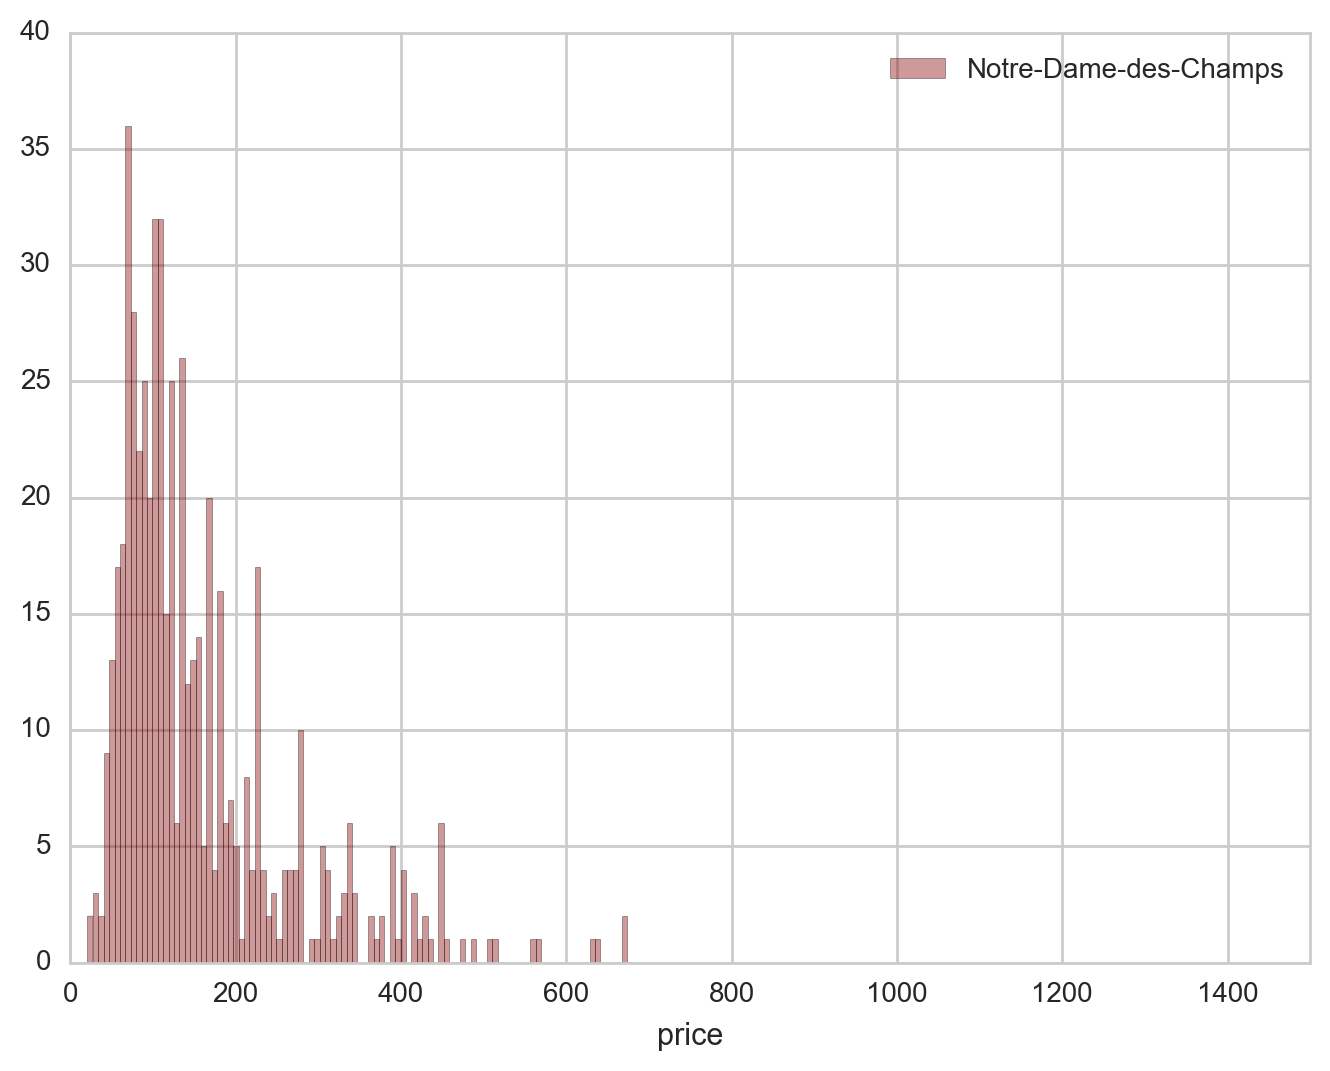

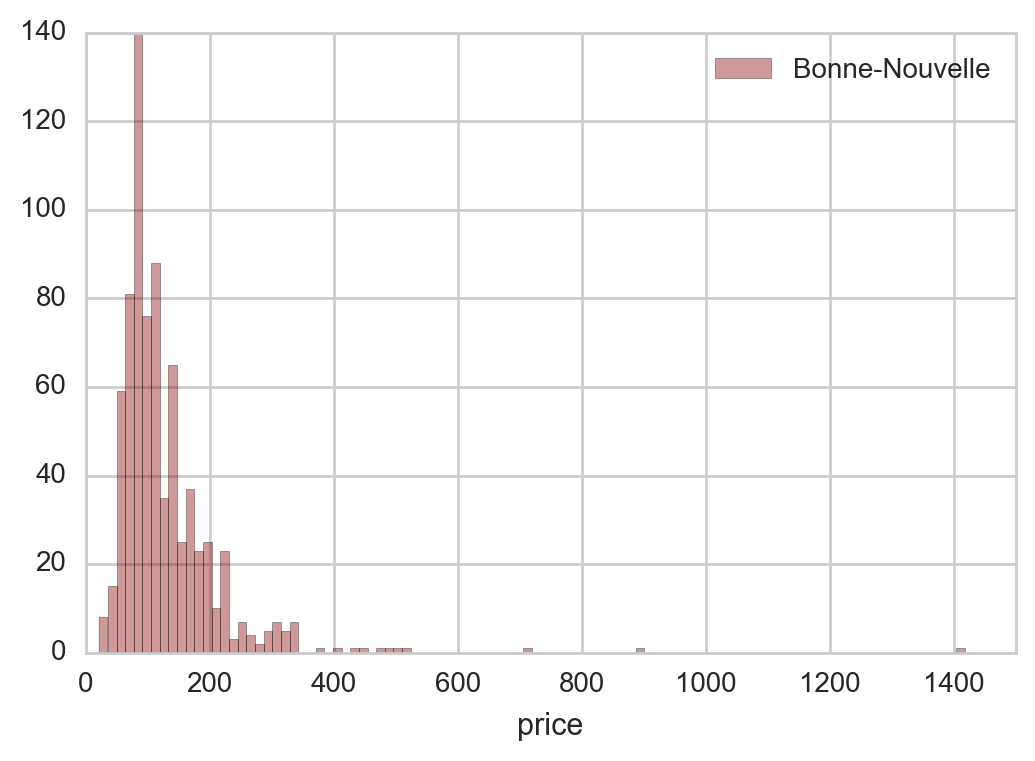

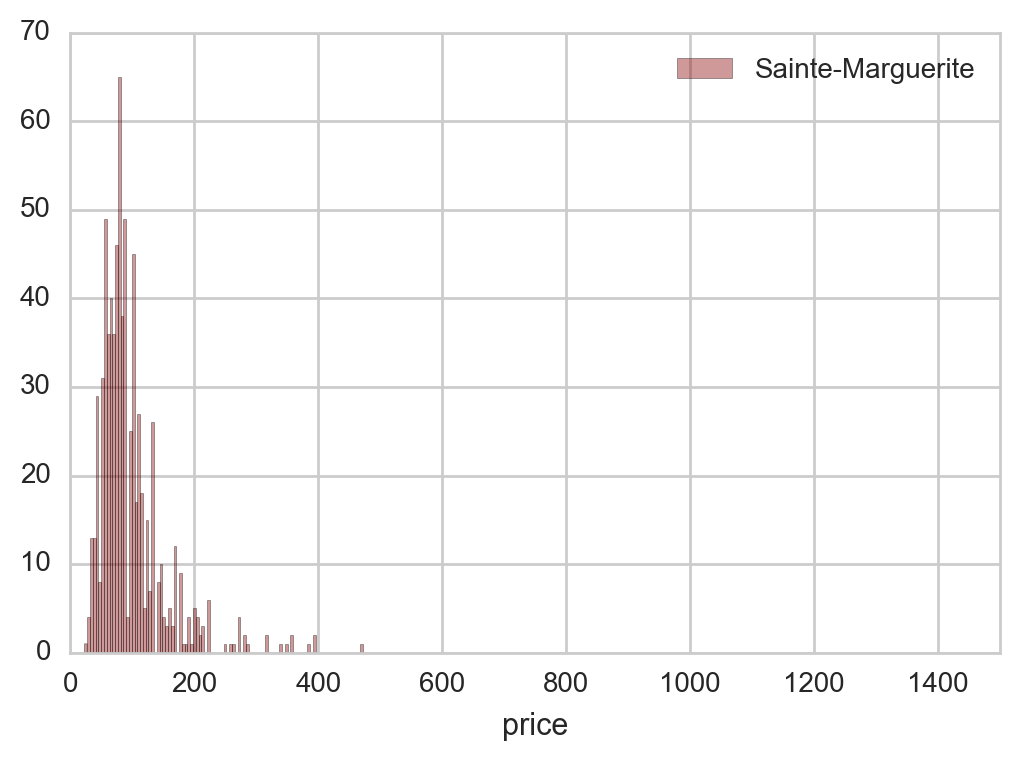

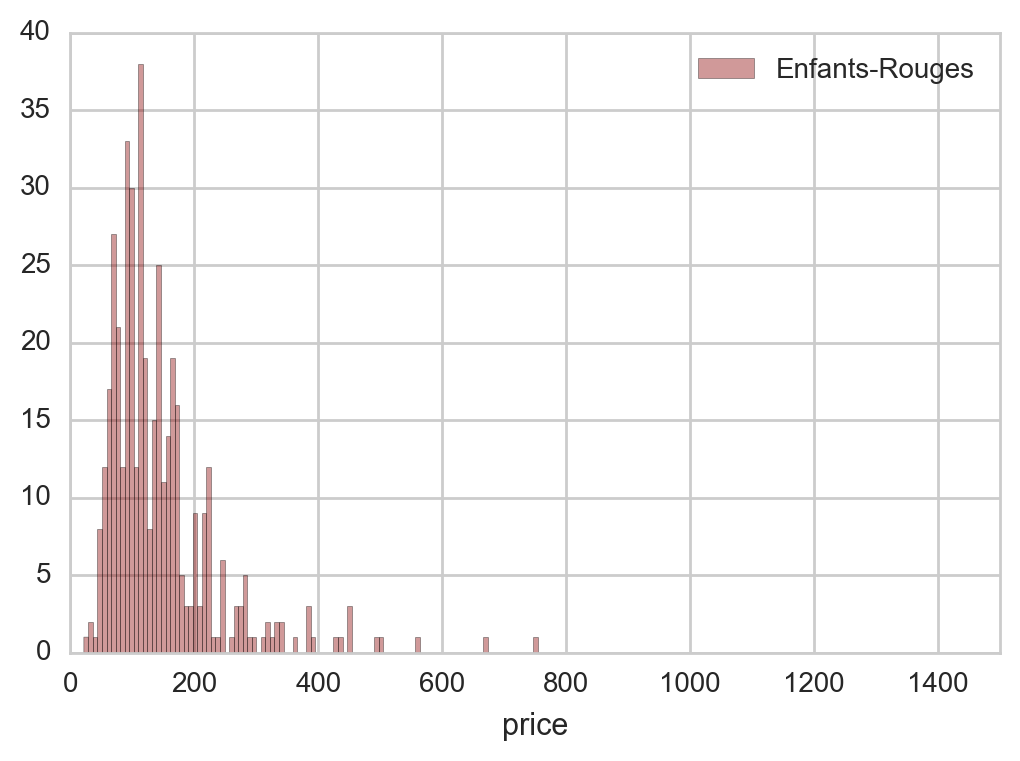

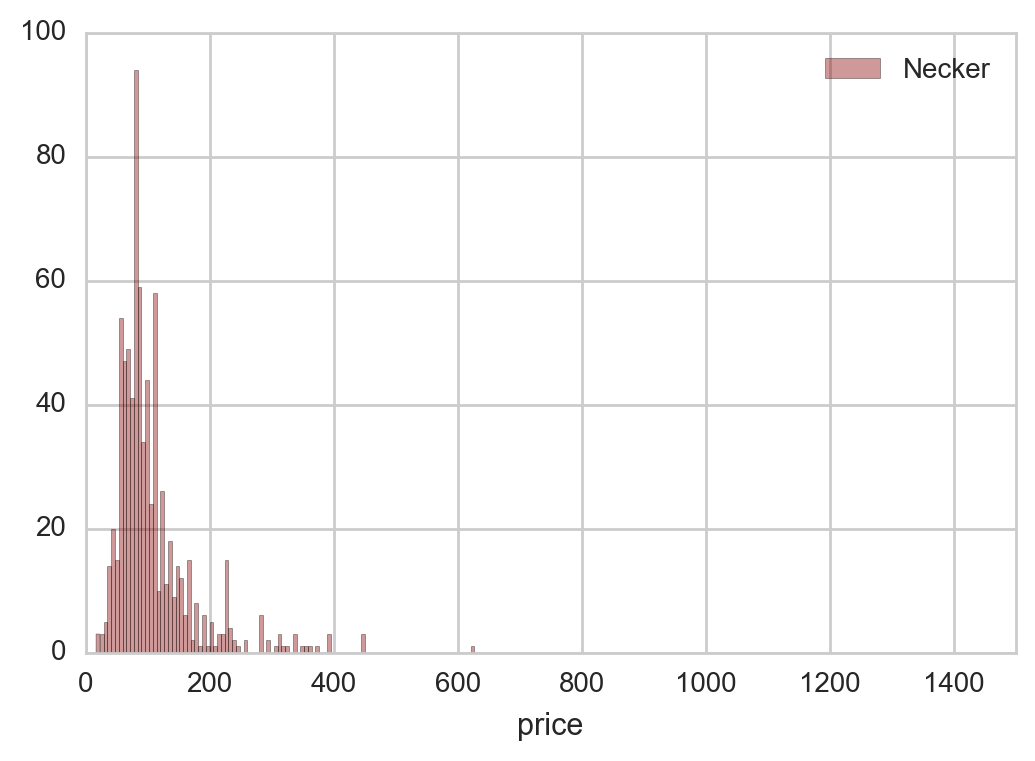

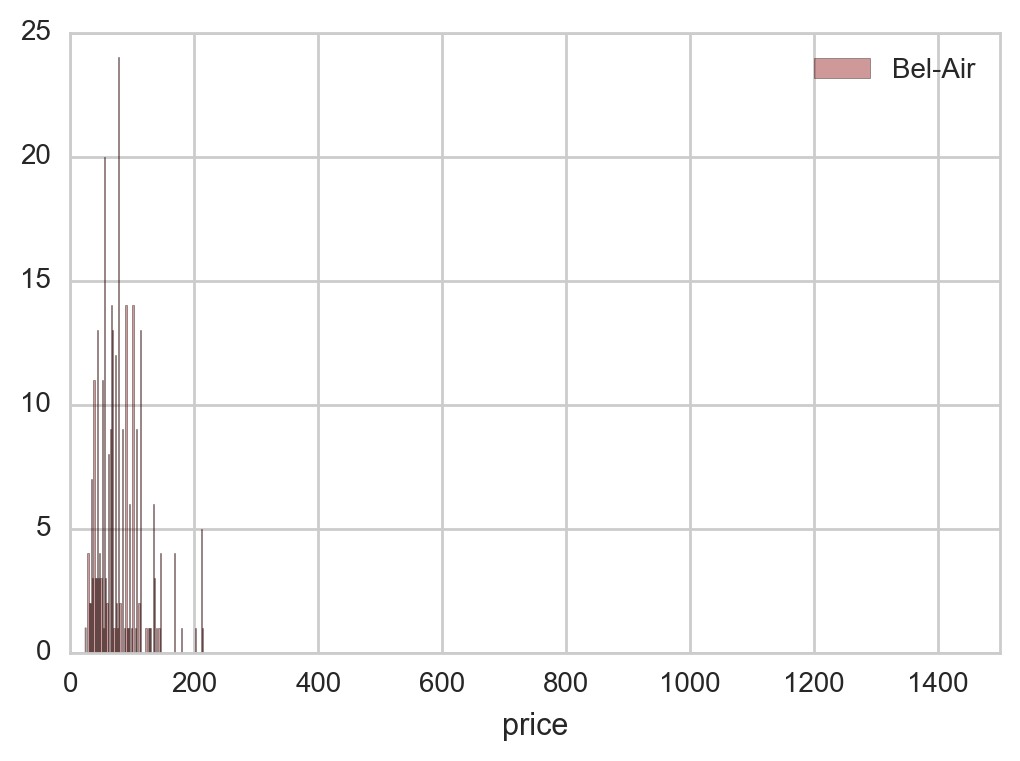

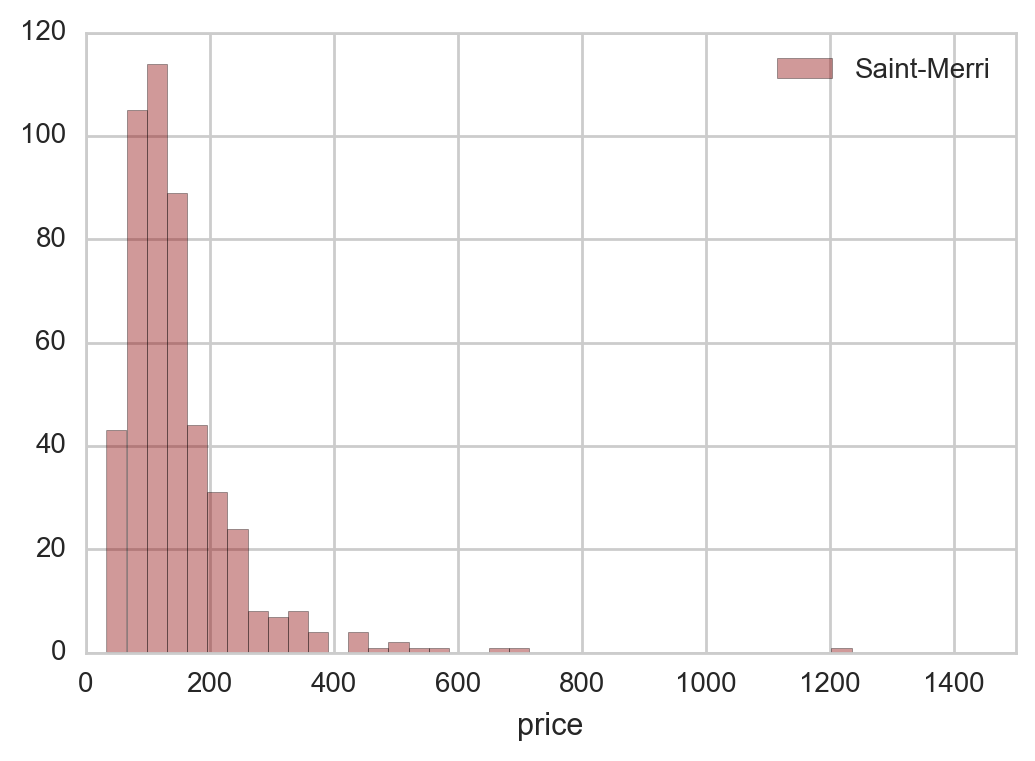

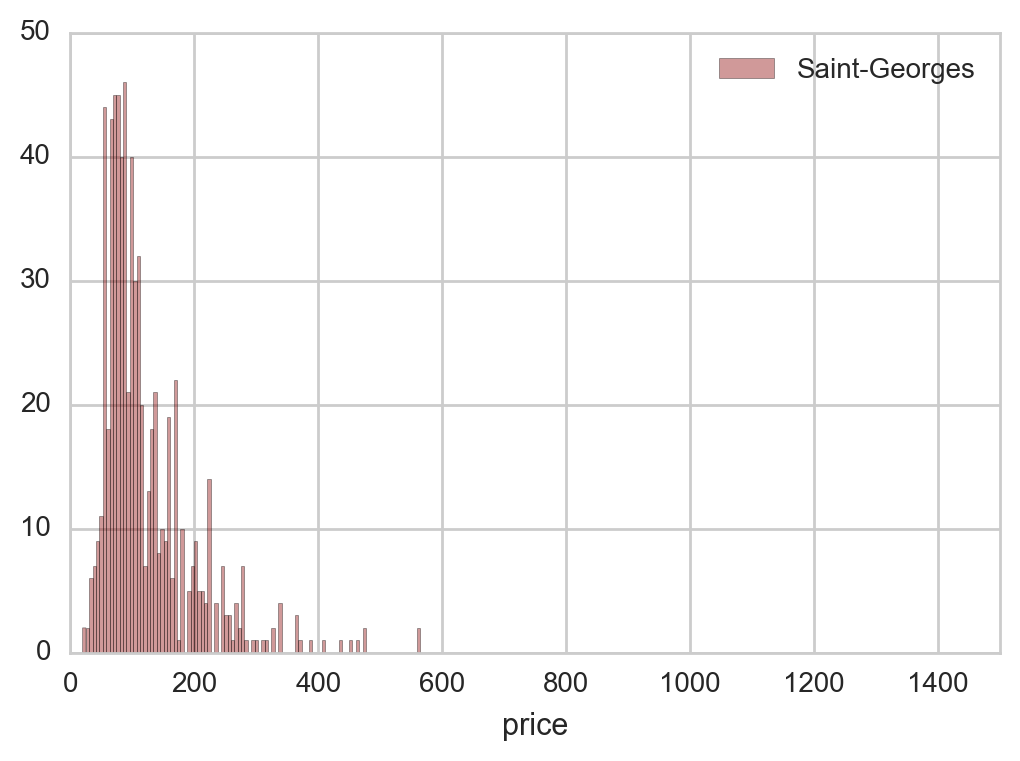

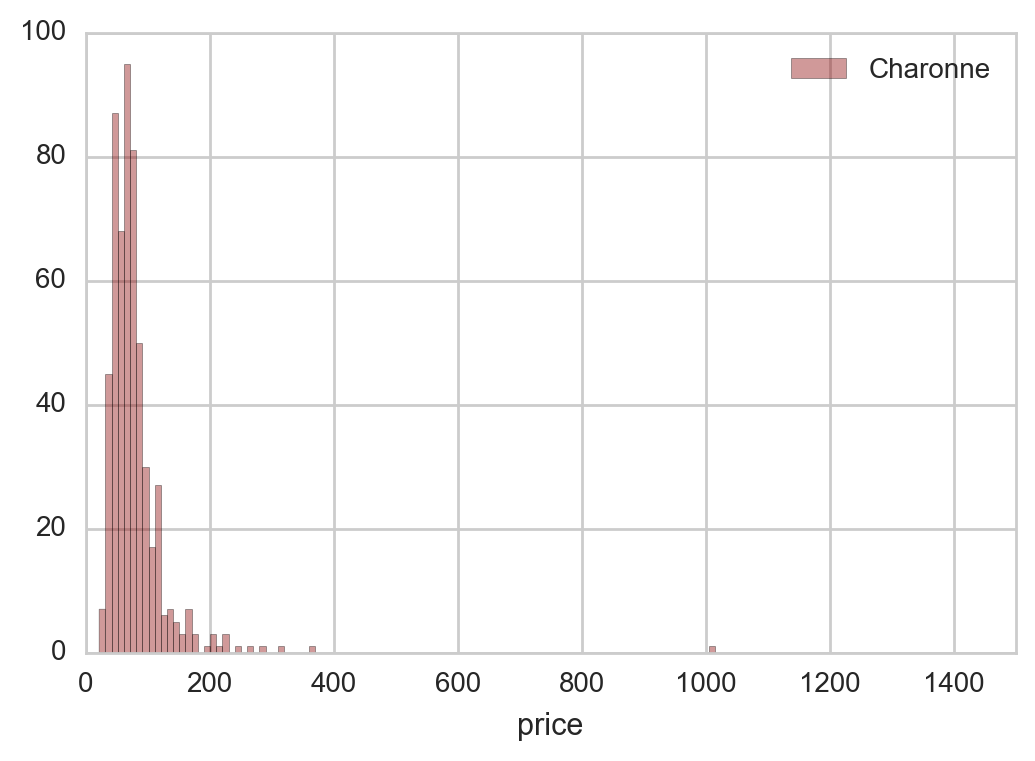

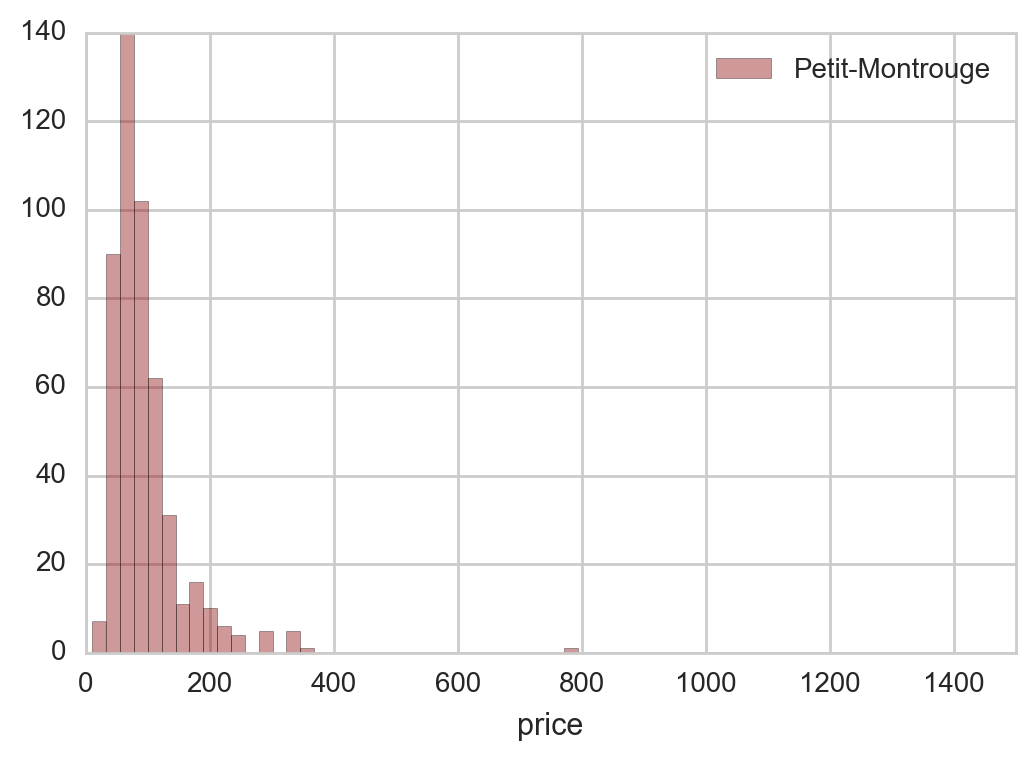

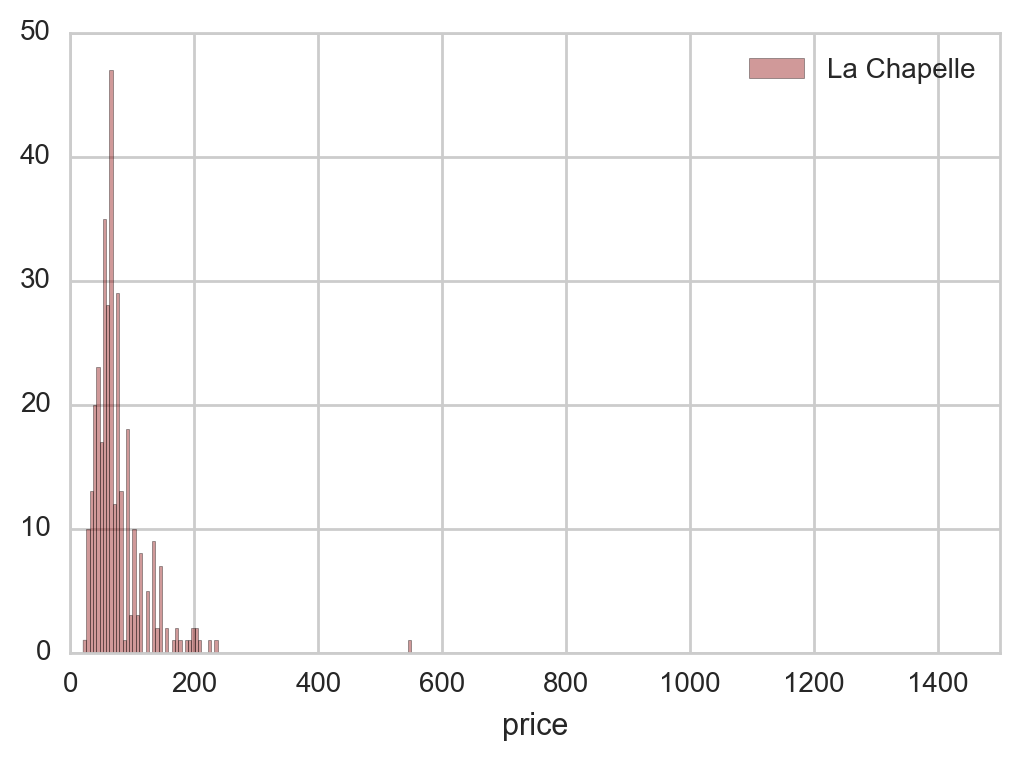

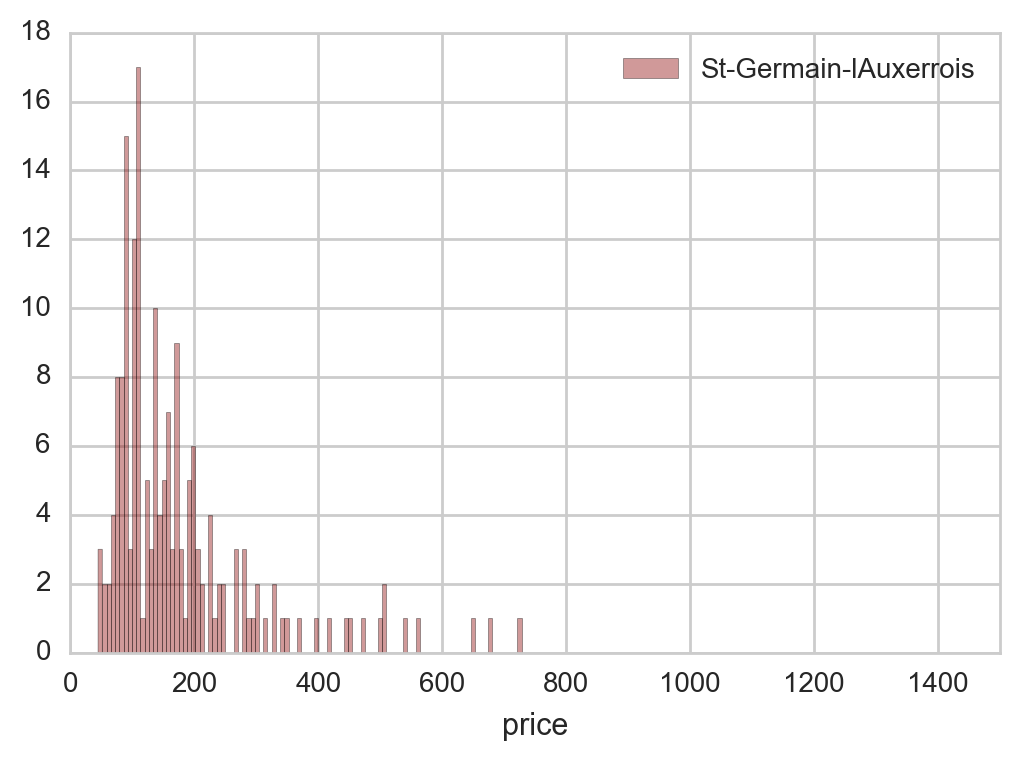

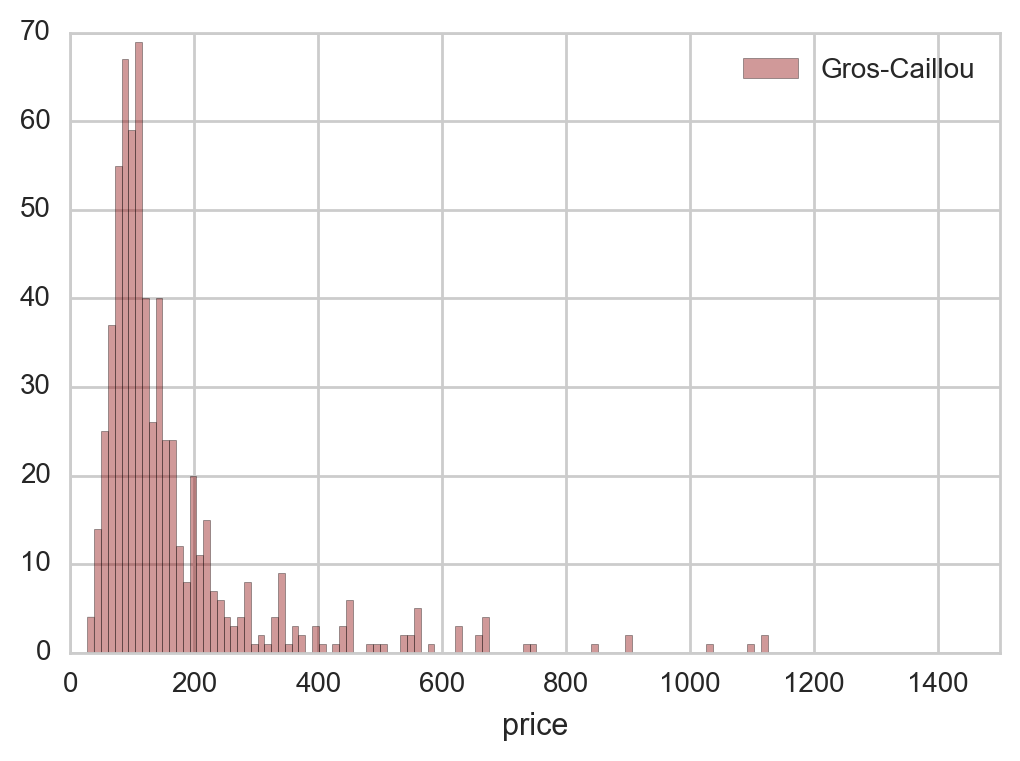

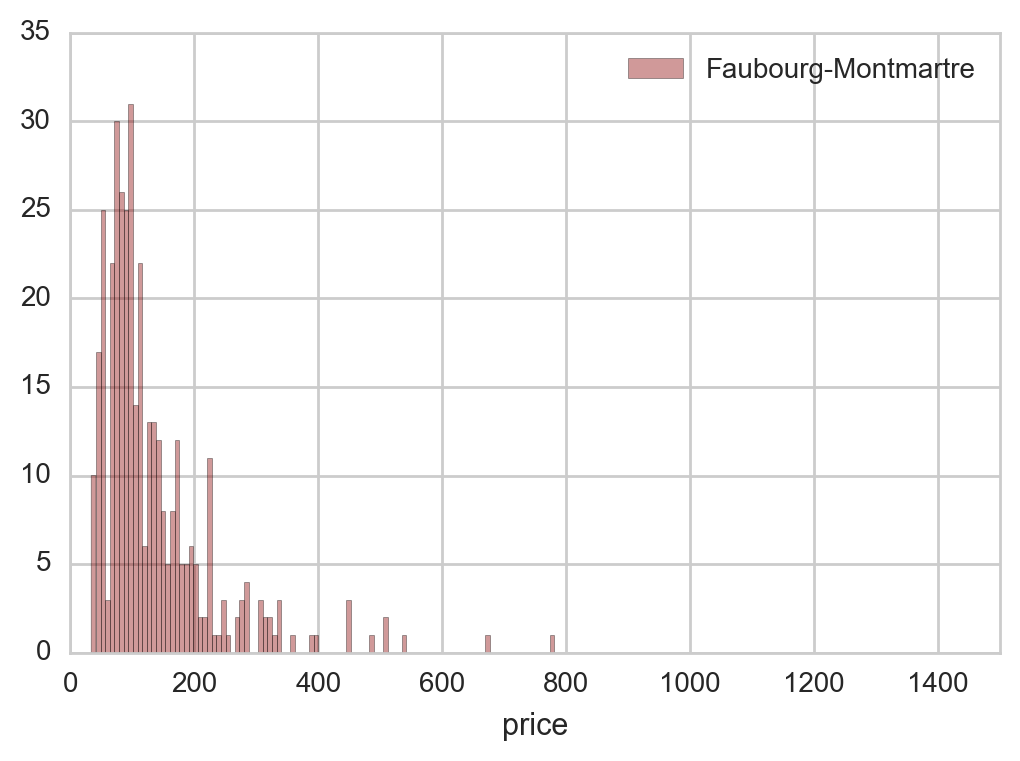

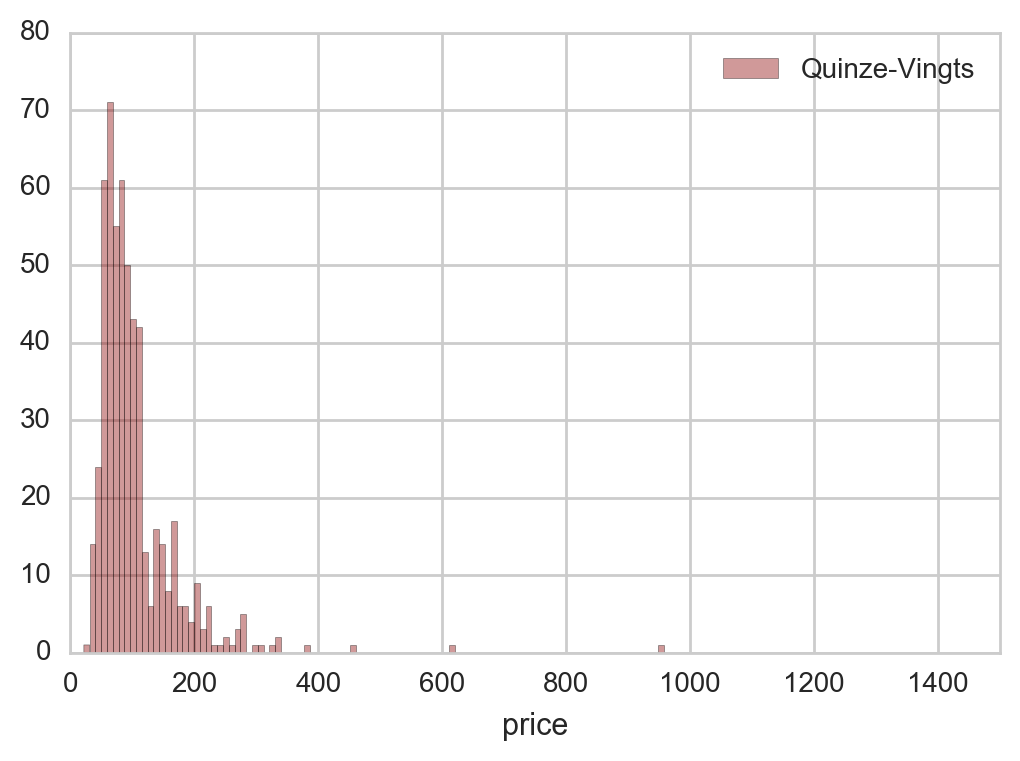

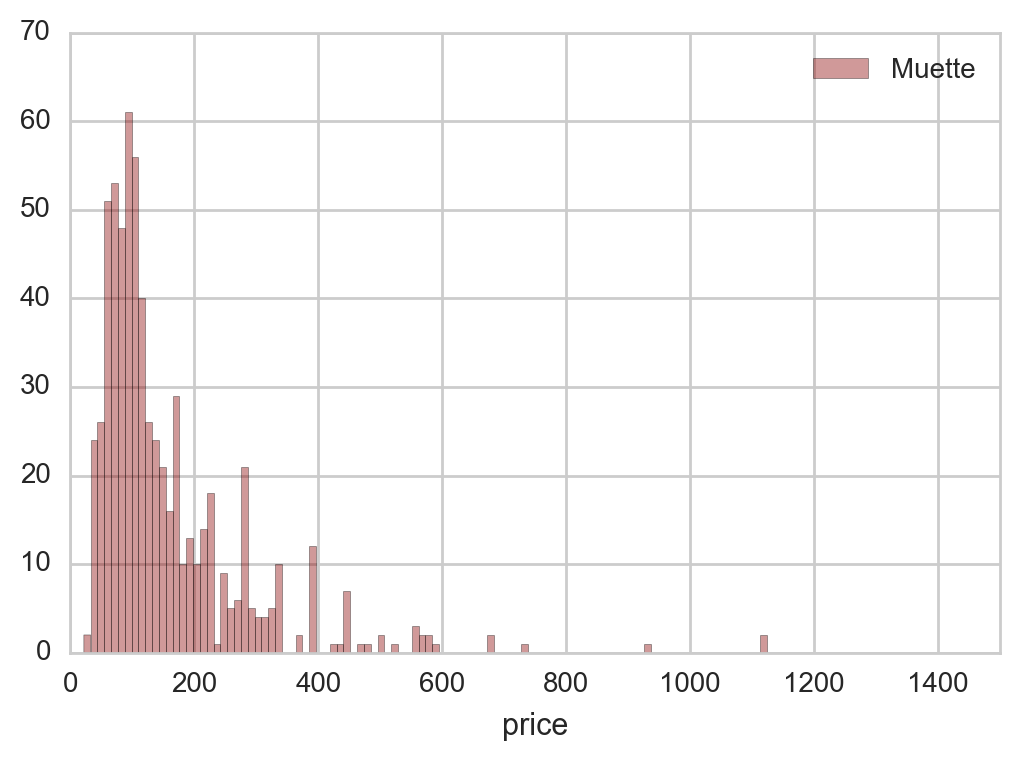

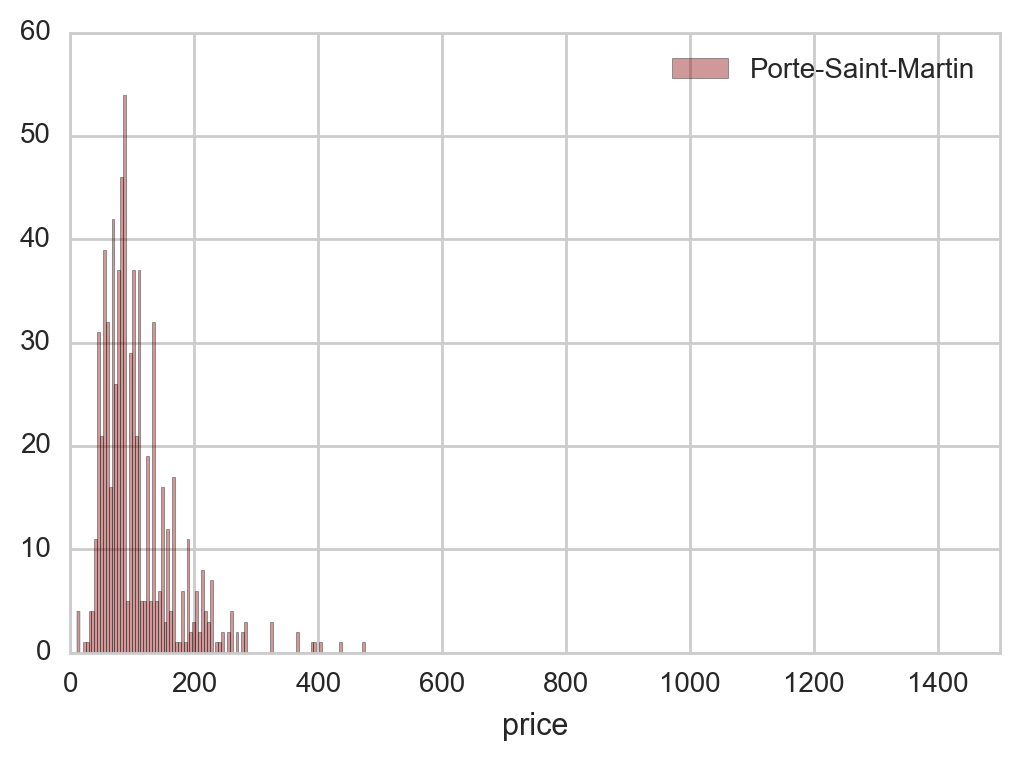

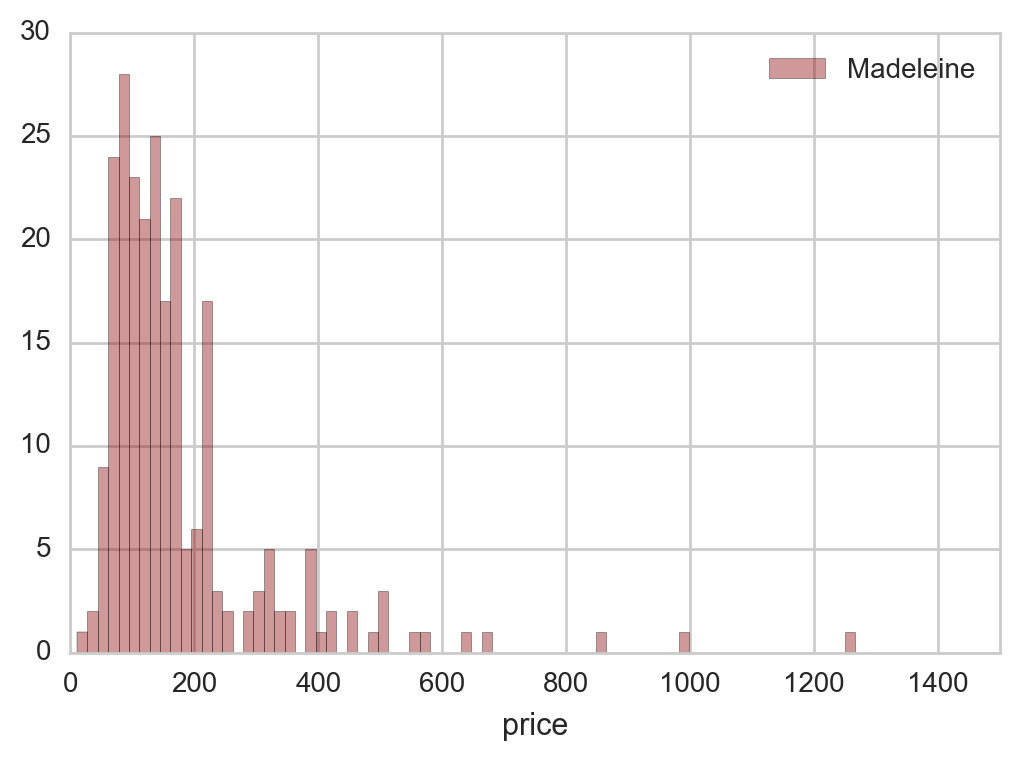

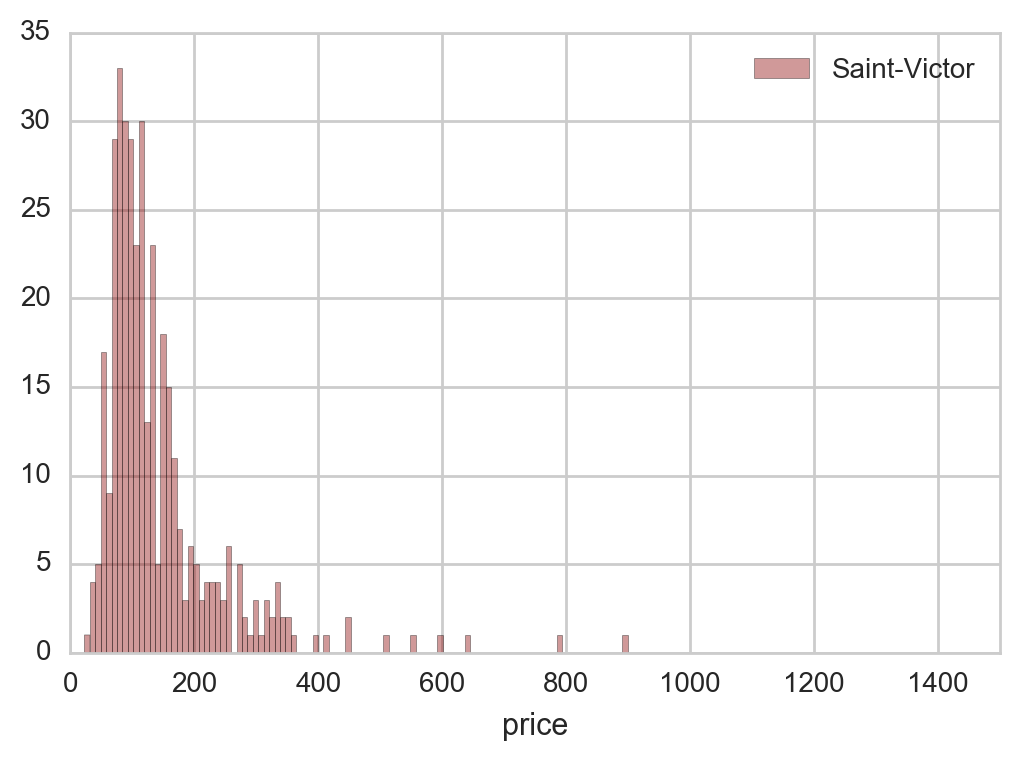

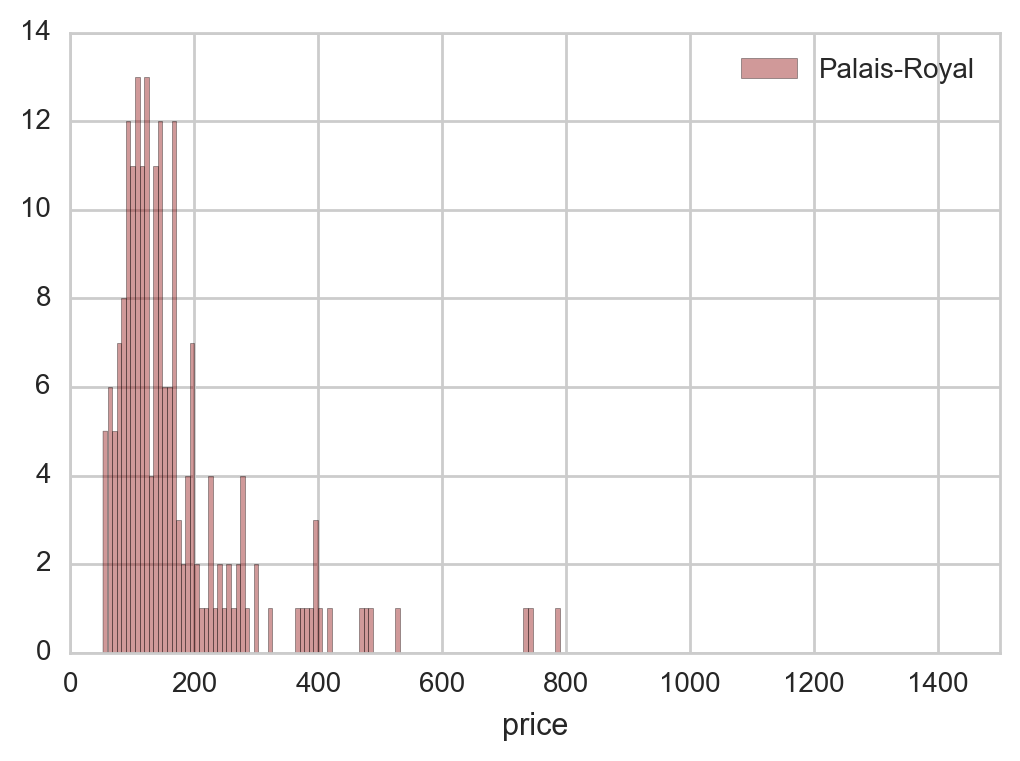

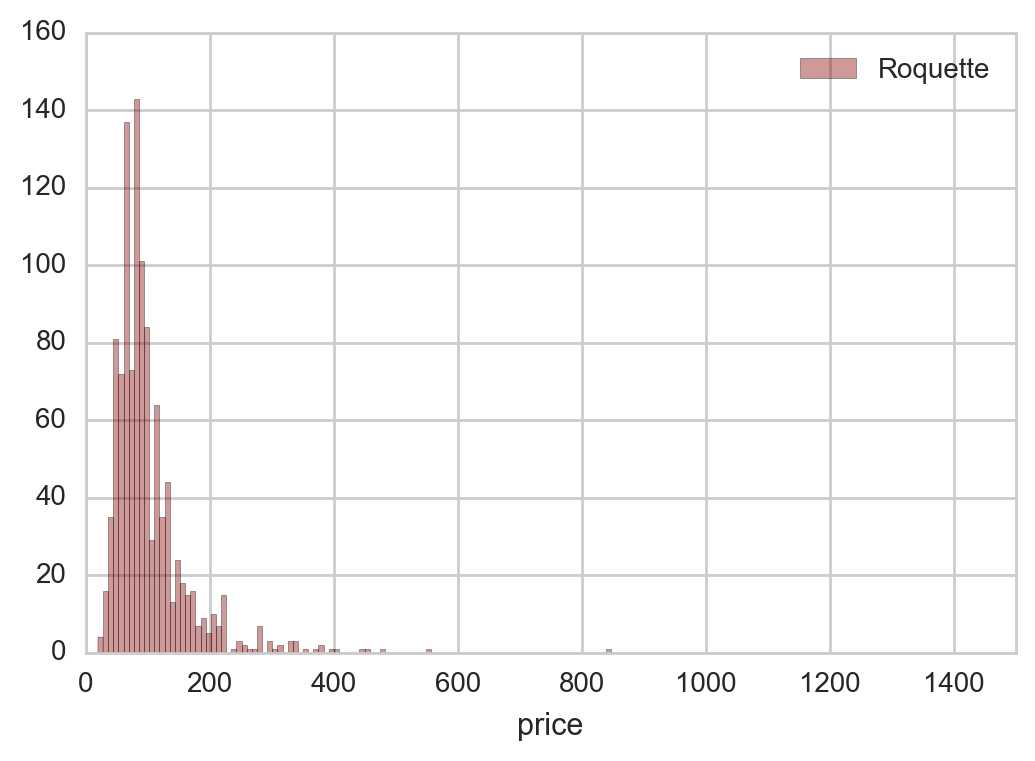

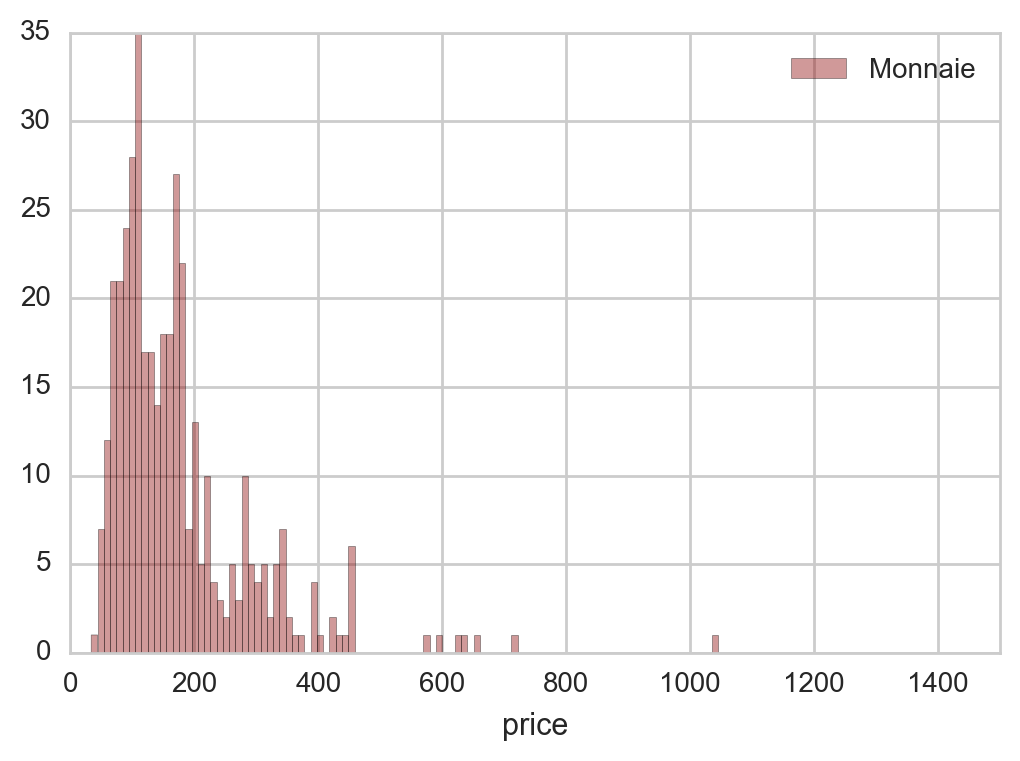

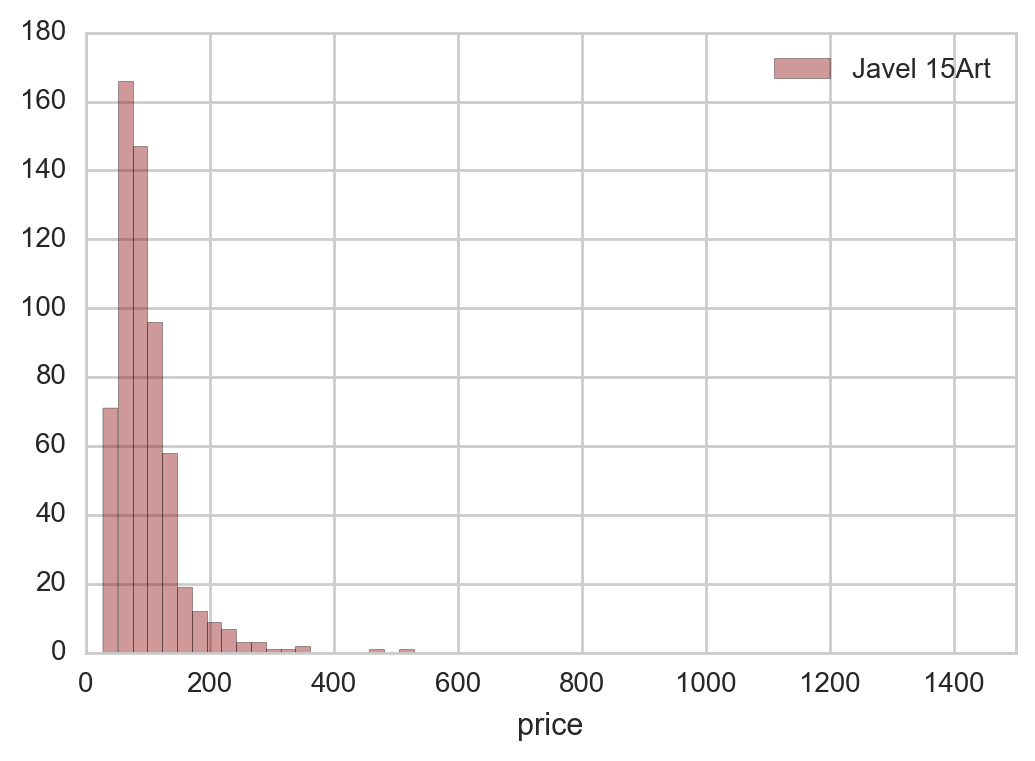

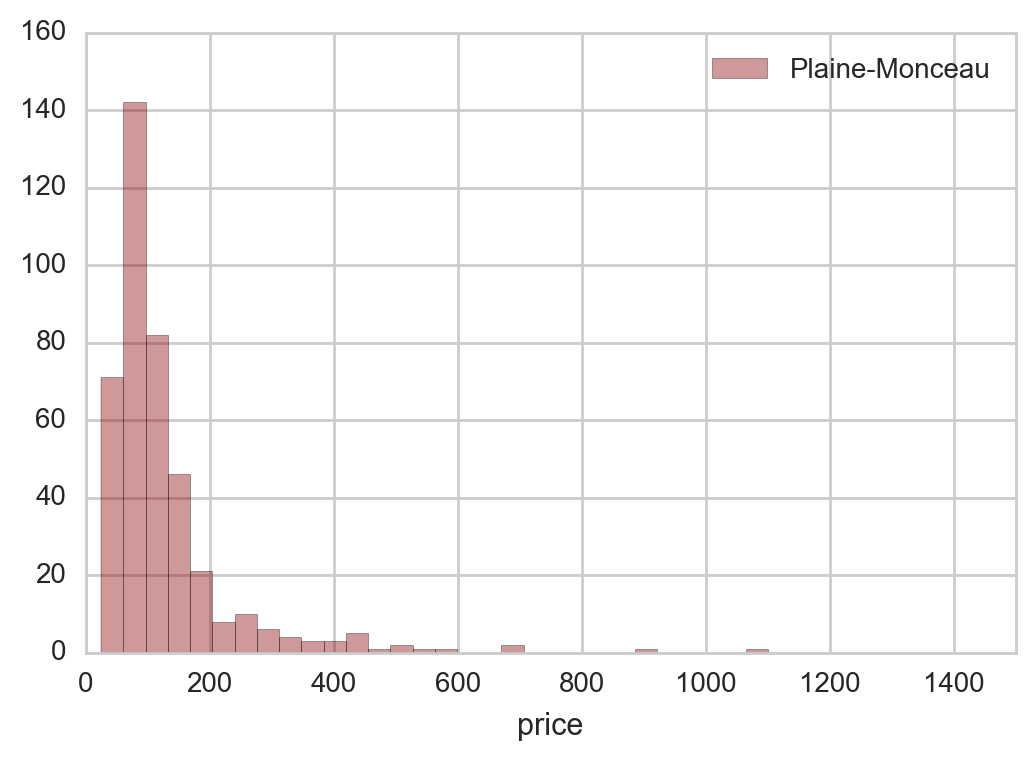

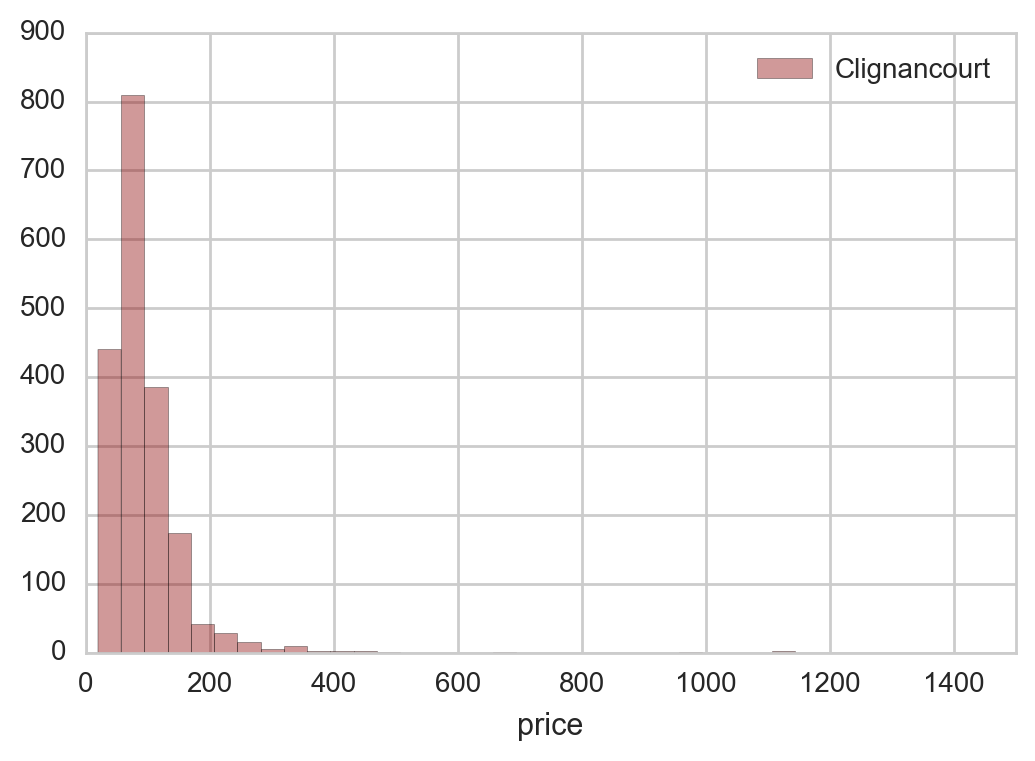

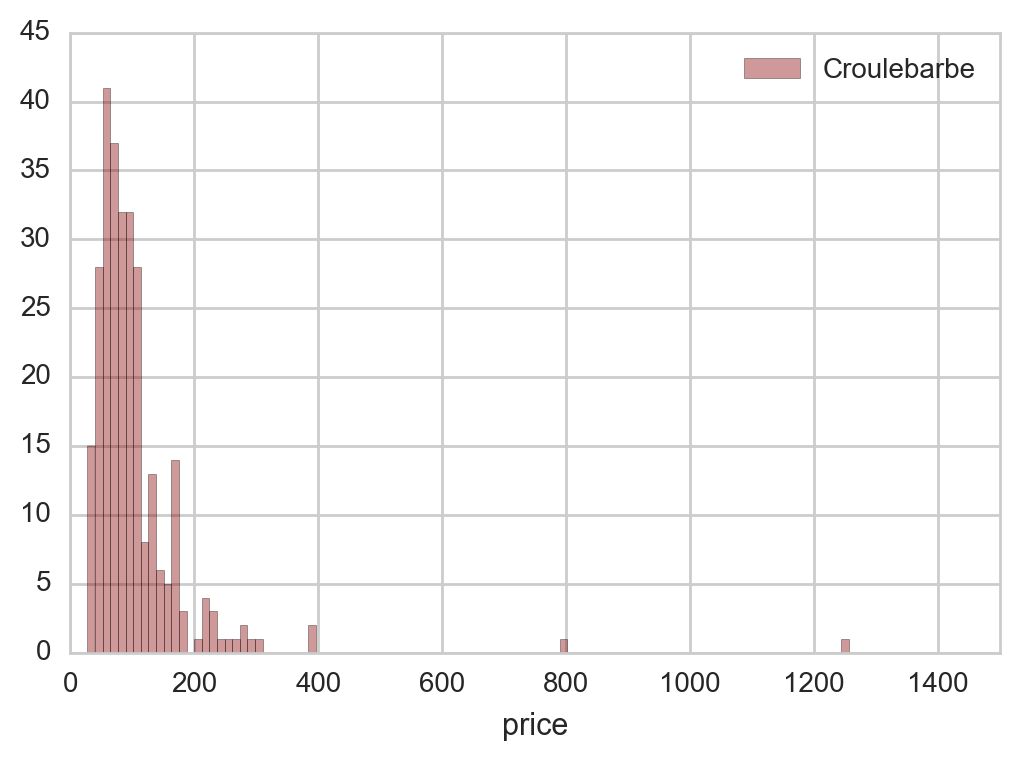

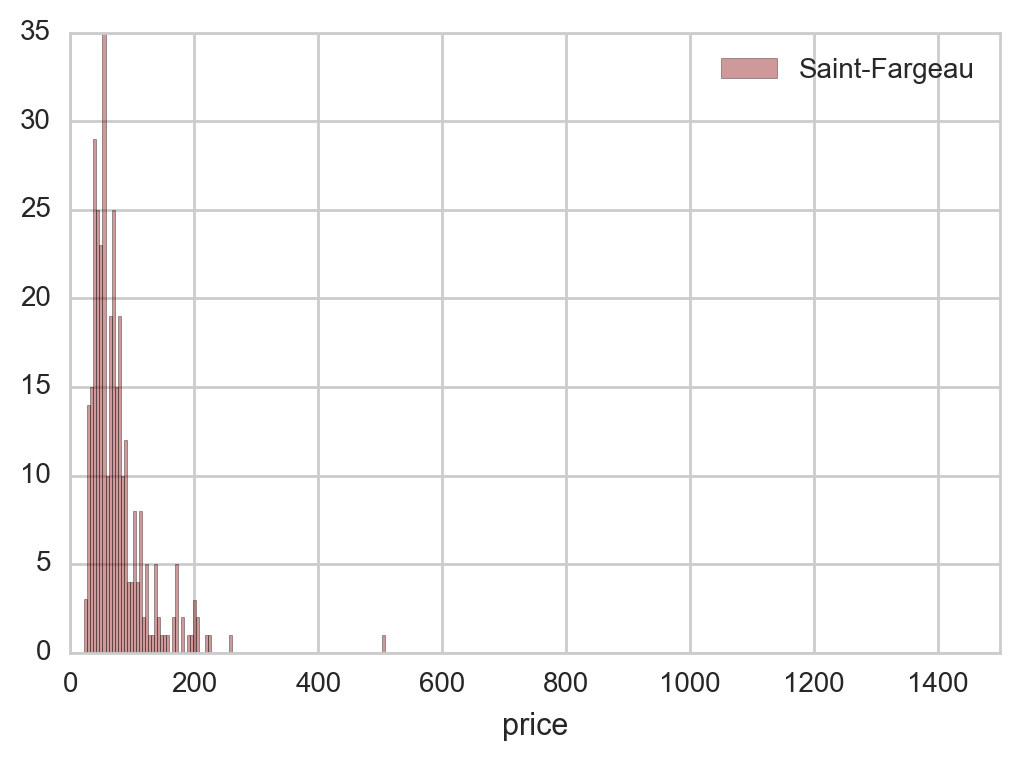

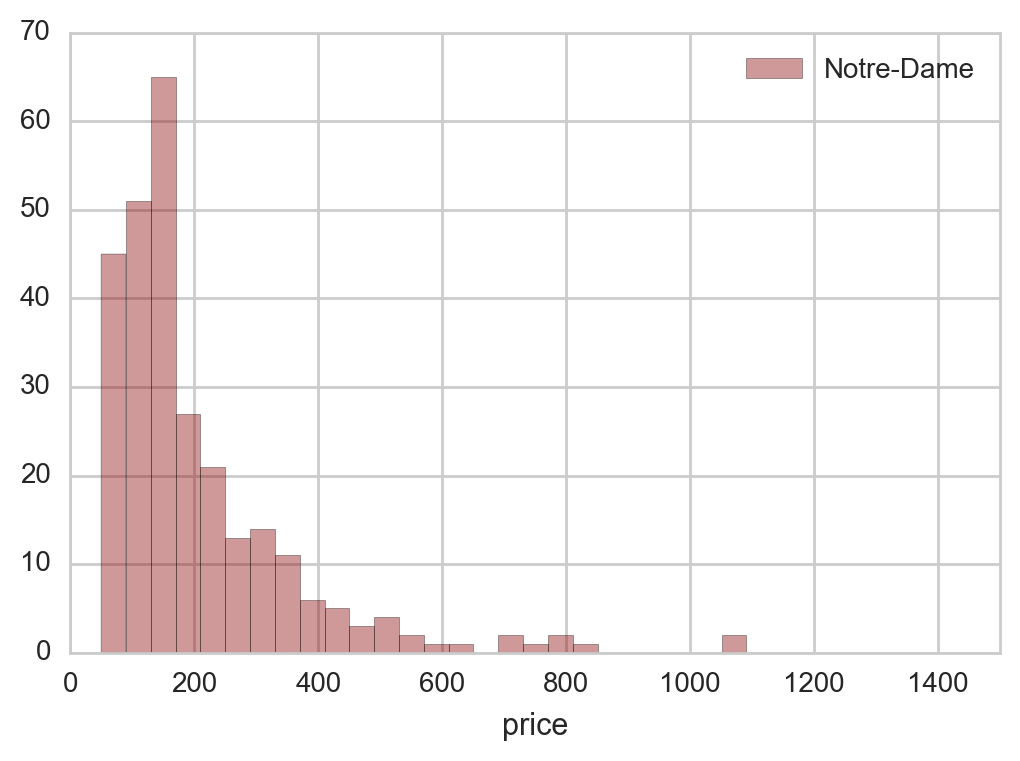

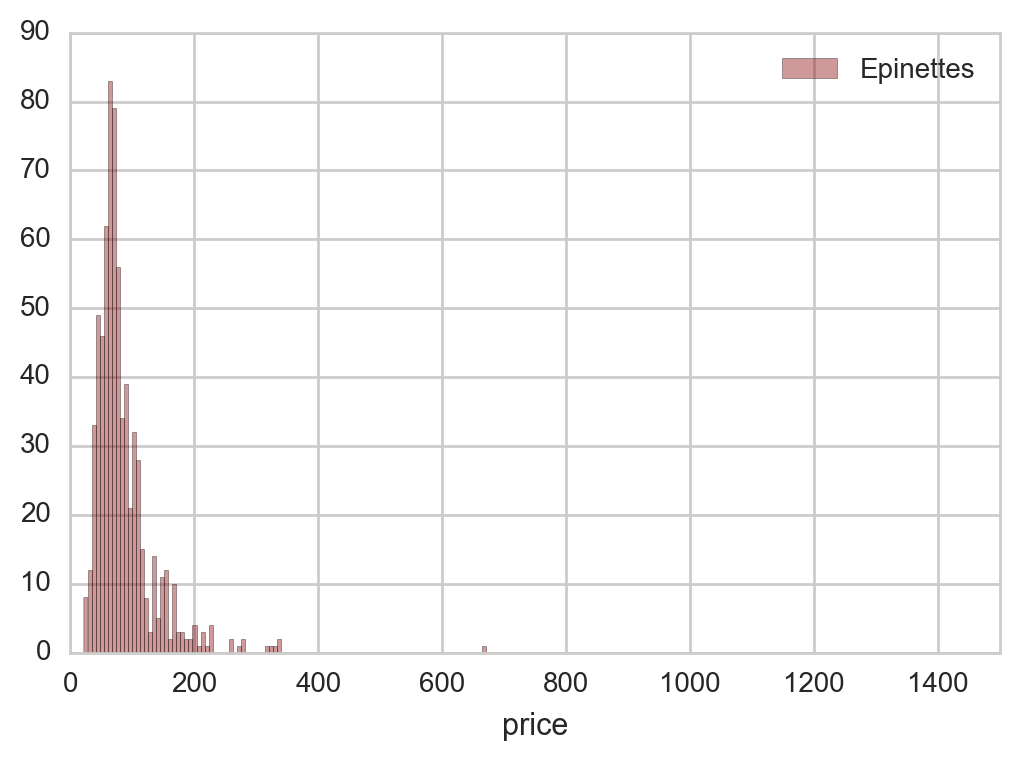

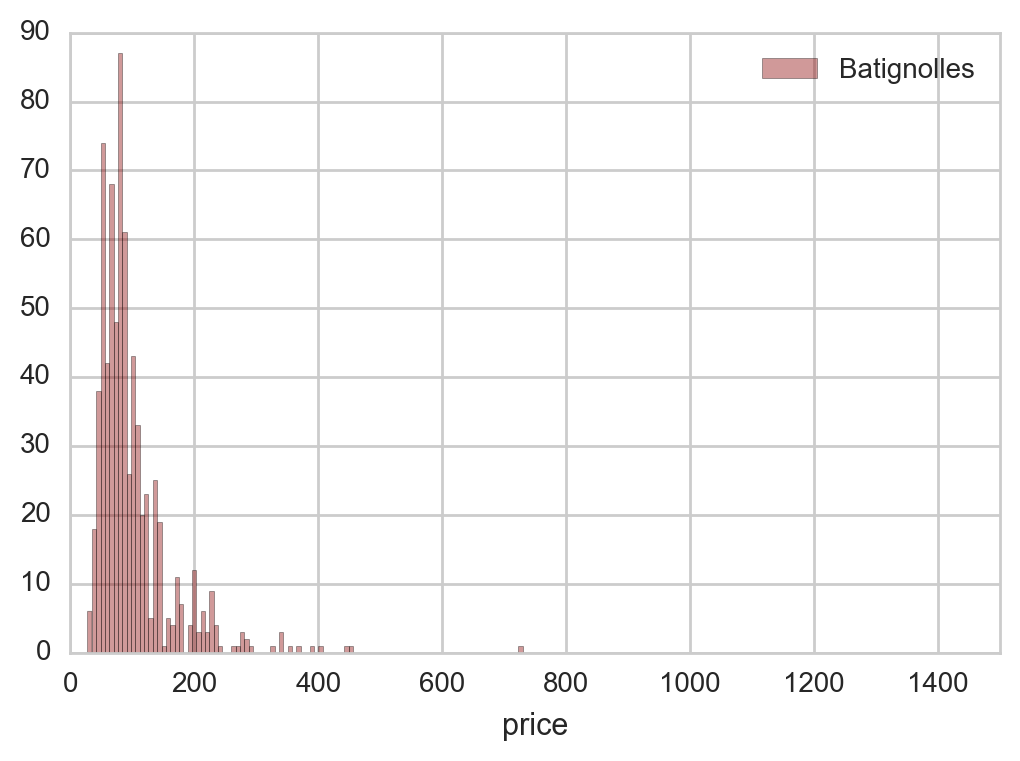

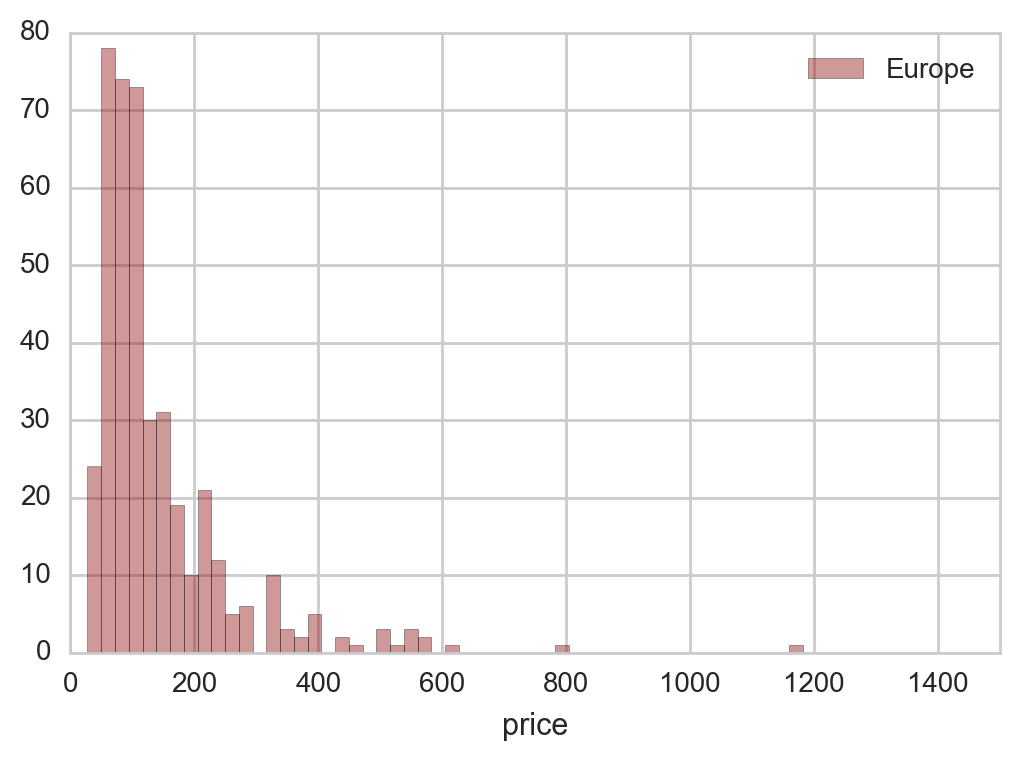

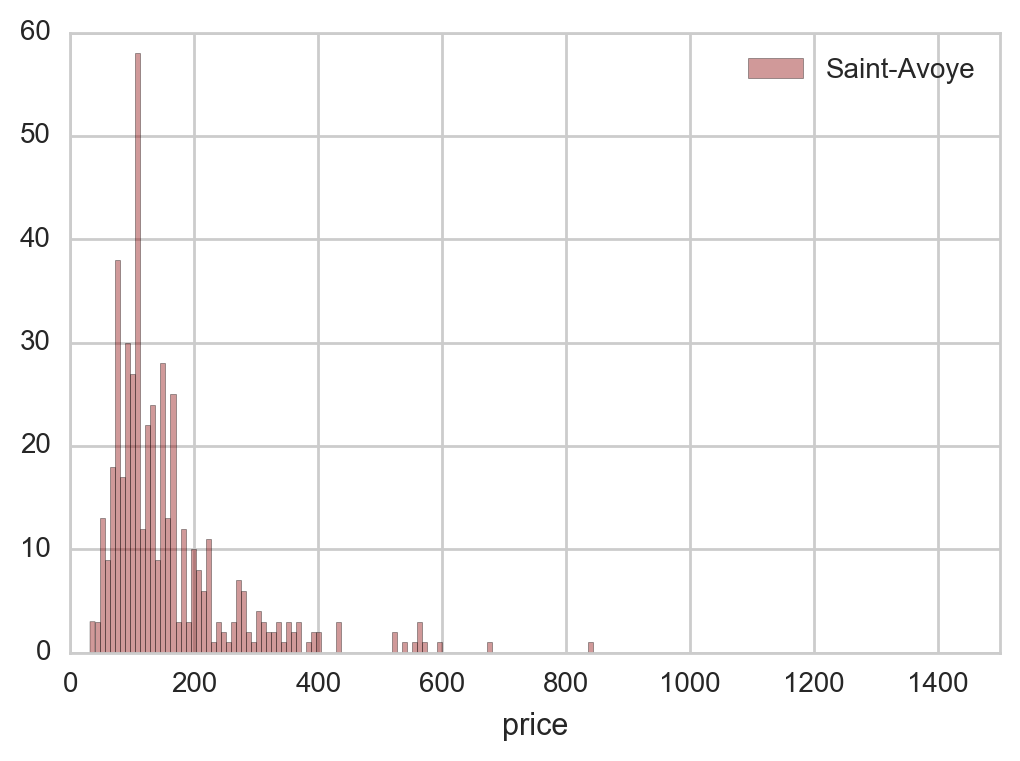

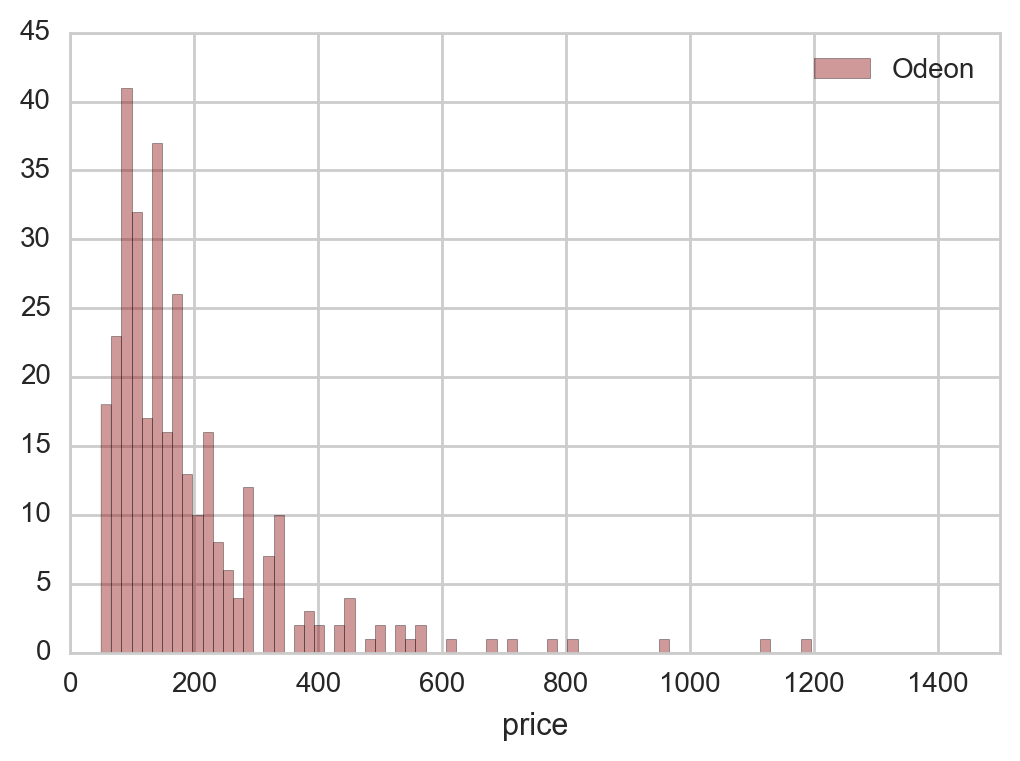

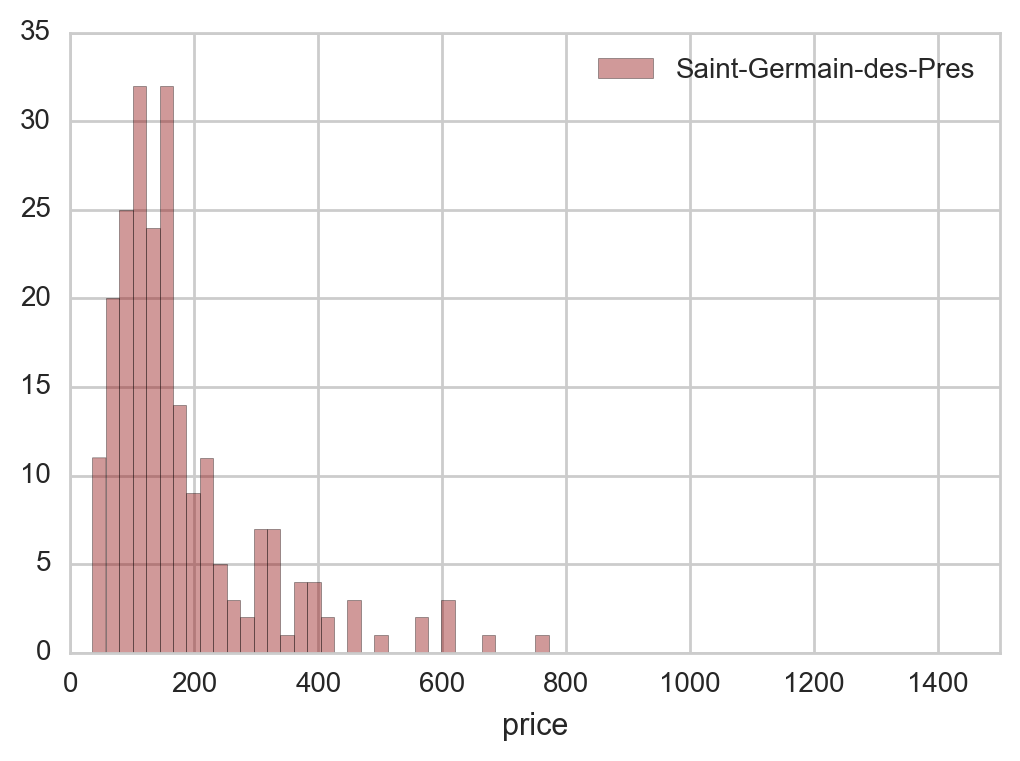

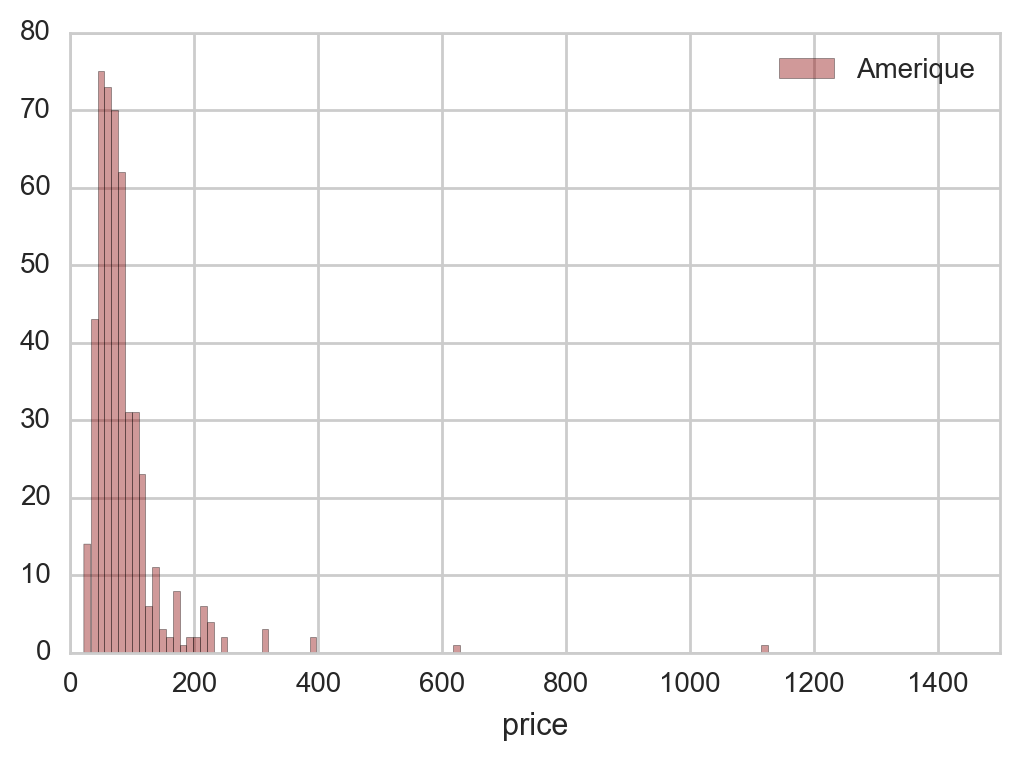

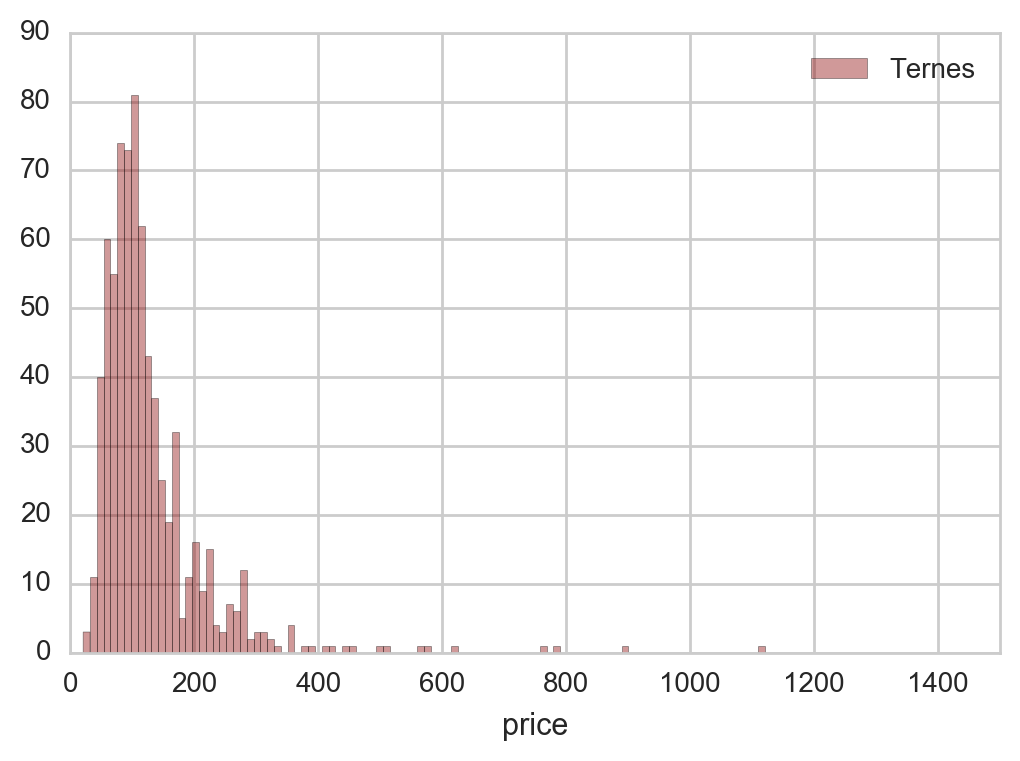

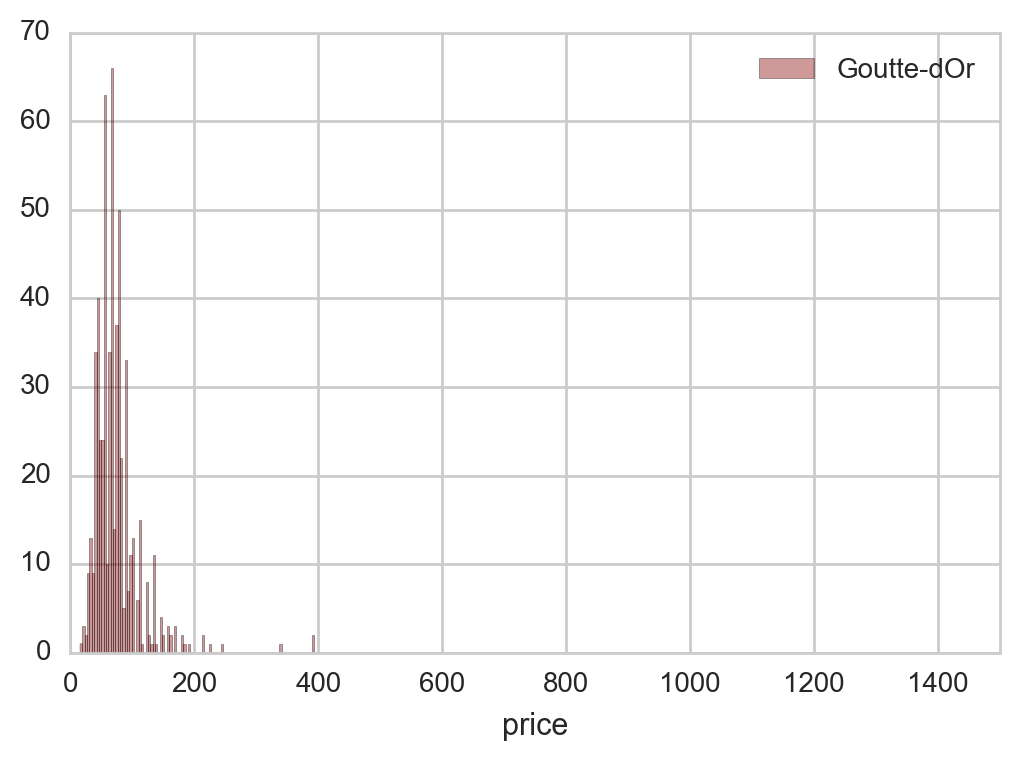

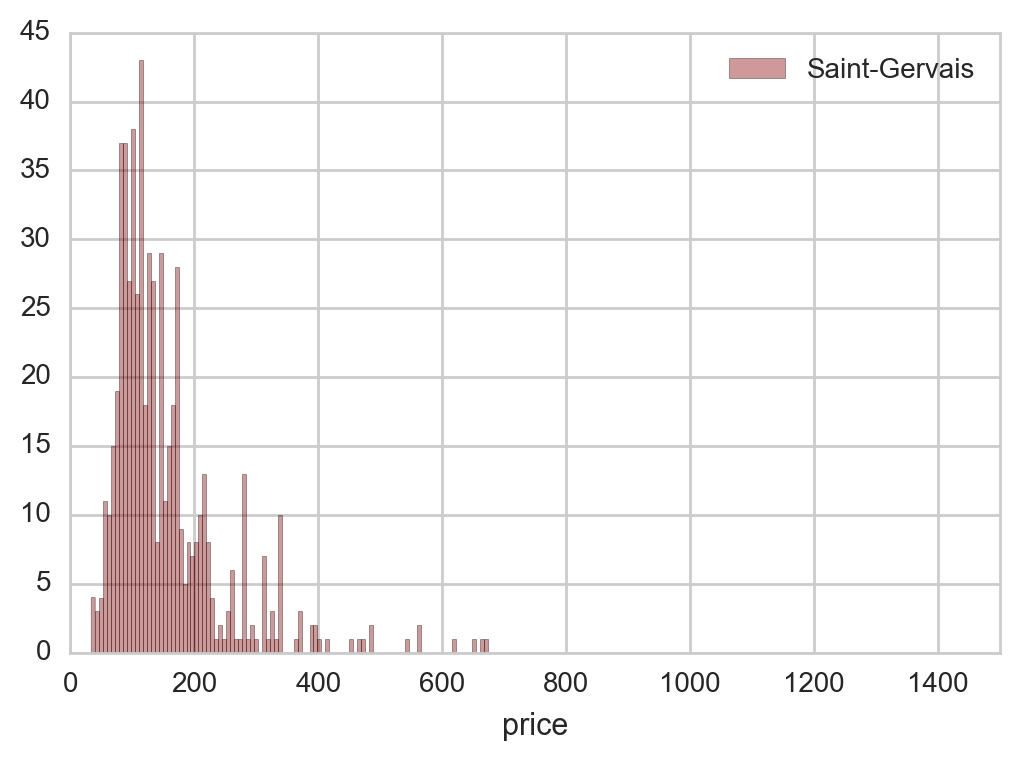

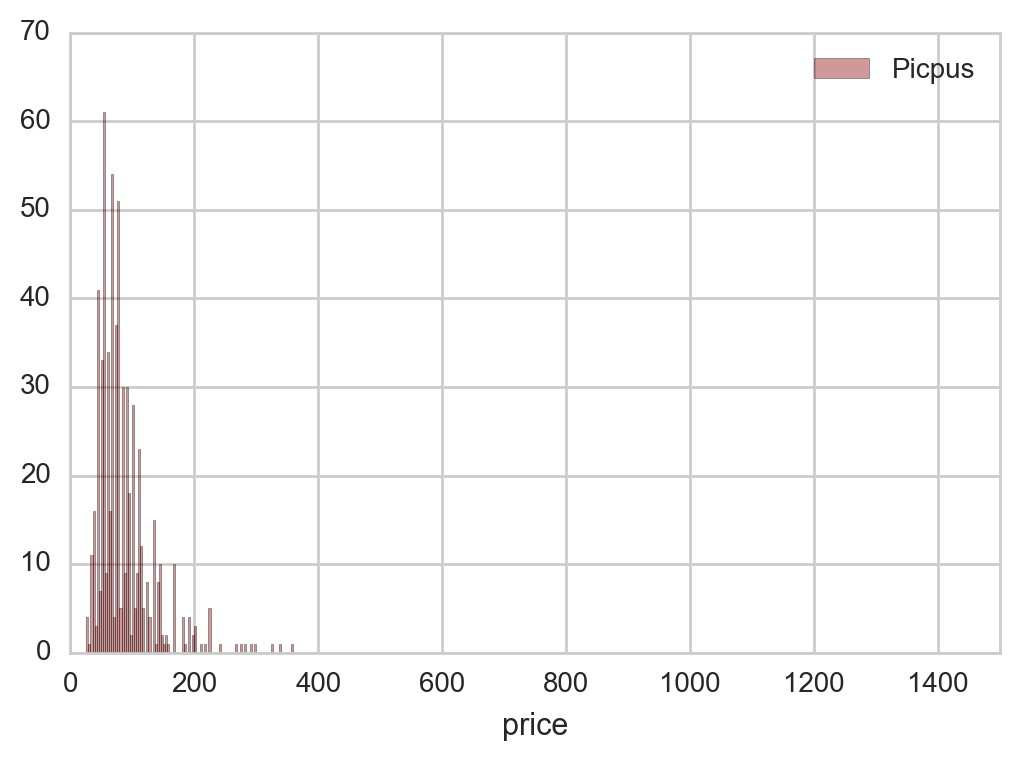

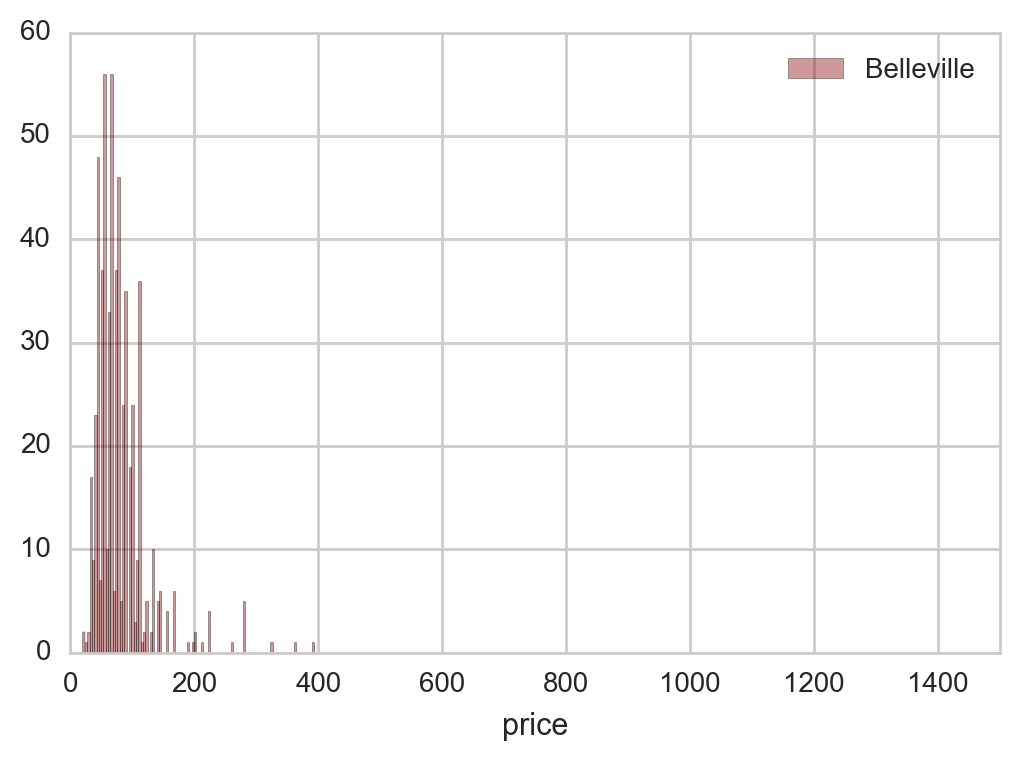

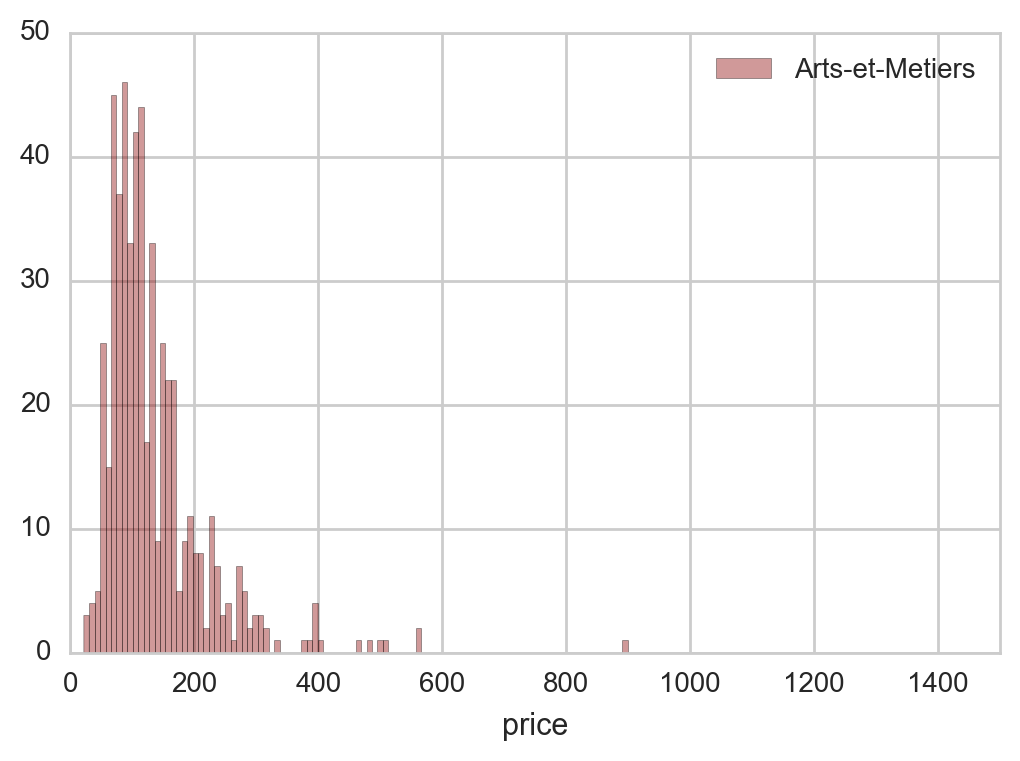

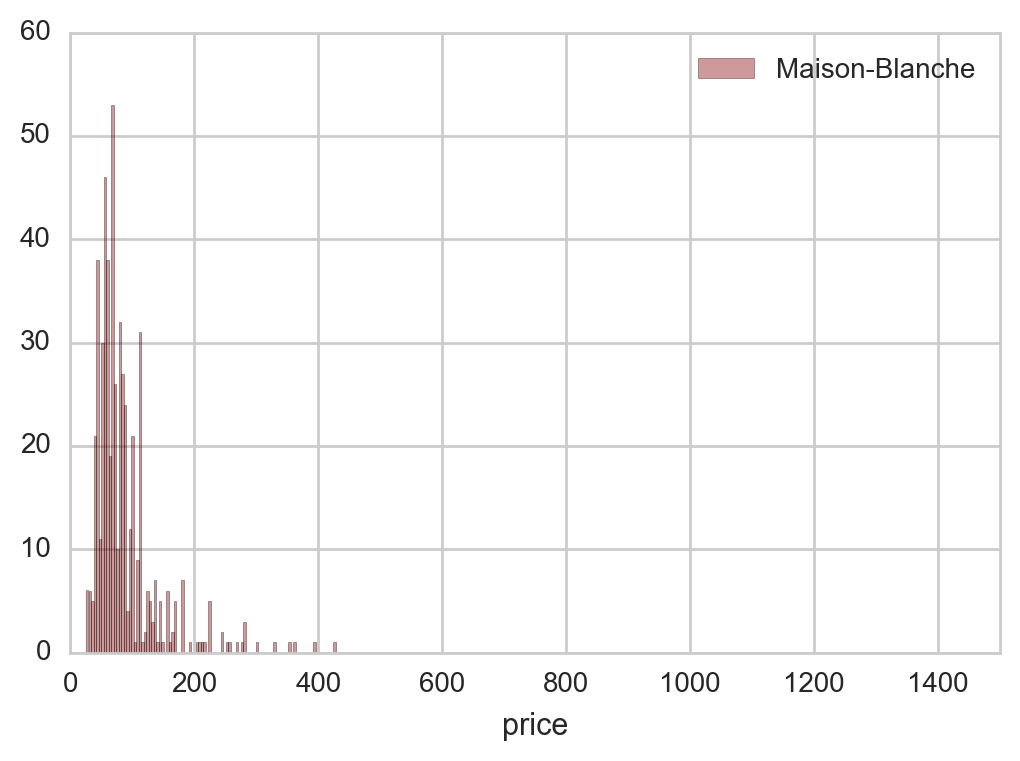

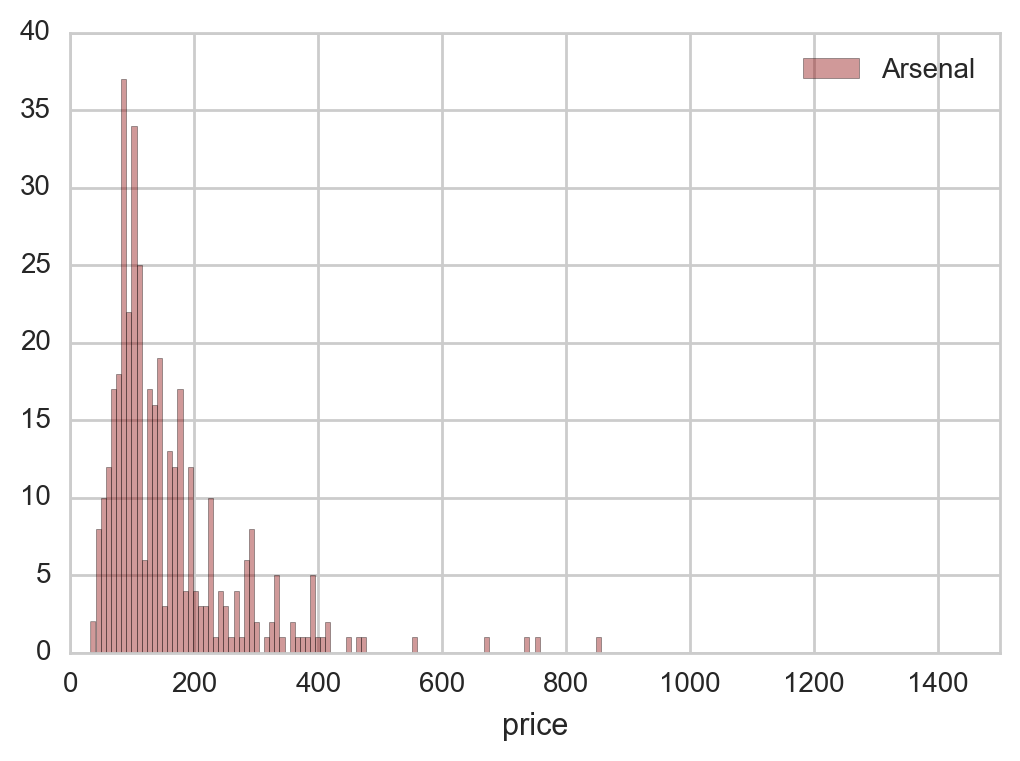

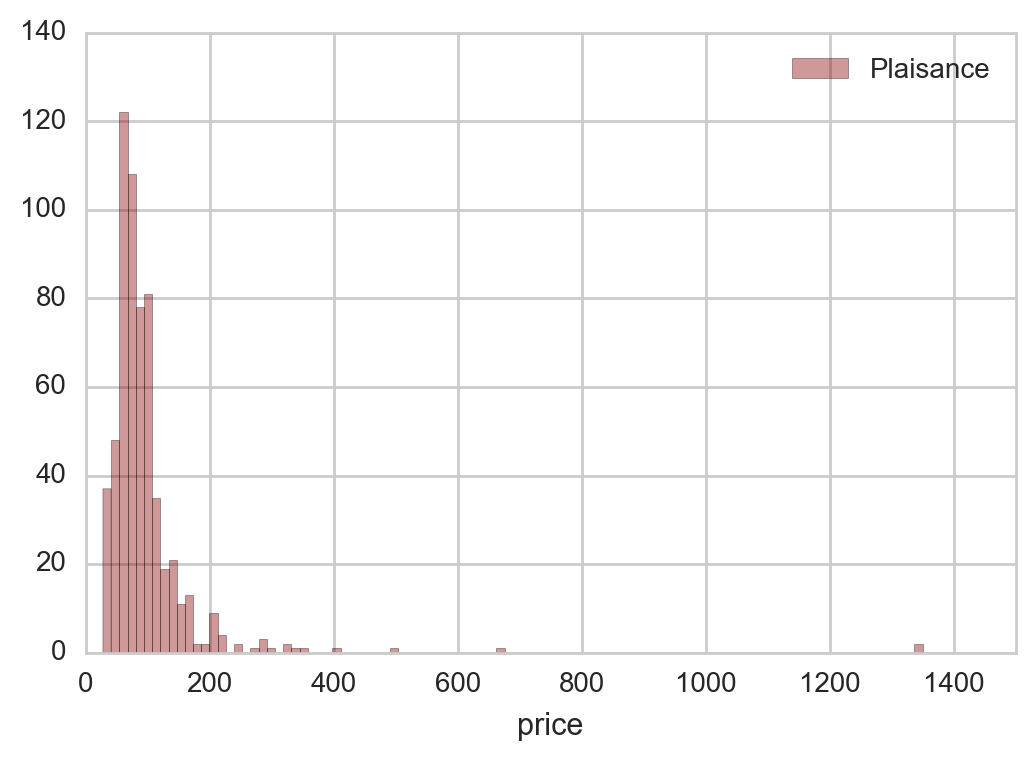

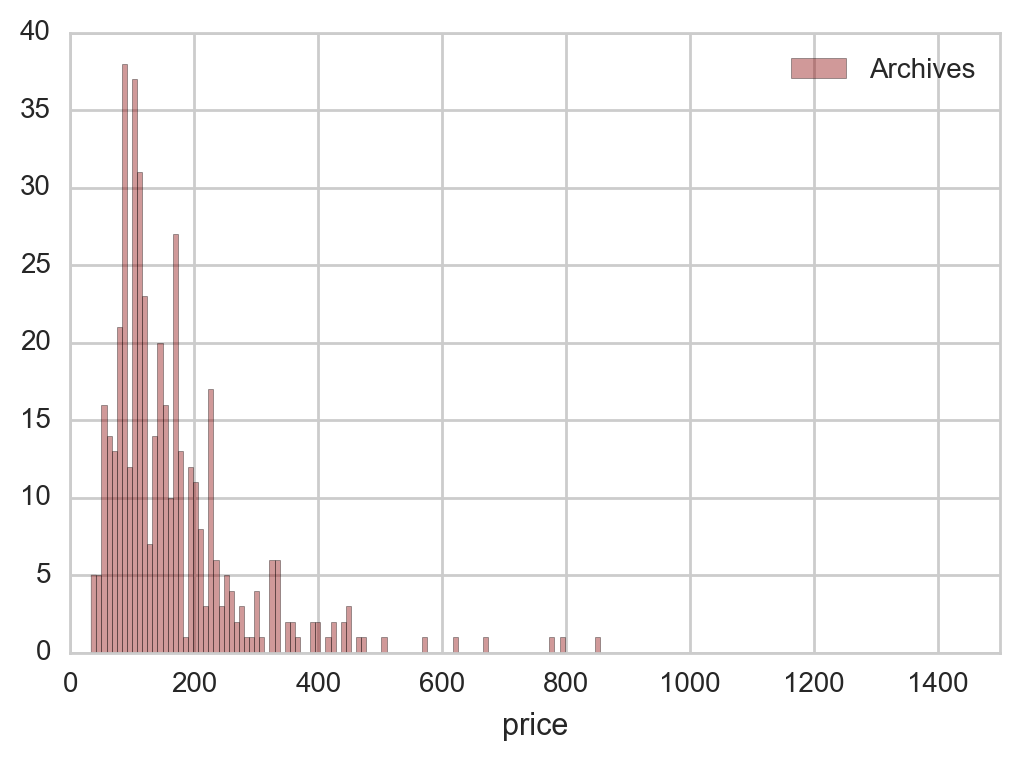

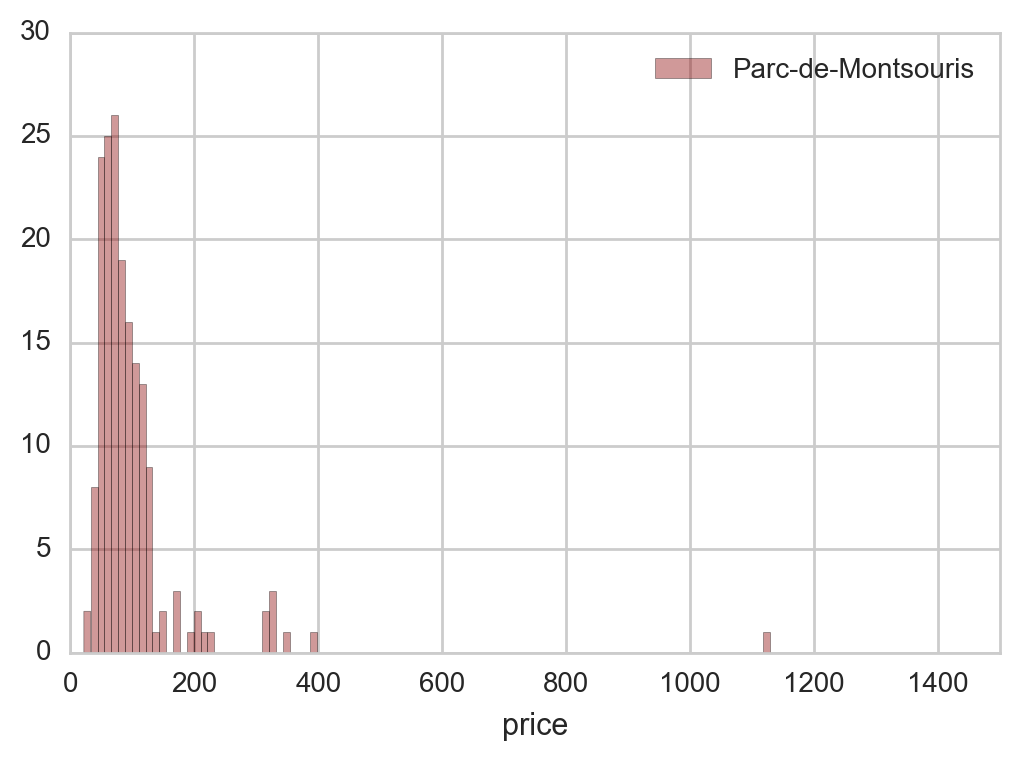

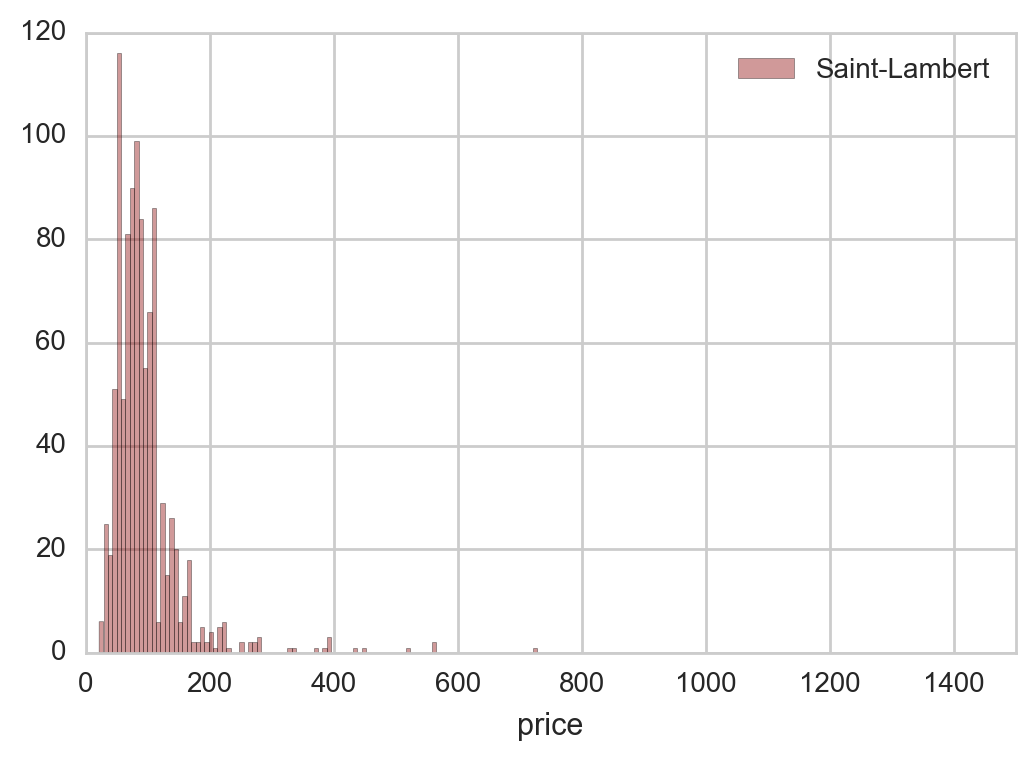

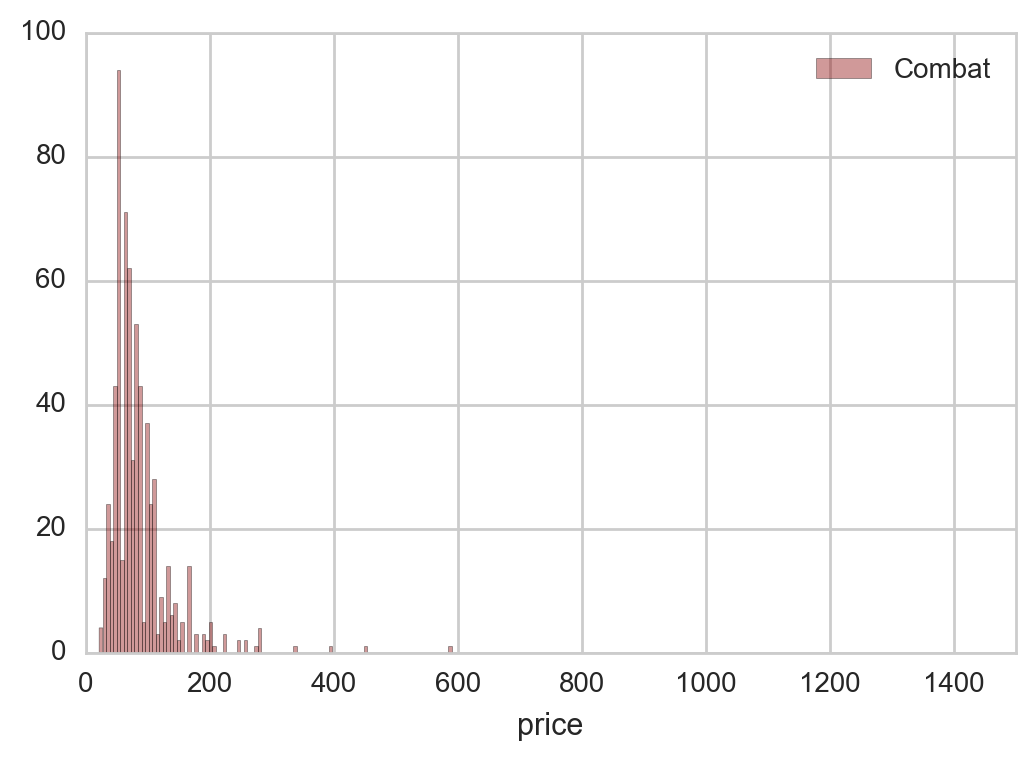

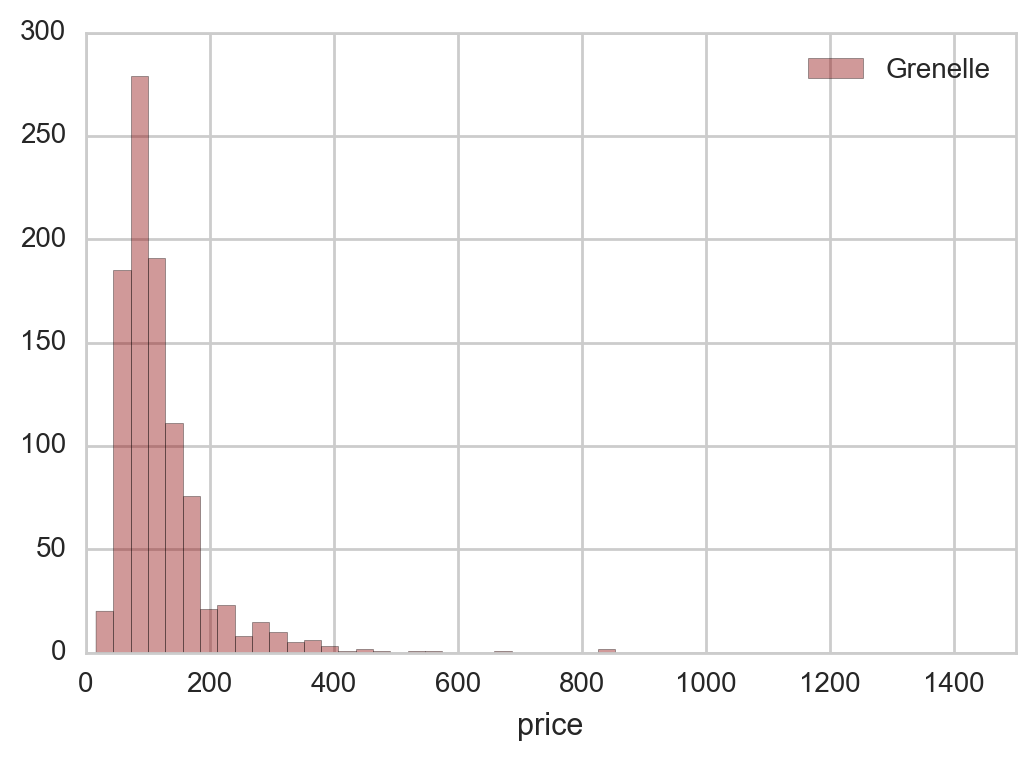

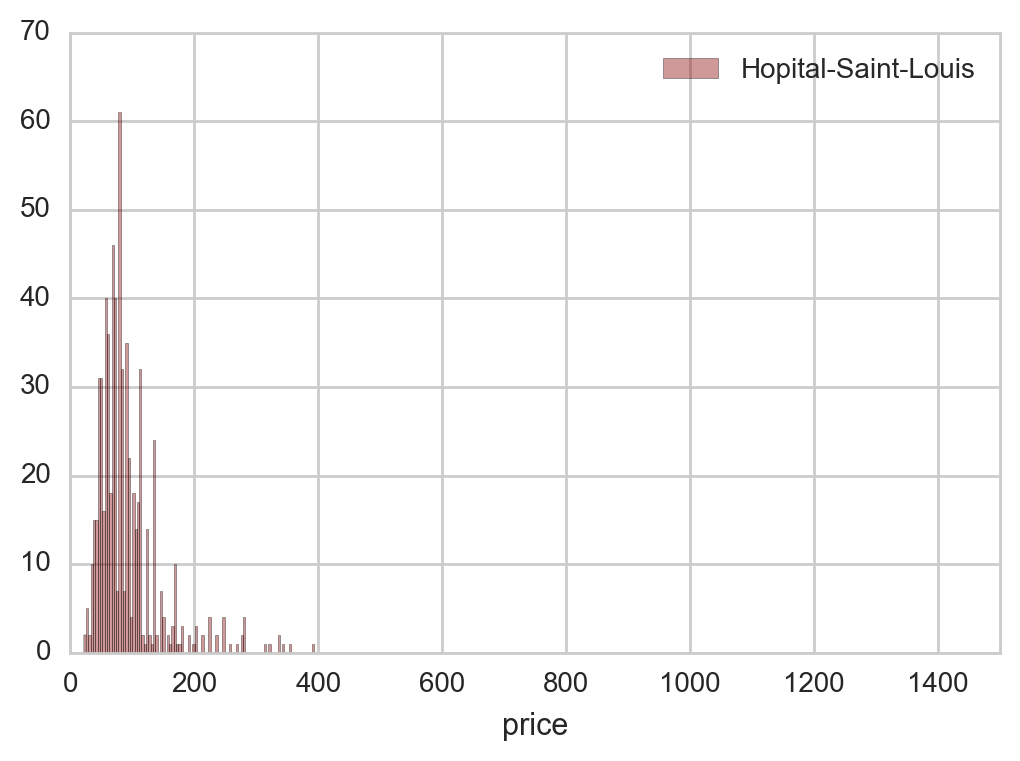

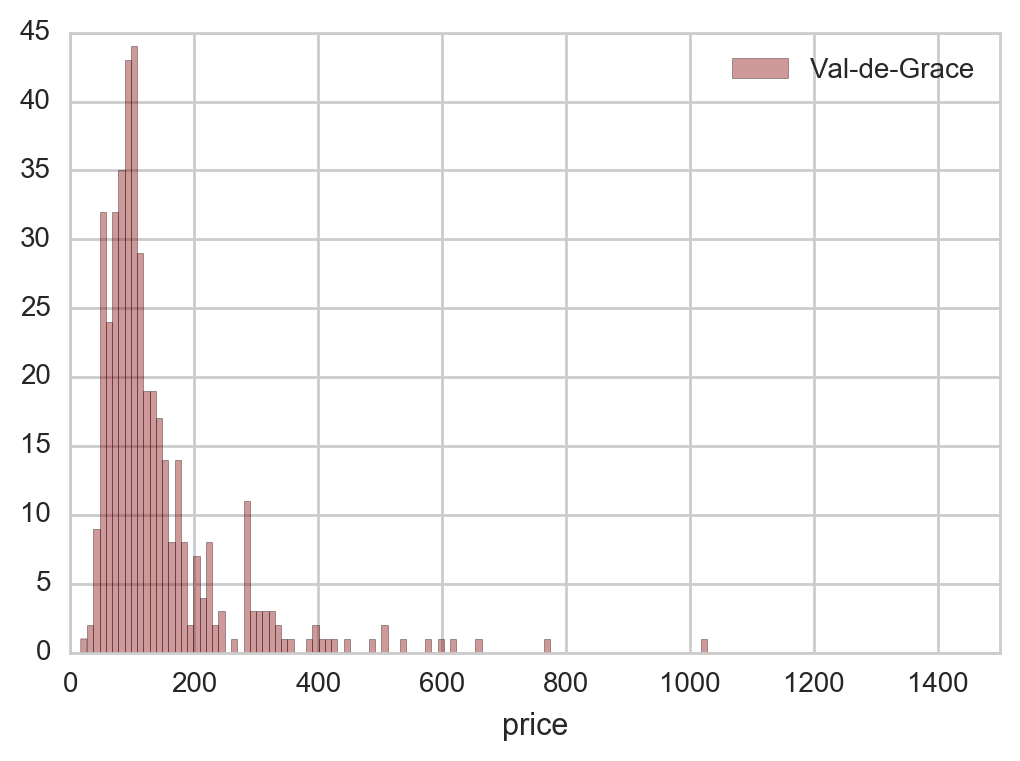

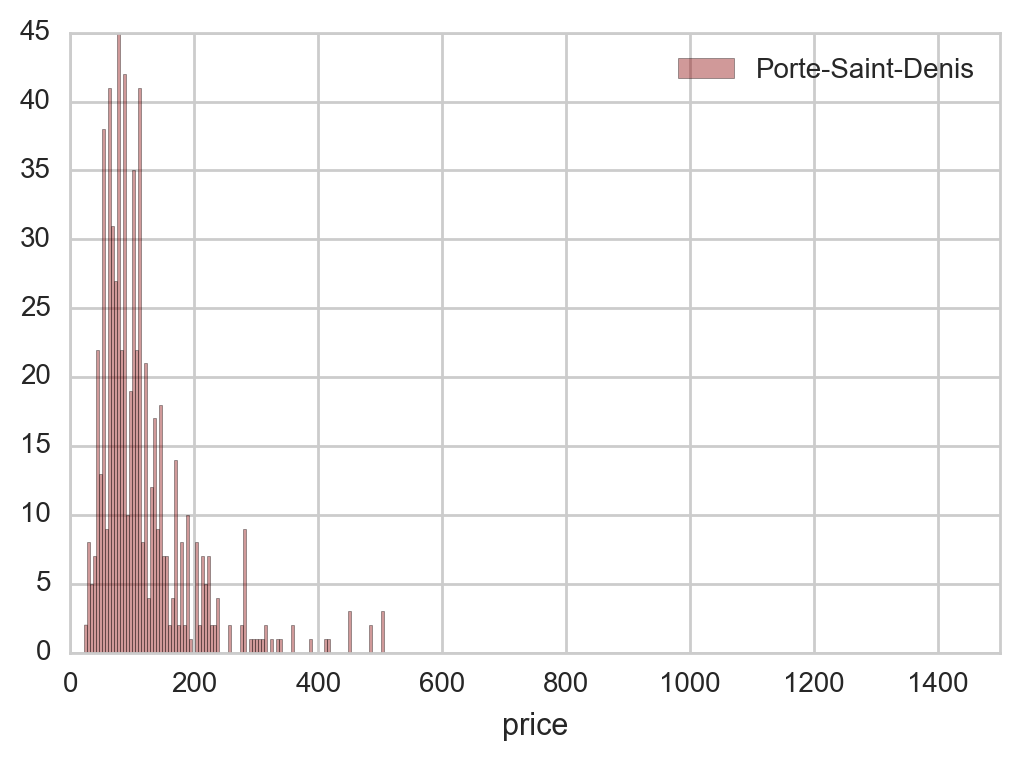

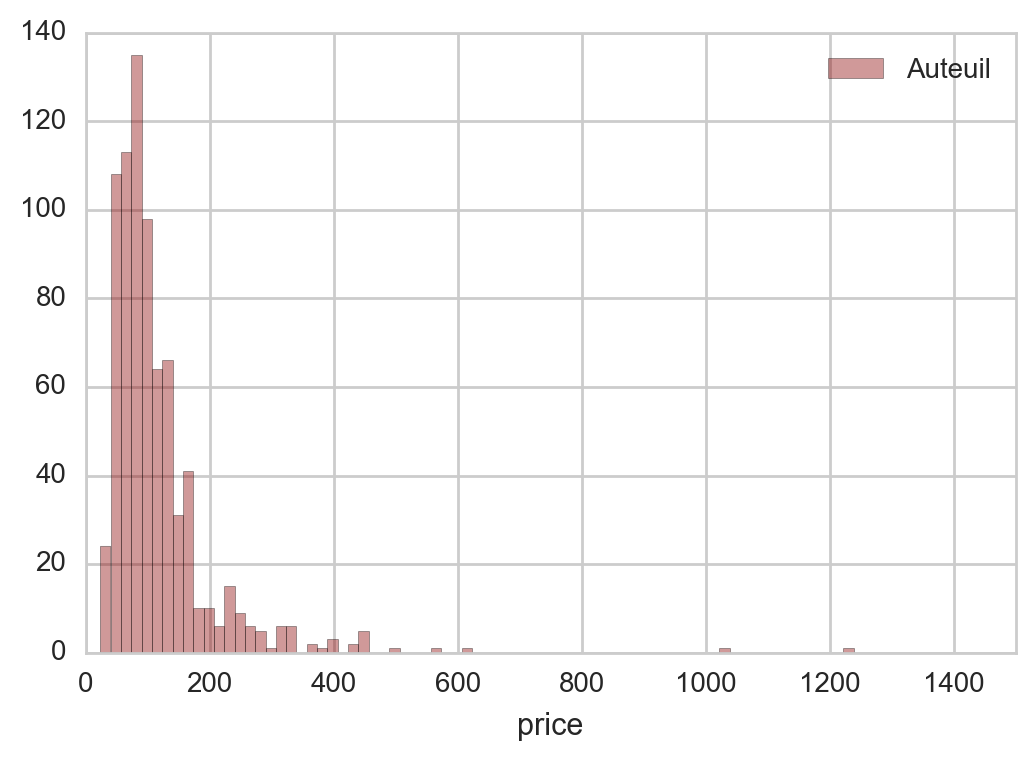

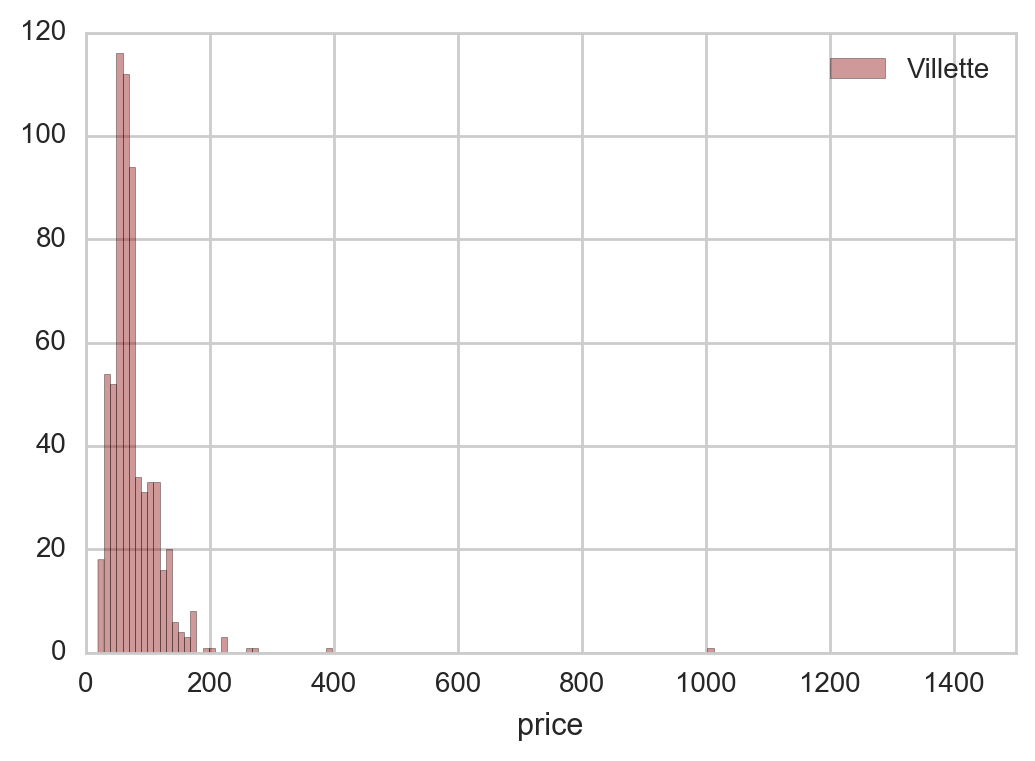

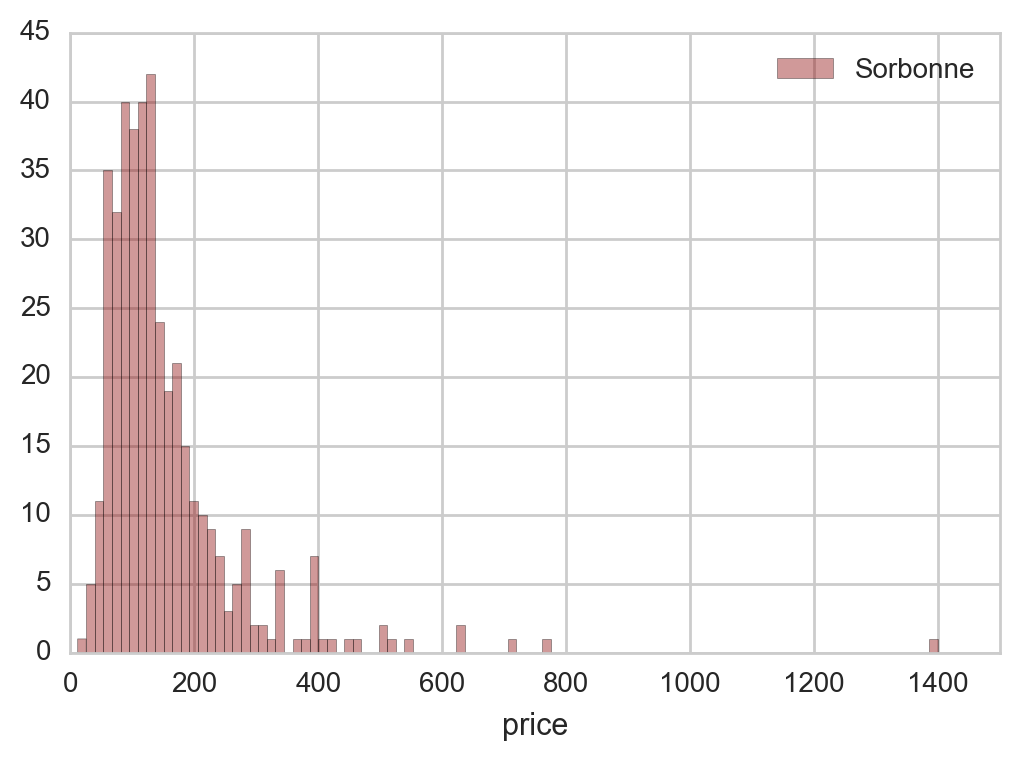

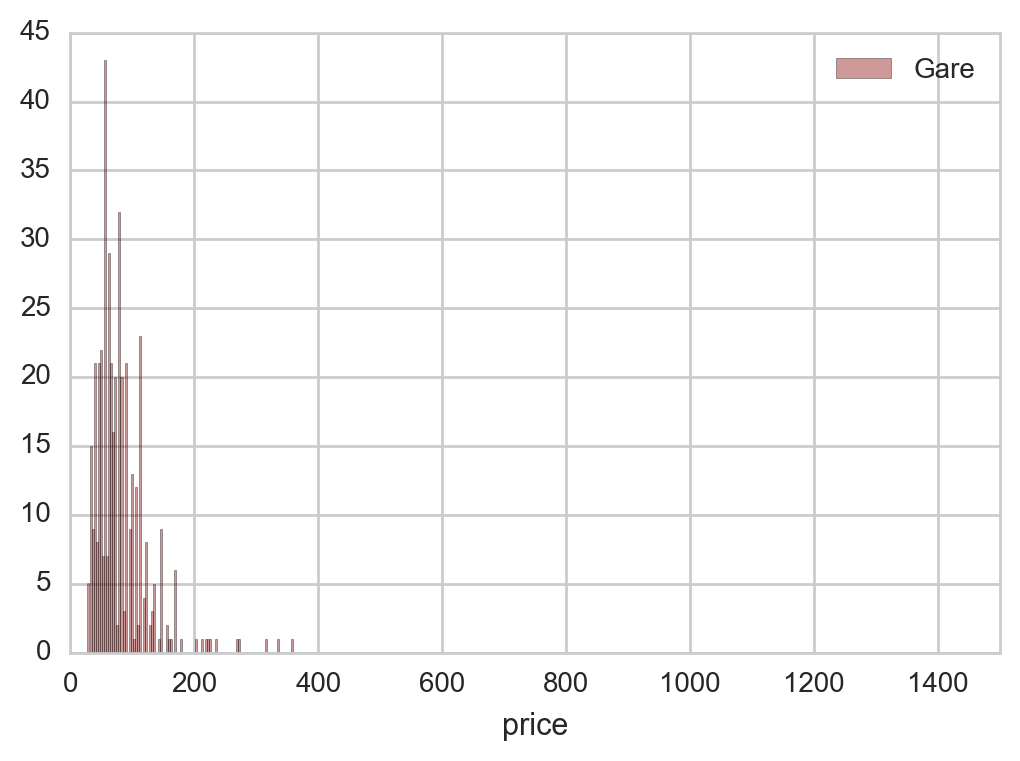

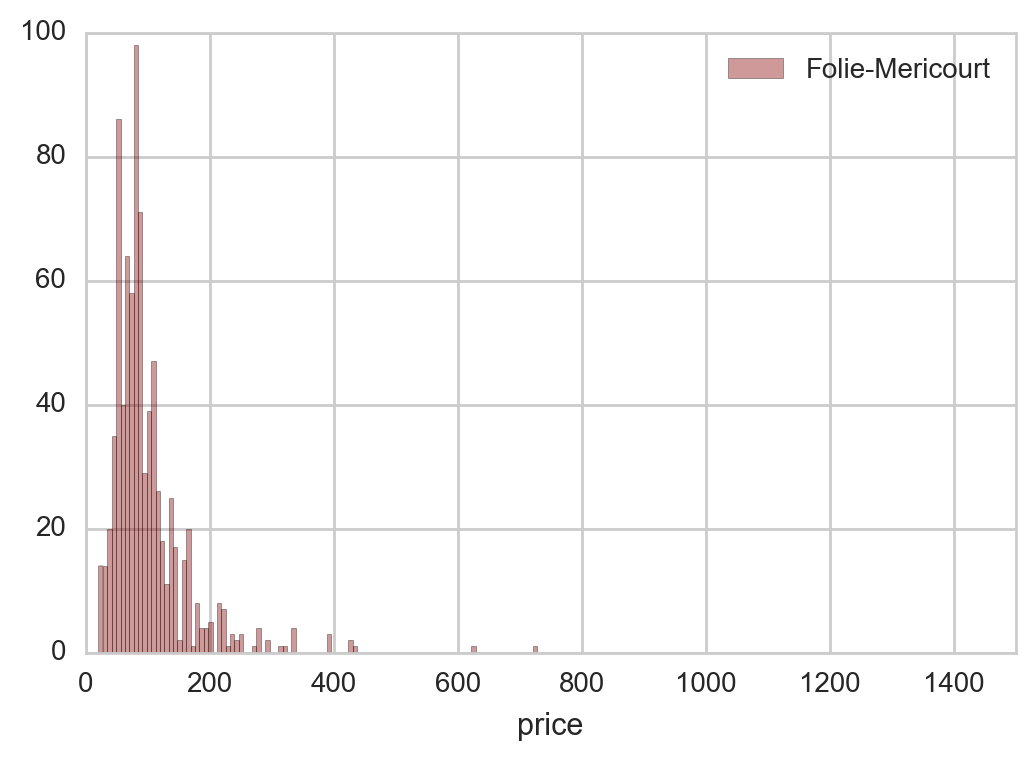

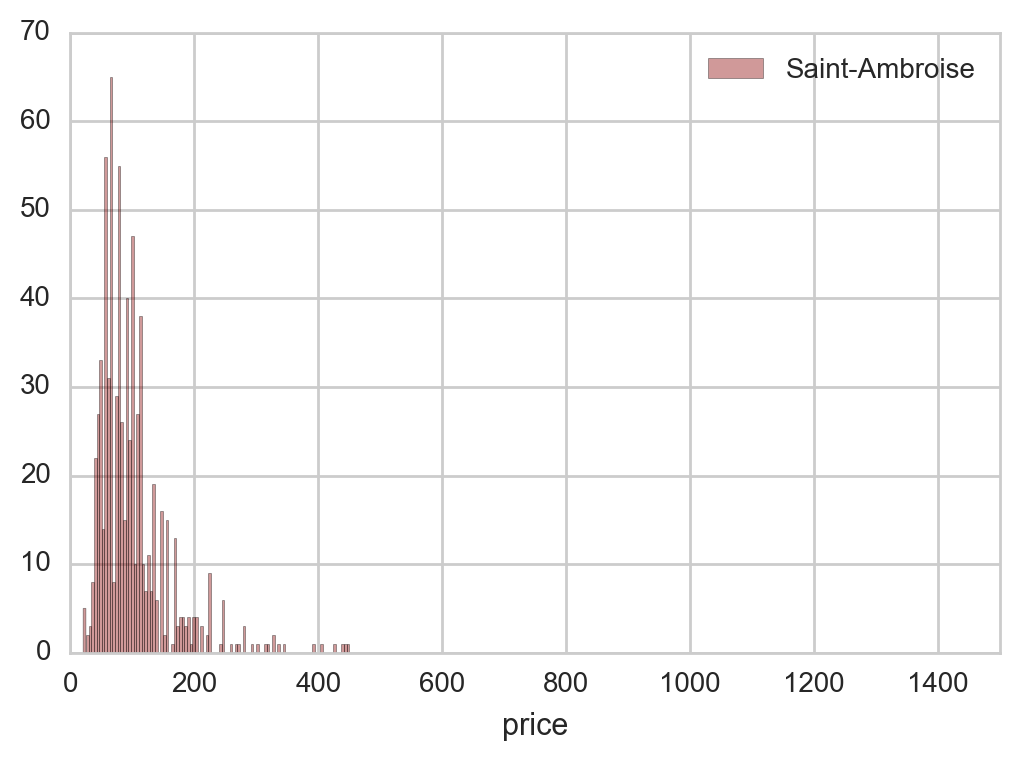

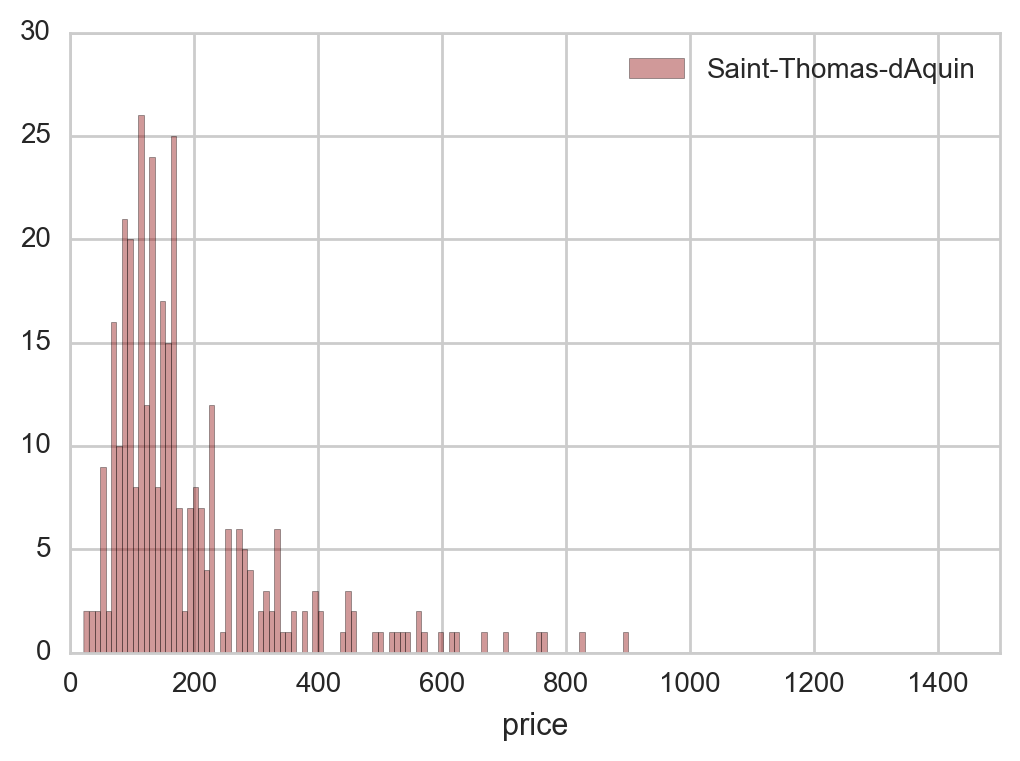

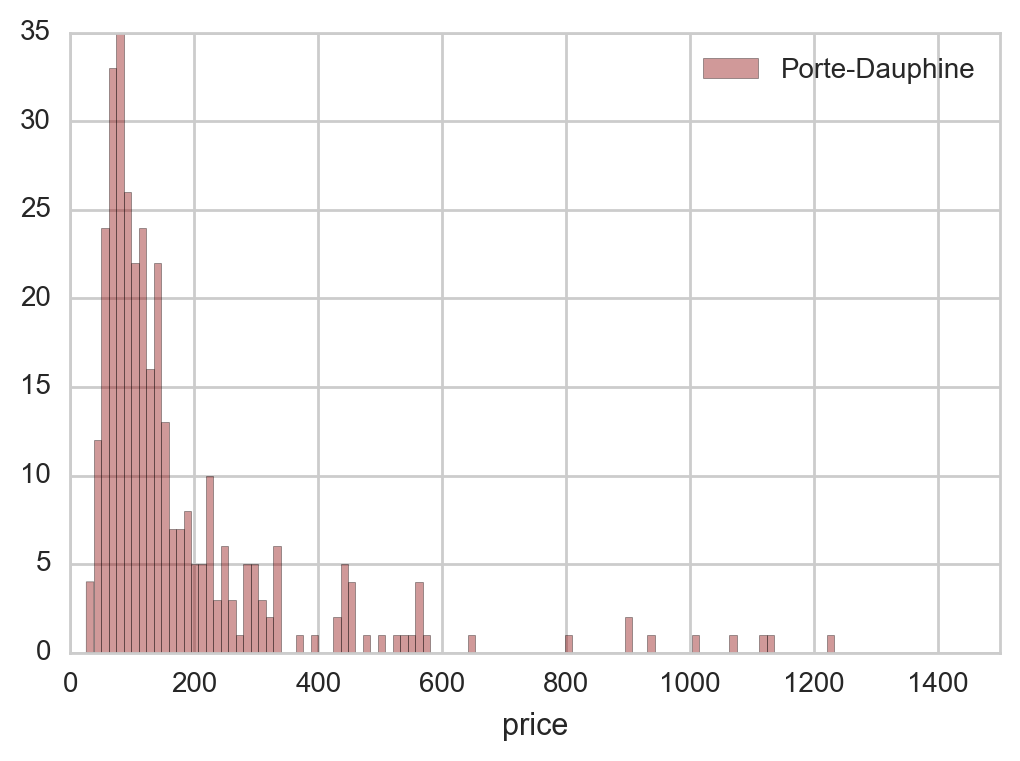

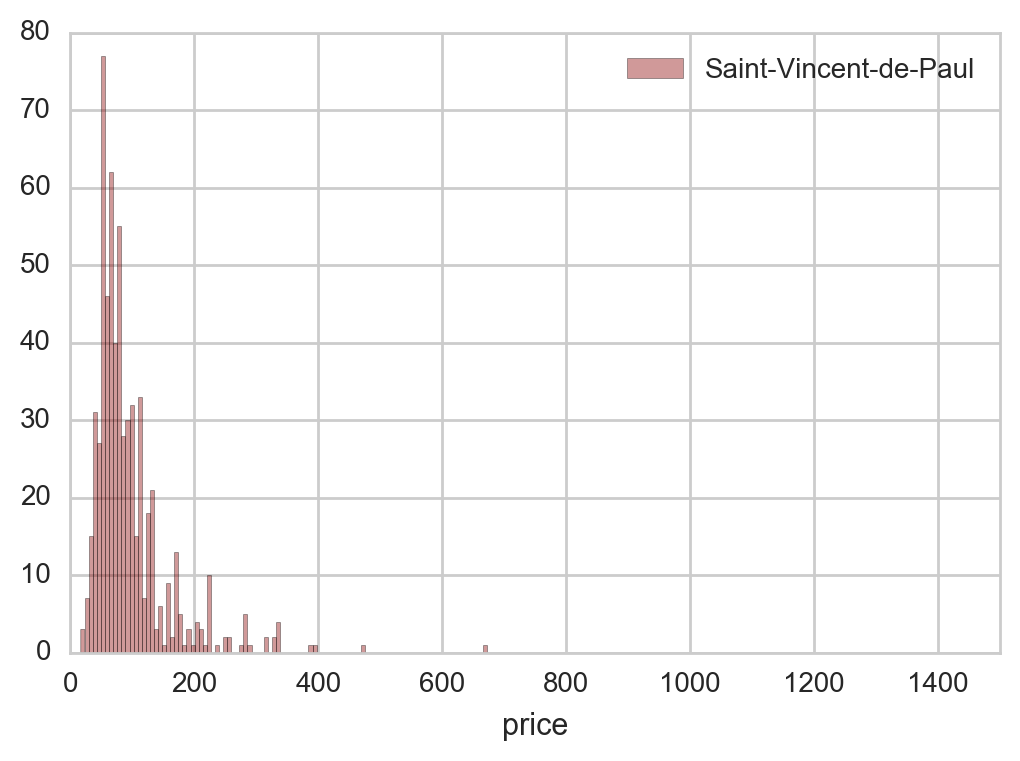

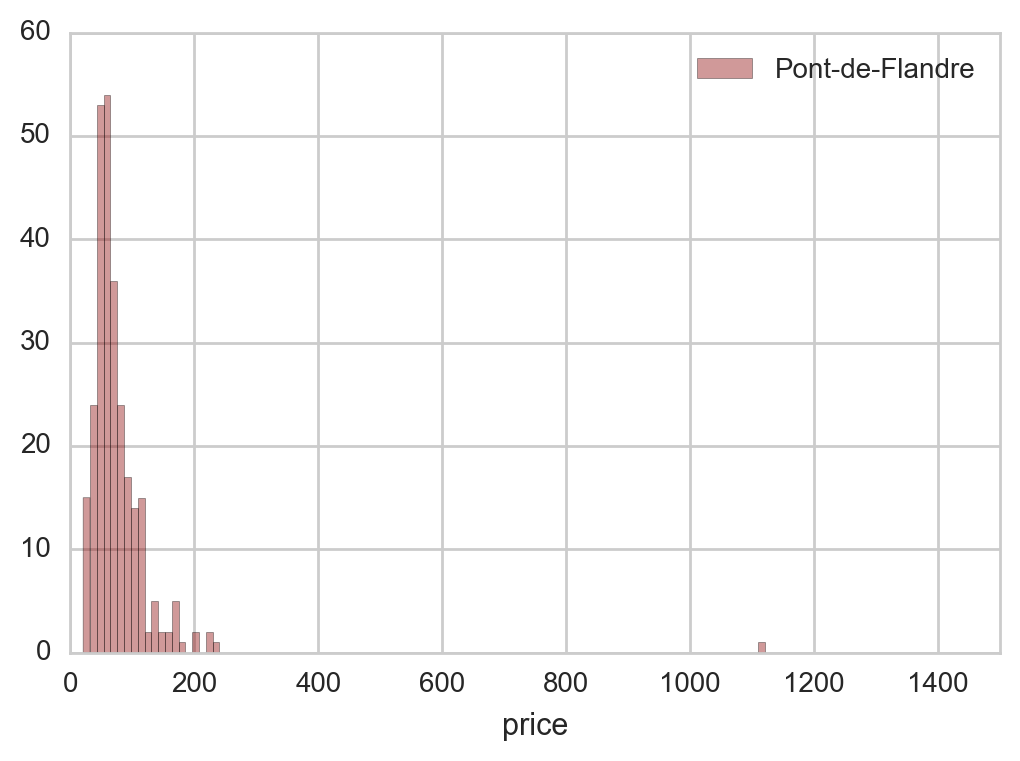

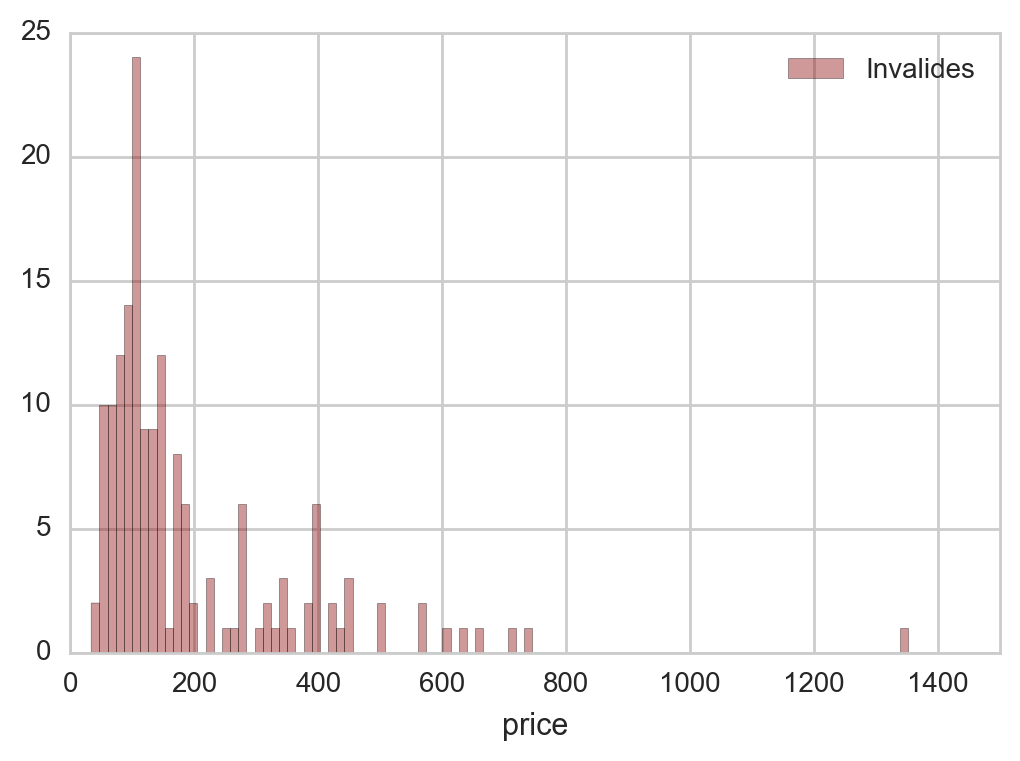

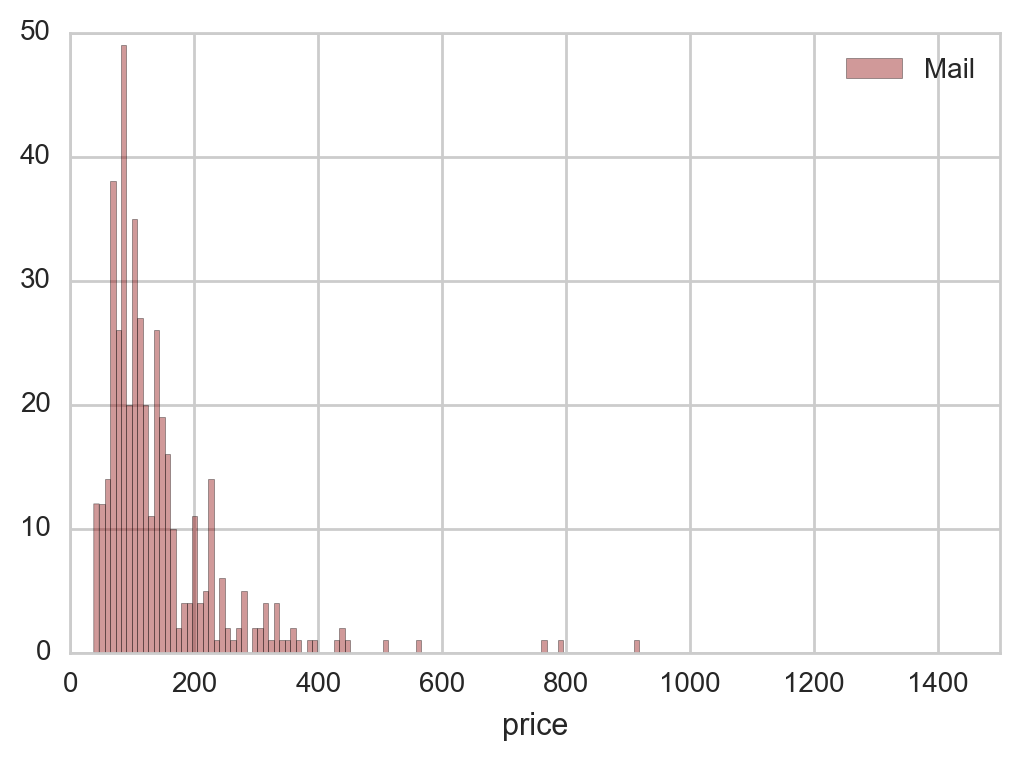

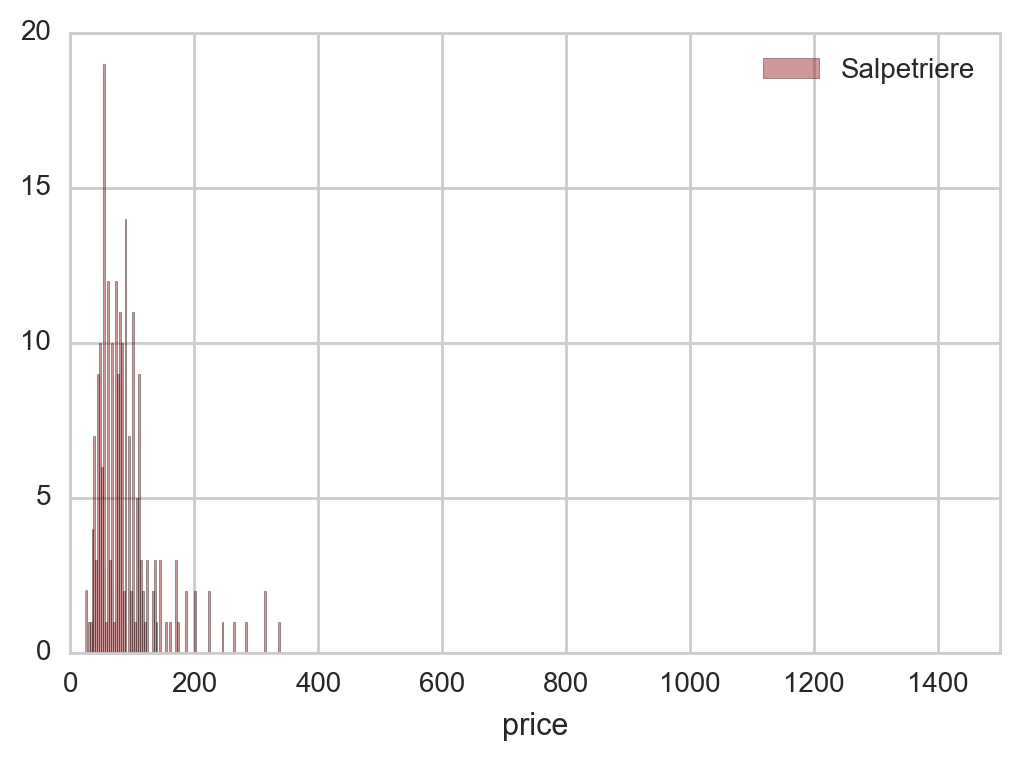

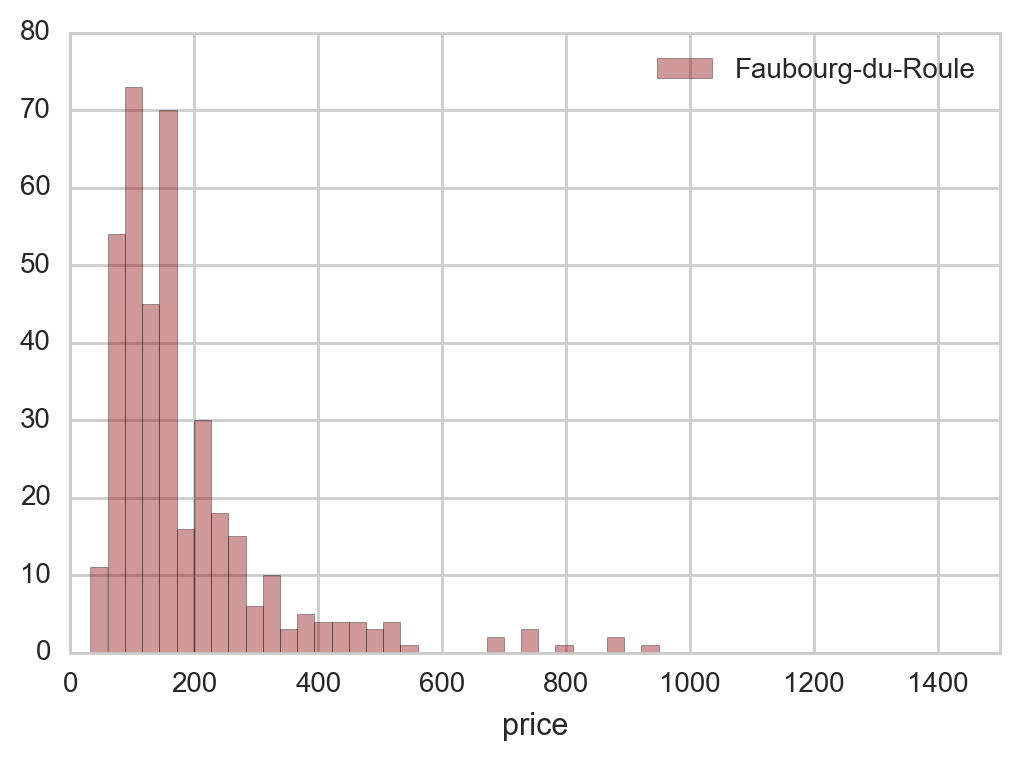

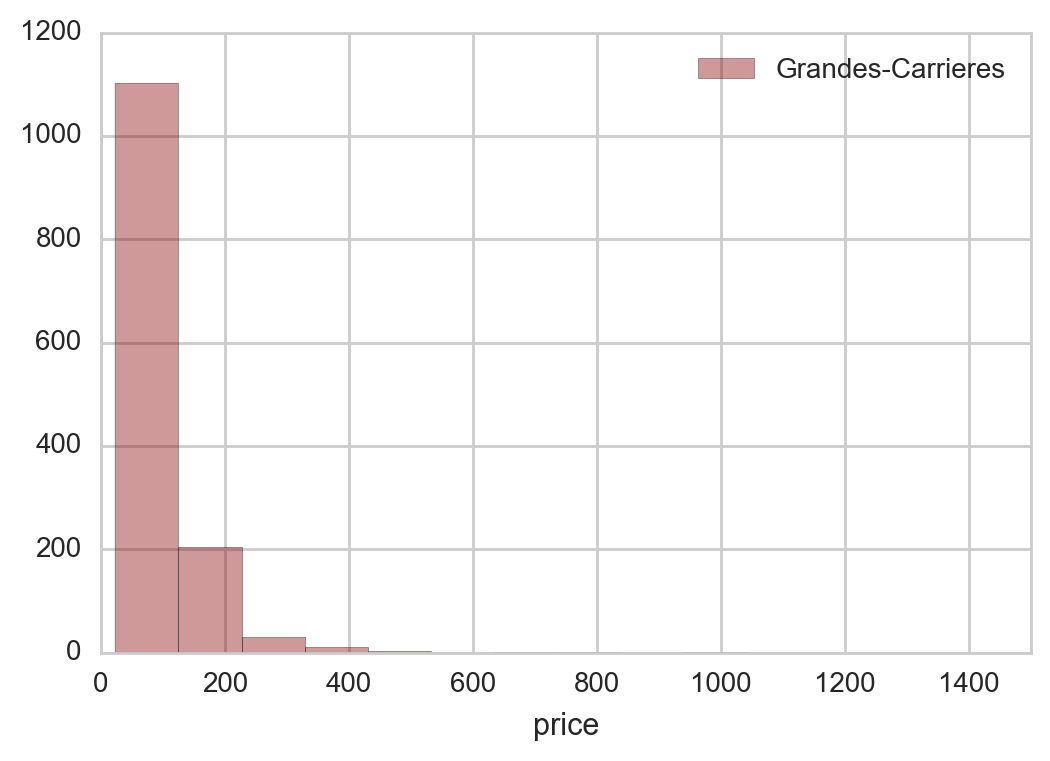

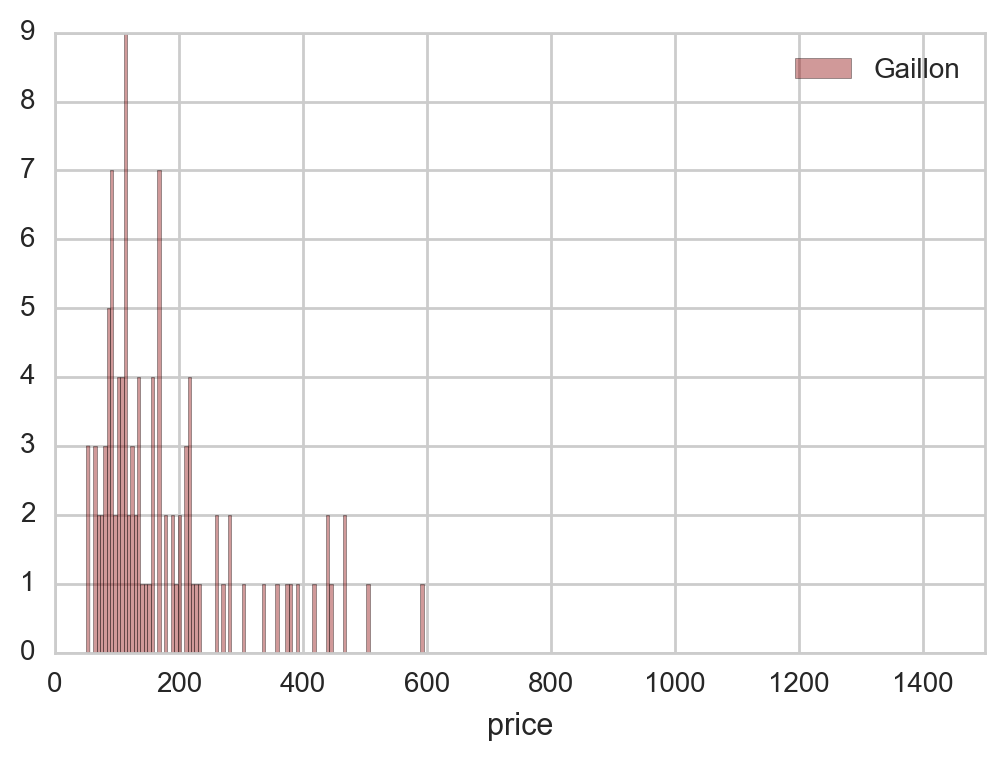

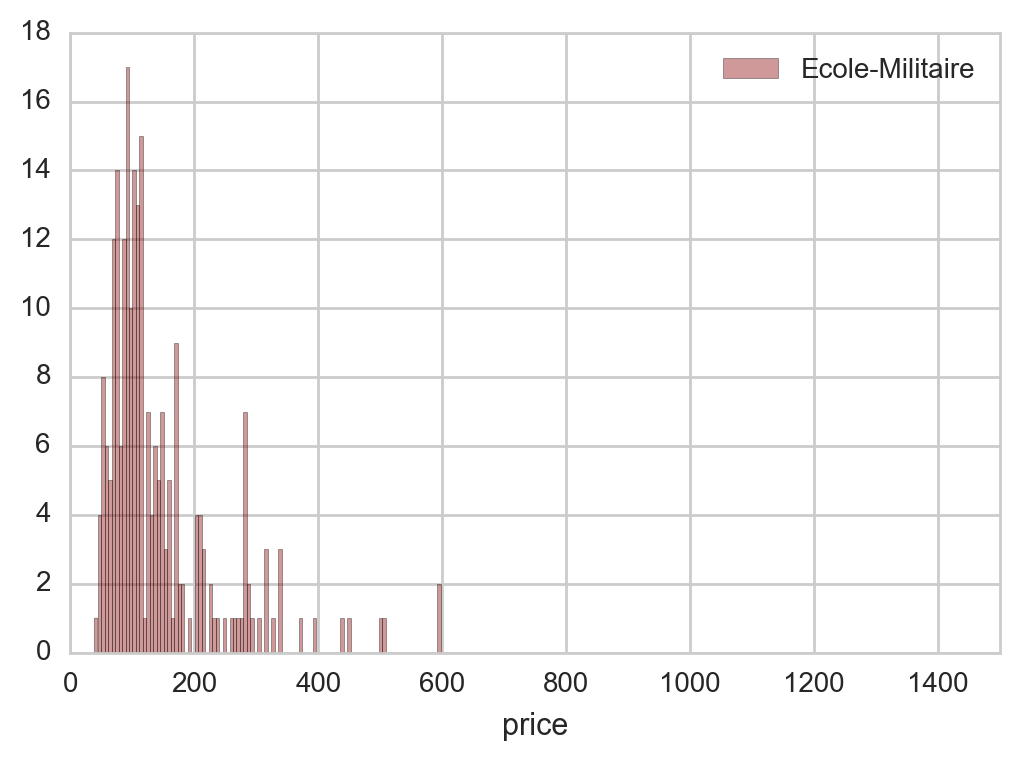

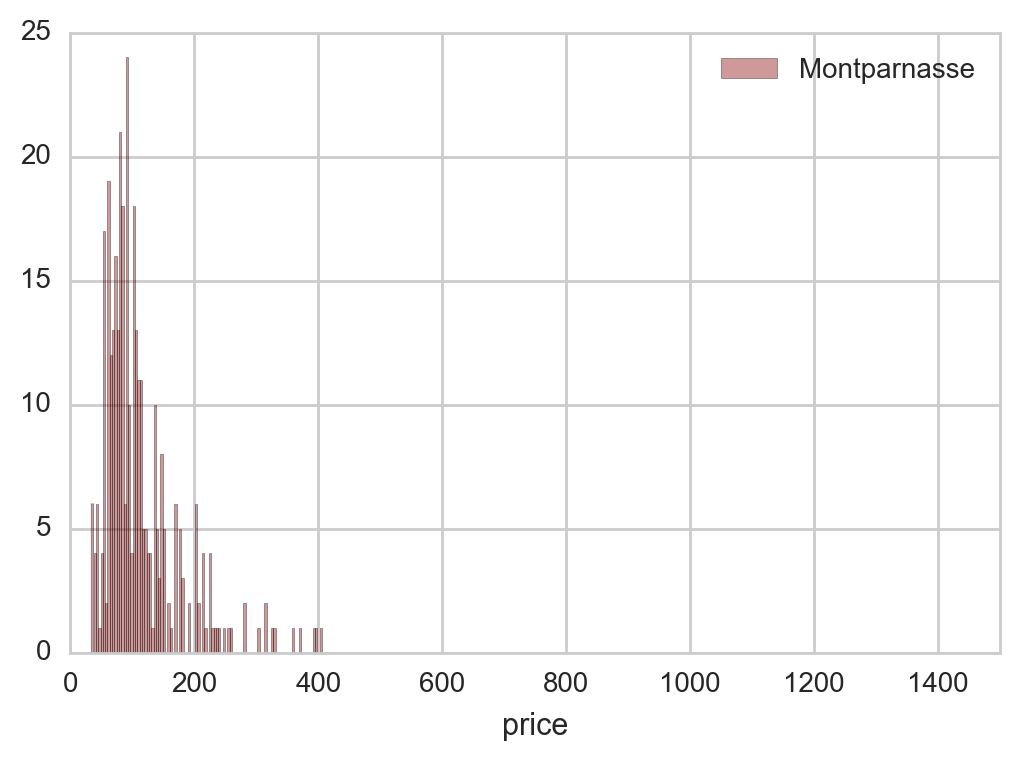

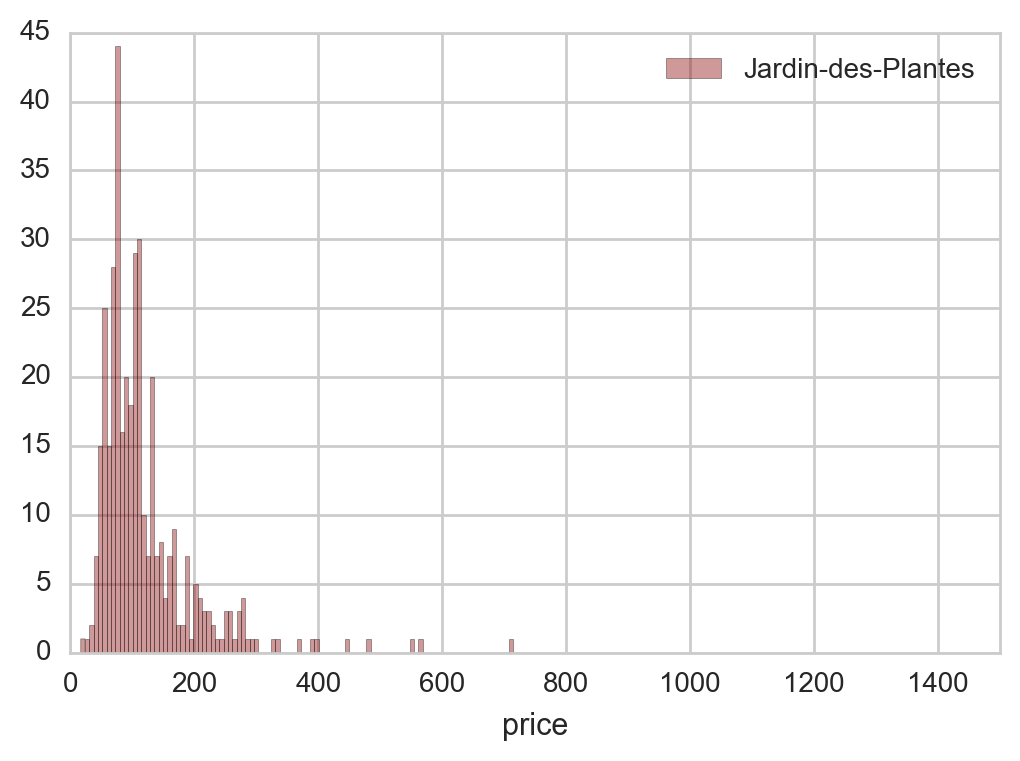

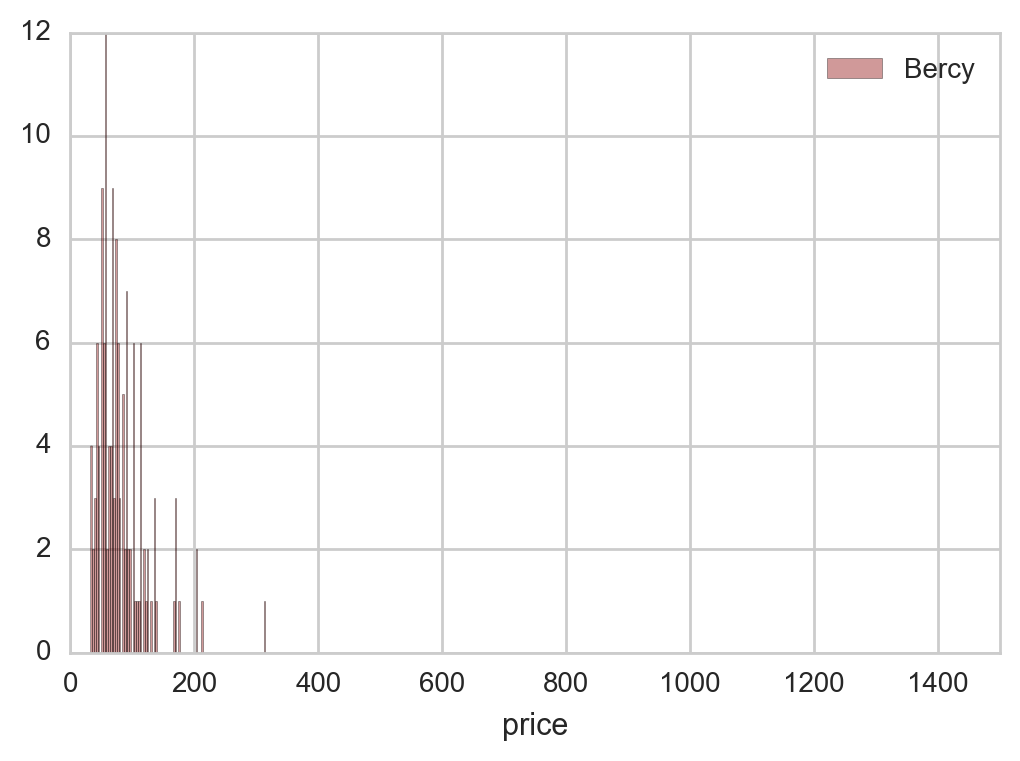

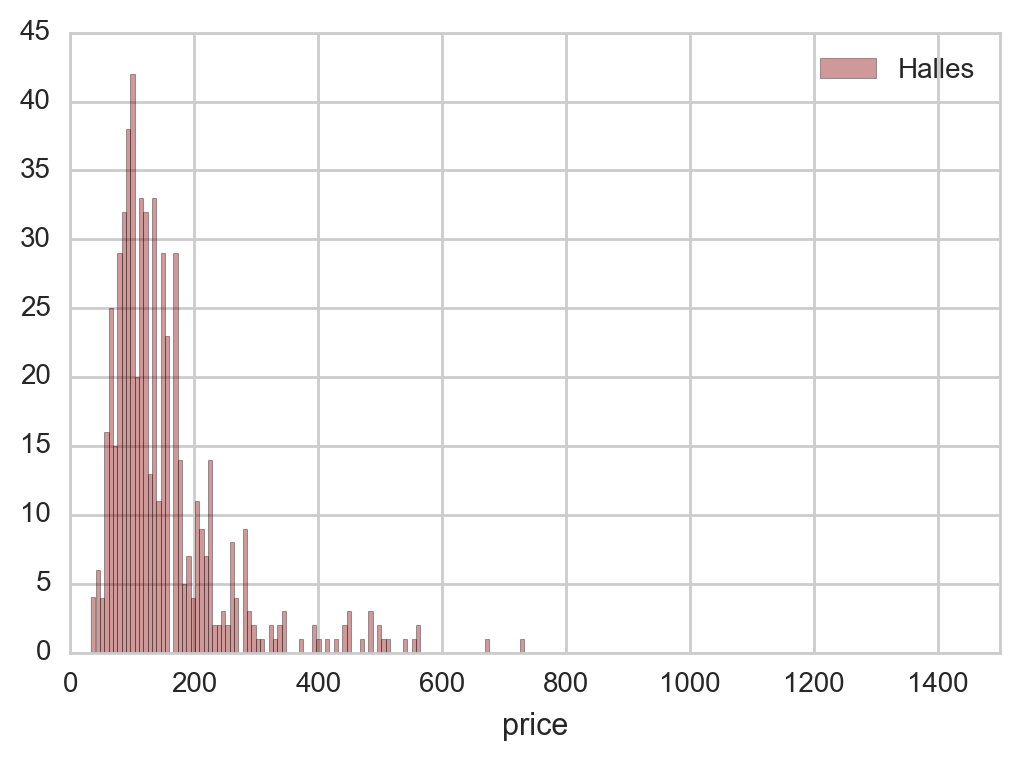

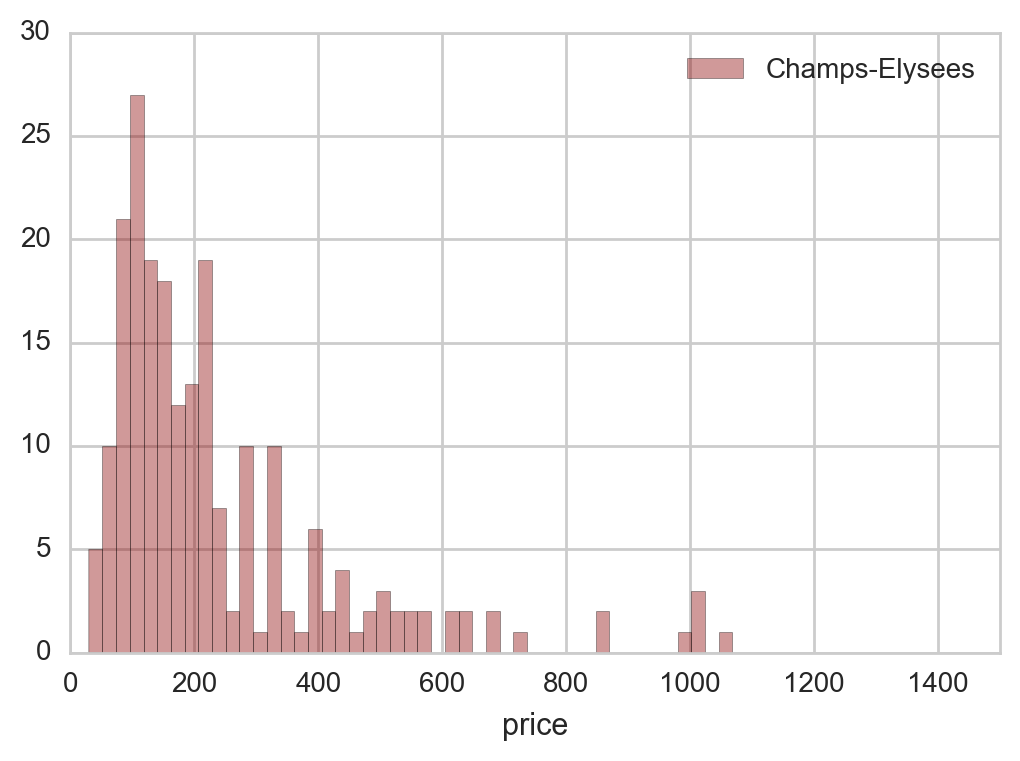

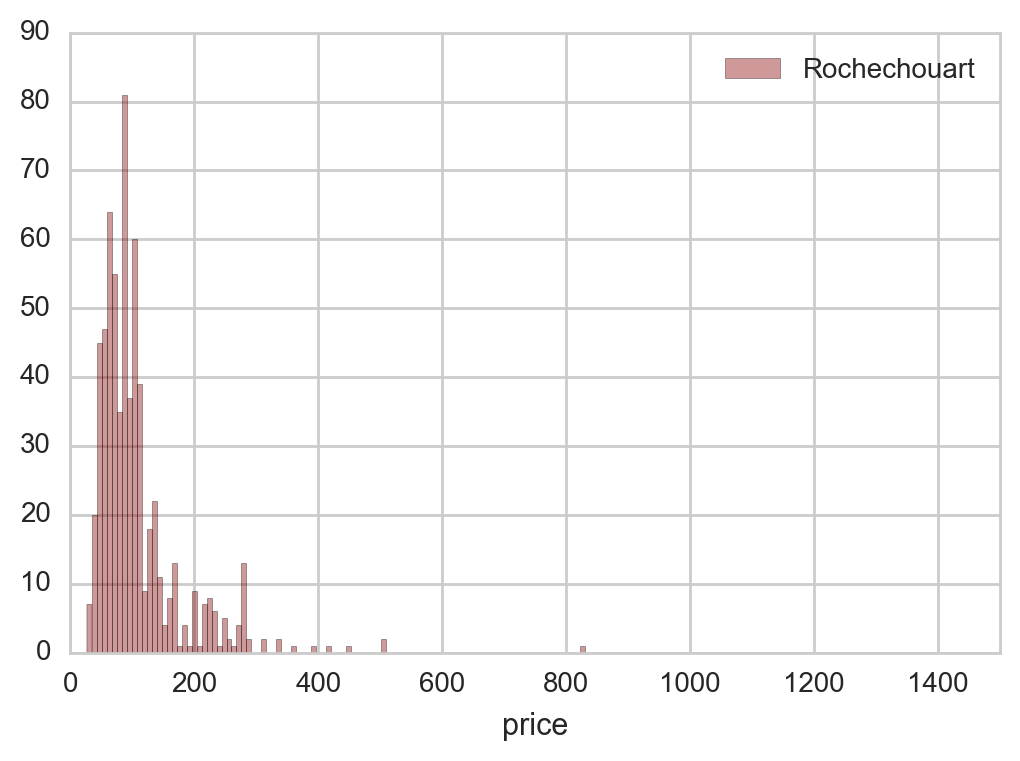

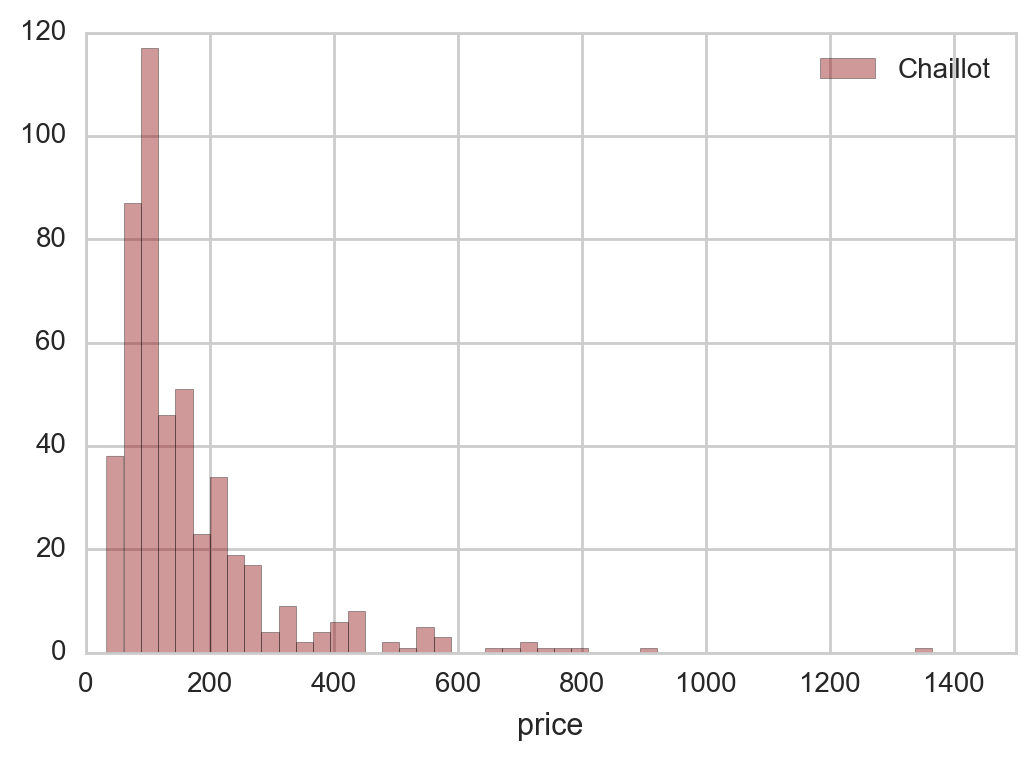

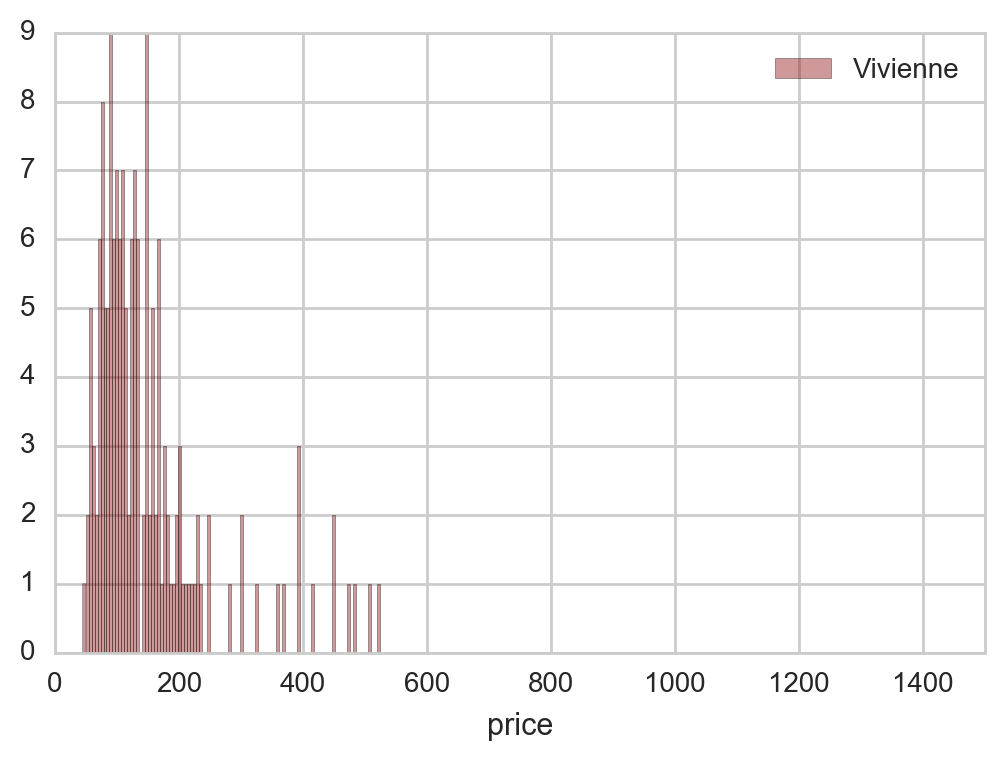

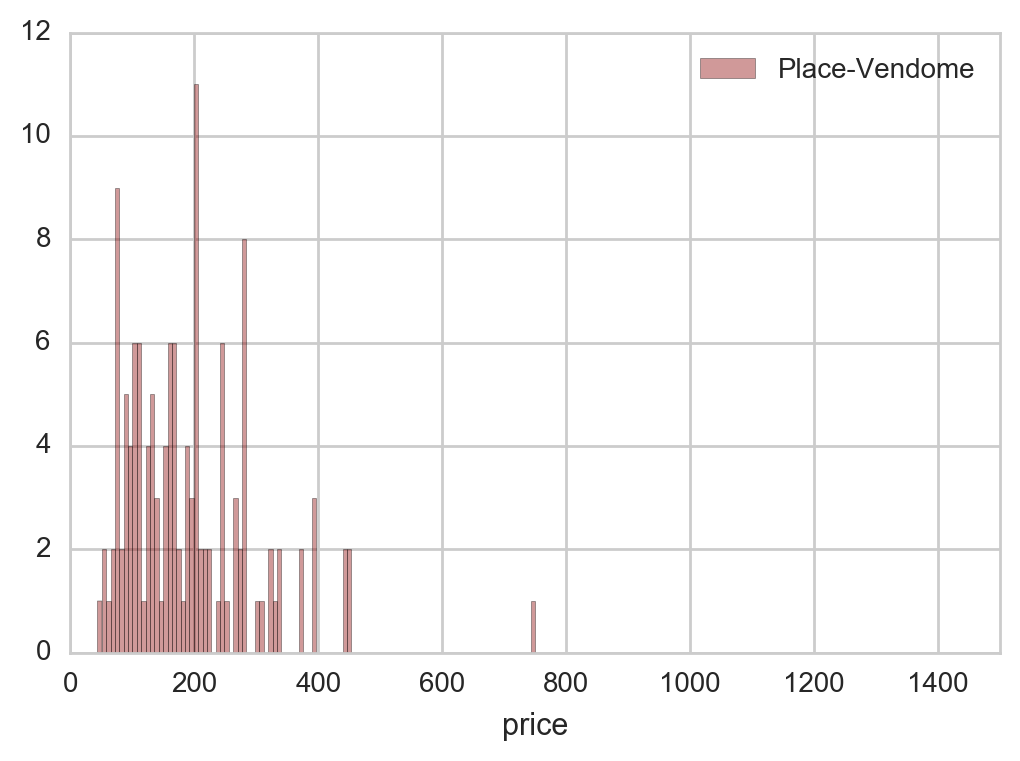

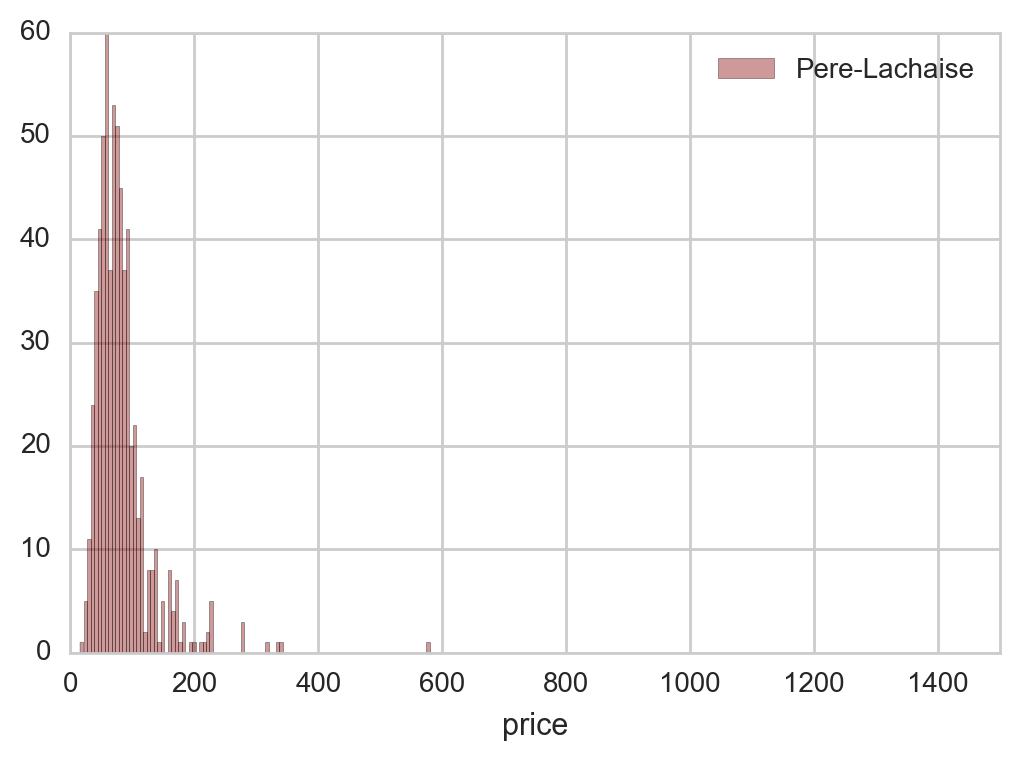

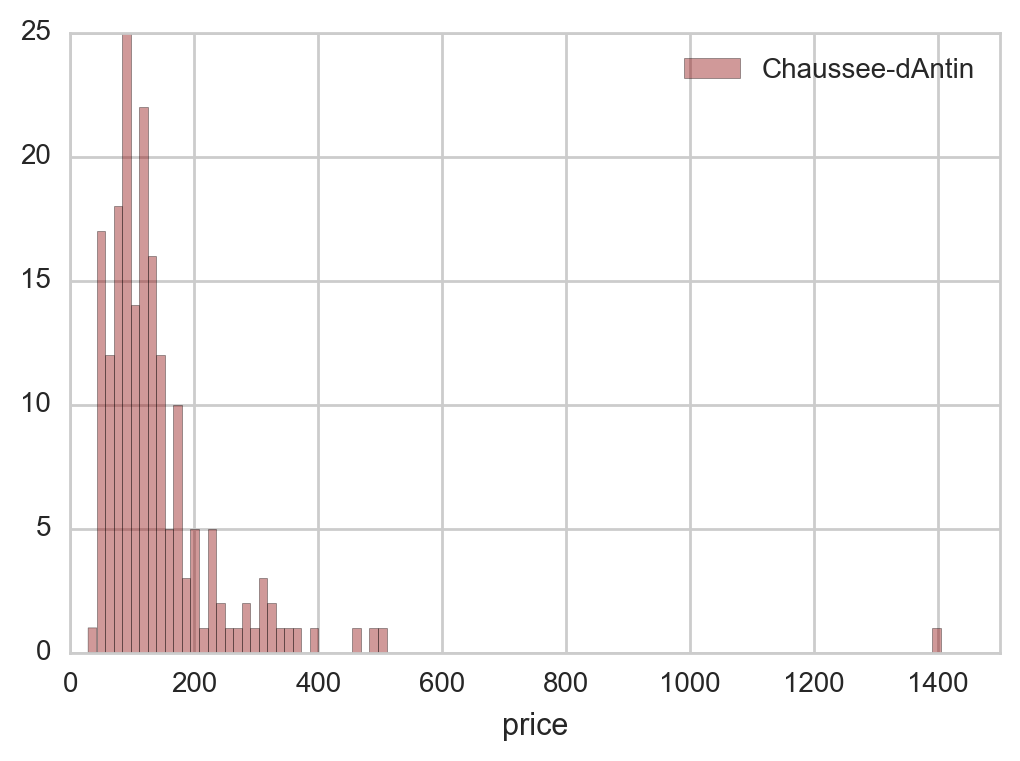

In [145]:
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(paris.neighborhood.unique())):
    pa = paris[paris.neighborhood == paris.neighborhood.unique()[i]]
    
    ax = sns.distplot(pa.price, color='darkred', bins=100, kde=False, 
                      label = paris.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    ax.set_xlim([0, 1500])
    plt.show()

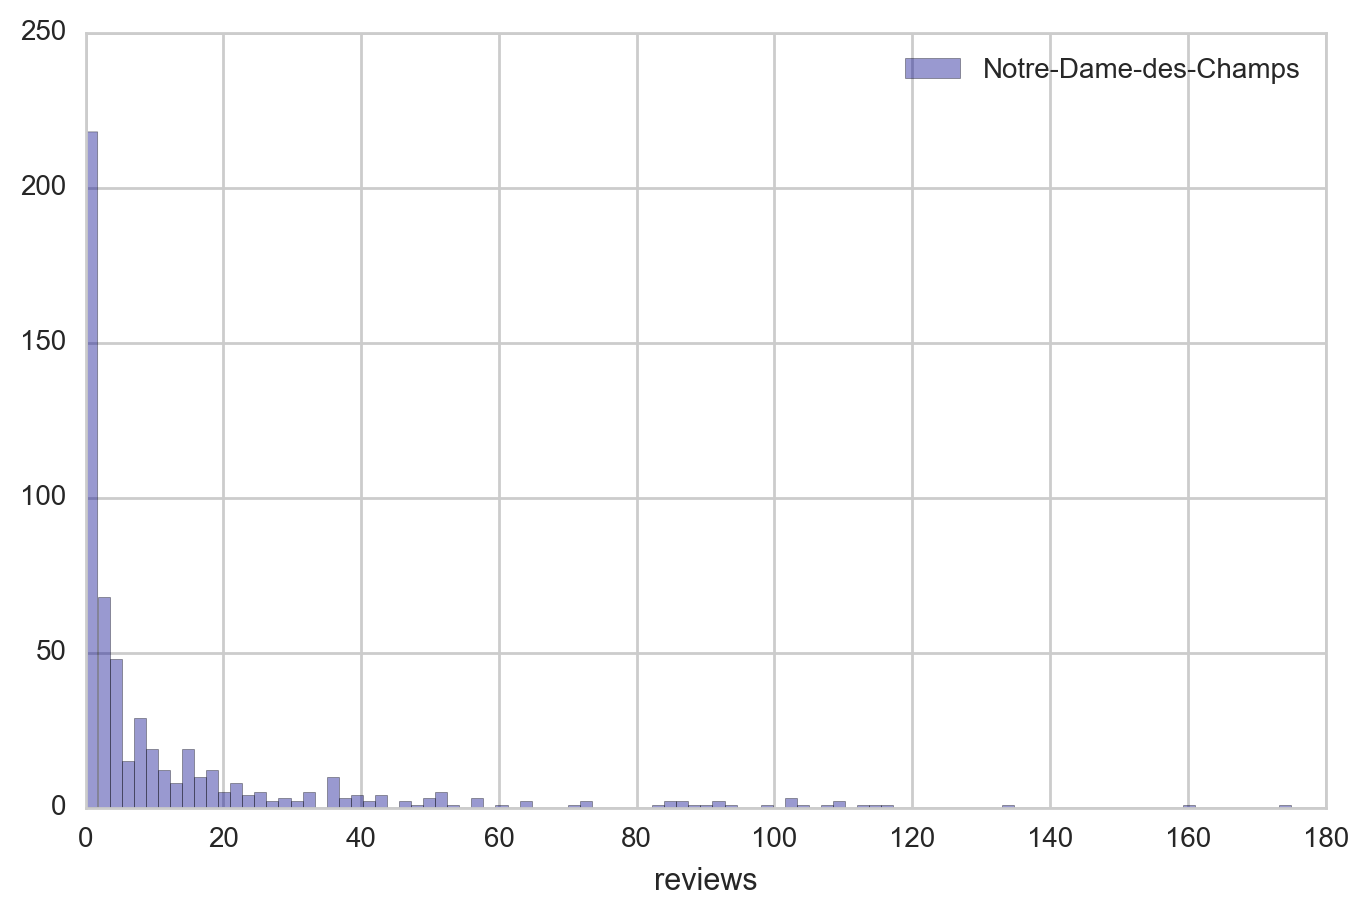

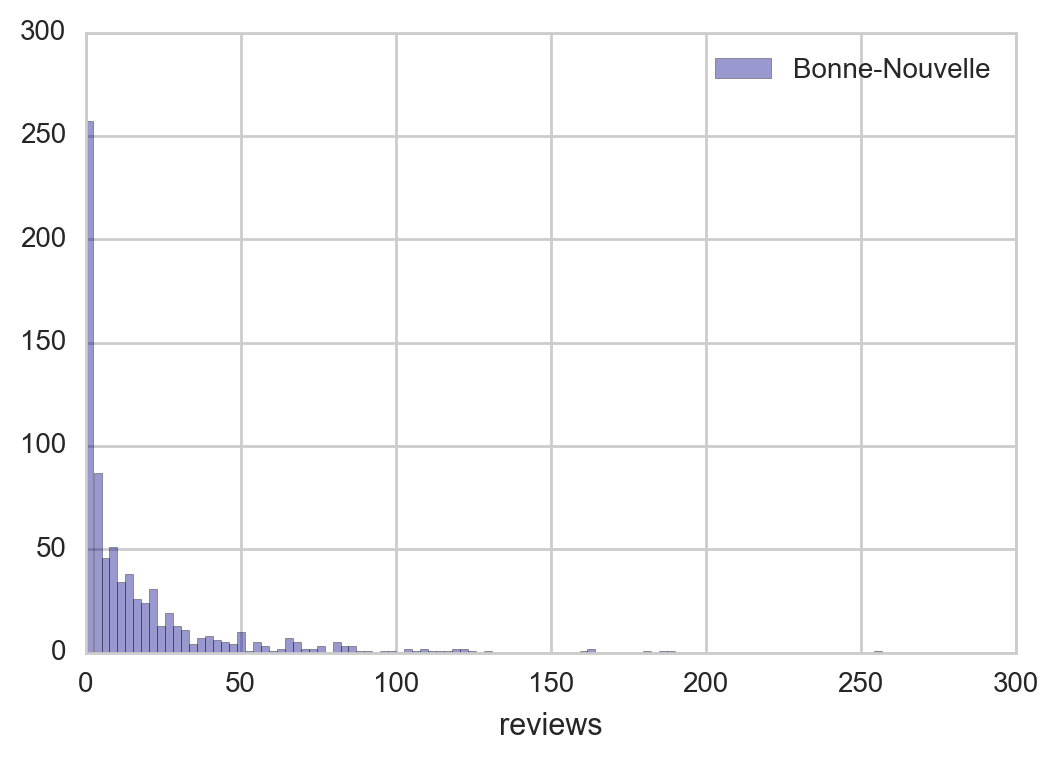

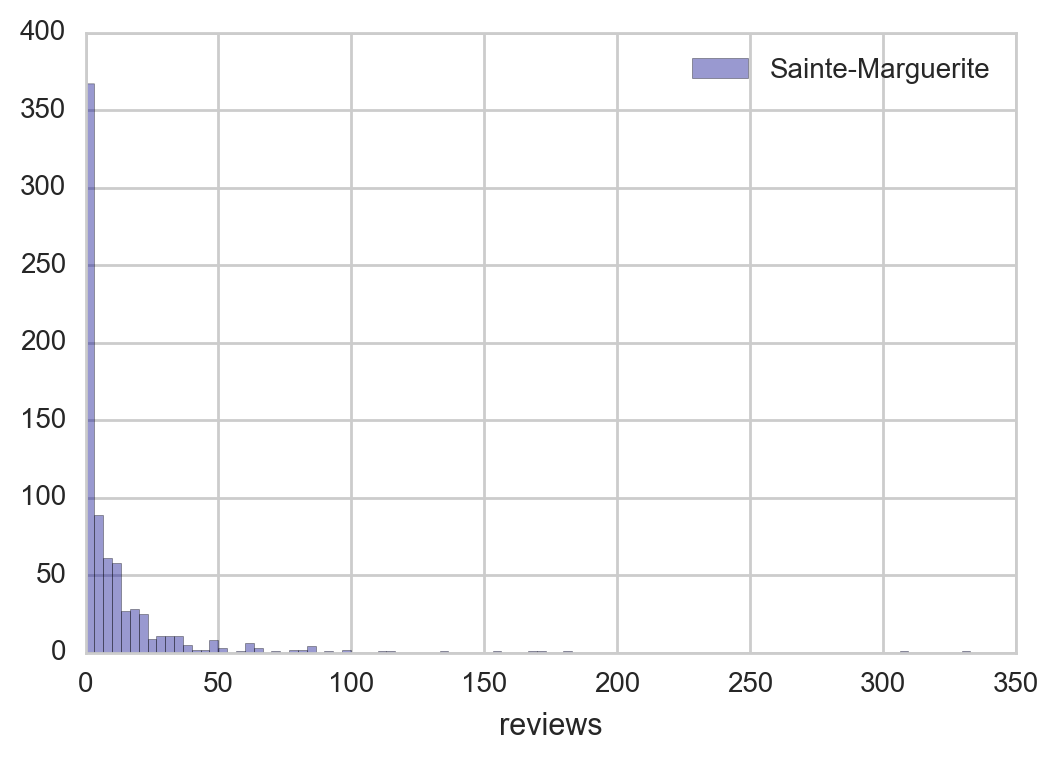

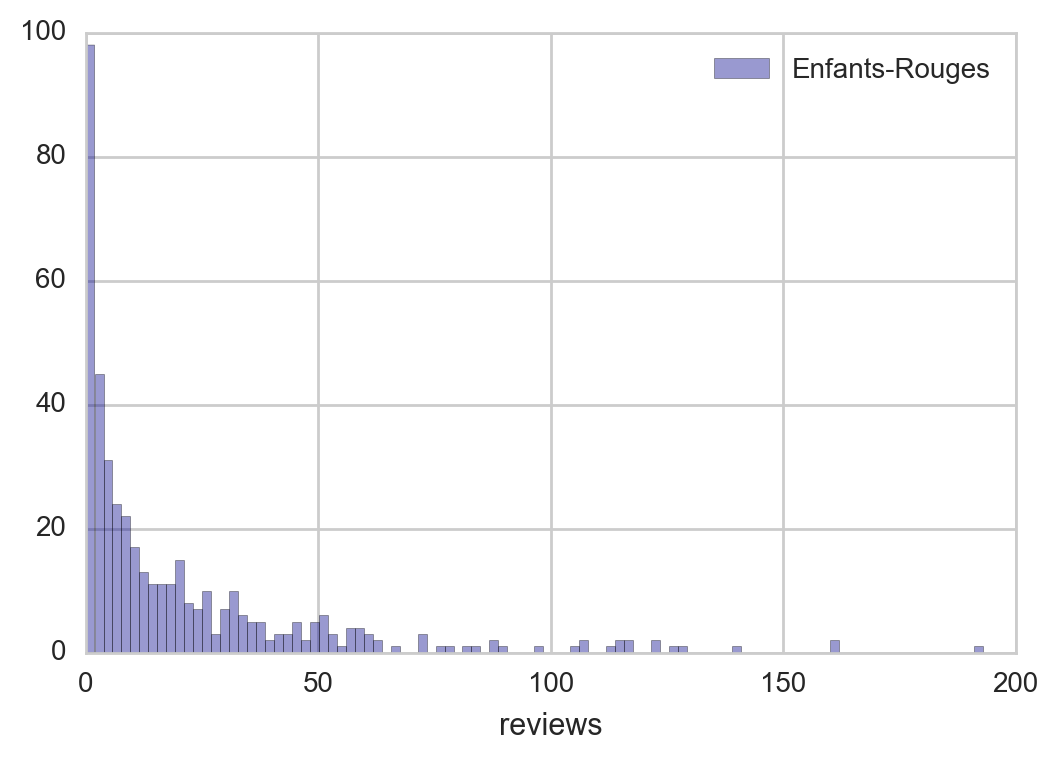

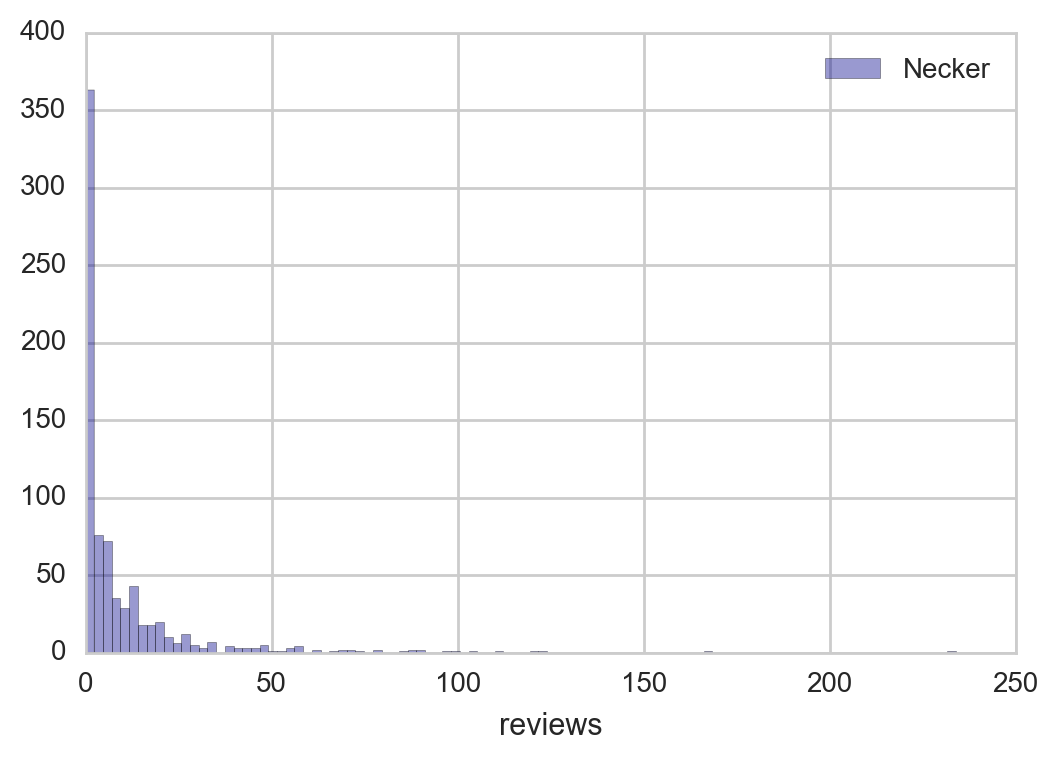

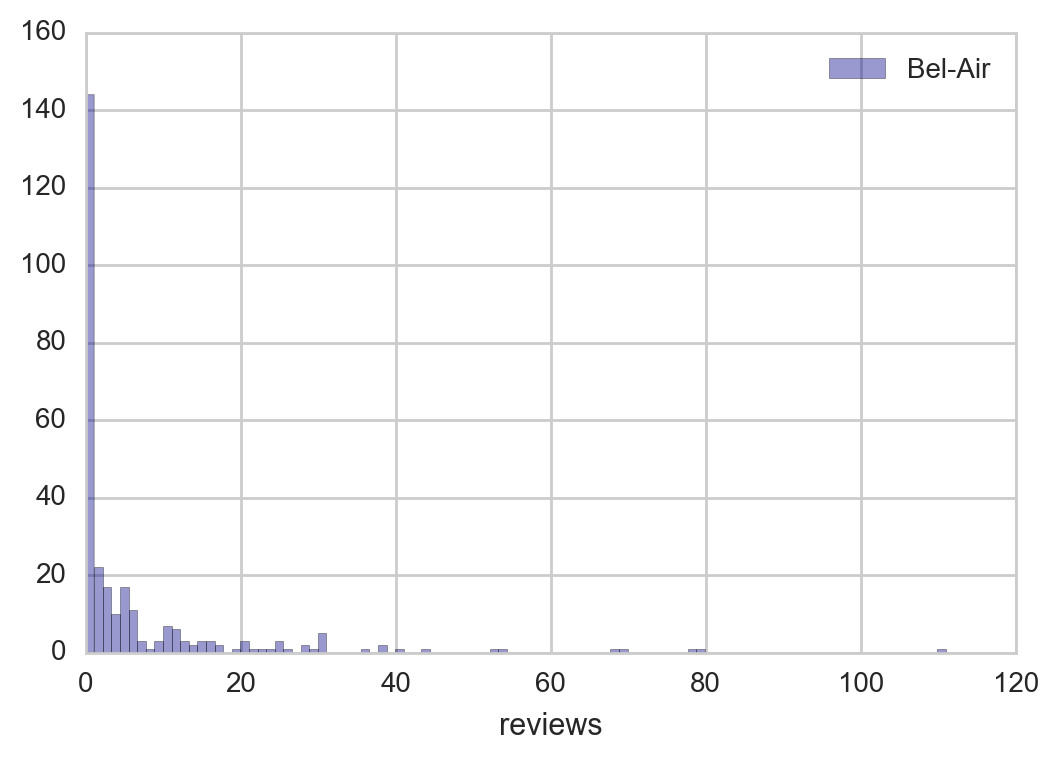

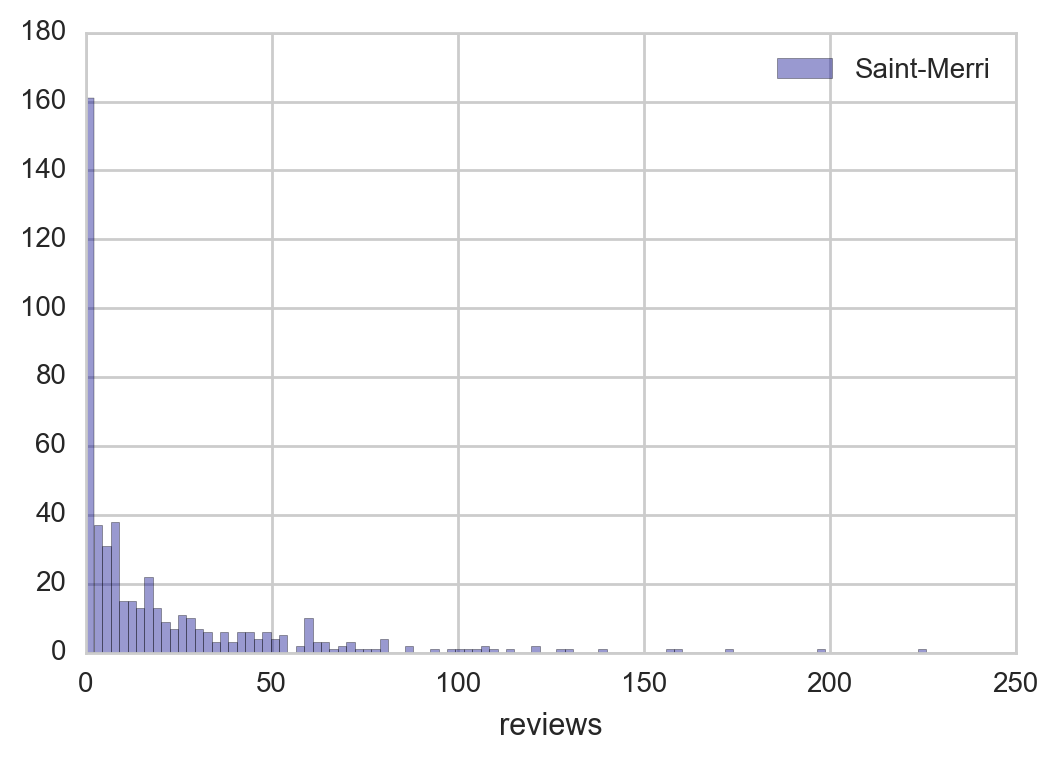

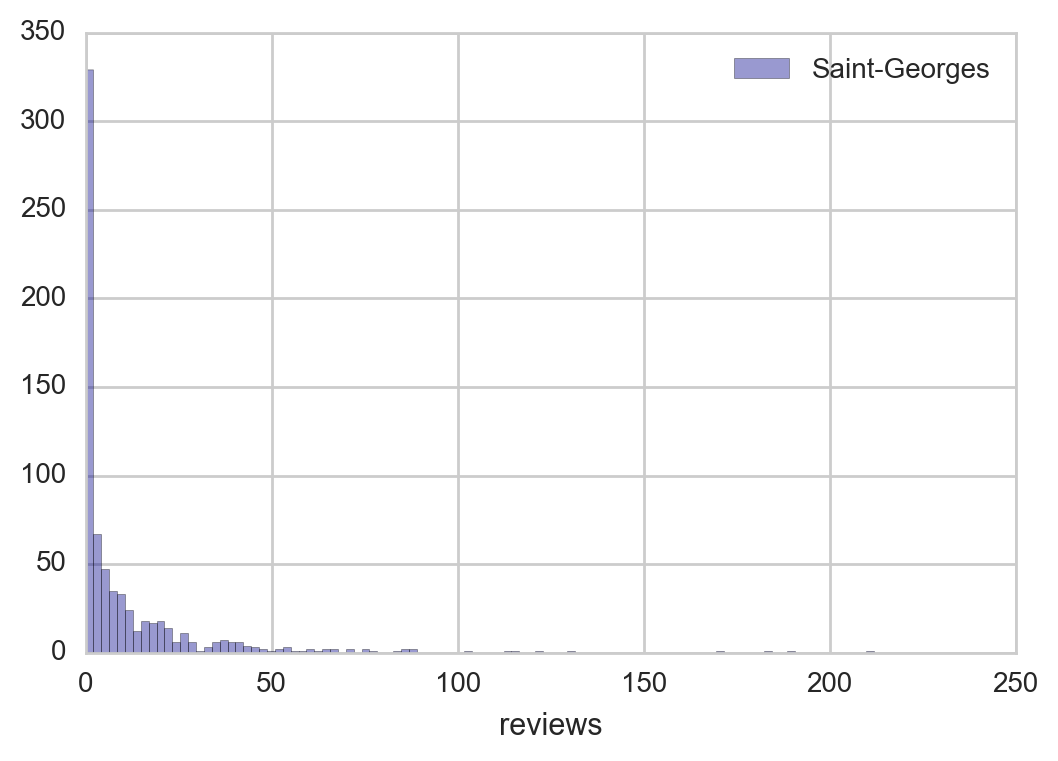

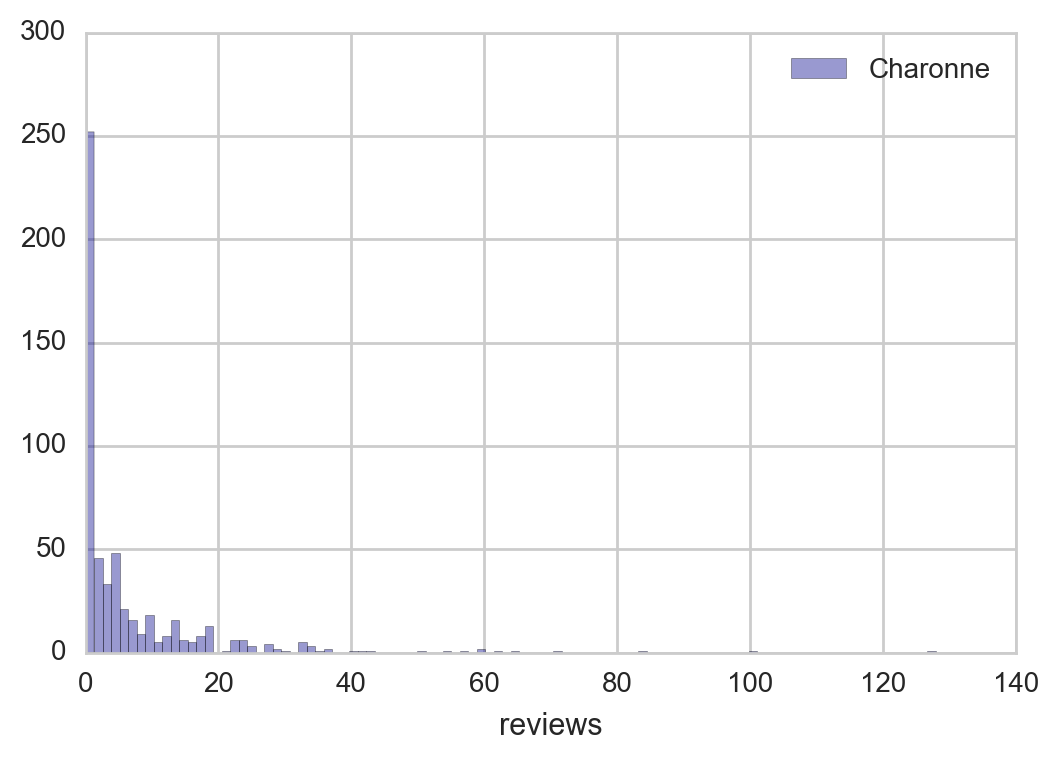

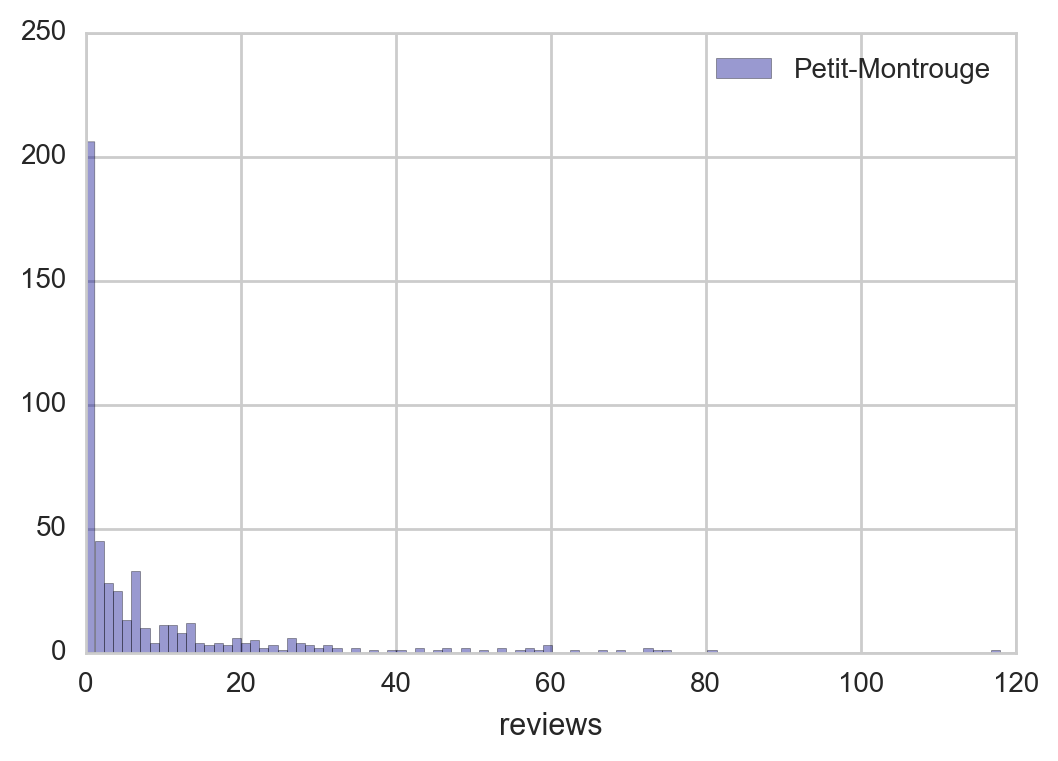

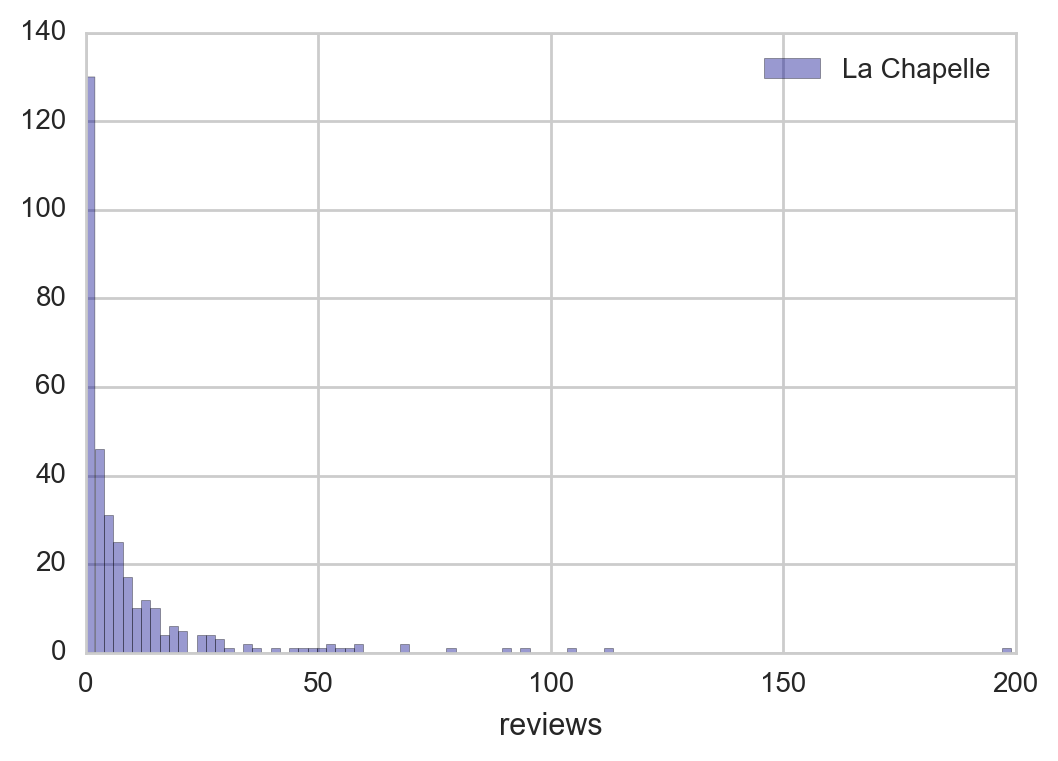

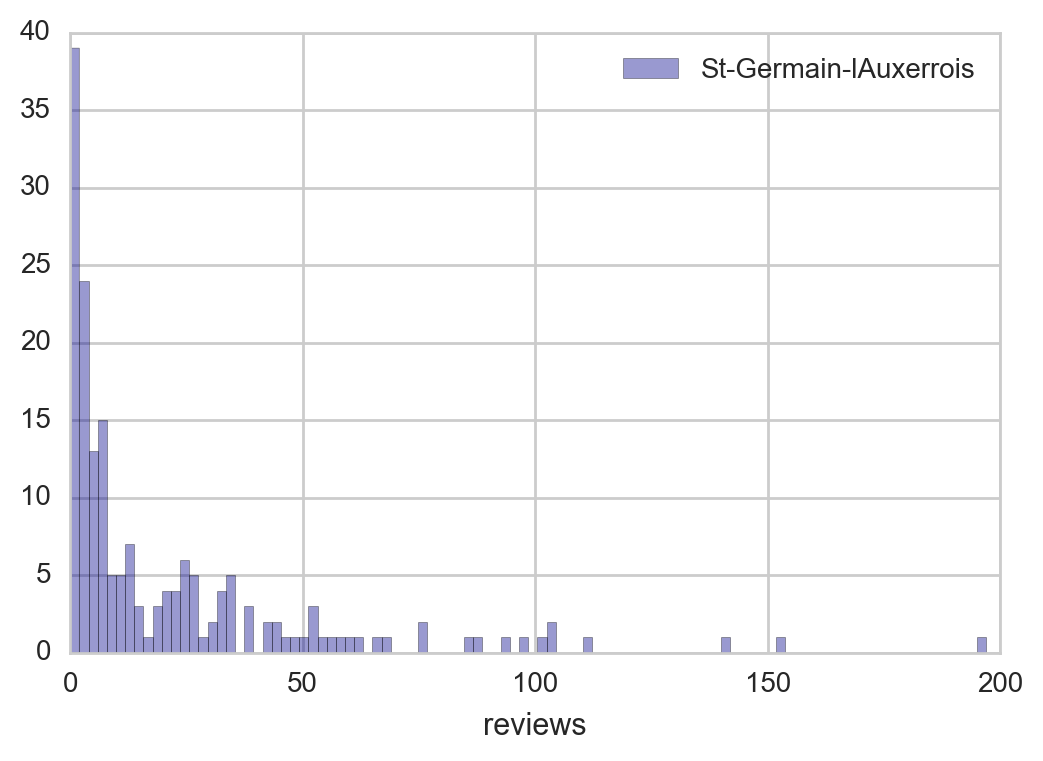

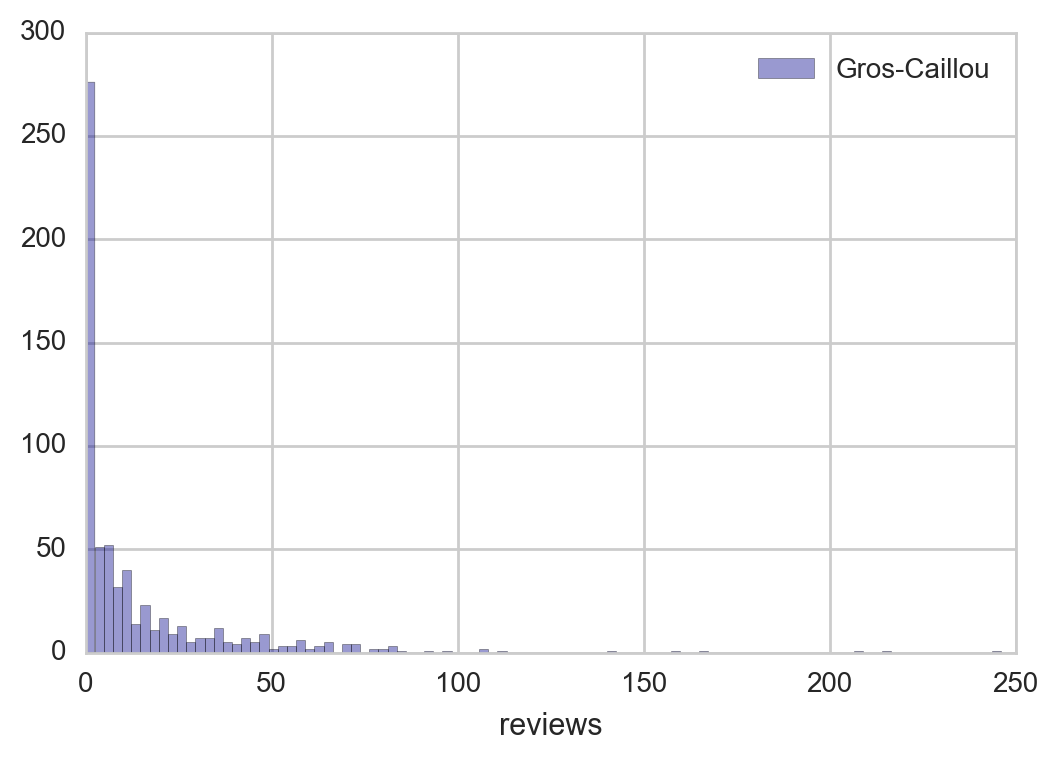

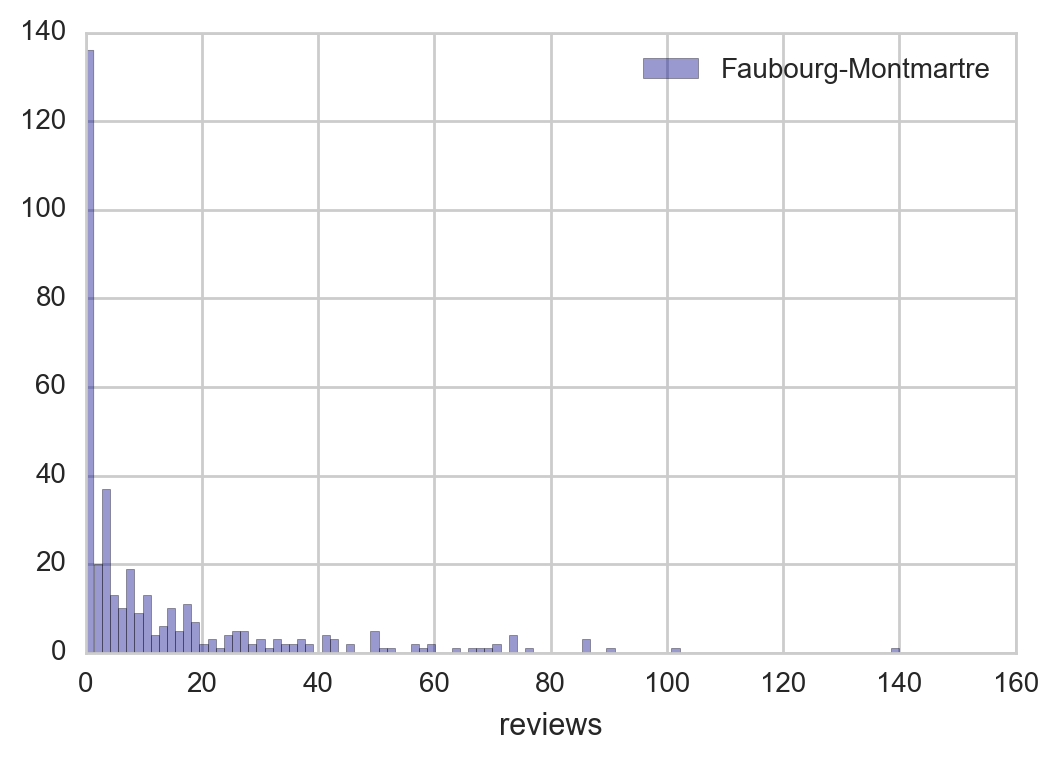

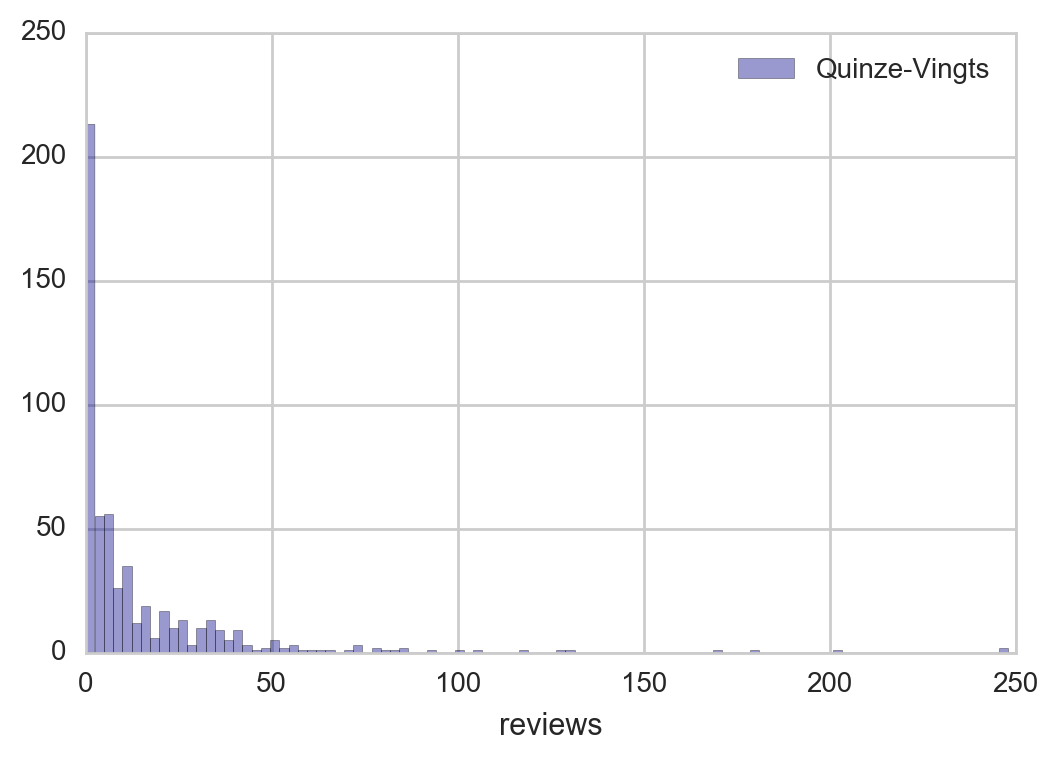

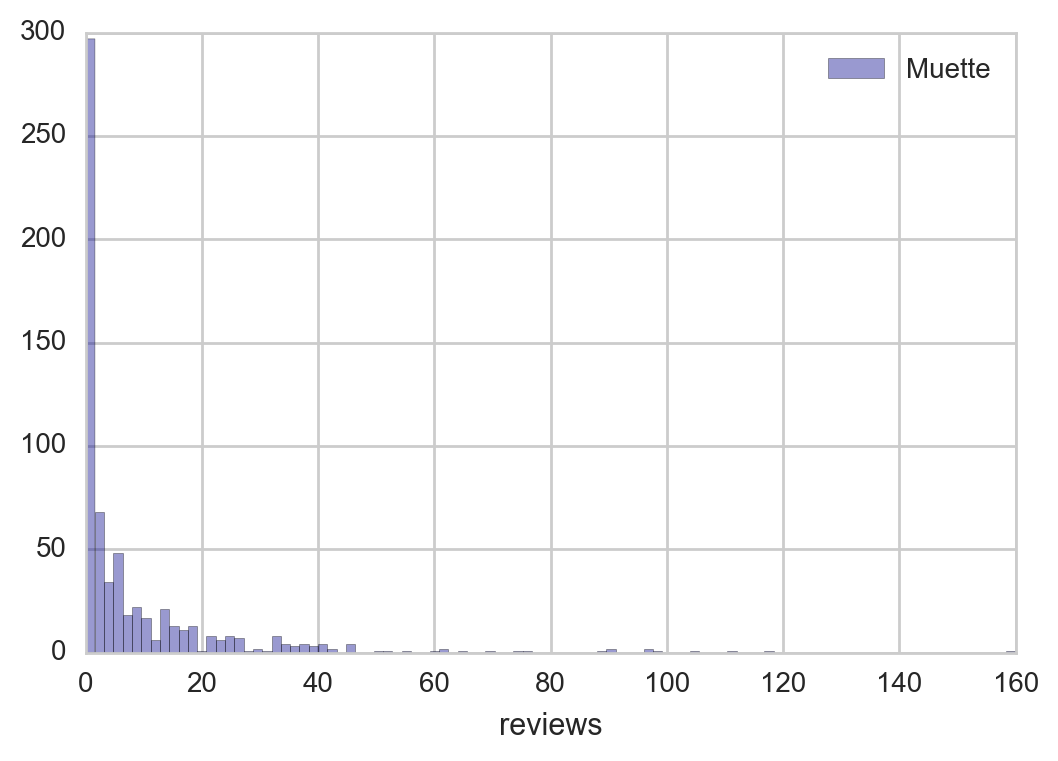

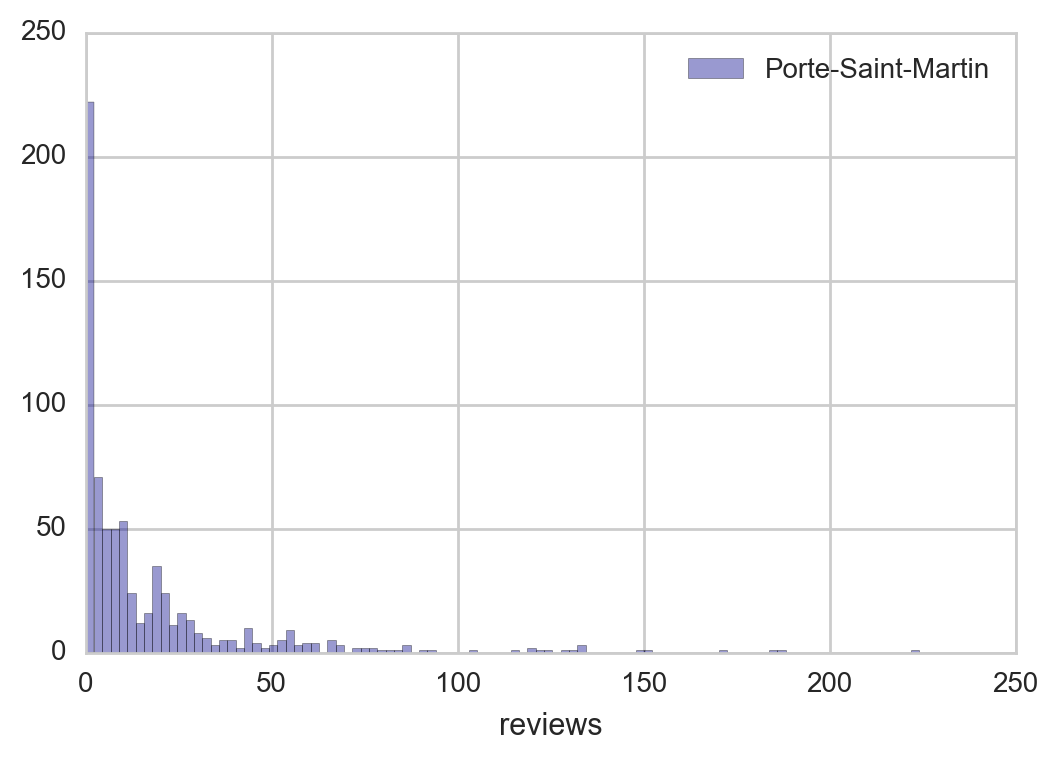

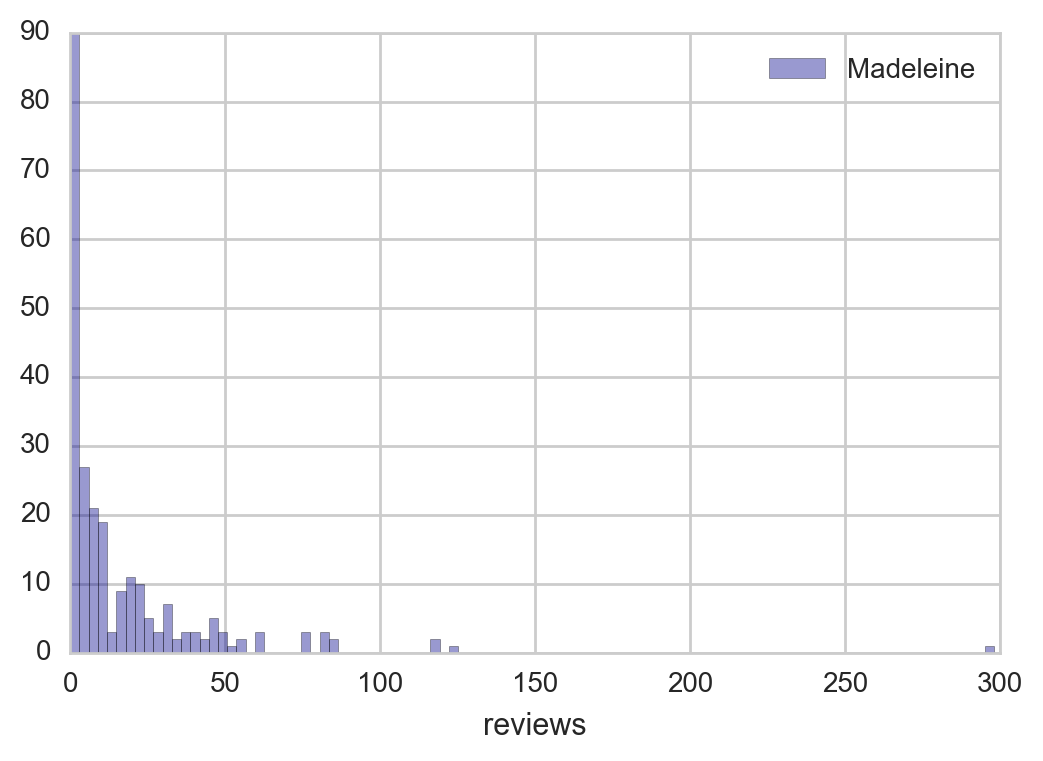

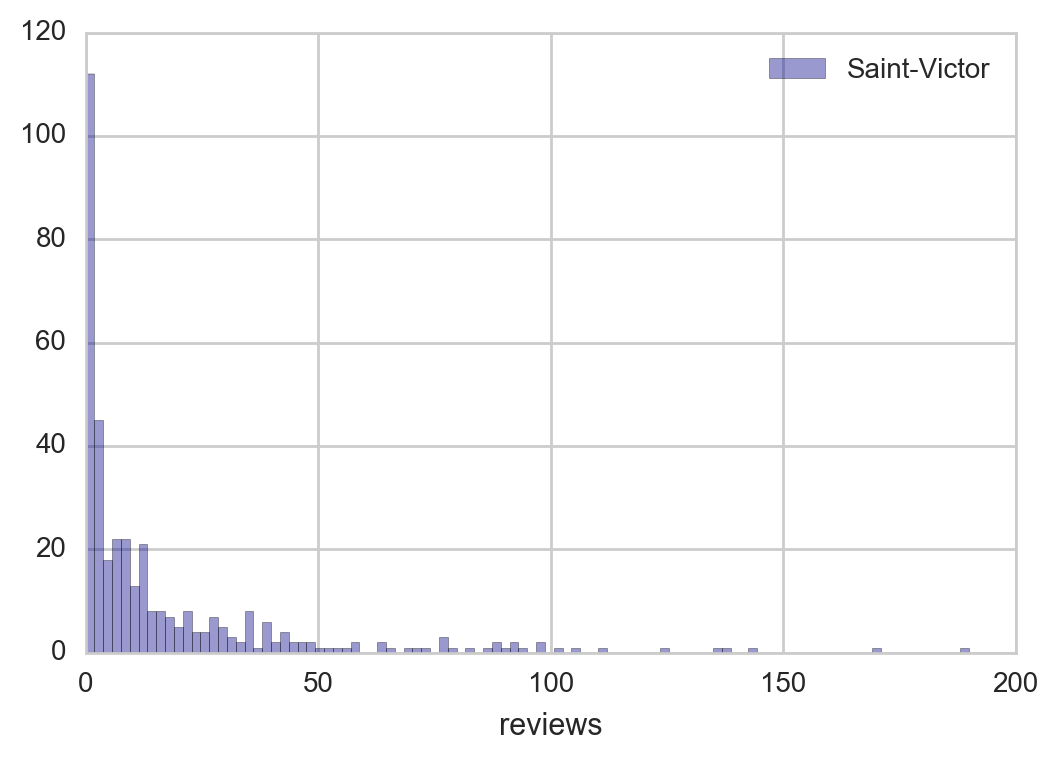

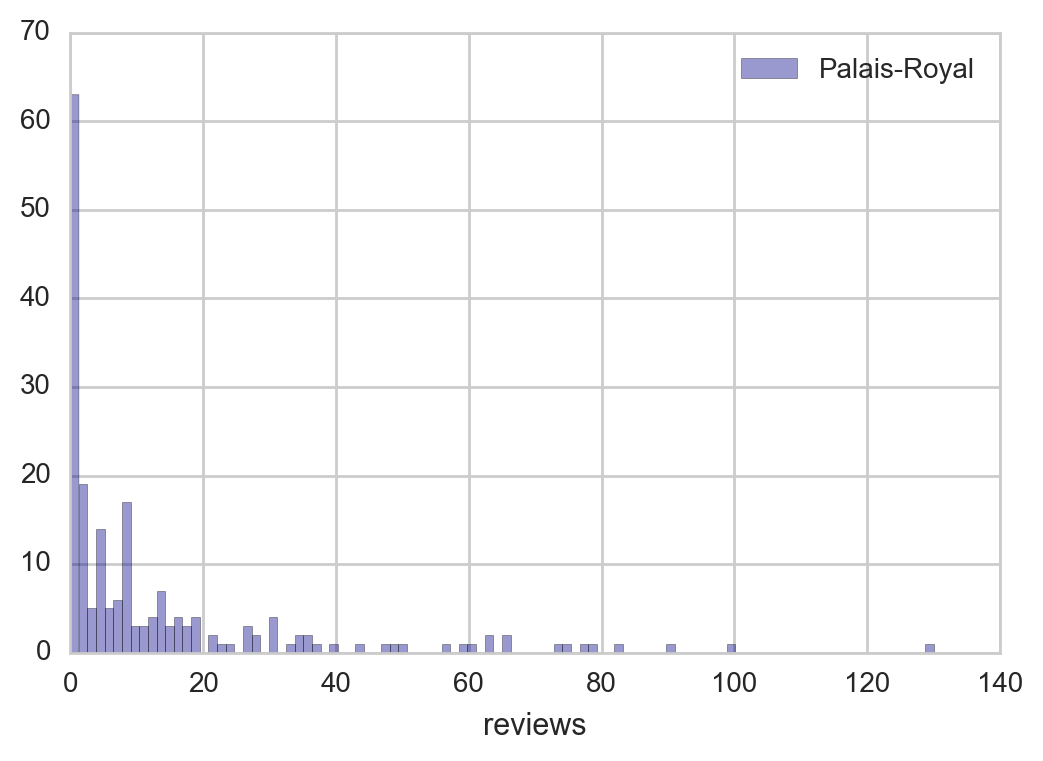

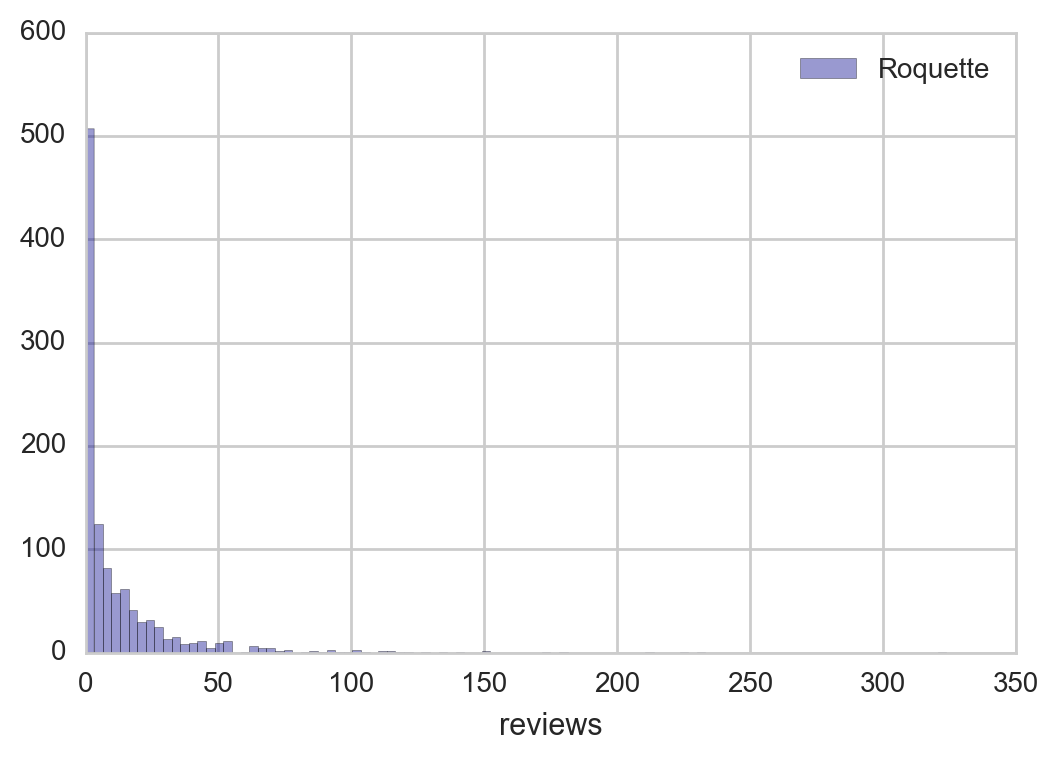

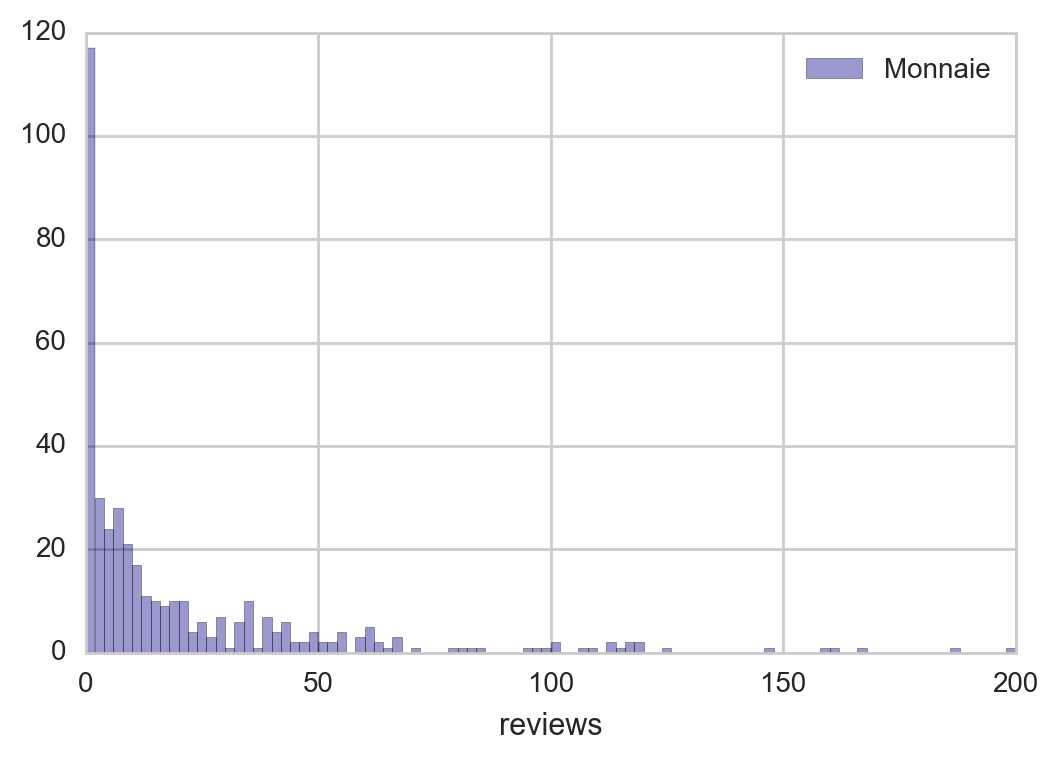

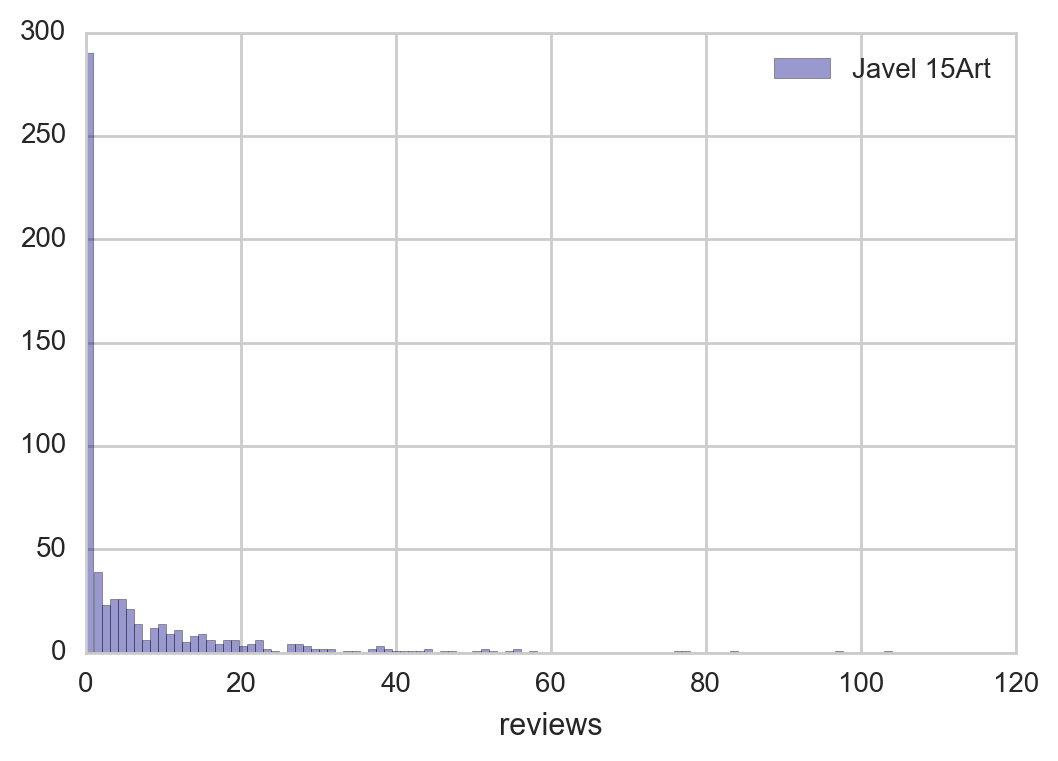

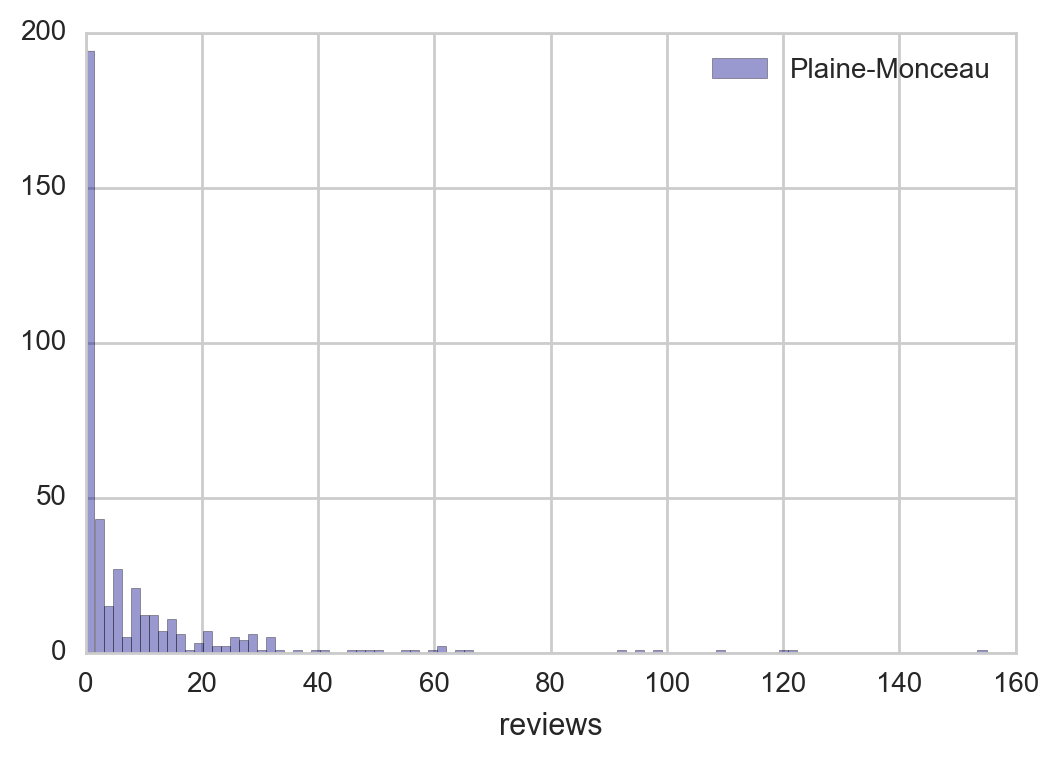

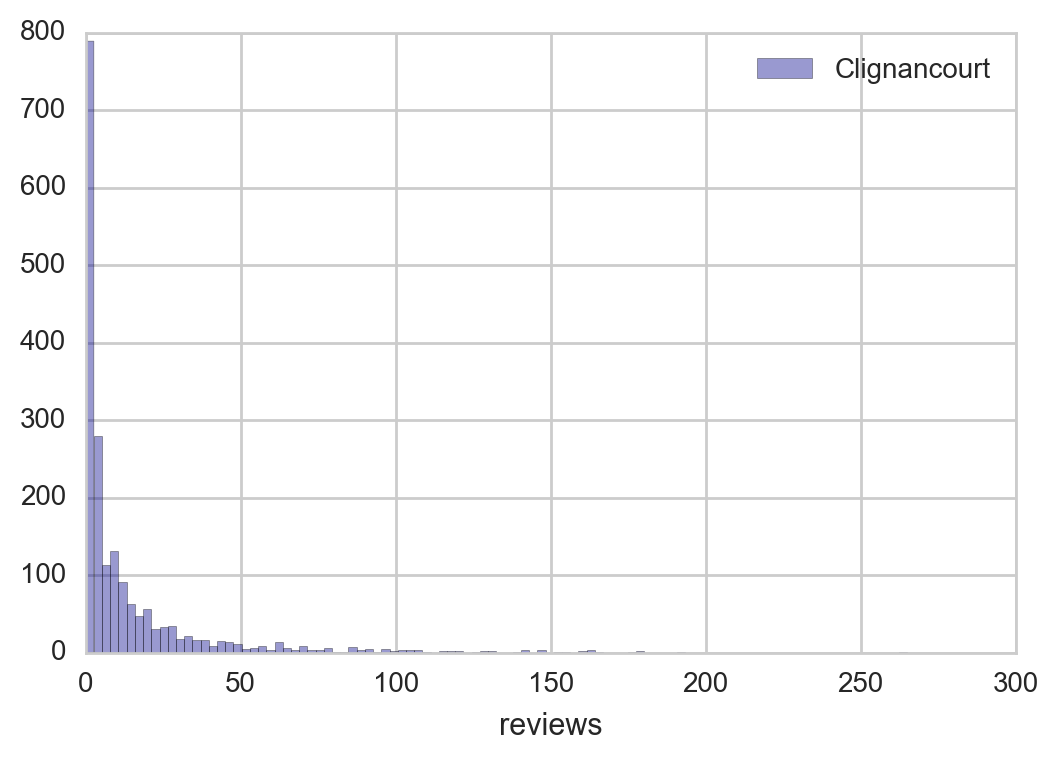

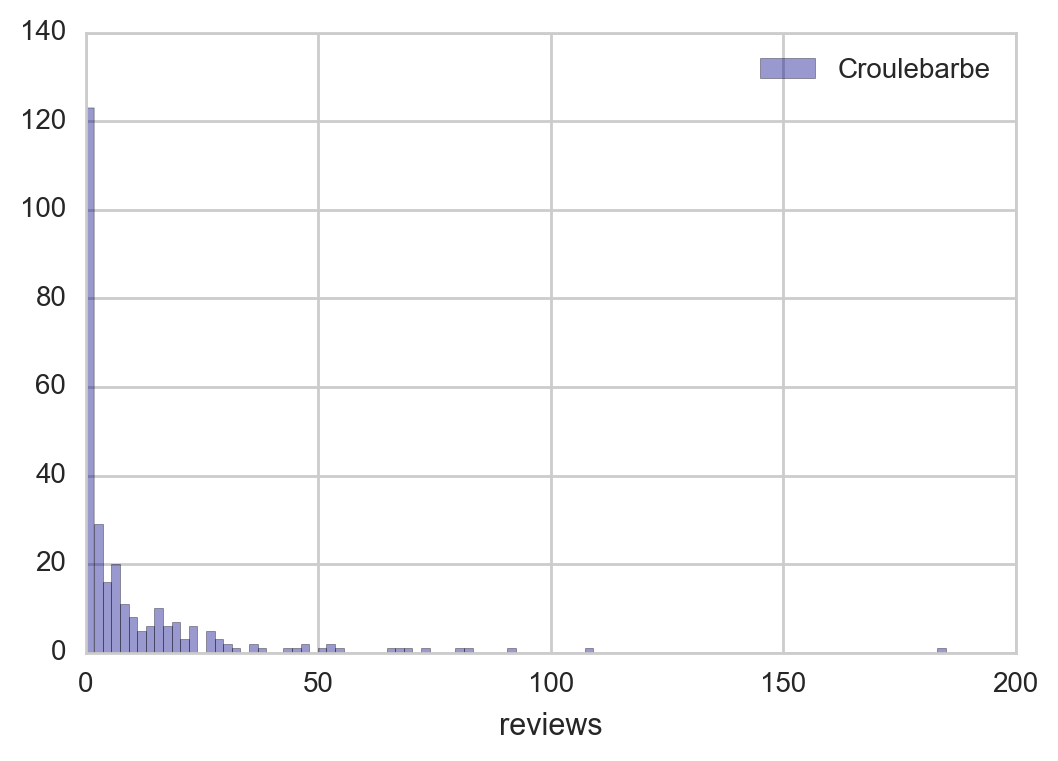

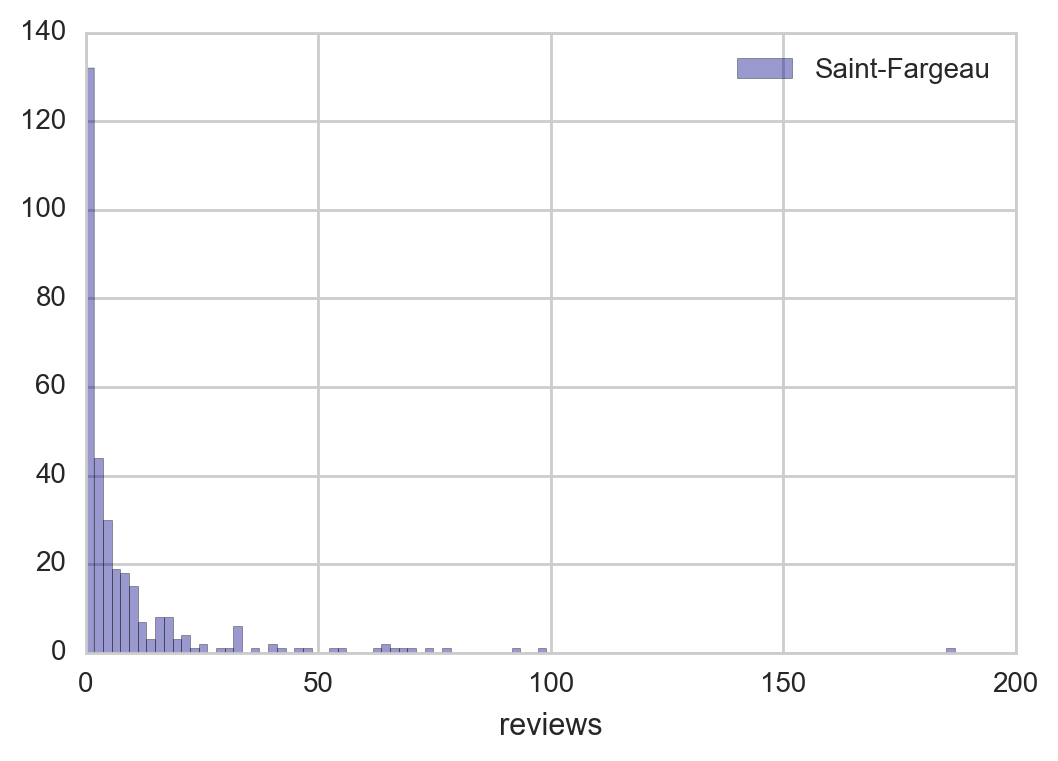

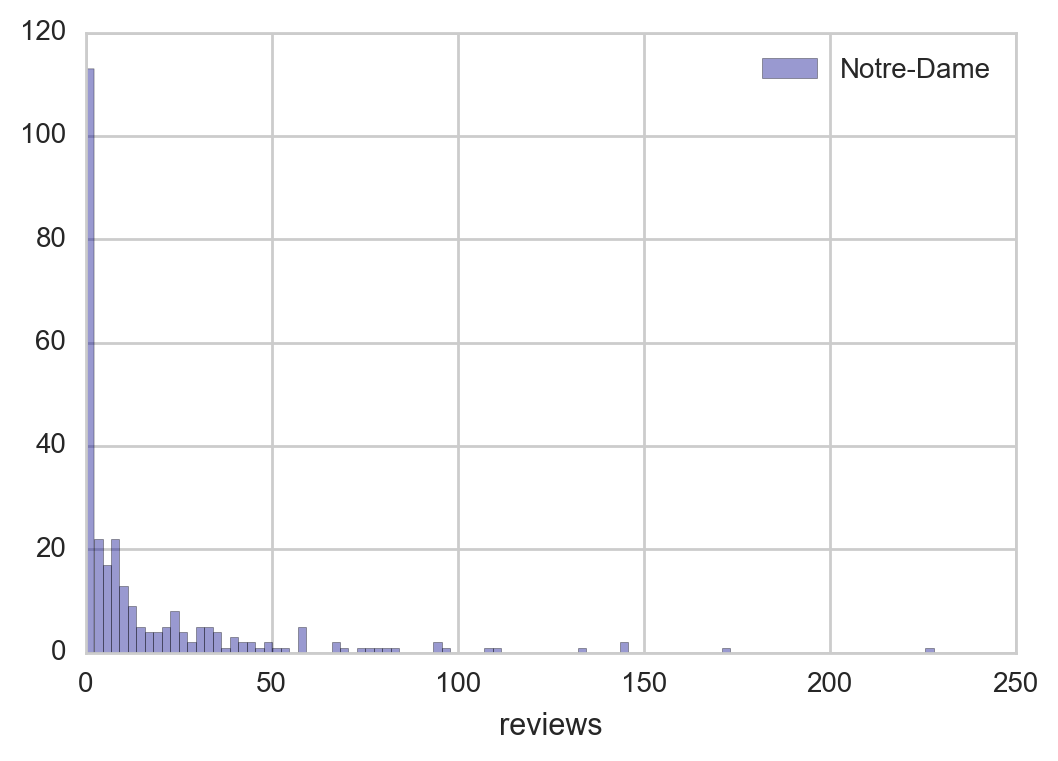

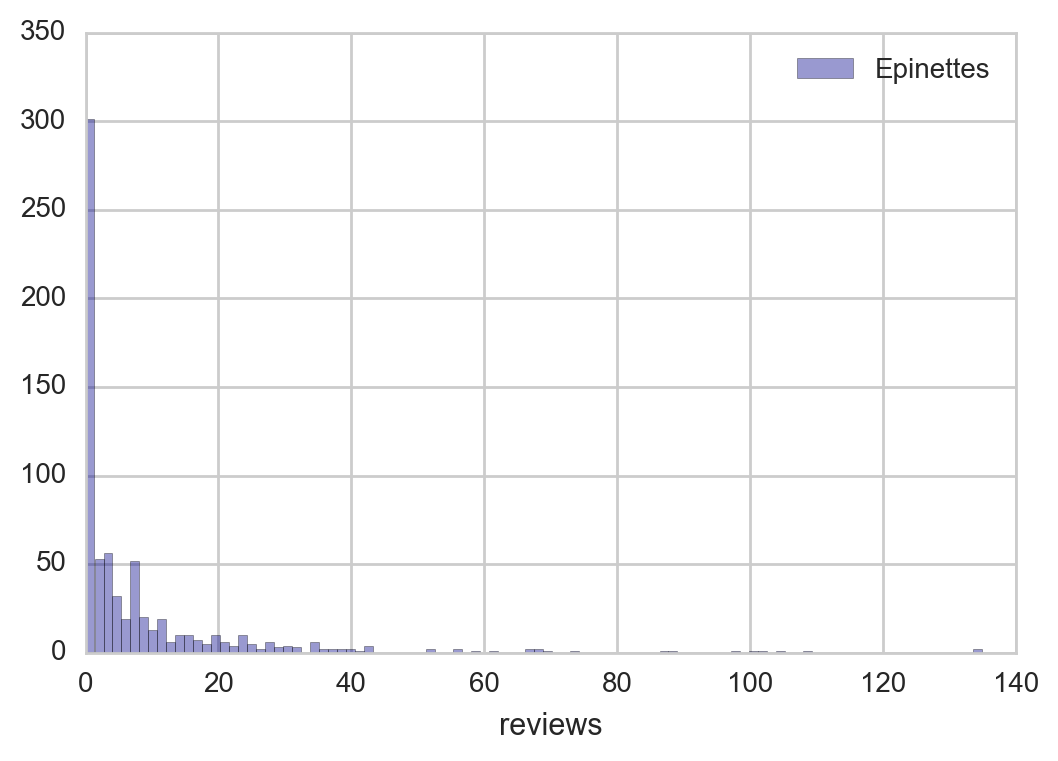

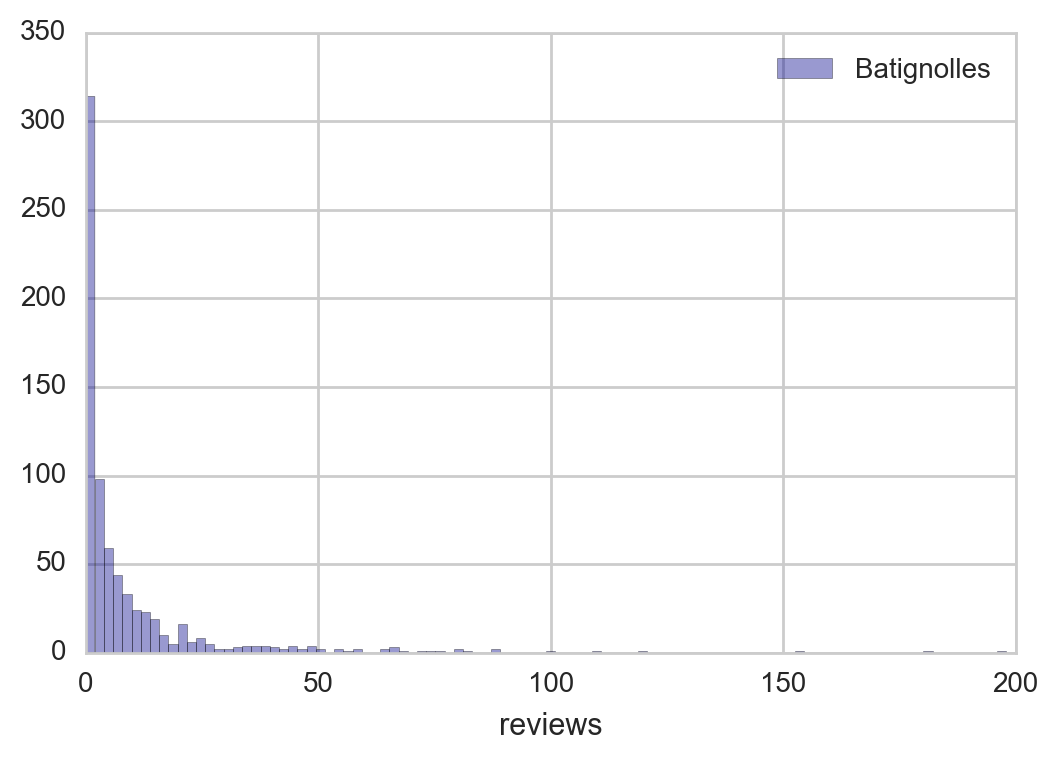

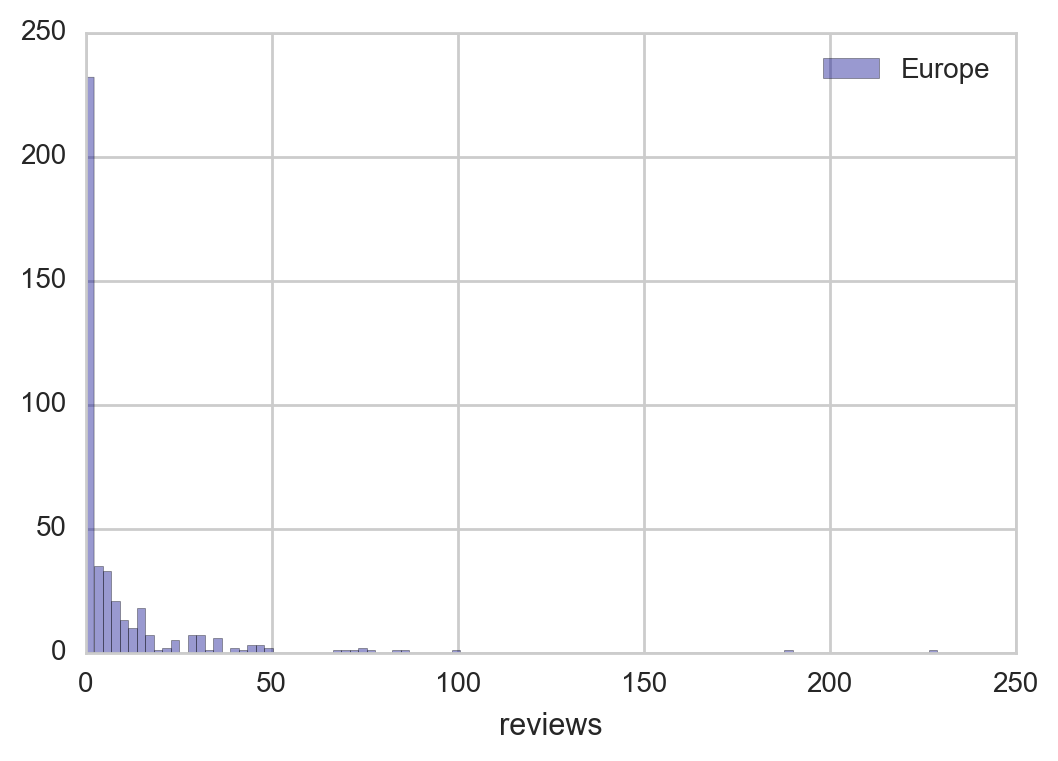

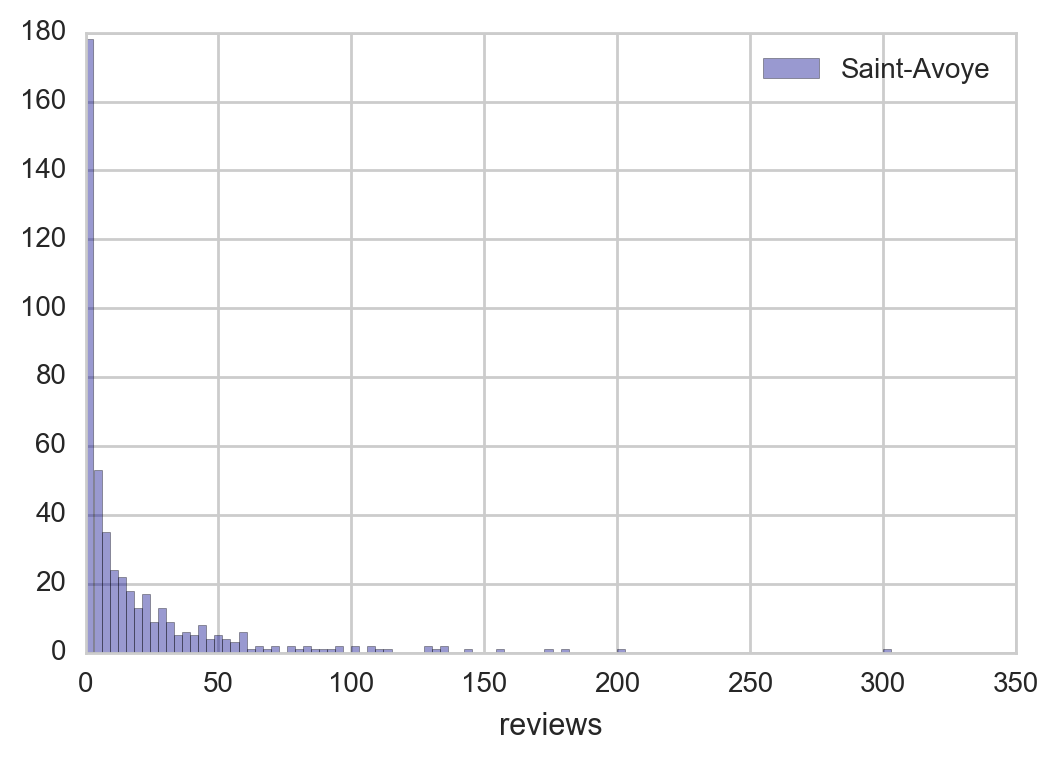

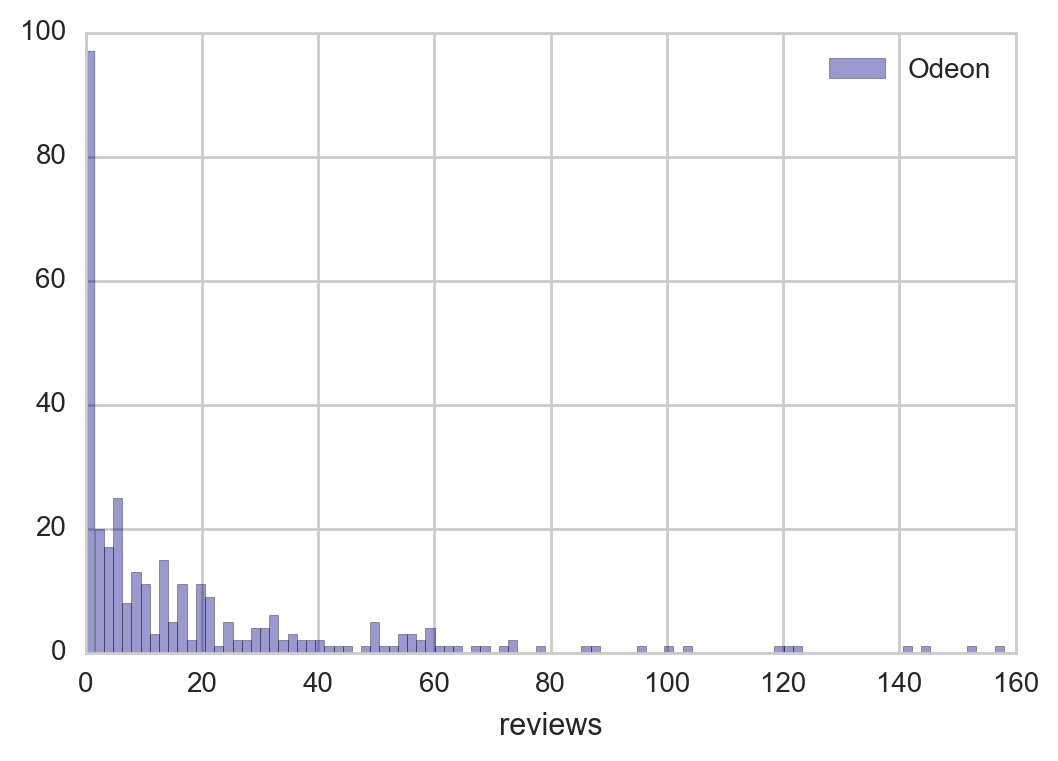

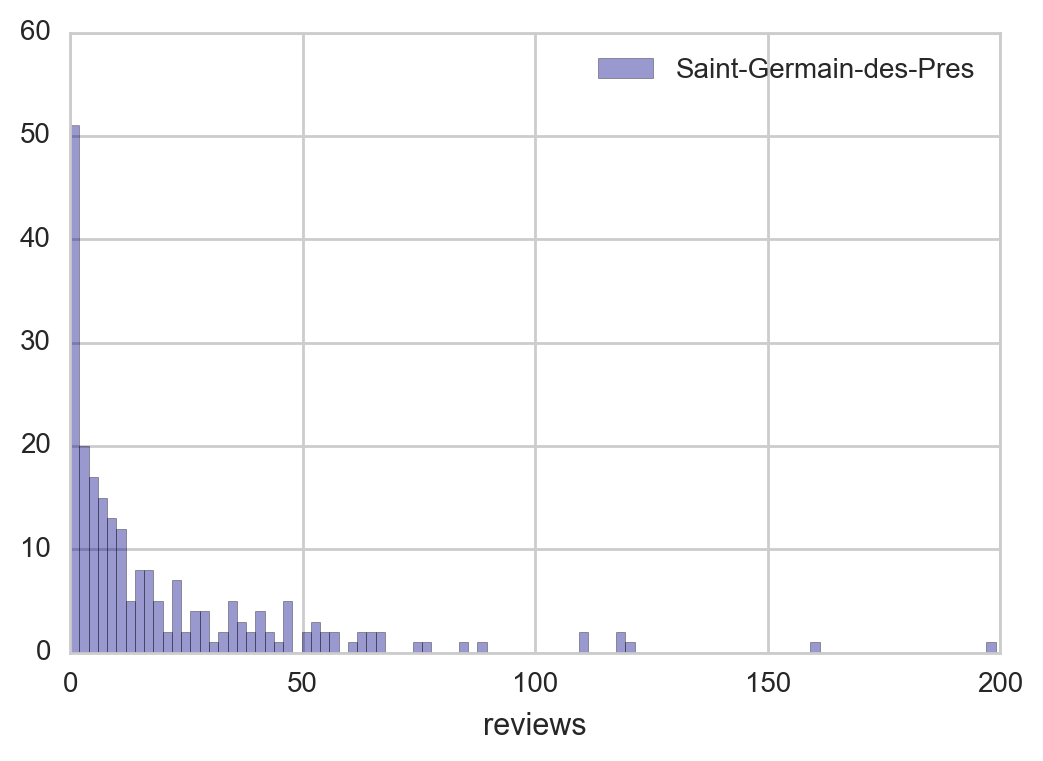

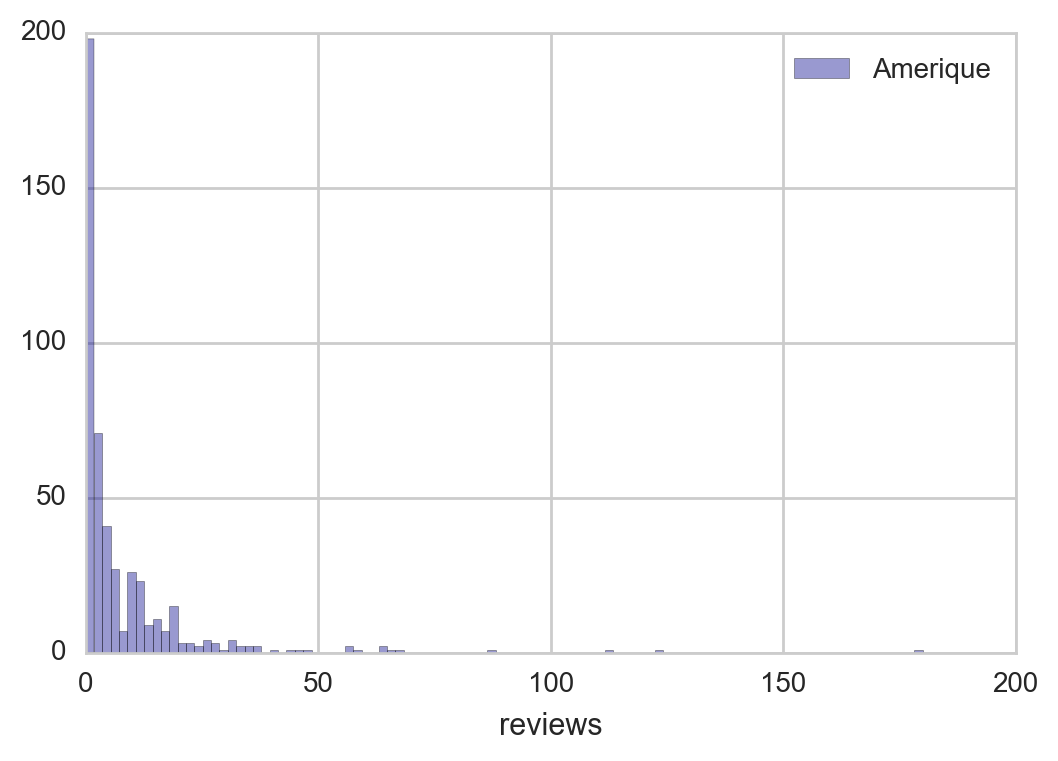

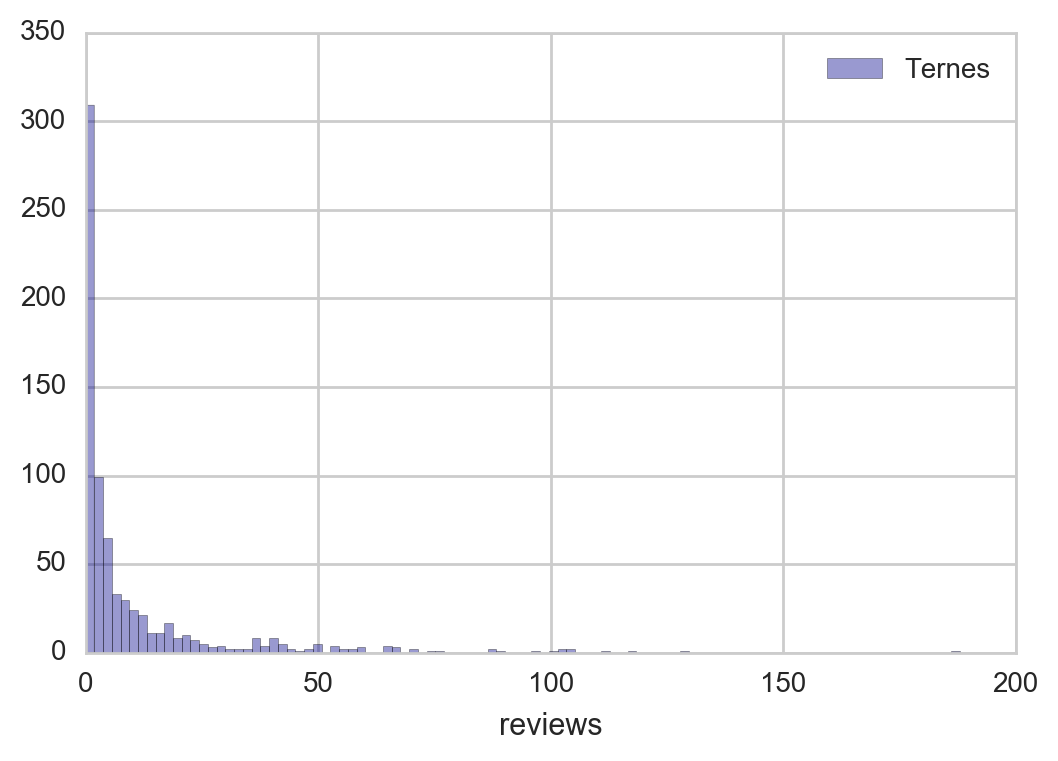

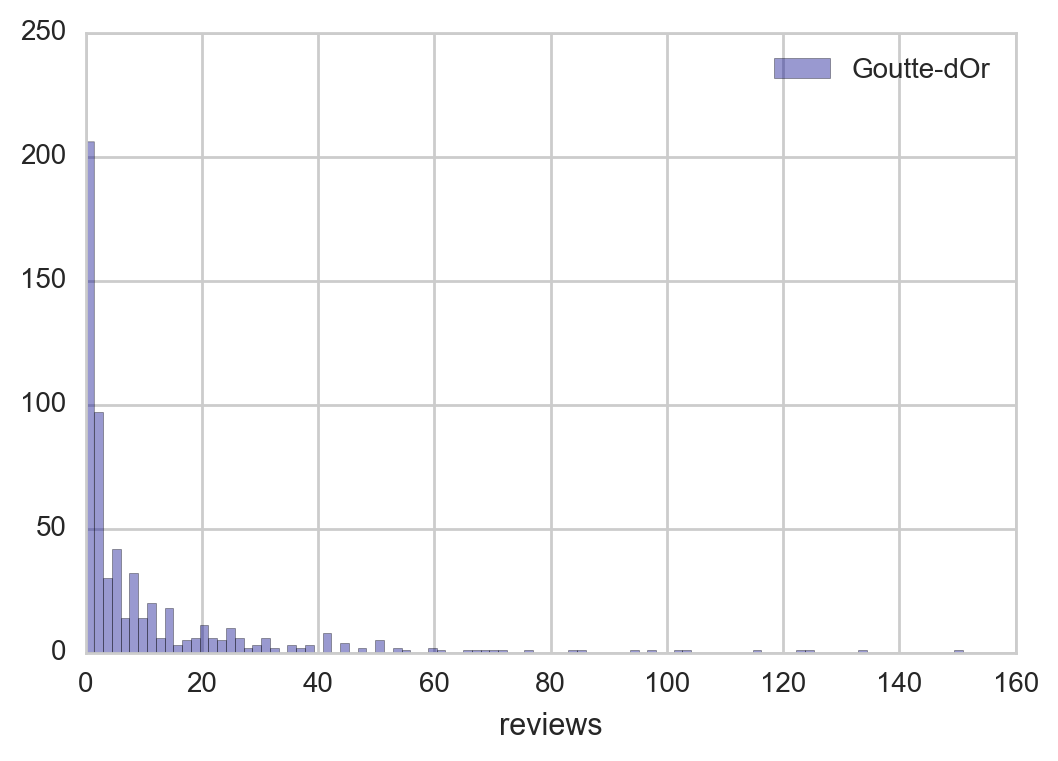

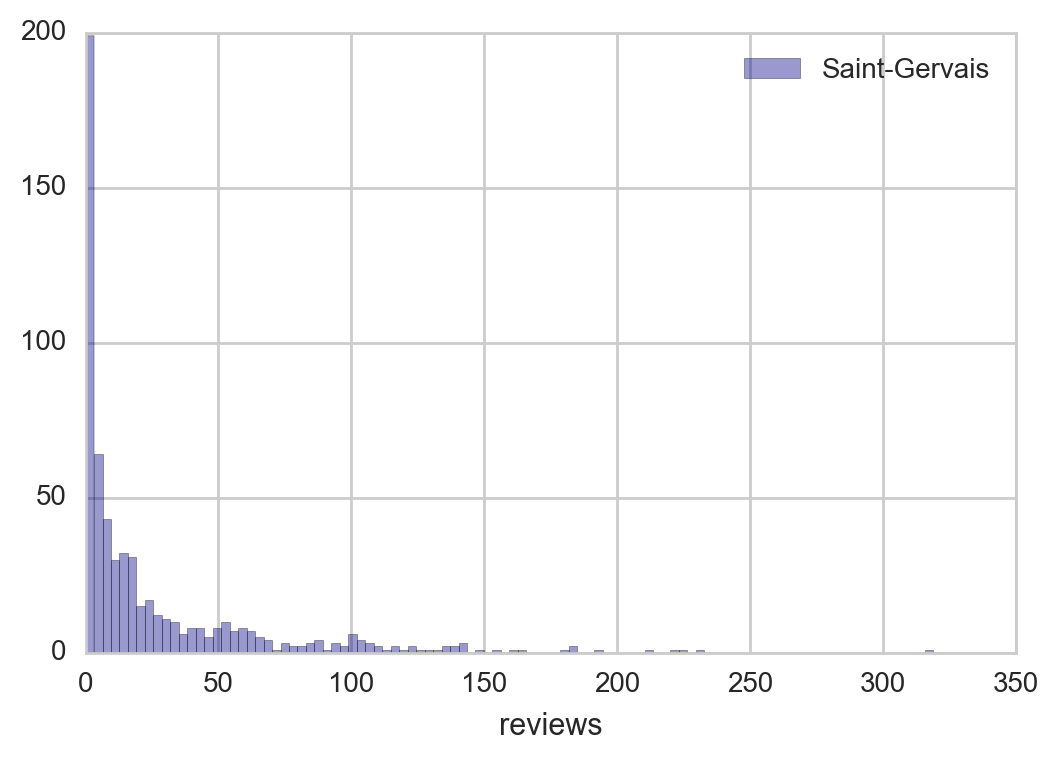

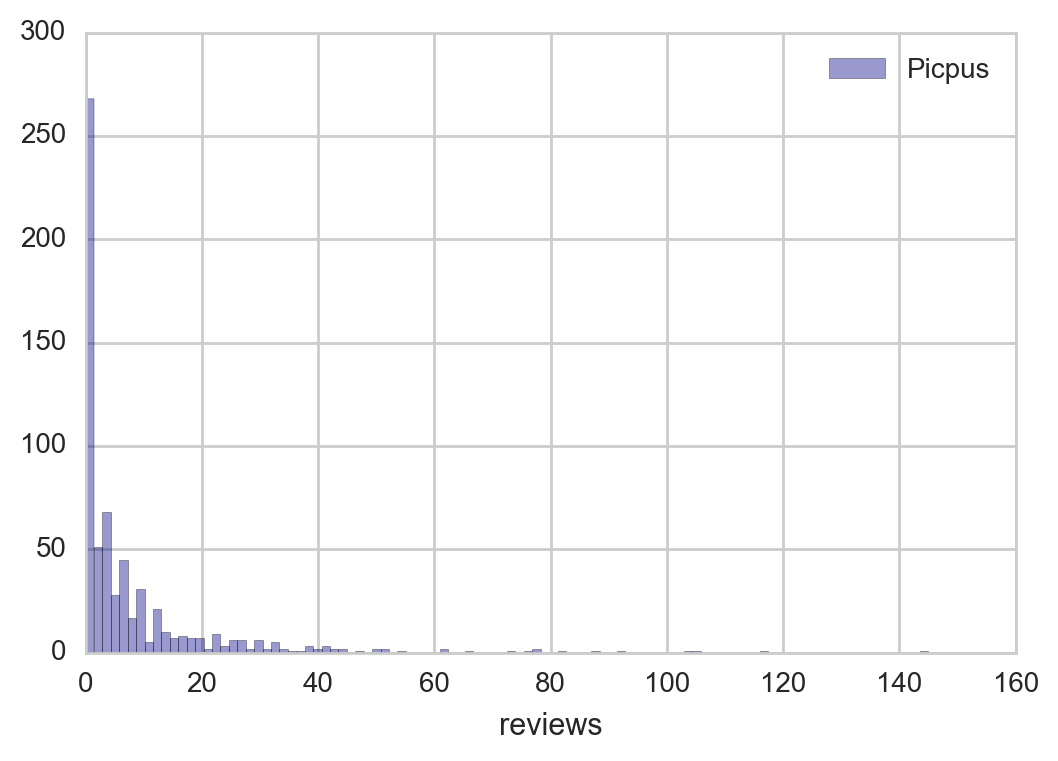

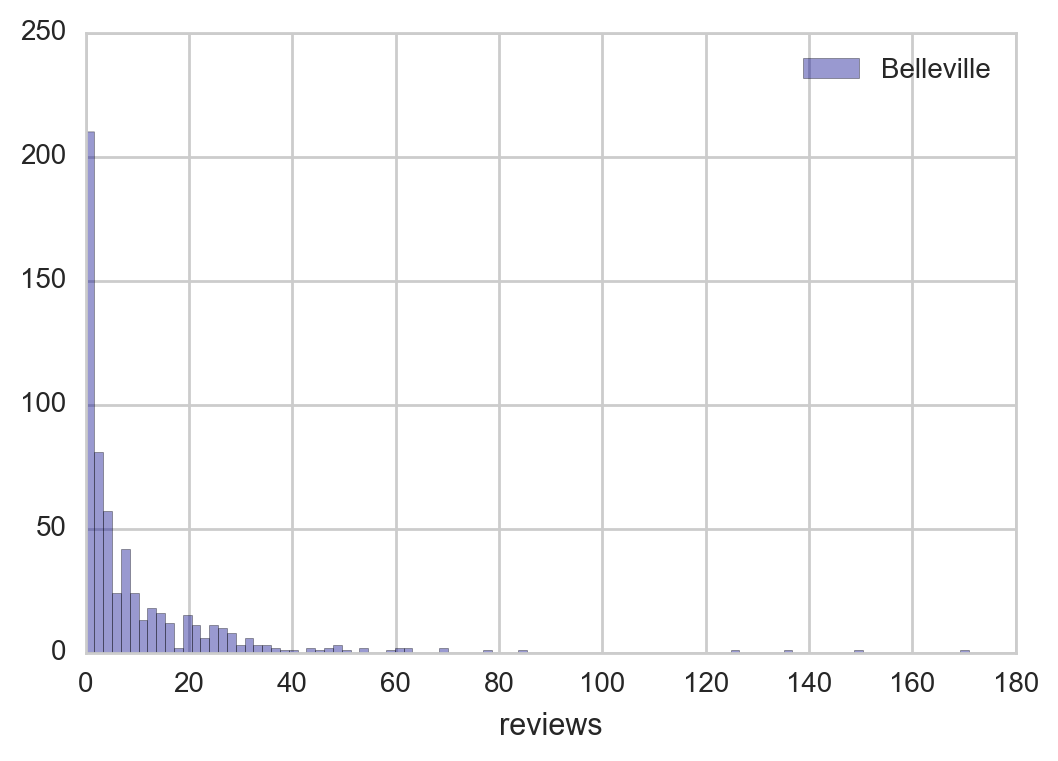

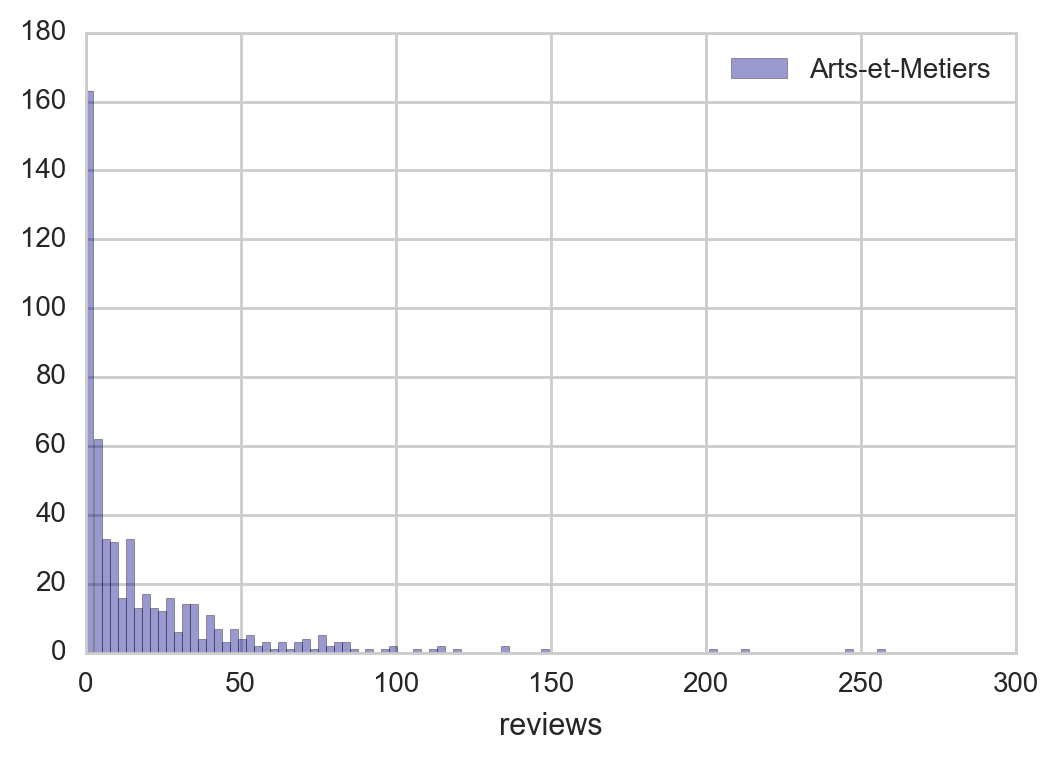

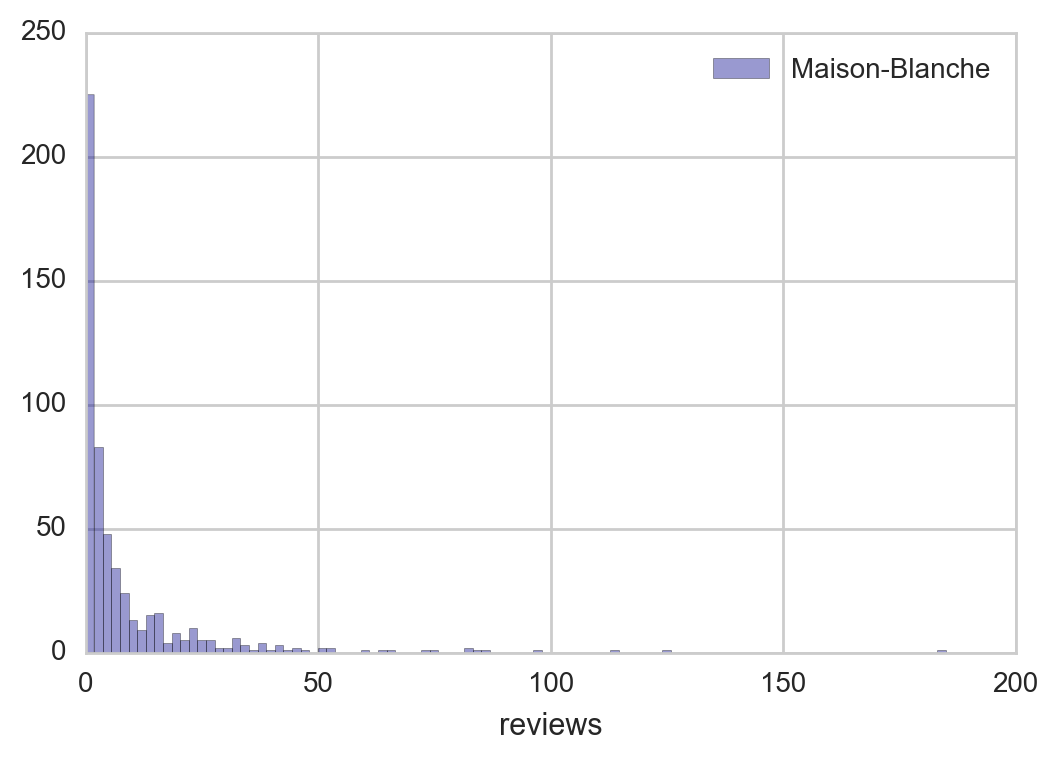

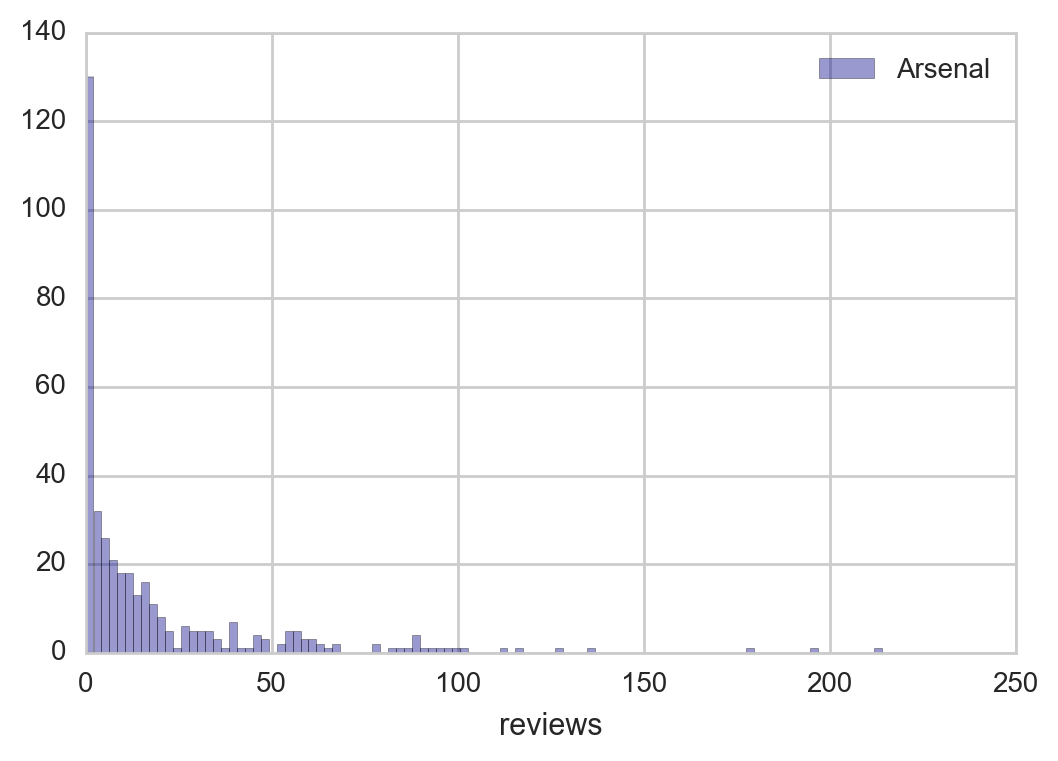

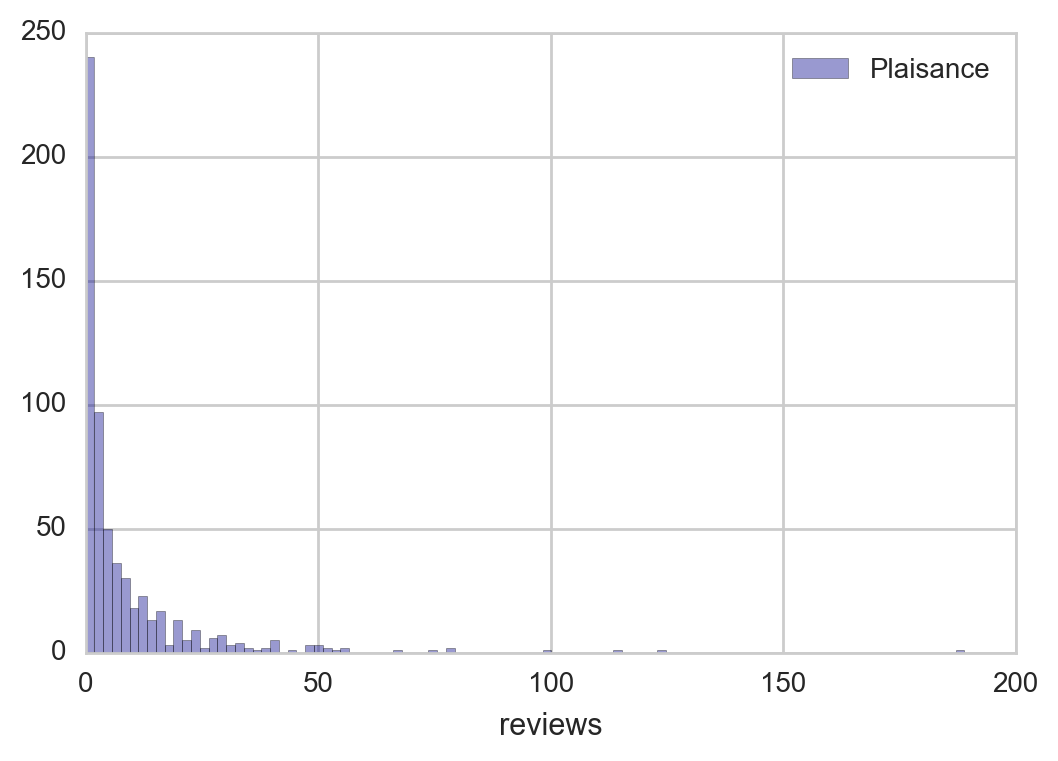

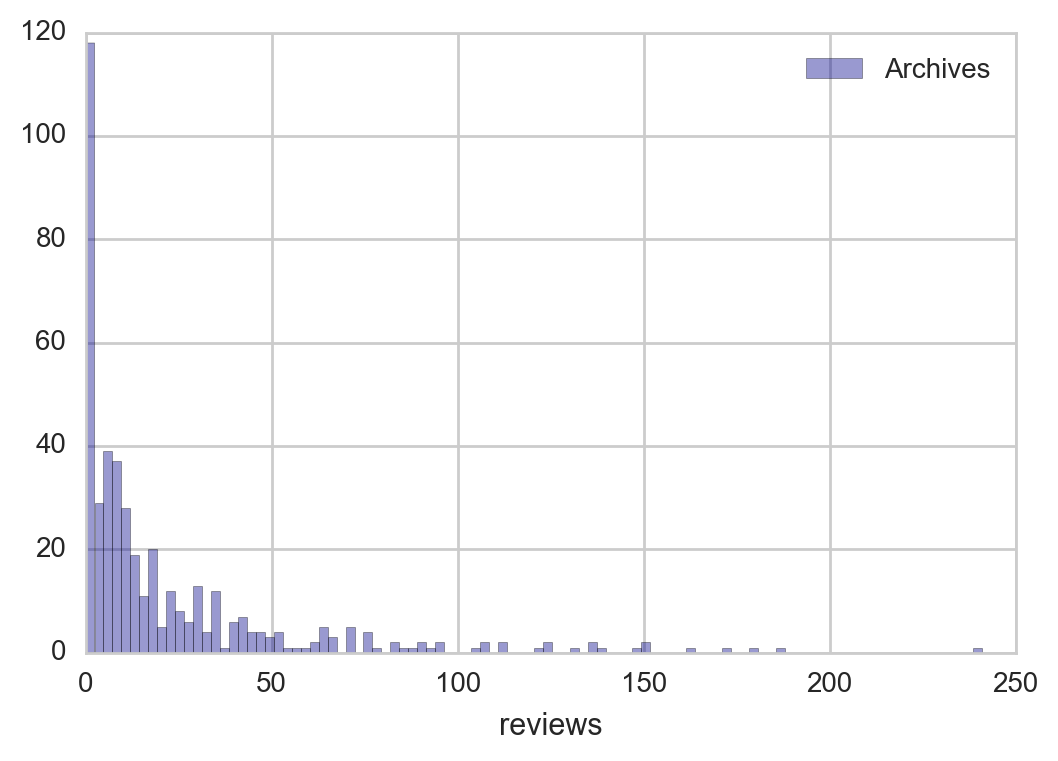

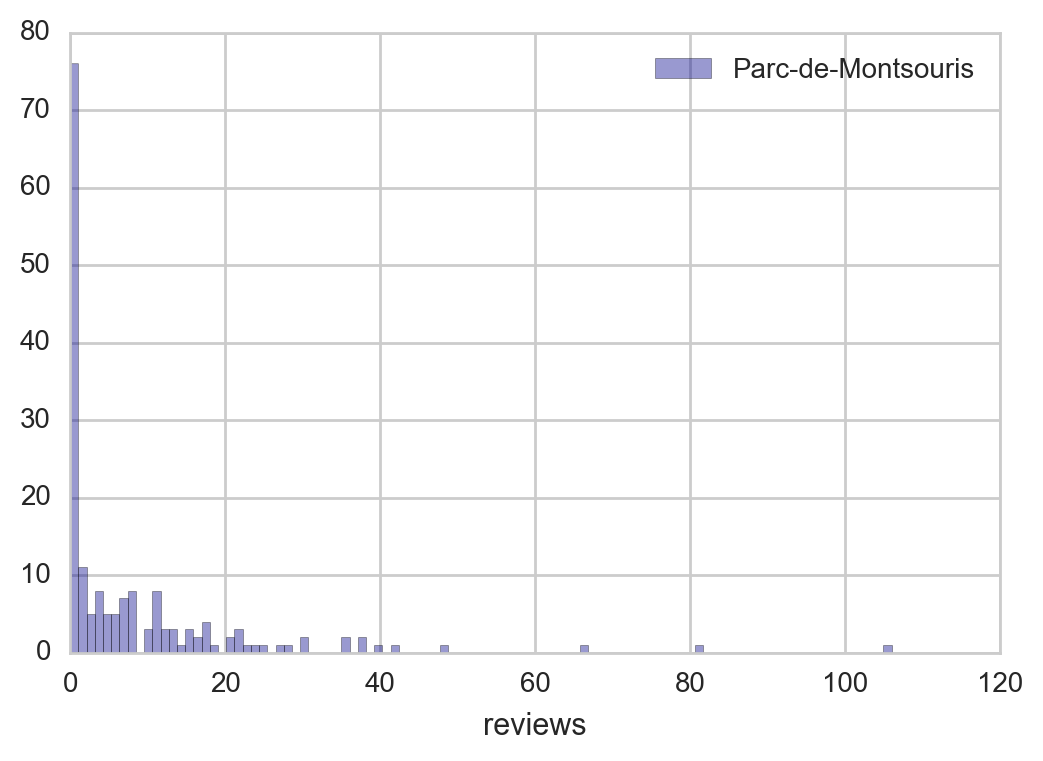

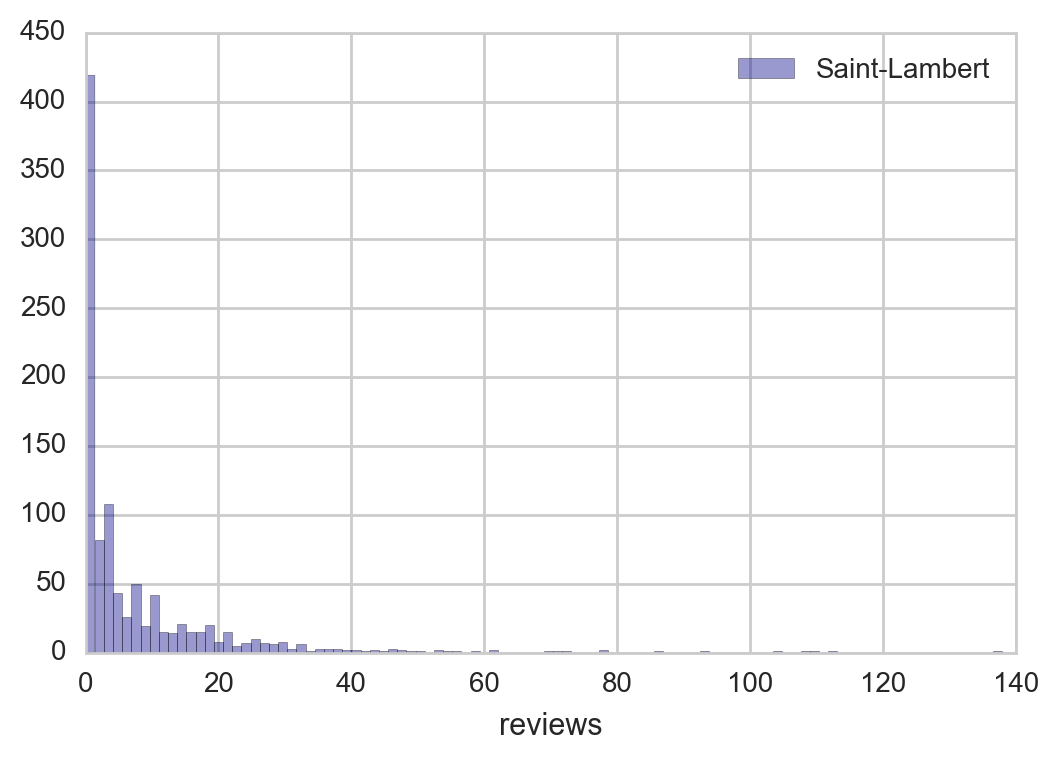

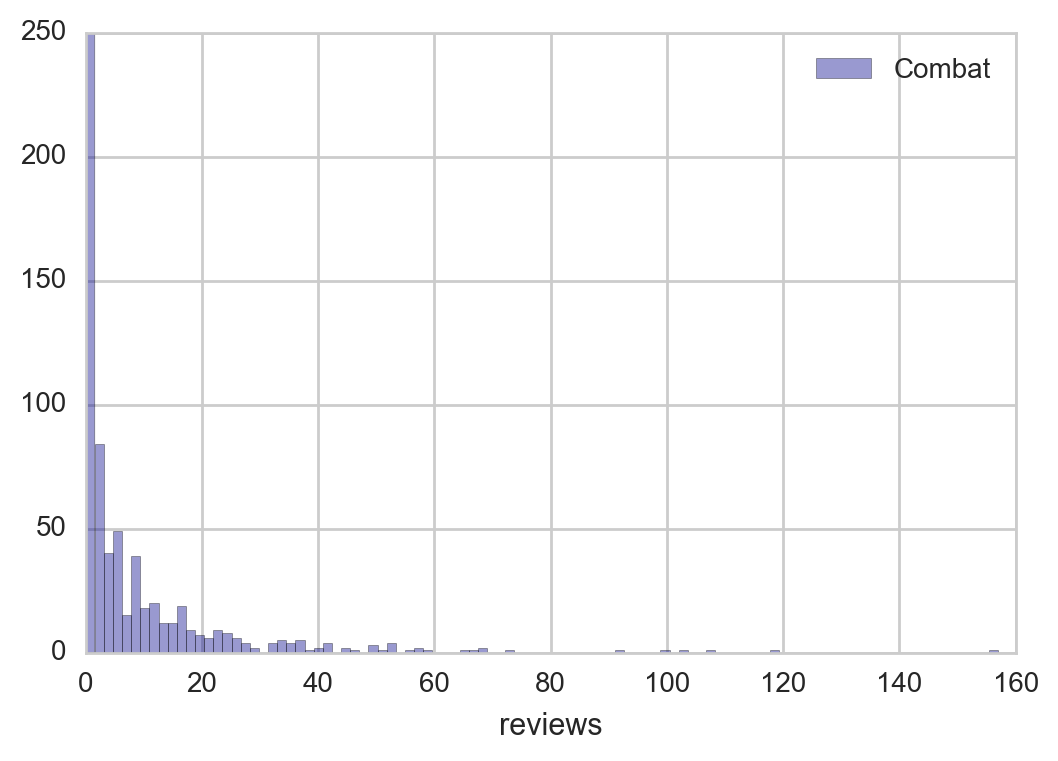

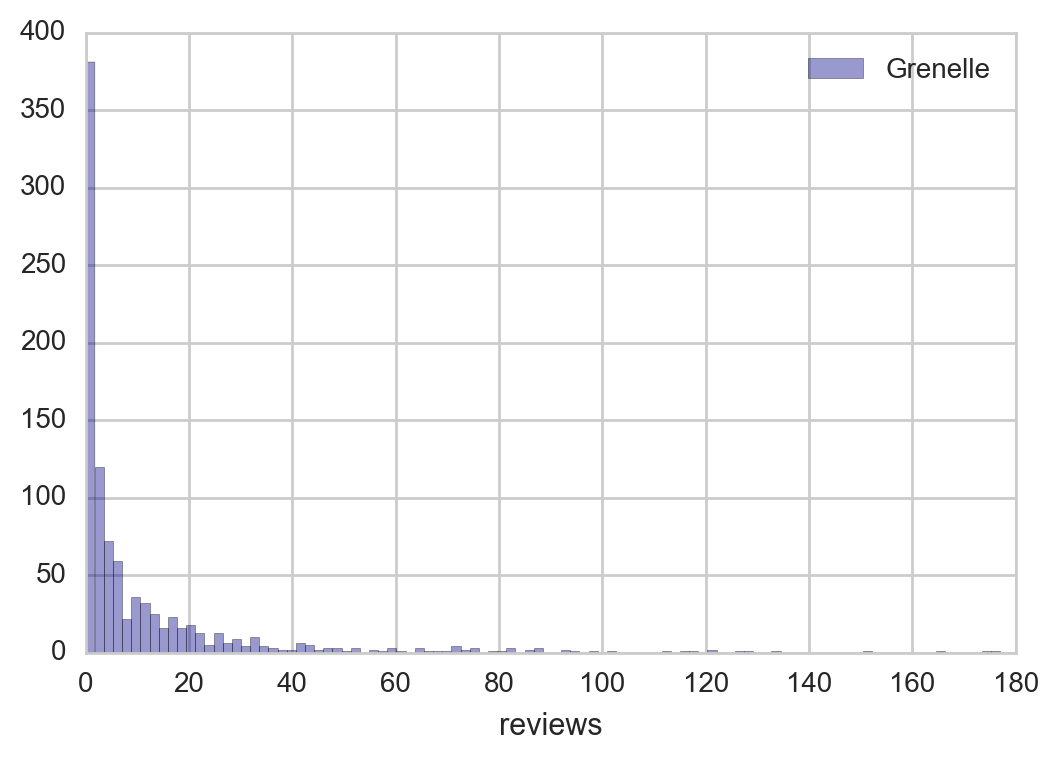

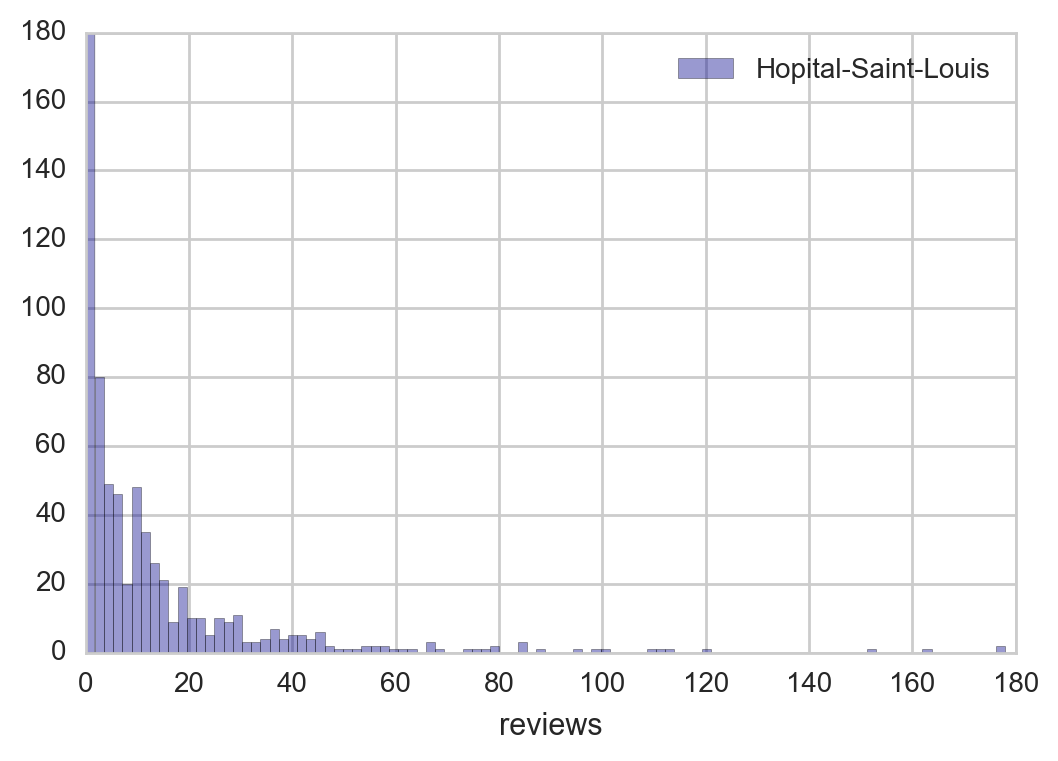

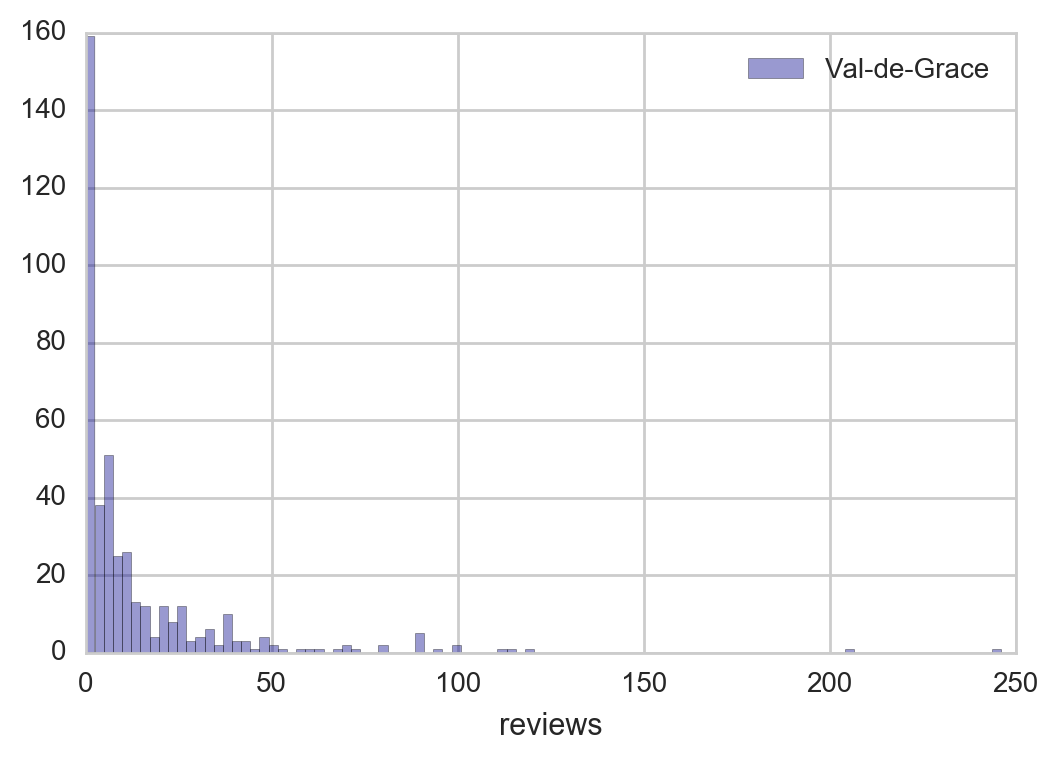

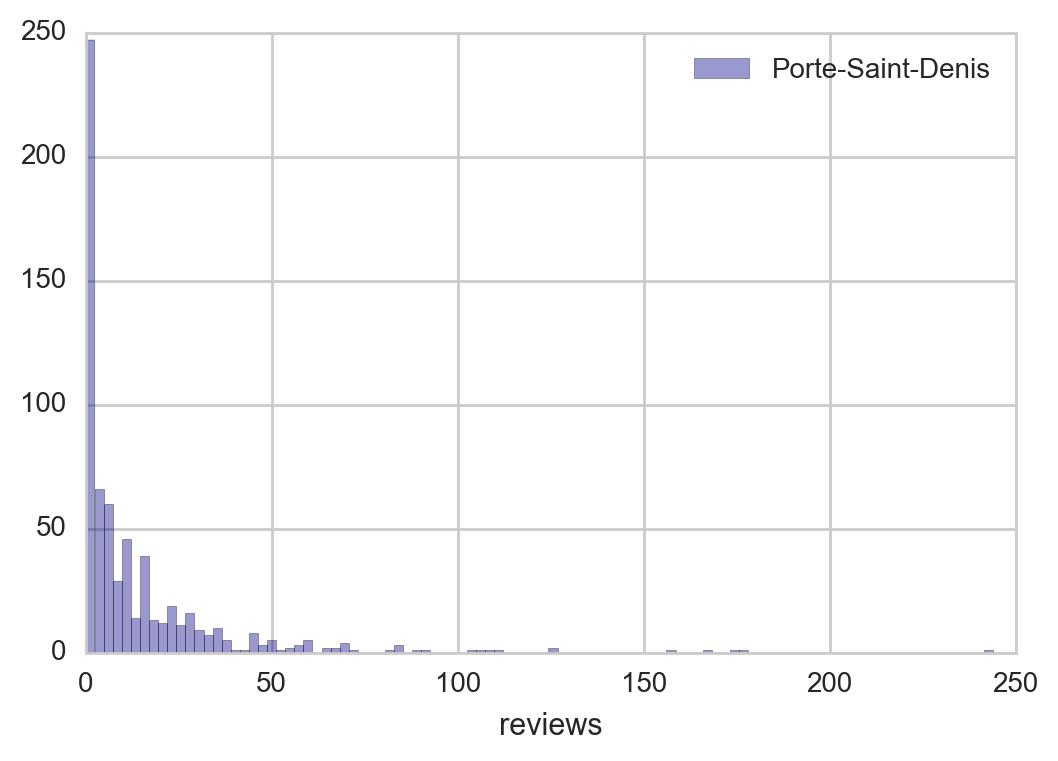

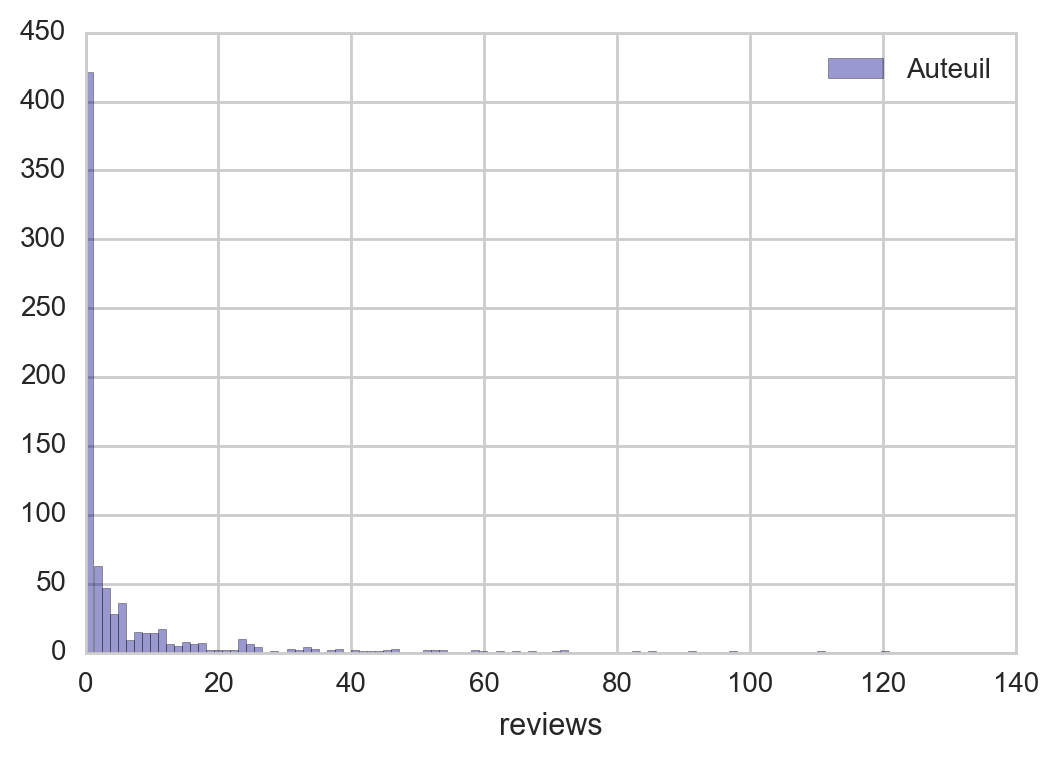

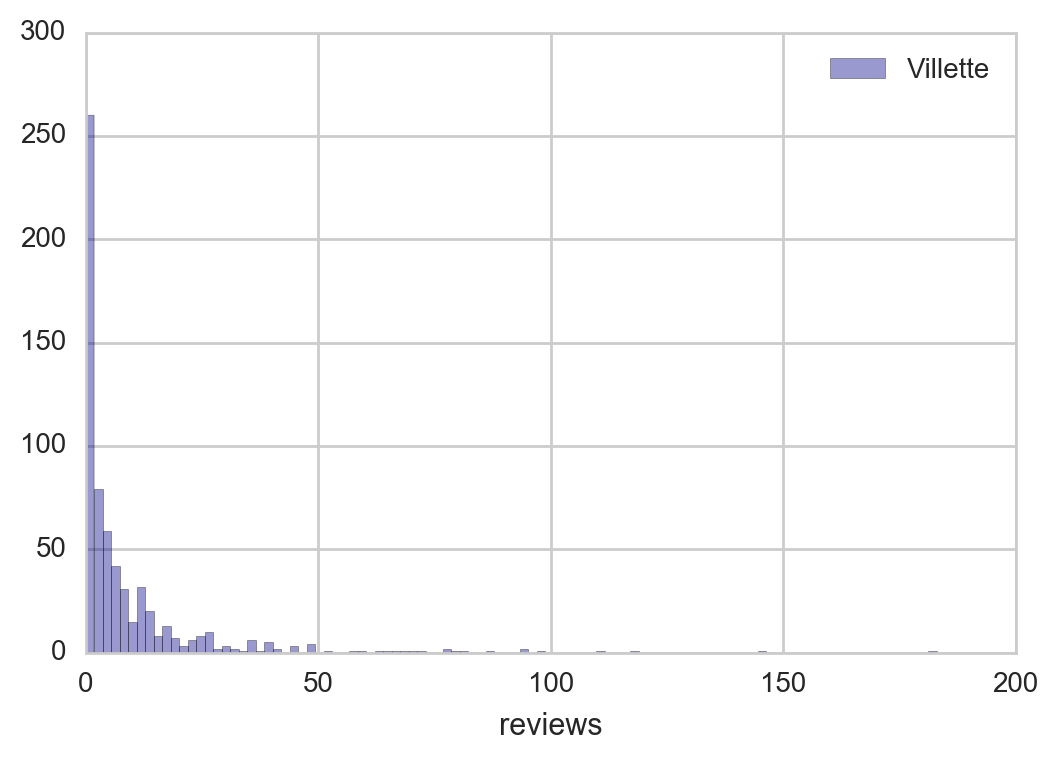

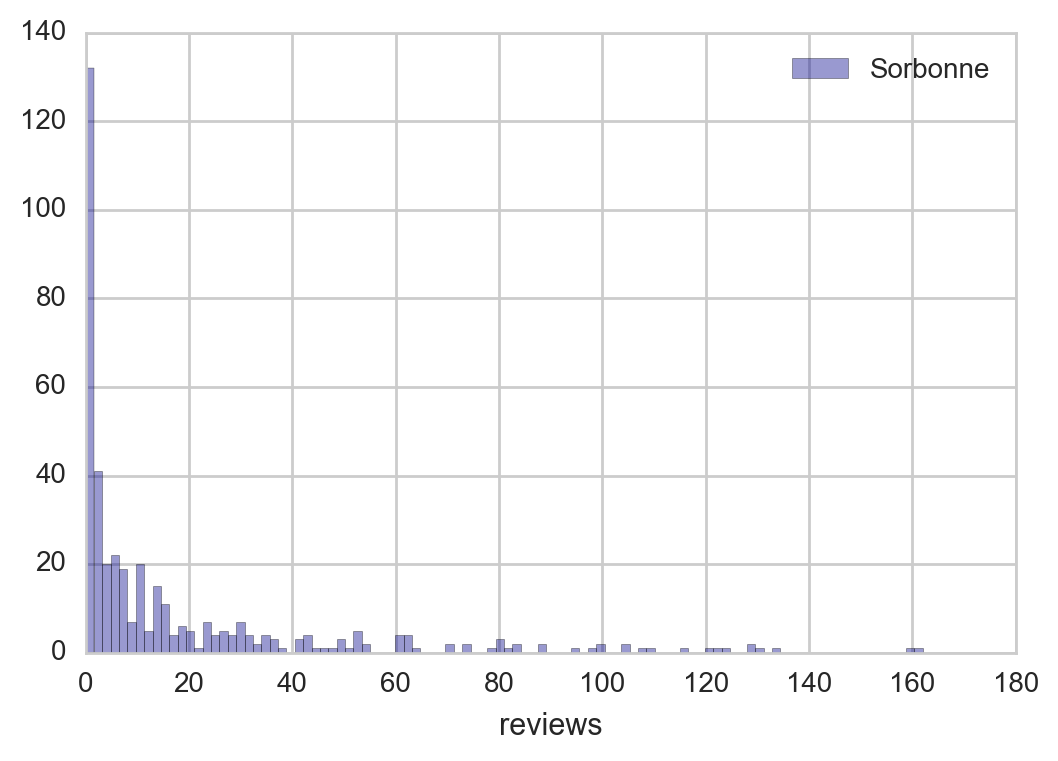

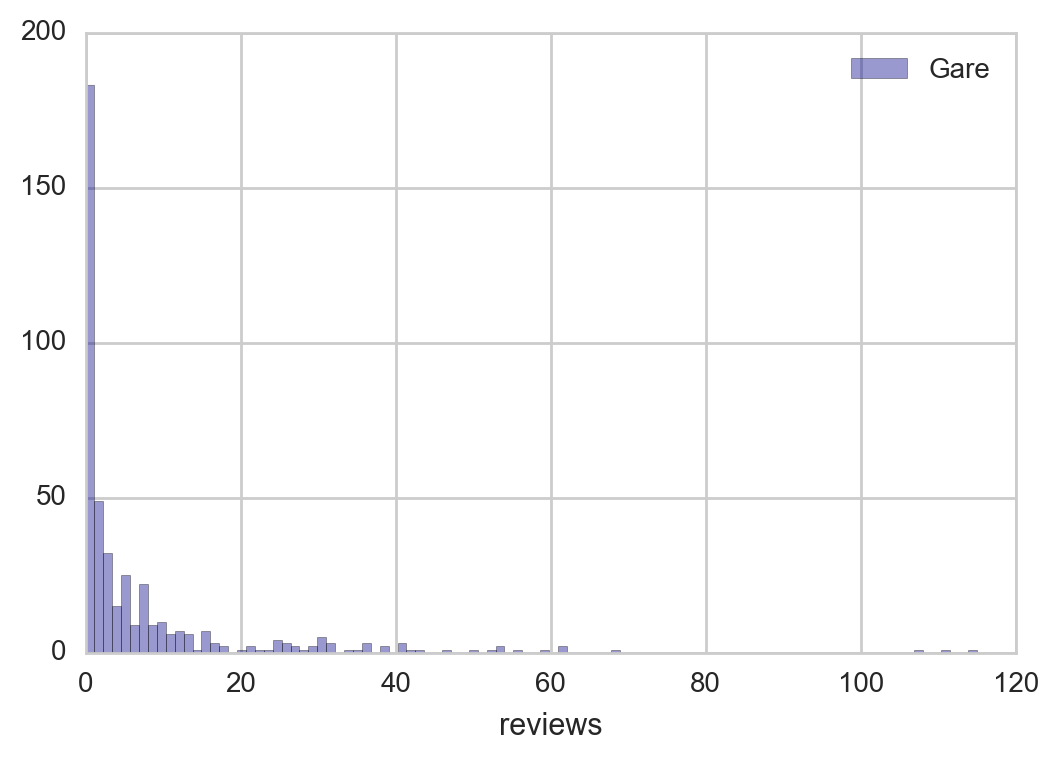

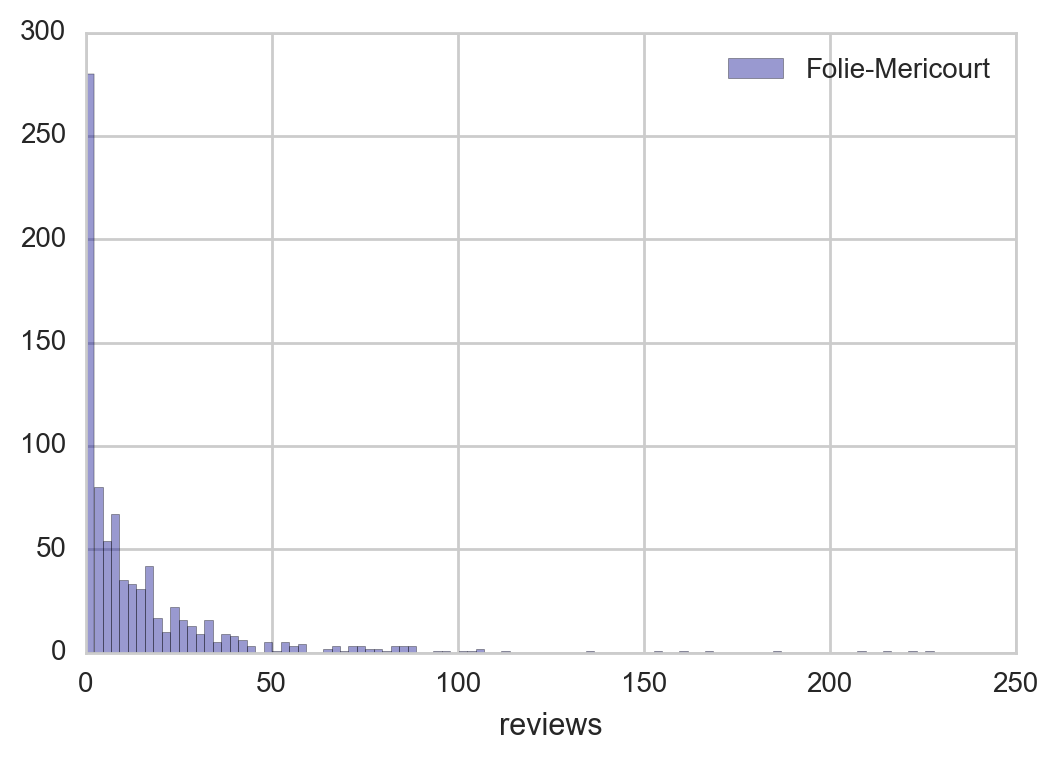

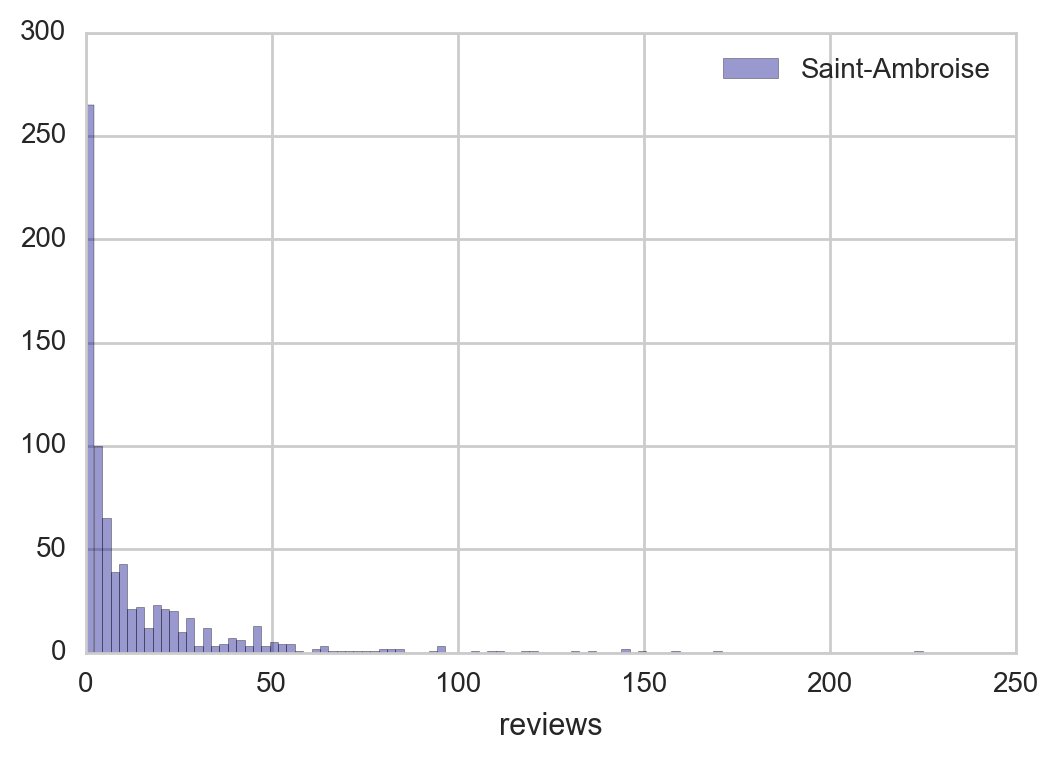

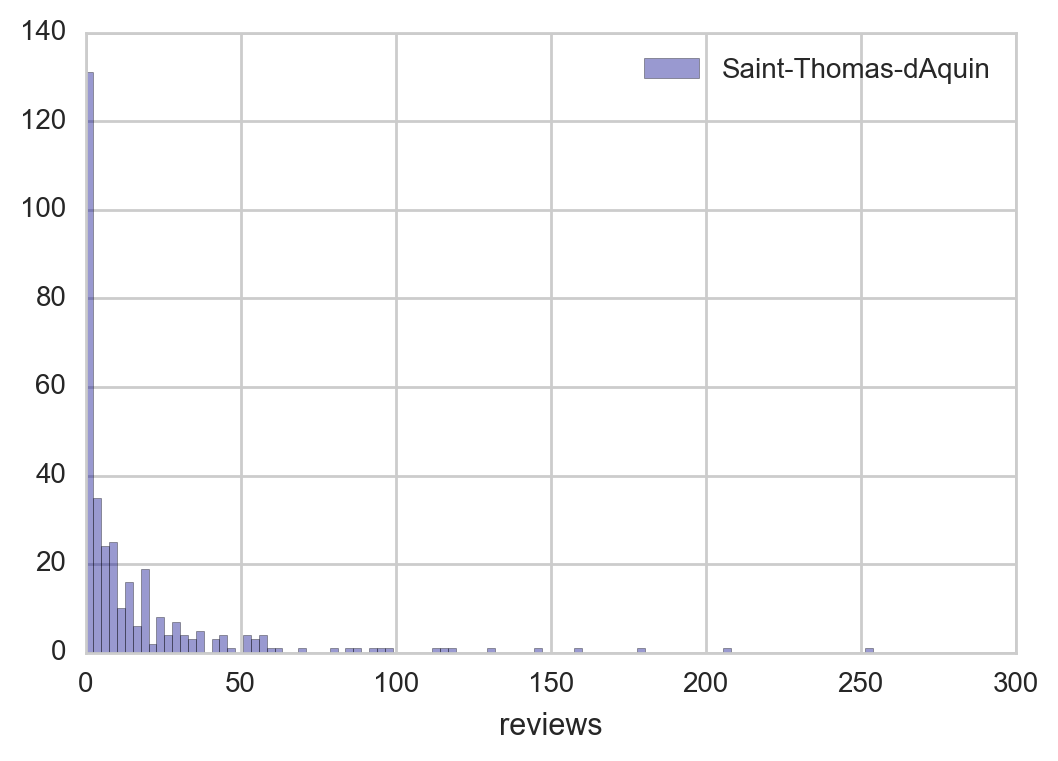

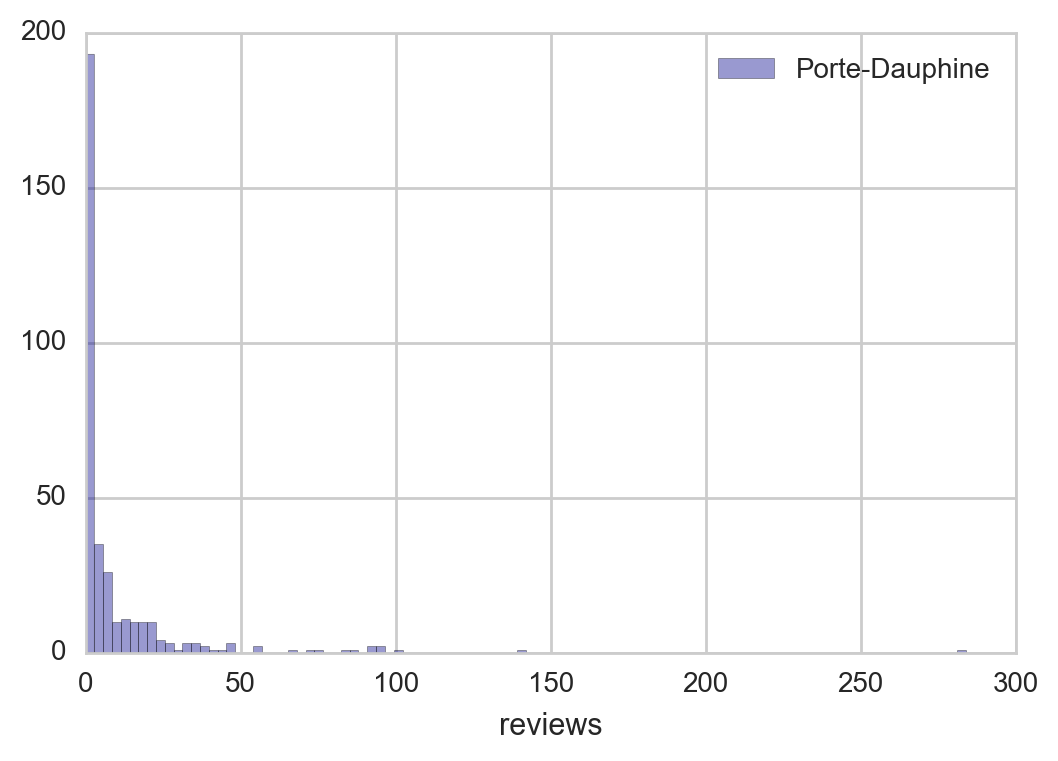

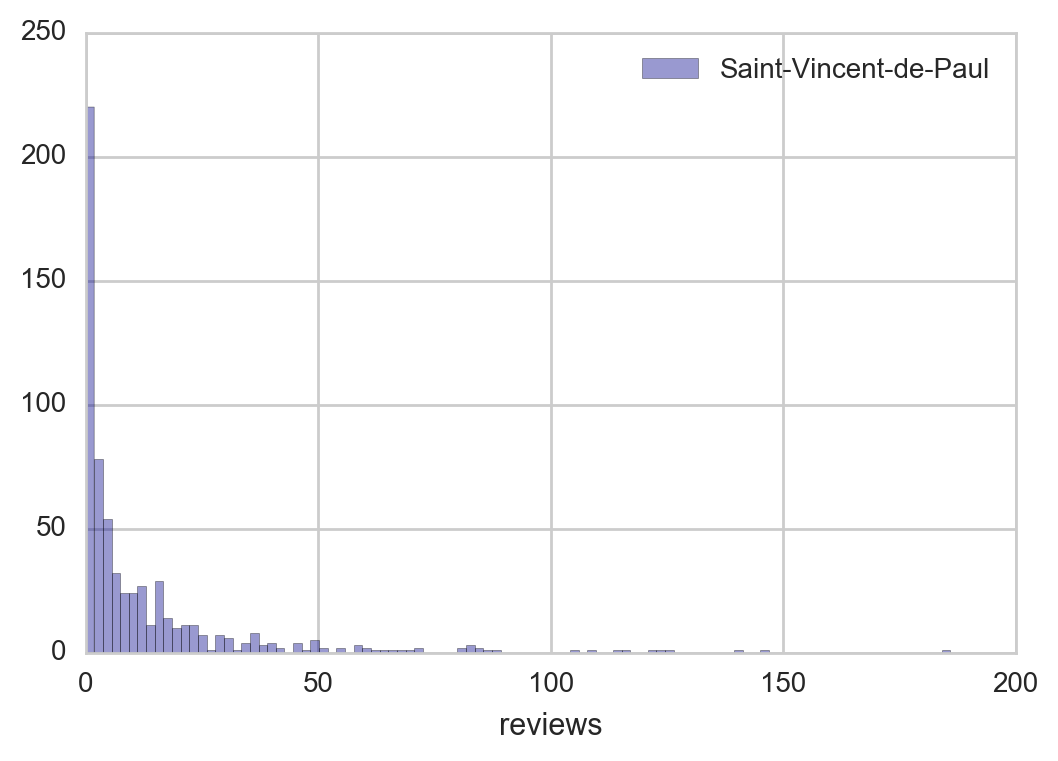

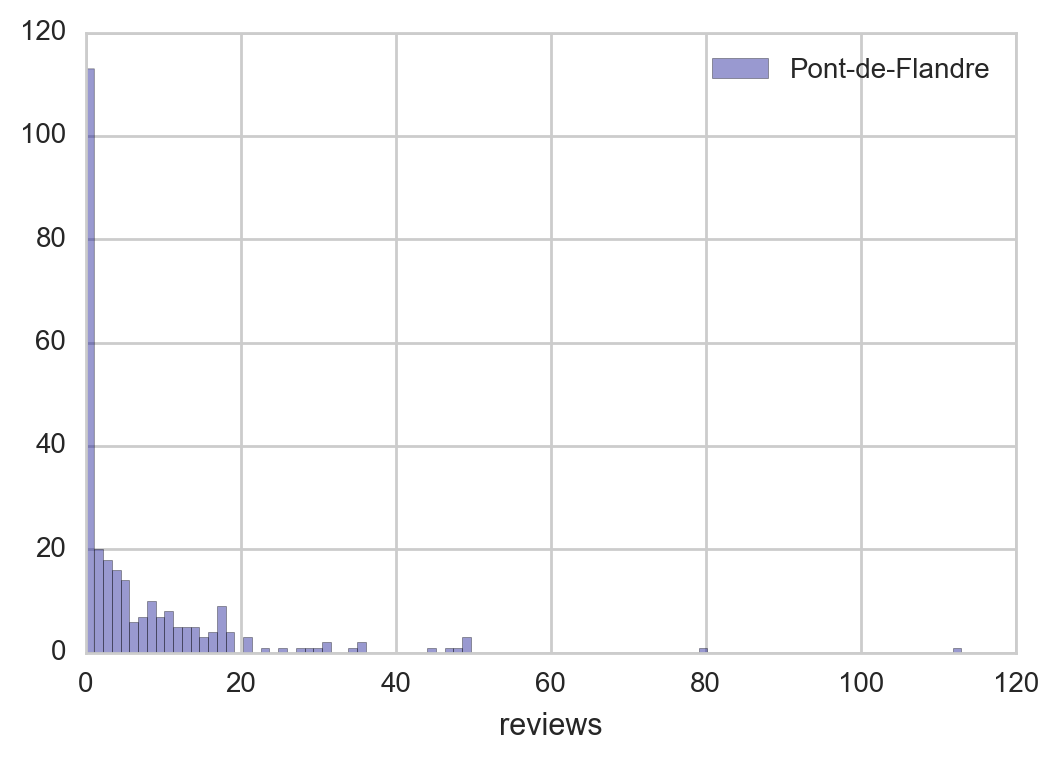

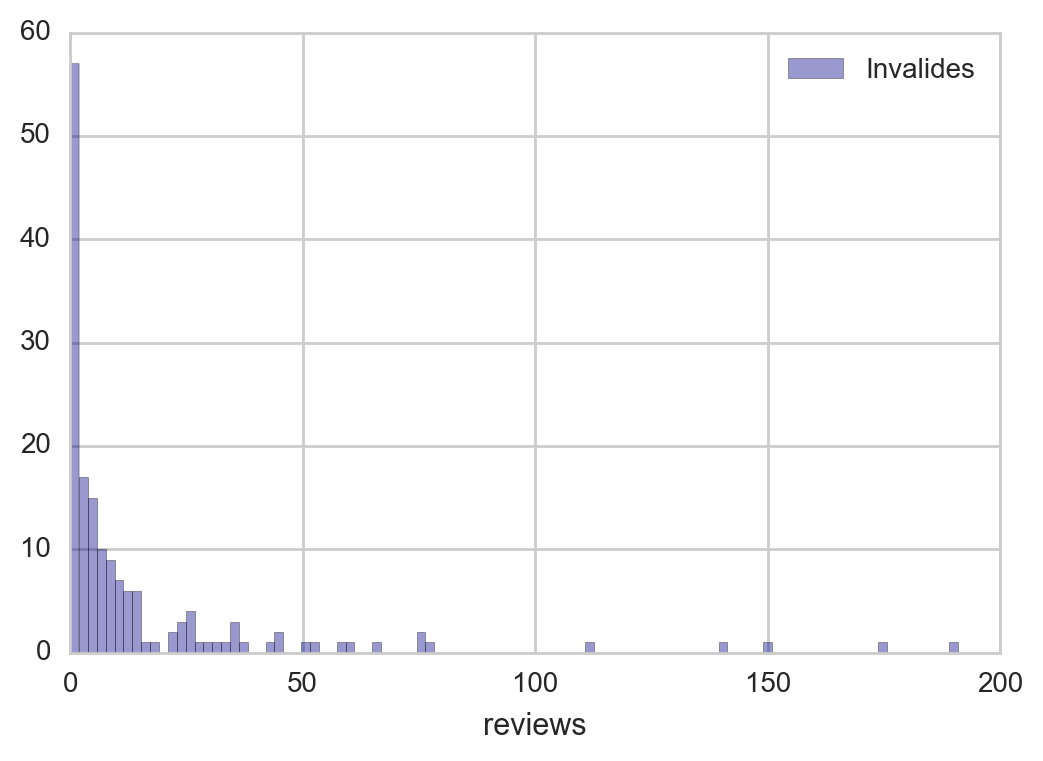

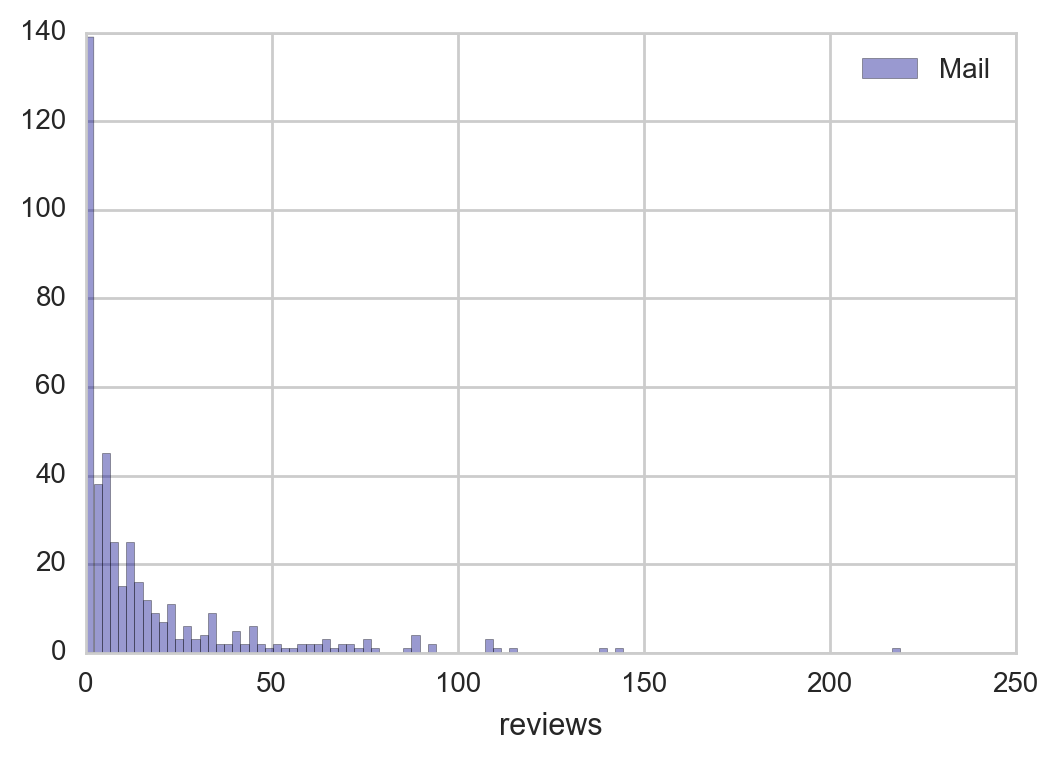

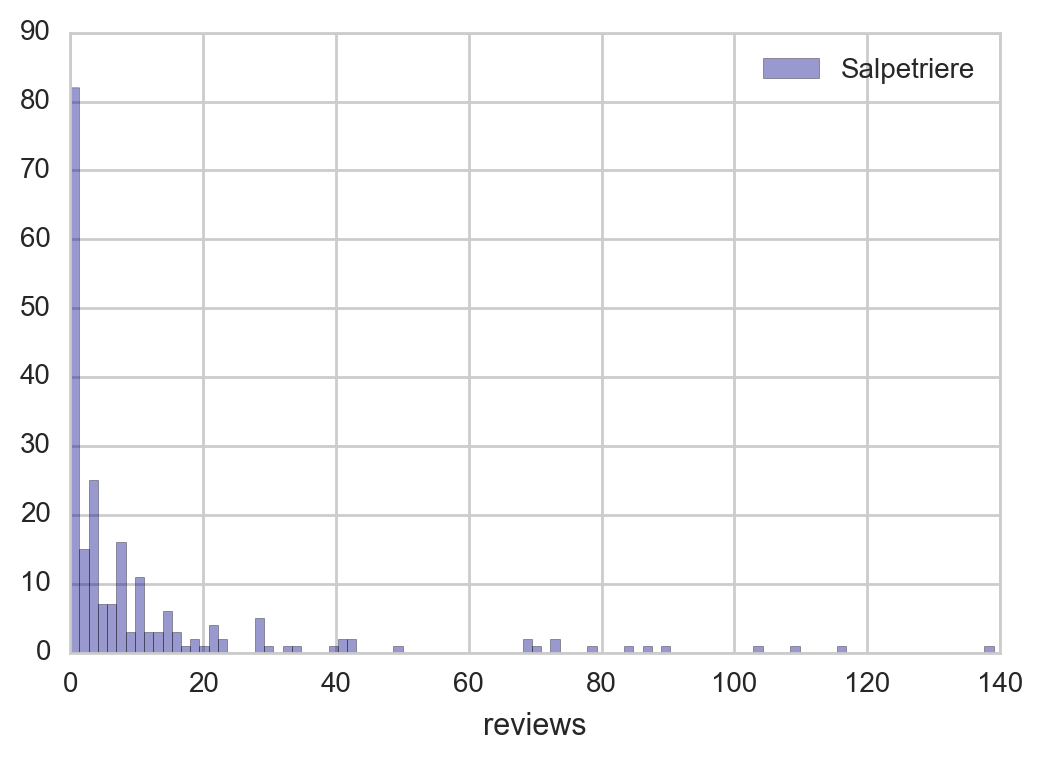

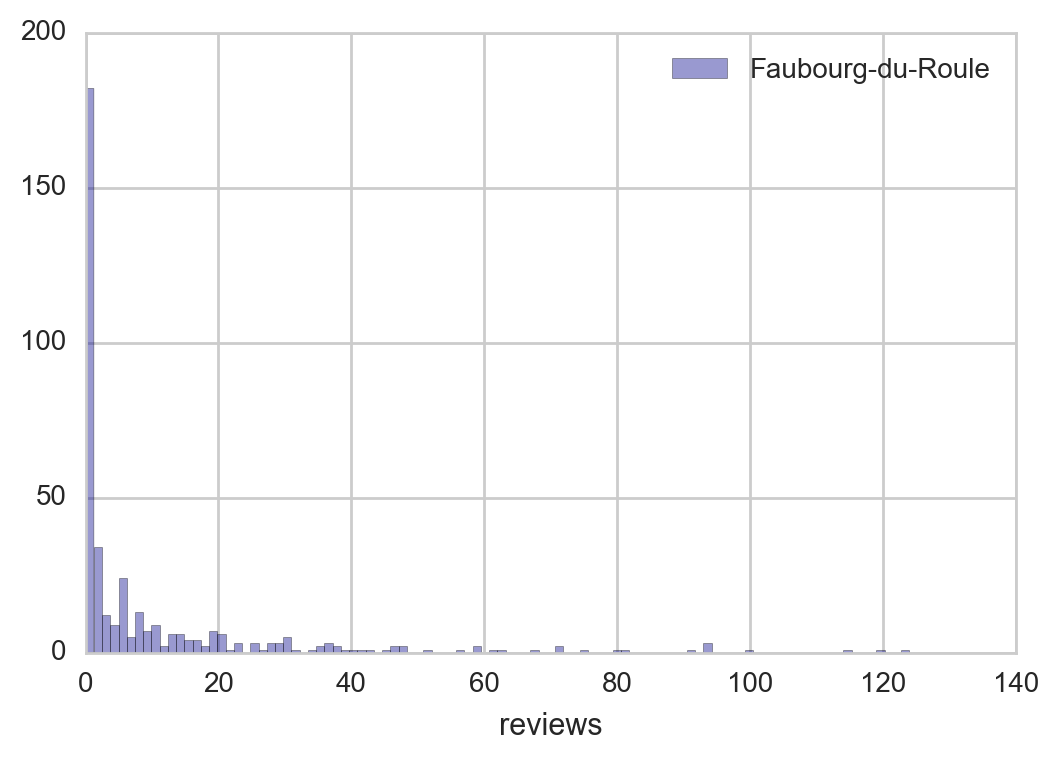

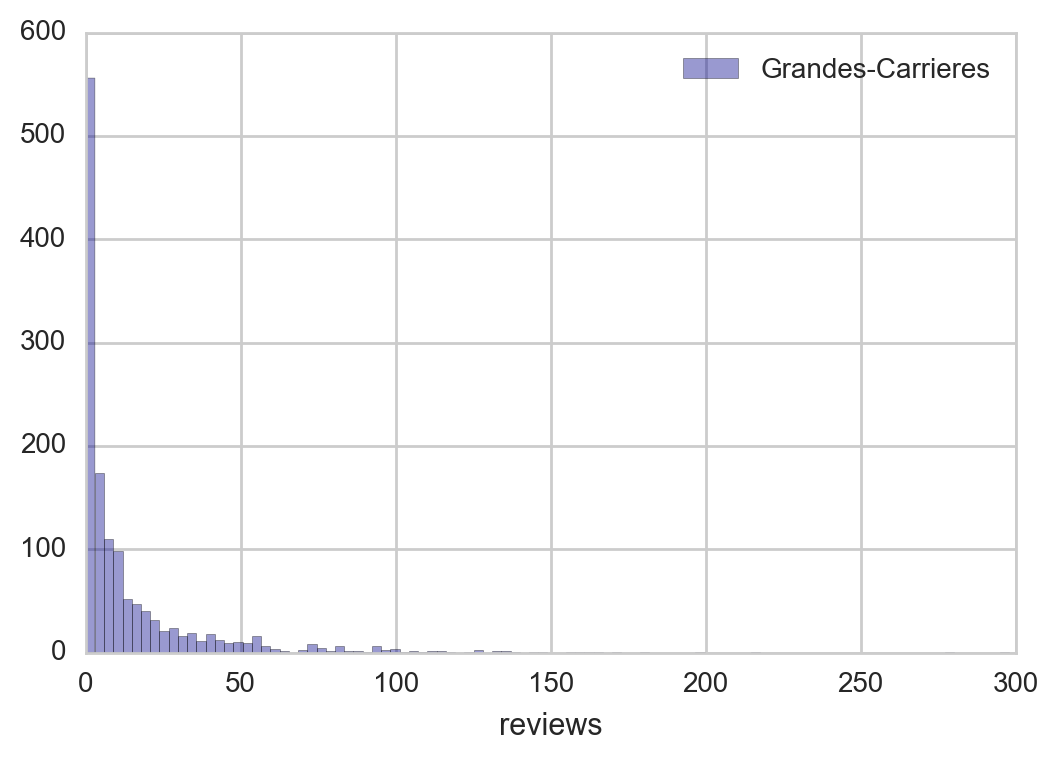

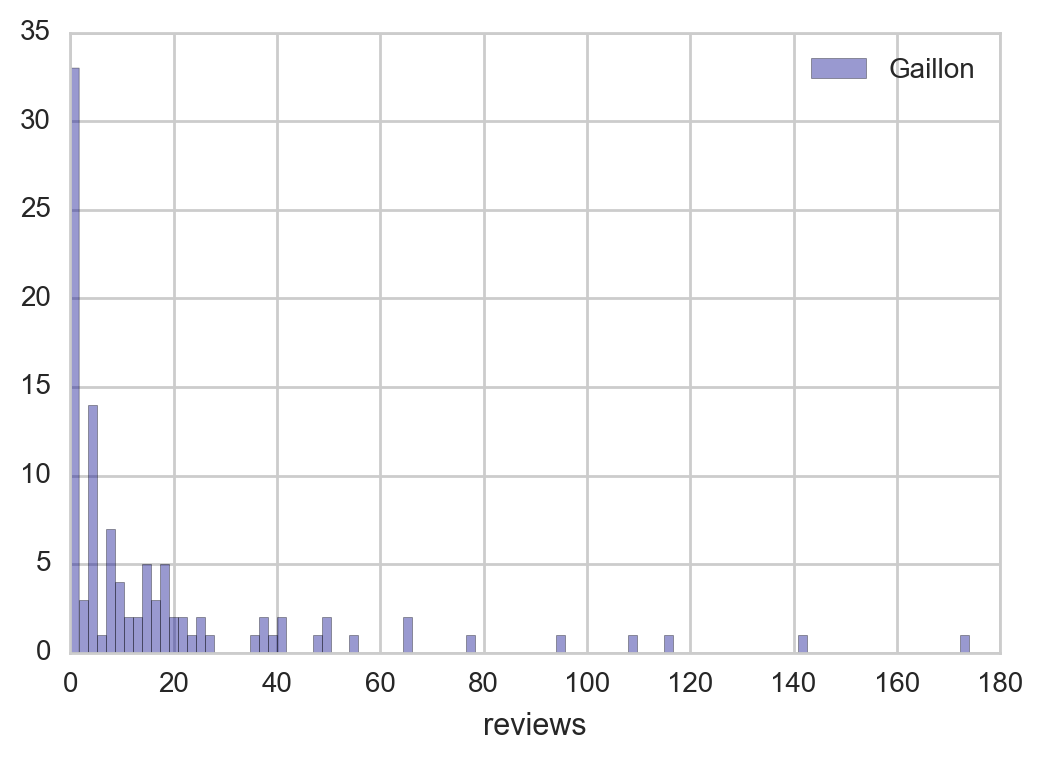

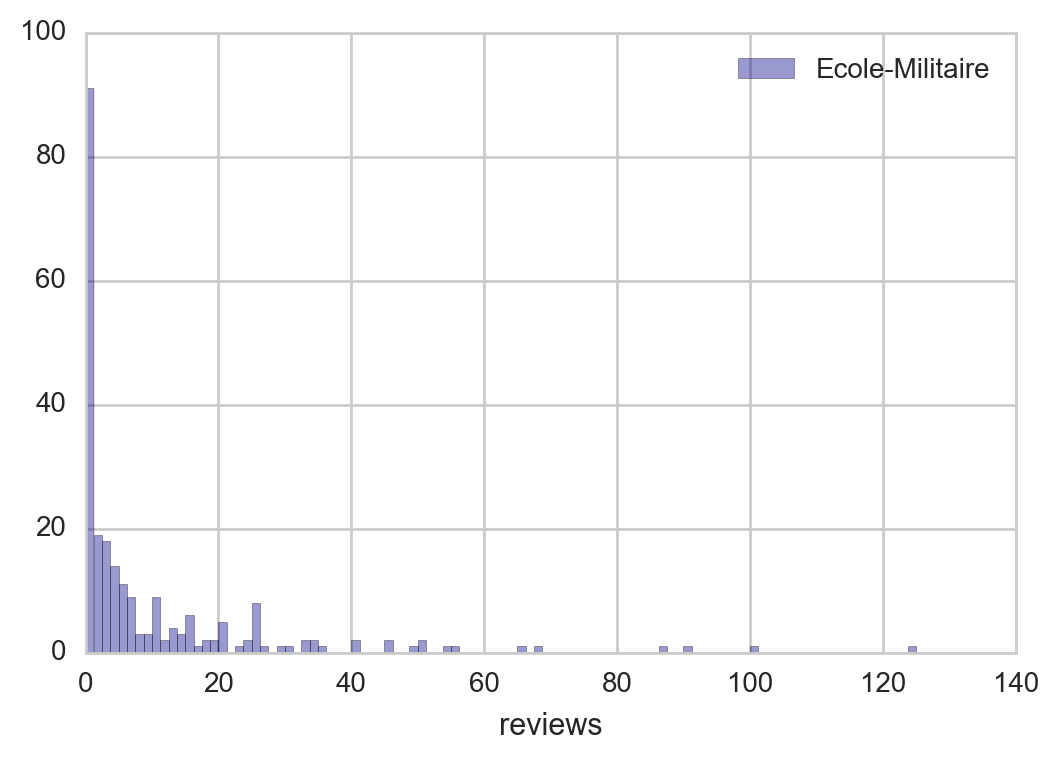

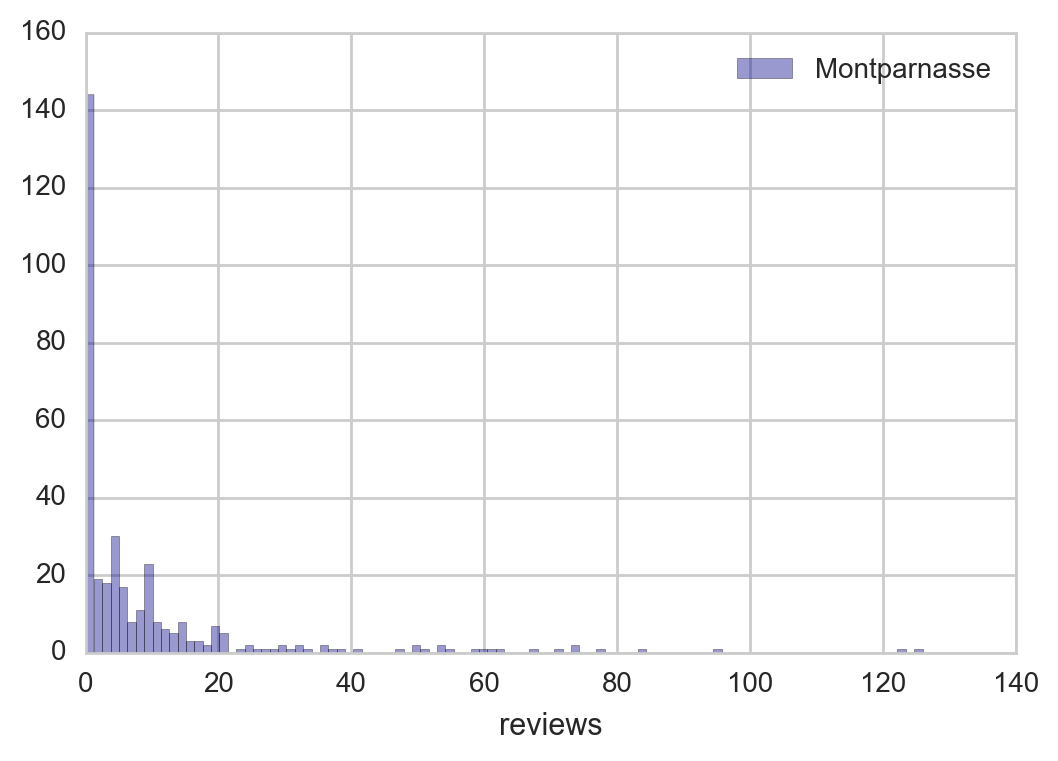

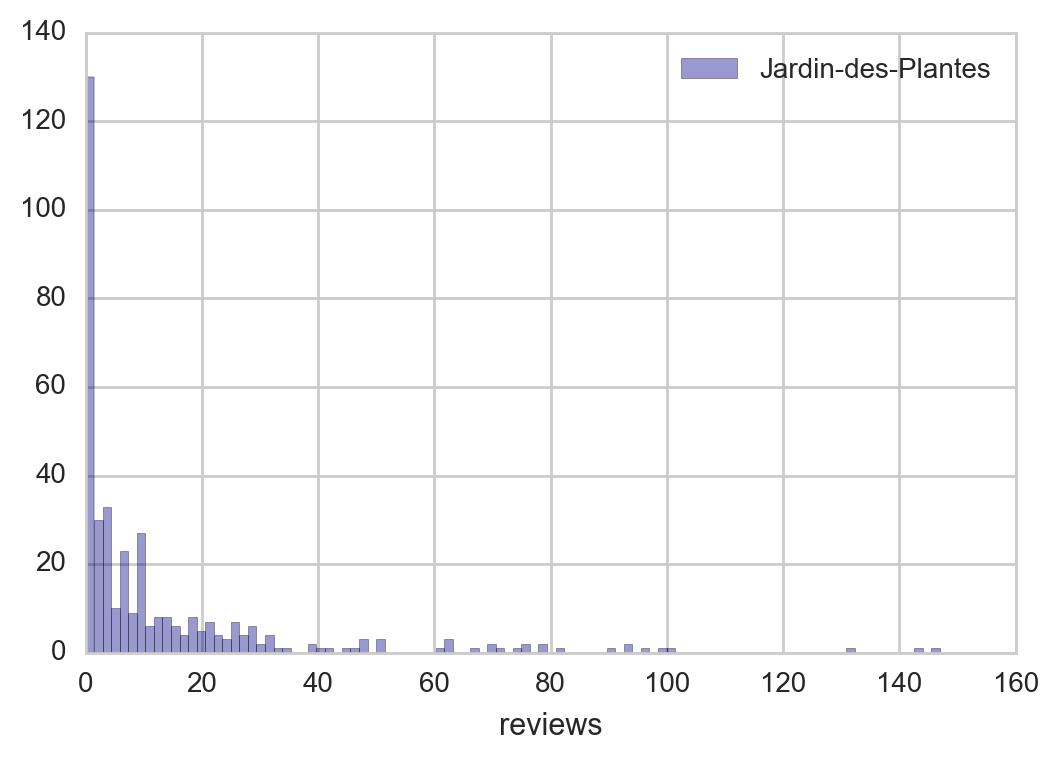

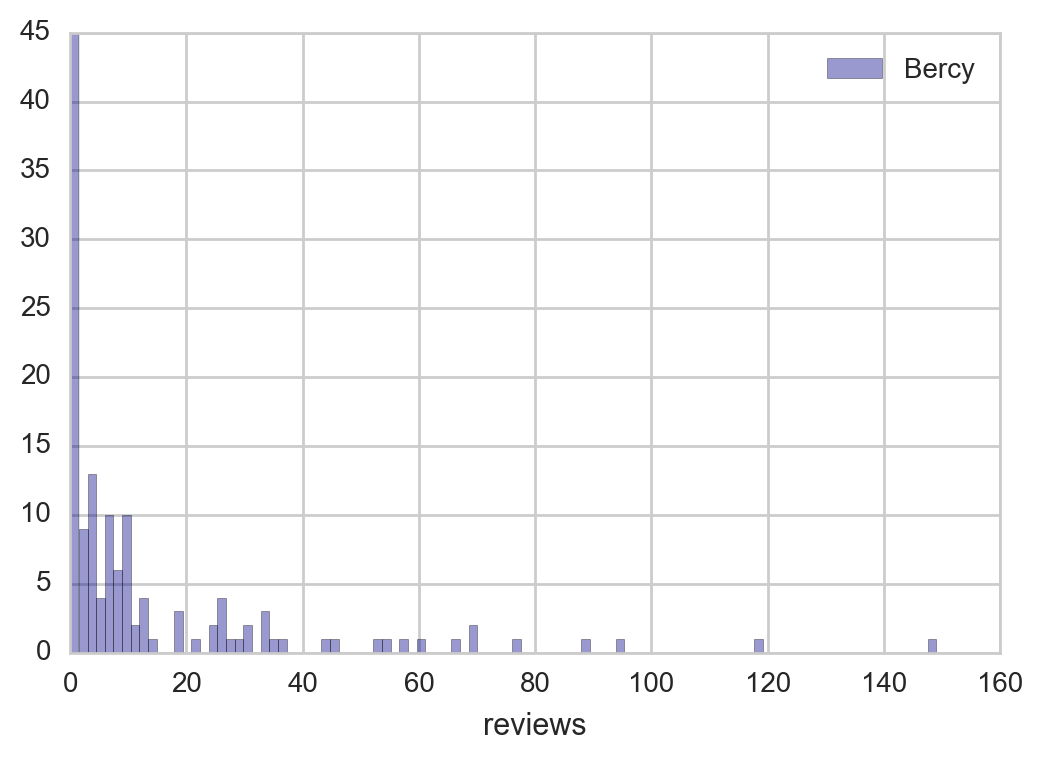

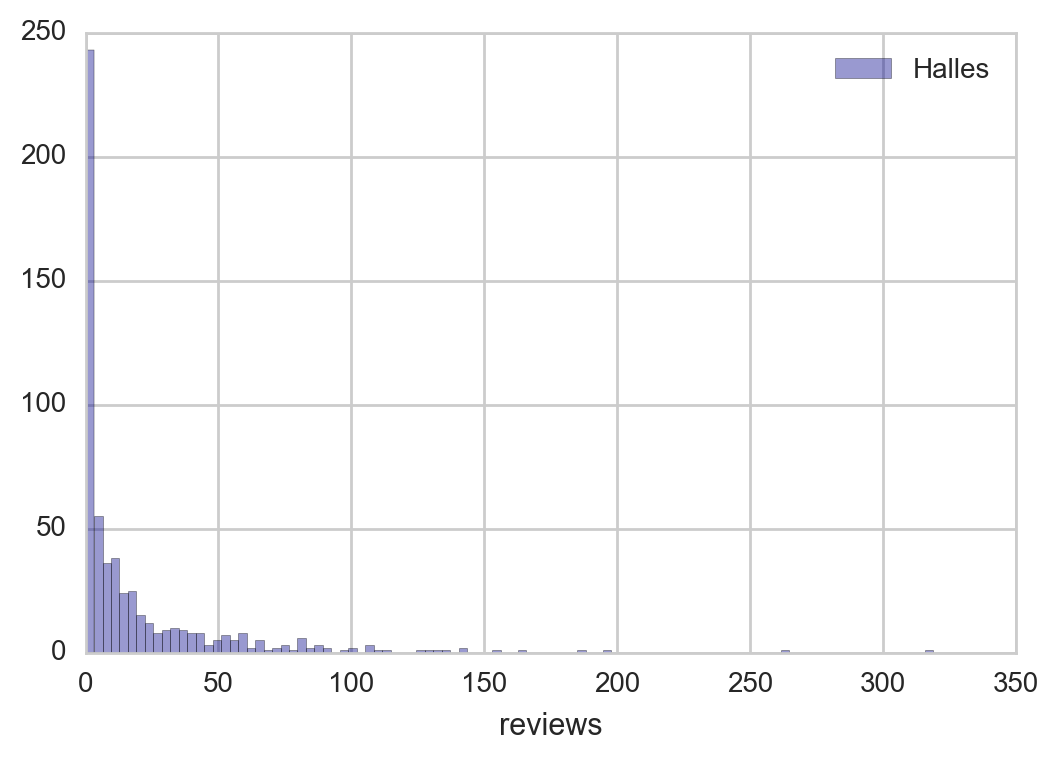

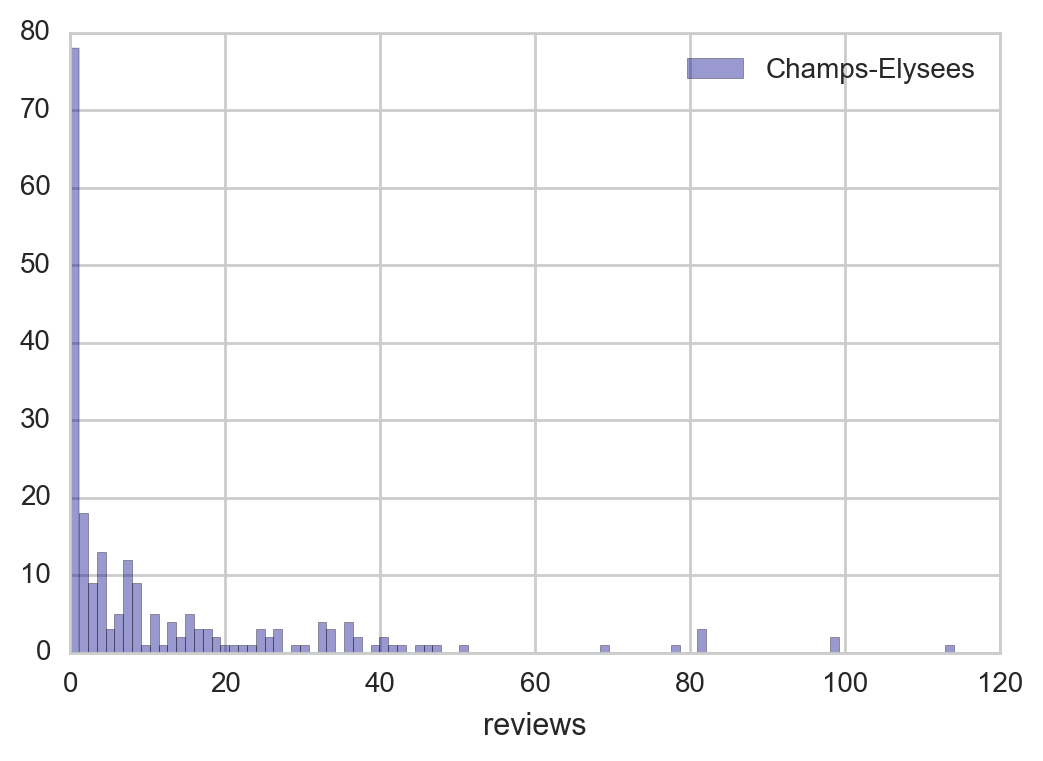

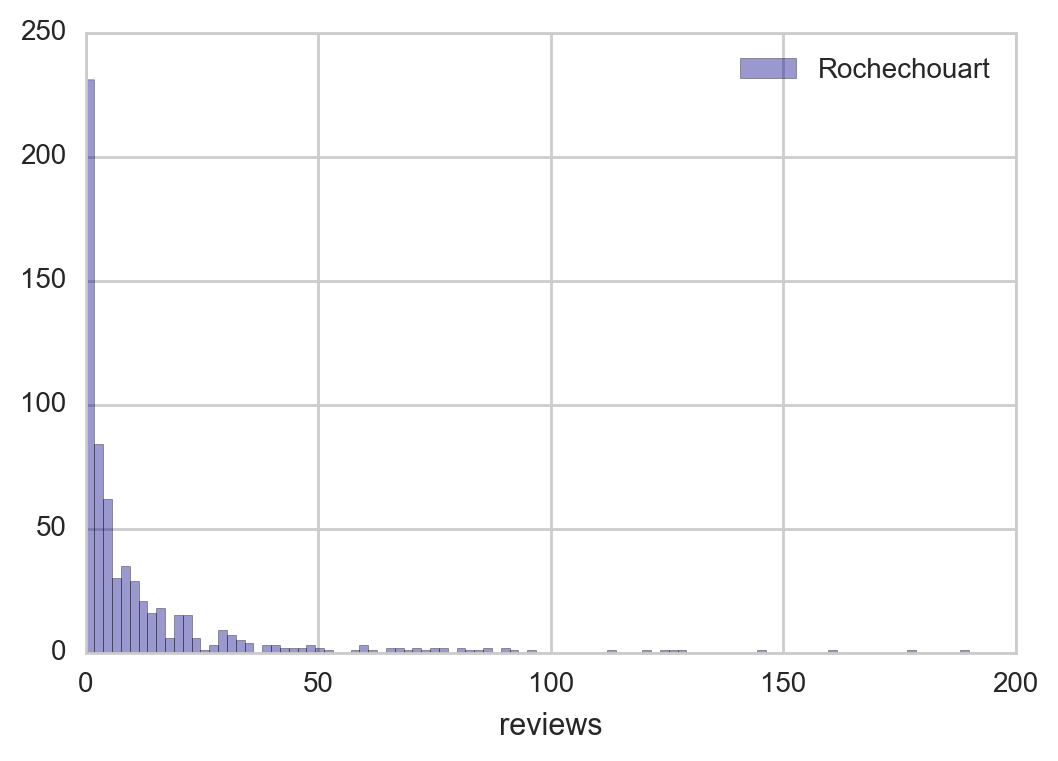

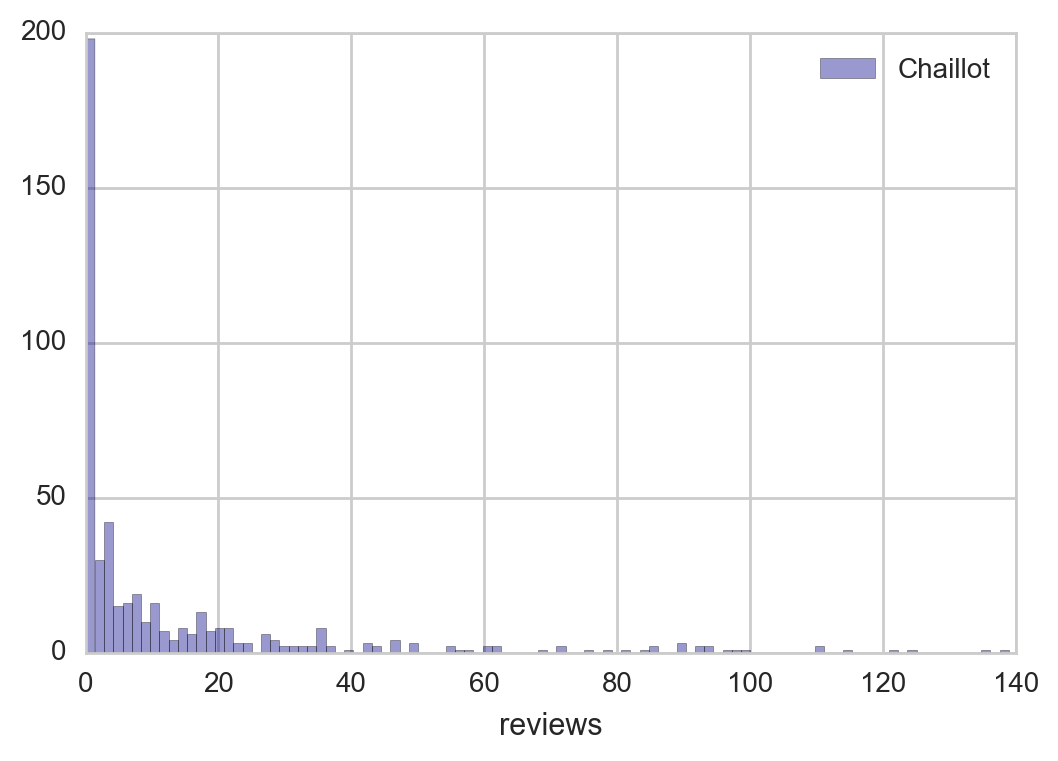

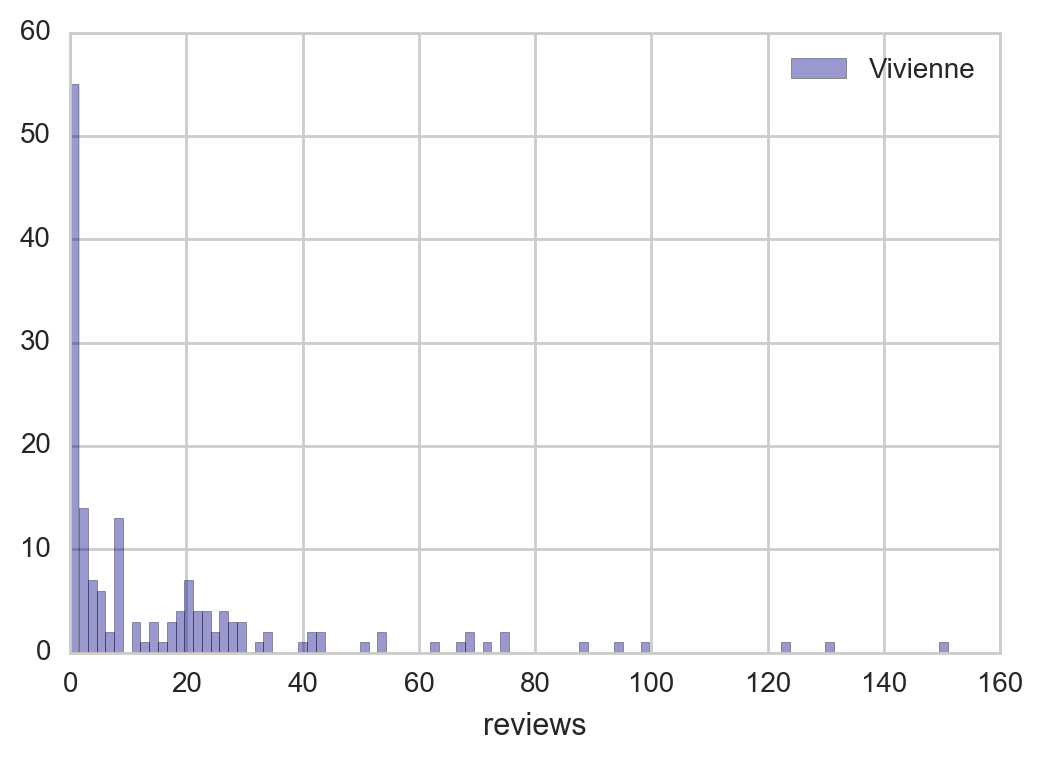

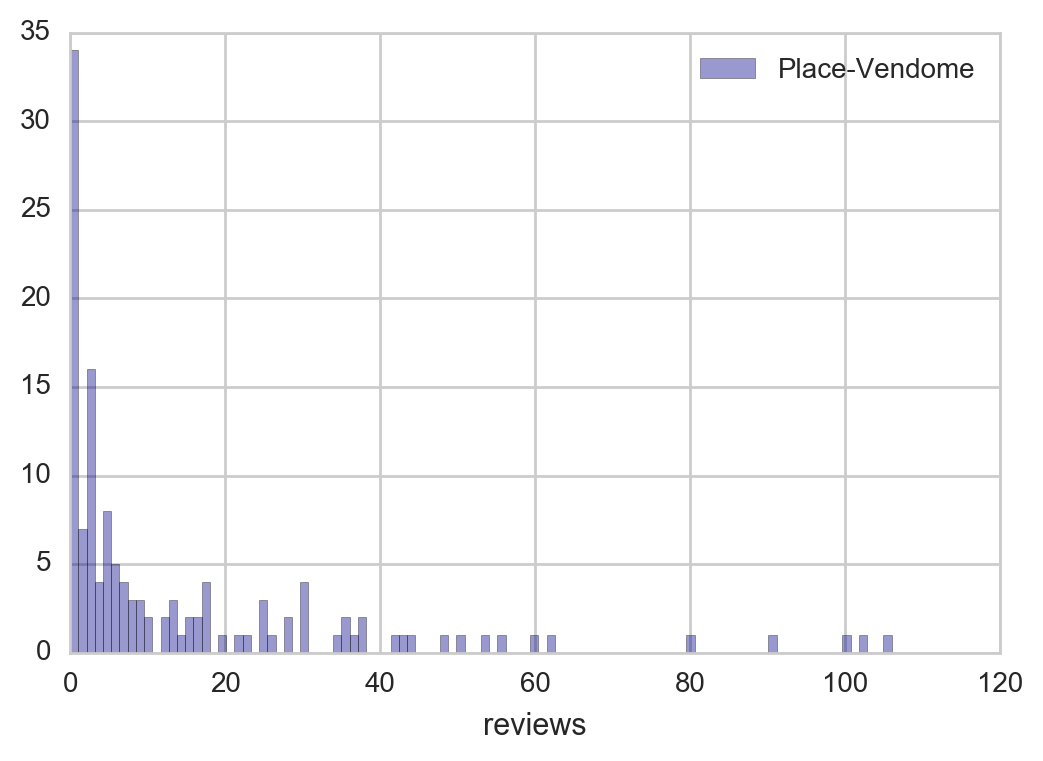

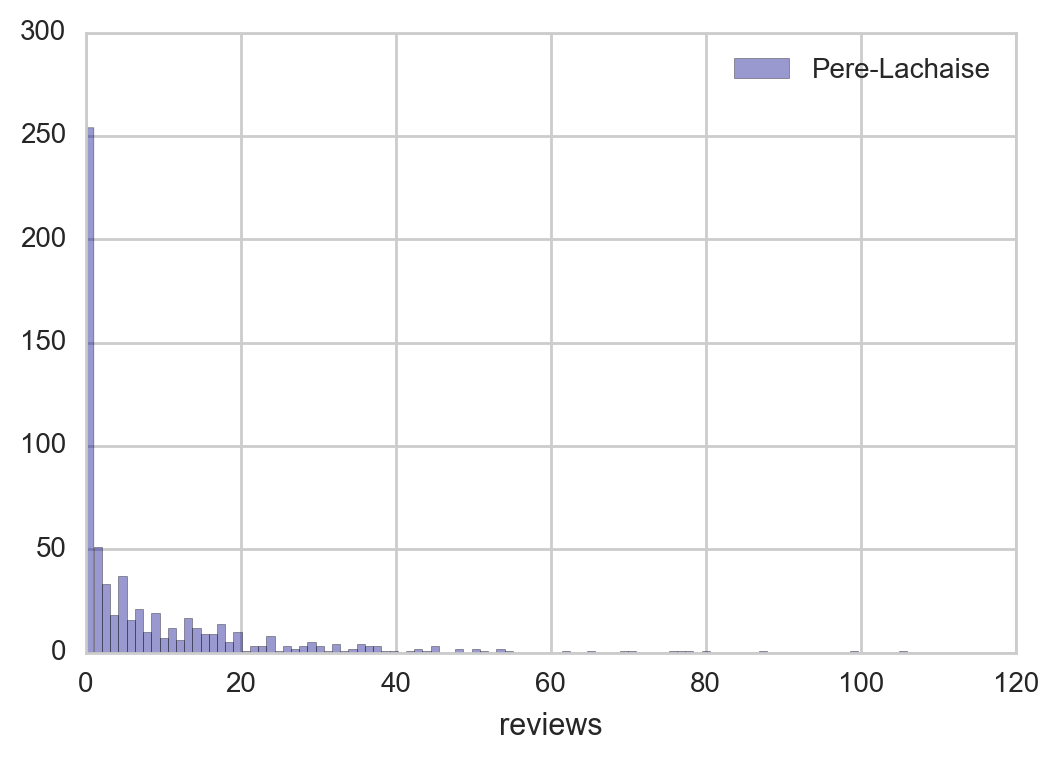

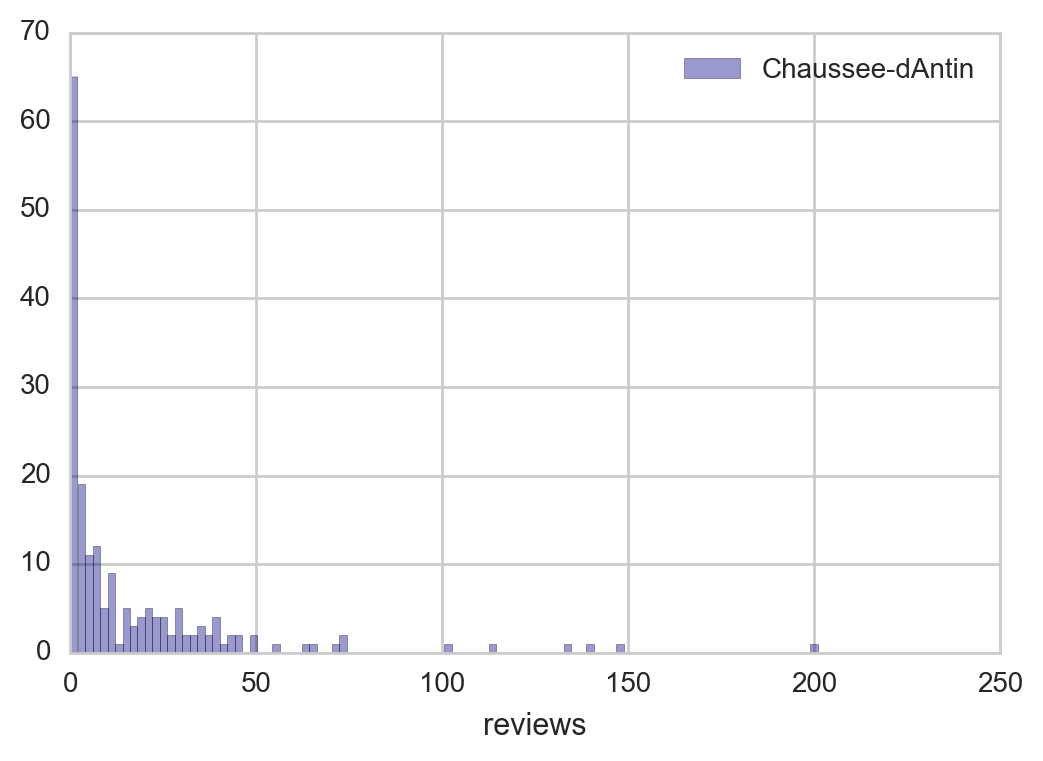

In [146]:
fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(paris.neighborhood.unique())):
    pa = paris[paris.neighborhood == paris.neighborhood.unique()[i]]
    
    ax = sns.distplot(pa.reviews, color='darkblue', bins=100, kde=False, 
                      label = paris.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 00])
    plt.show()

In [147]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(paris.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [148]:
df1=df1.reset_index()

In [149]:
df1.sort_values('neighborhood', inplace = True)

In [150]:
df1 = df1.reset_index()

In [151]:
df1.head(2)

index neighborhood  reviews  host_id       price
0      0     Amerique     3677      476   84.283613
1      1     Archives     9951      442  161.402715

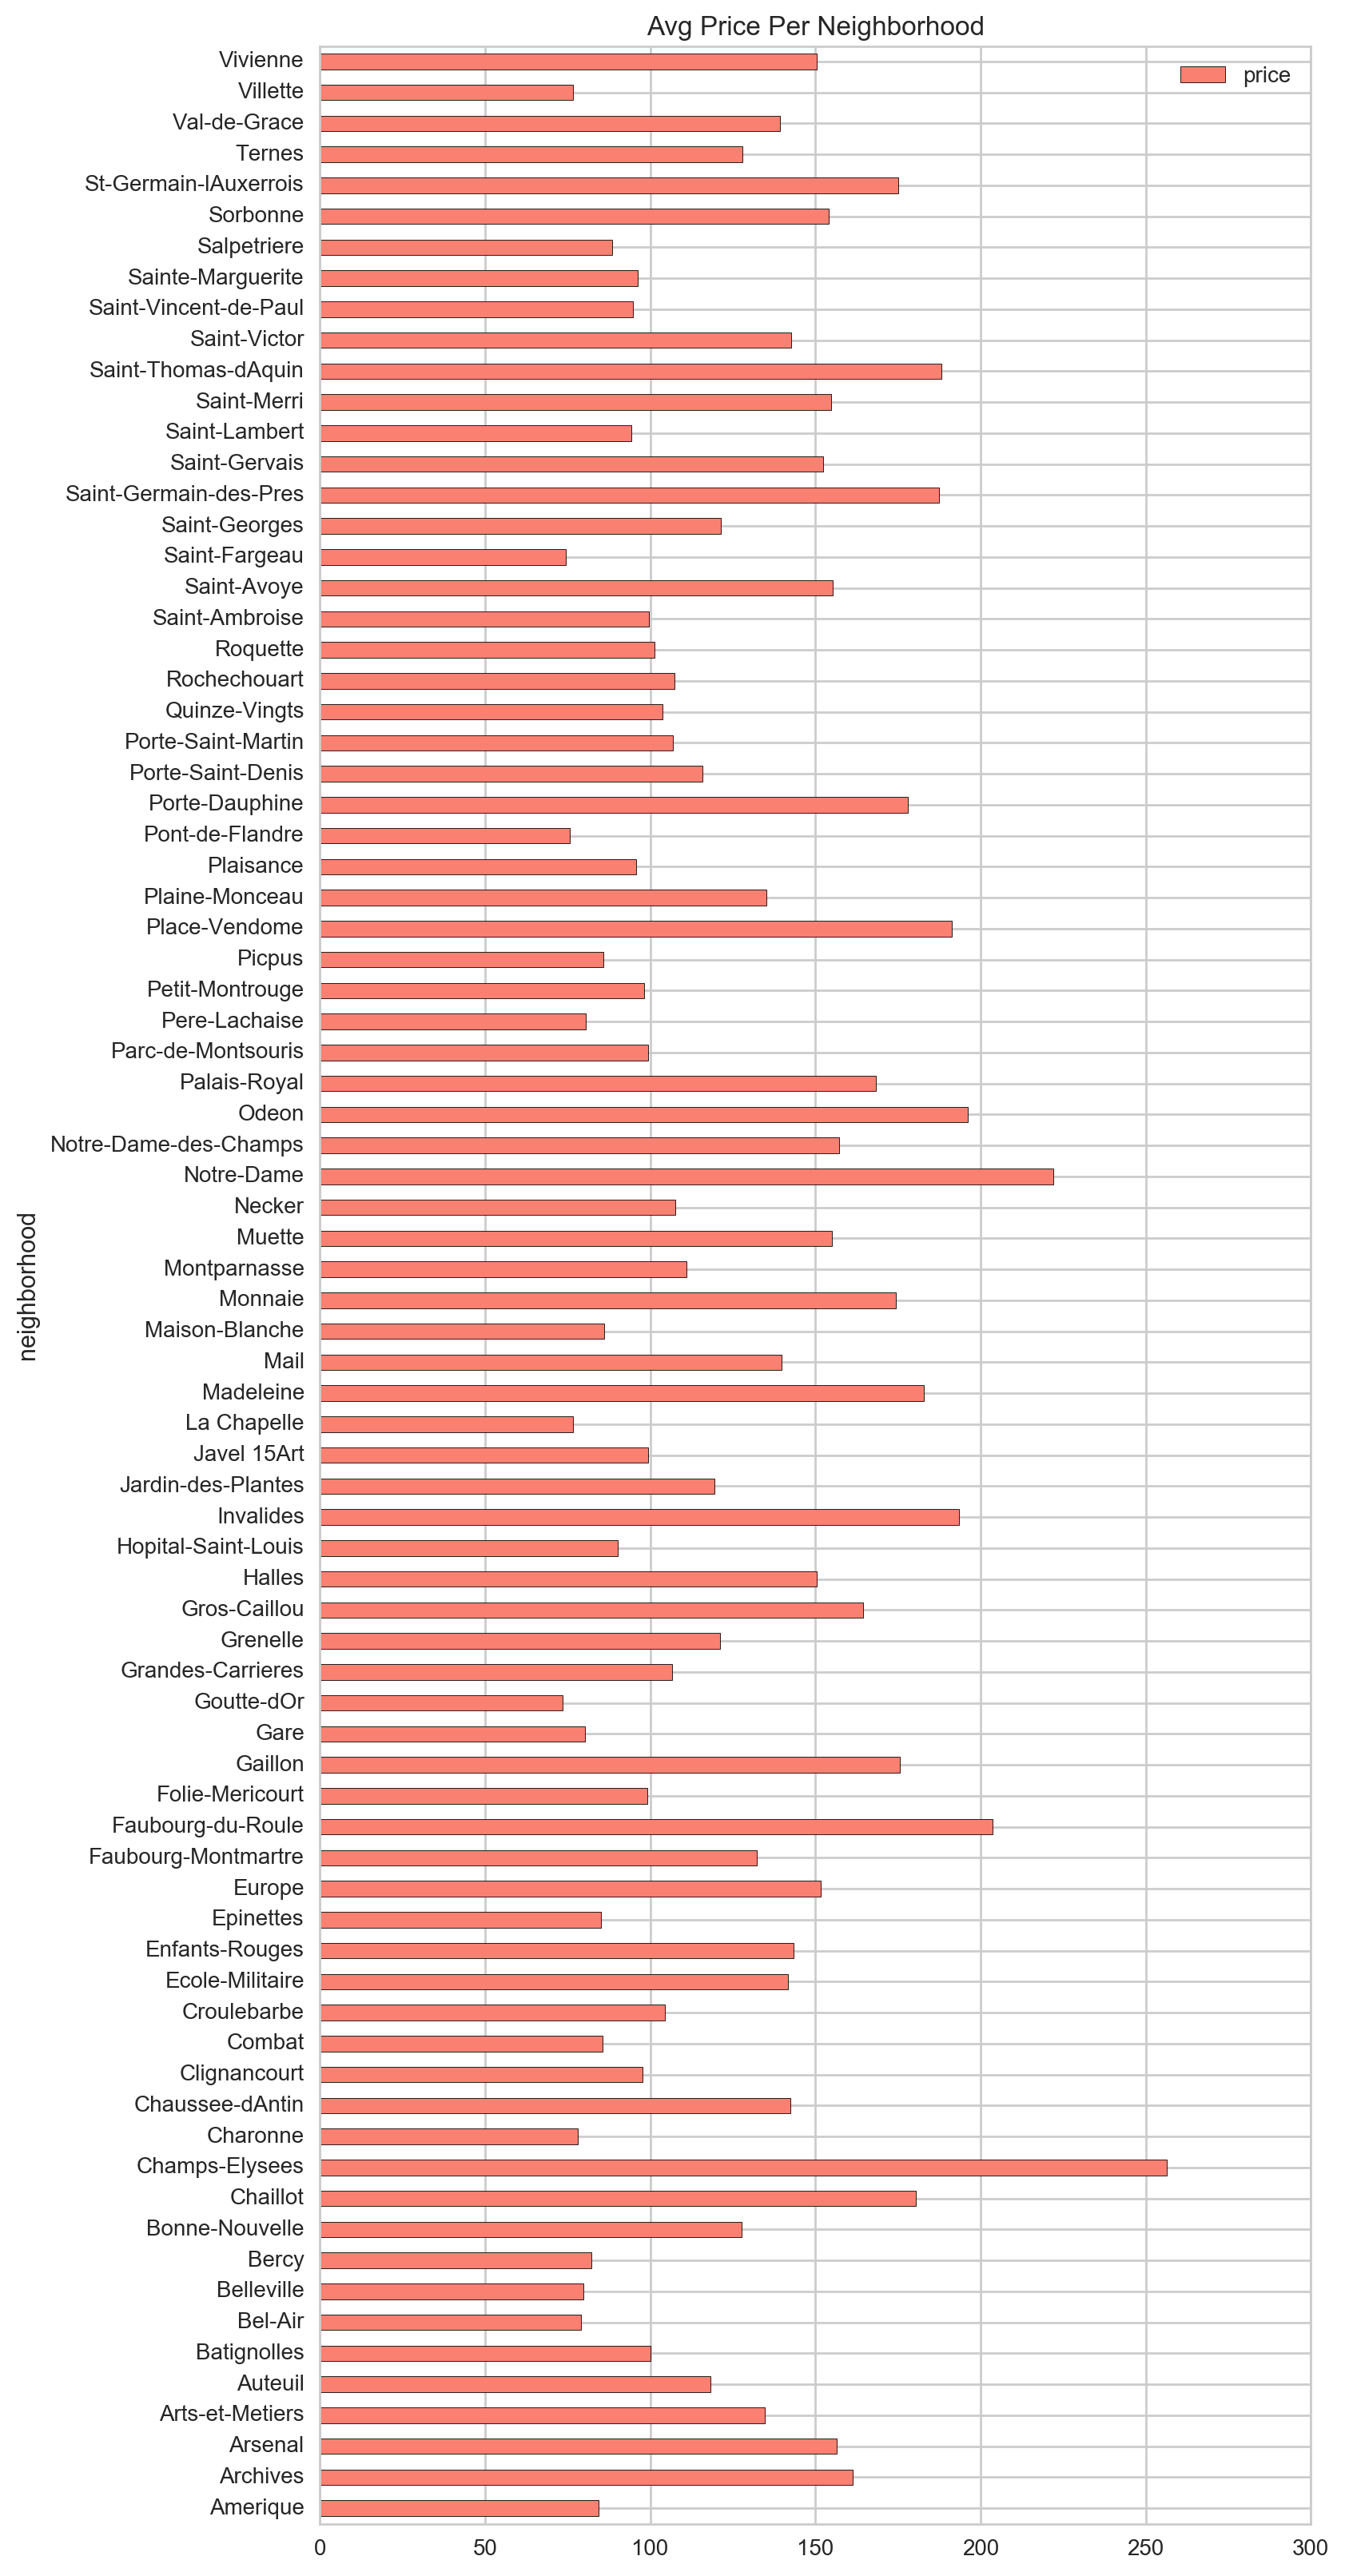

In [152]:
df1.plot(x='neighborhood', y='price', figsize=(8,20), kind = 'barh', title = 'Avg Price Per Neighborhood',
         color = 'salmon'
        )

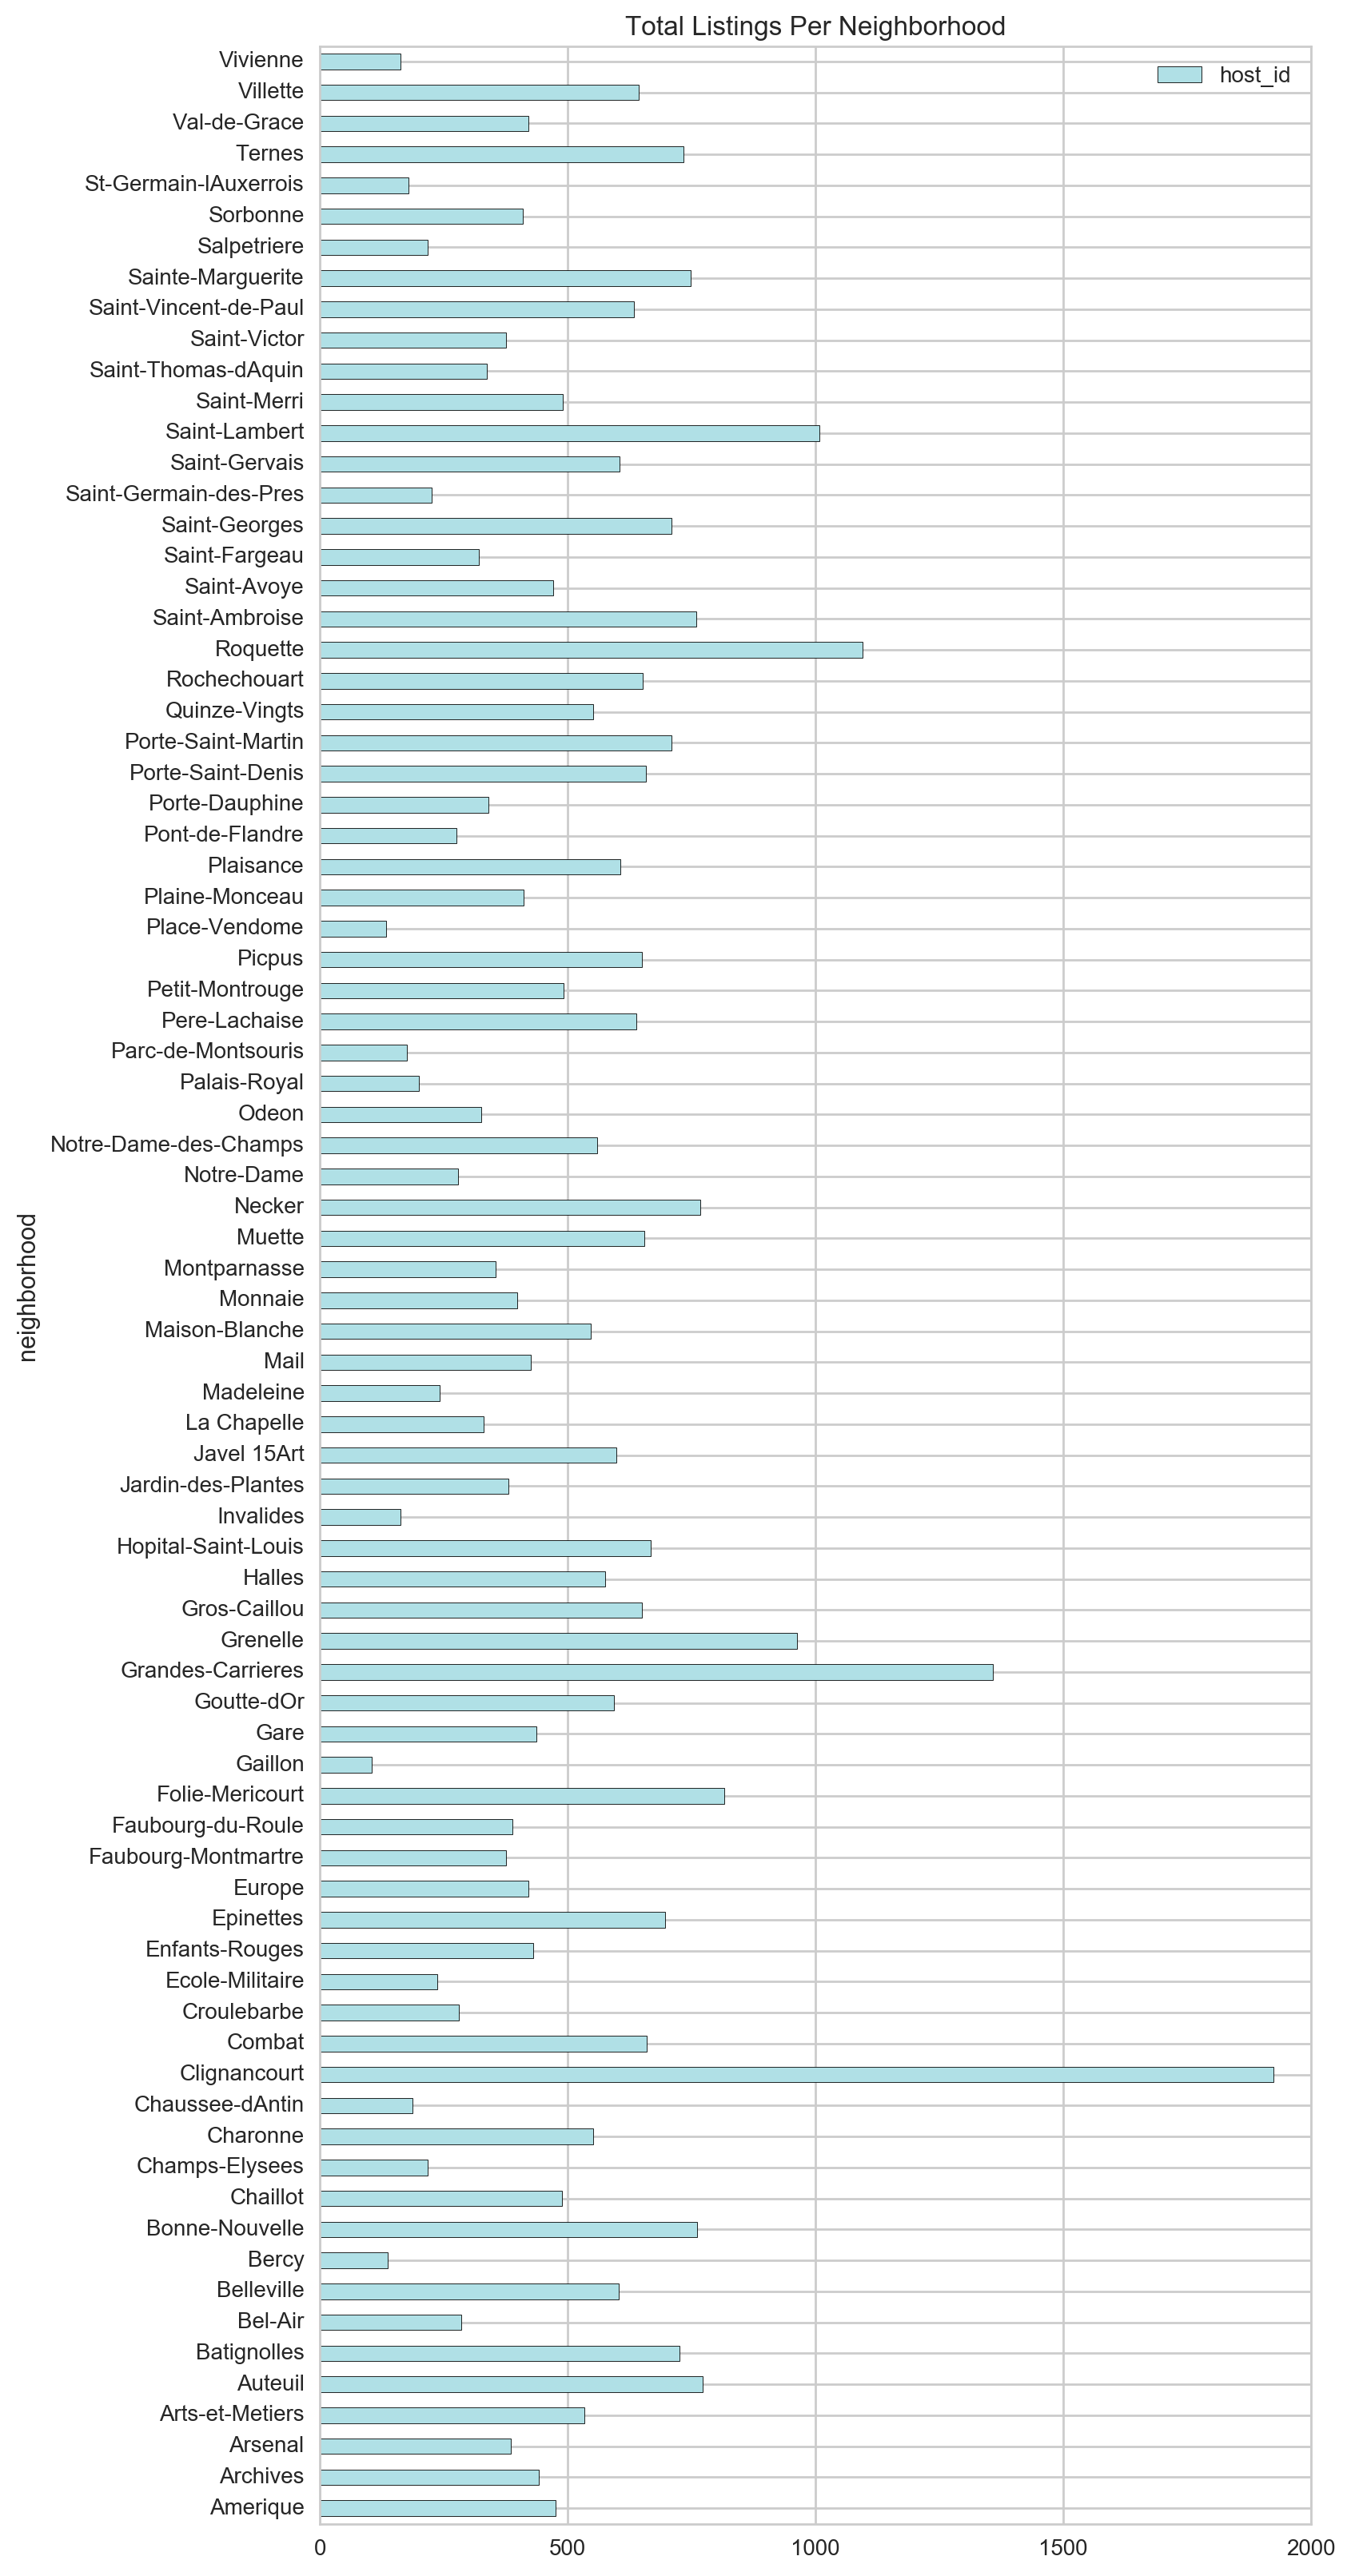

In [153]:
df1.plot(x='neighborhood', y='host_id', figsize=(8,20), kind = 'barh',title = 'Total Listings Per Neighborhood',
         color = 'powderblue')

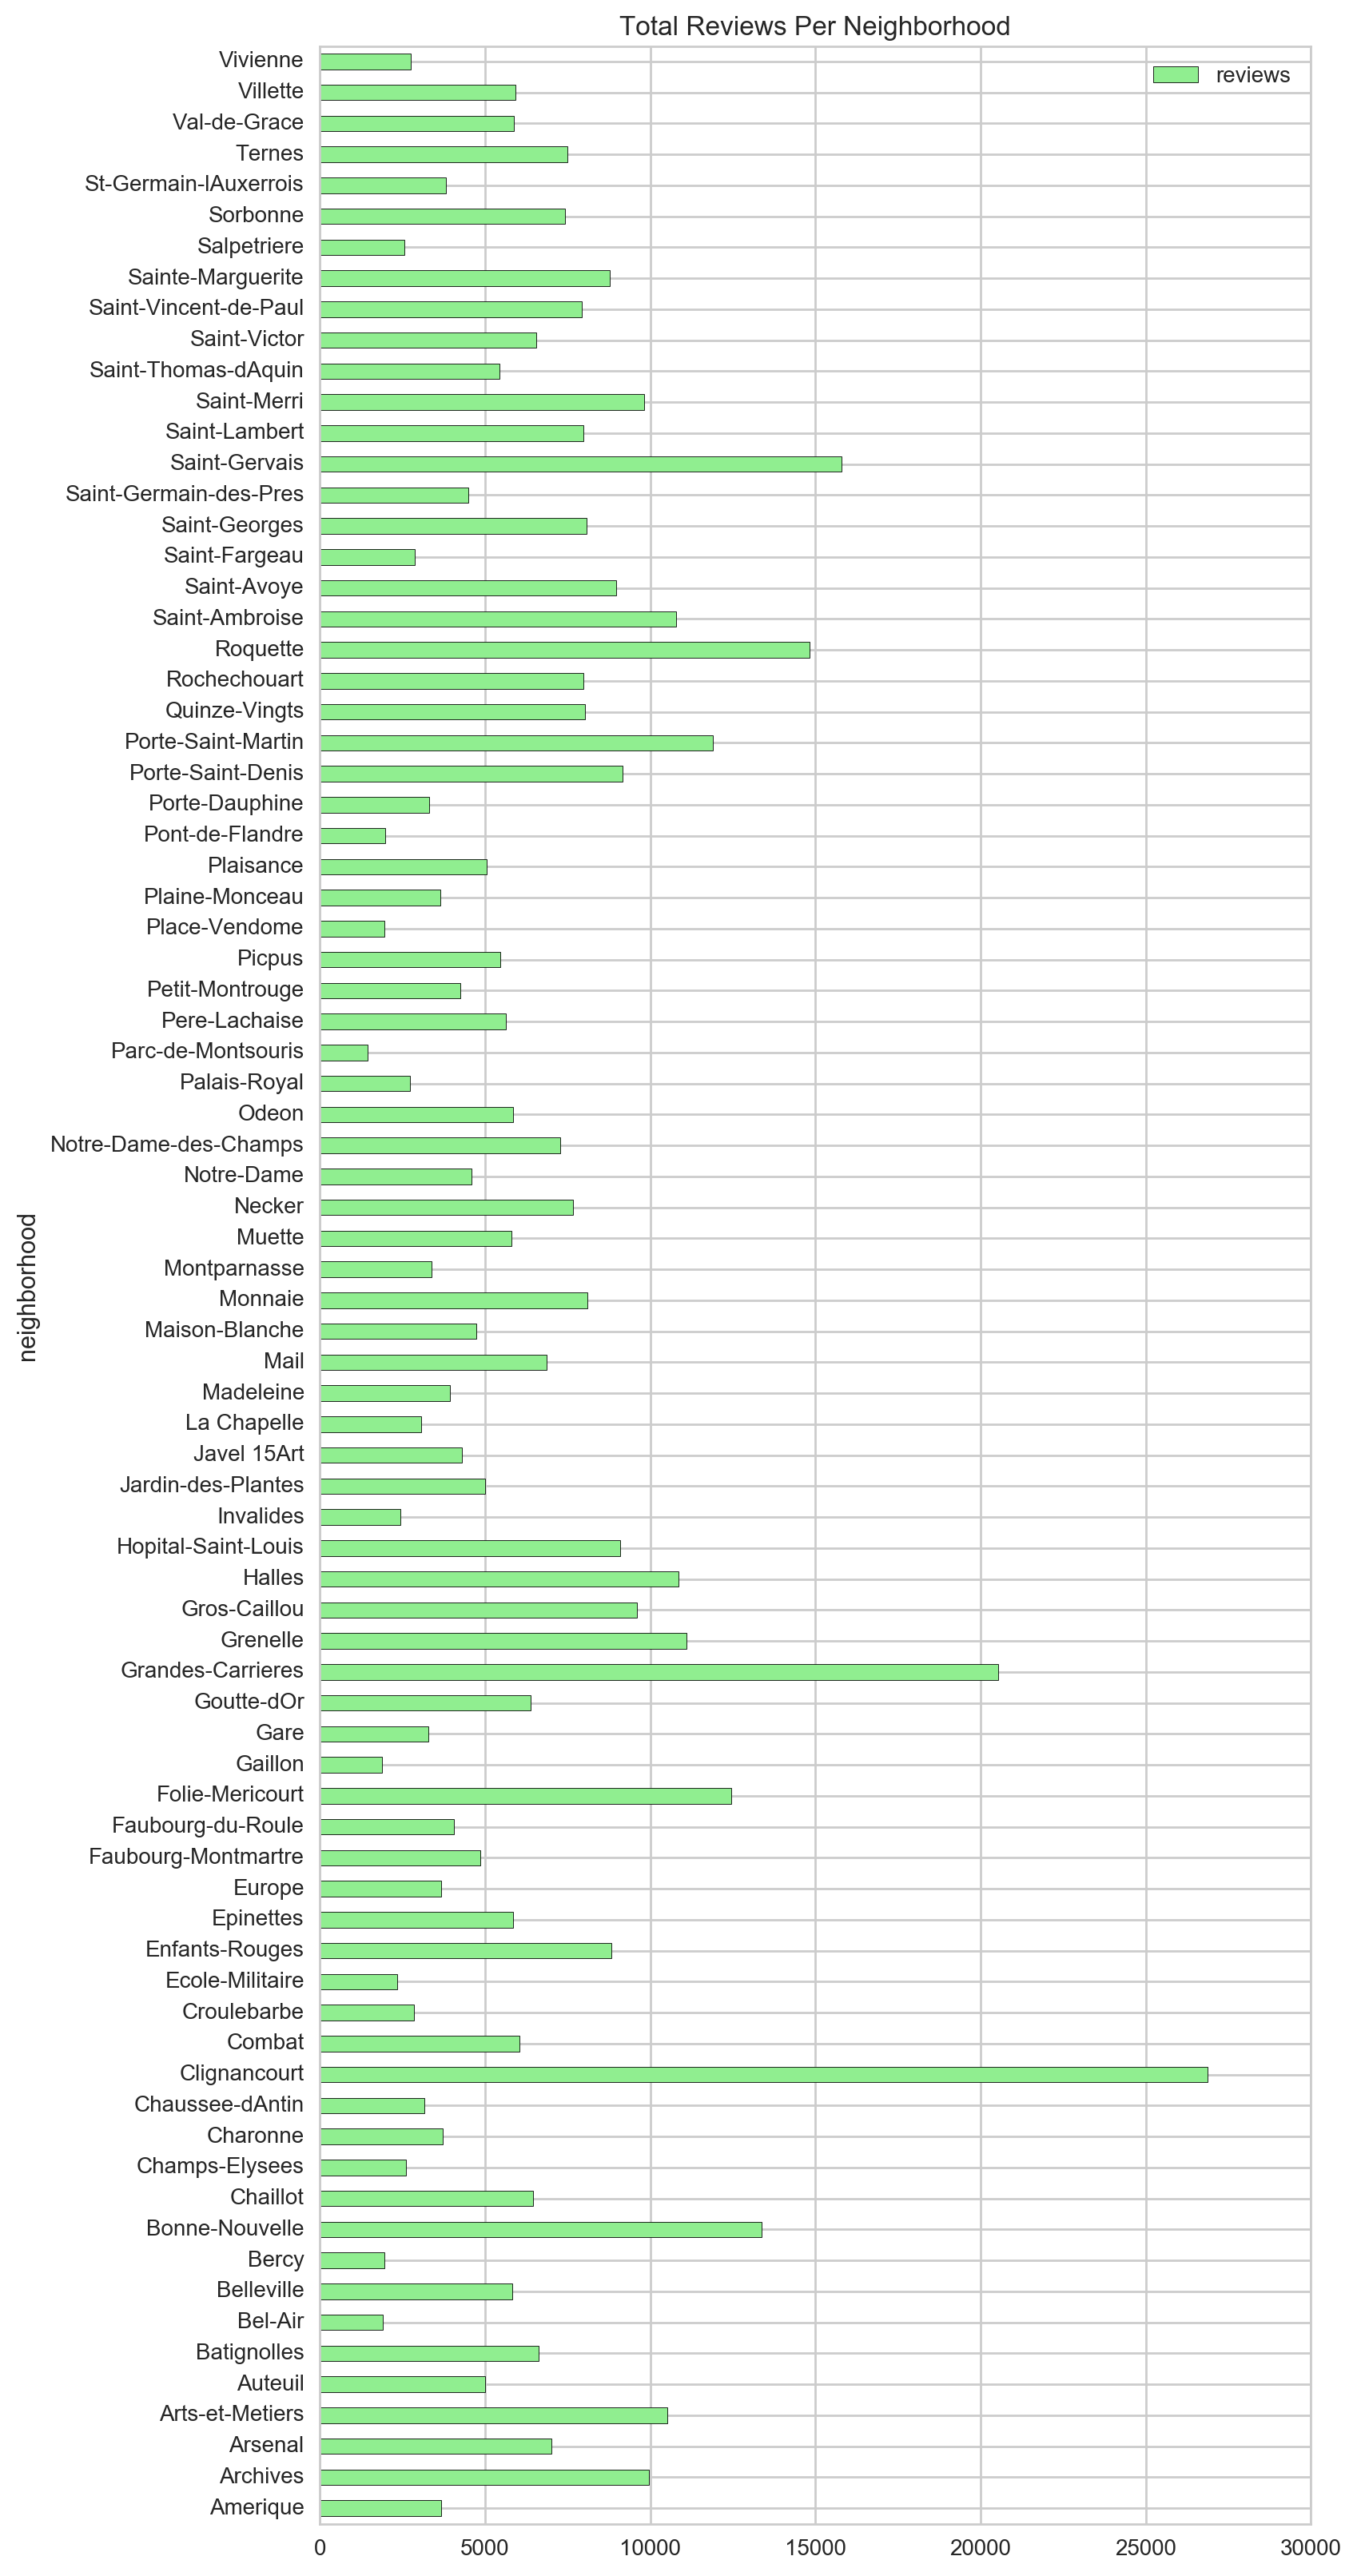

In [154]:
df1.plot(x='neighborhood', y='reviews', figsize=(8,20), kind = 'barh',title = 'Total Reviews Per Neighborhood',
        color='lightgreen')

In [155]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(paris.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [156]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [157]:
df2.head(2)

room_type neighborhood  reviews  host_id      price
0  Entire home/apt     Amerique     2896      361  95.124654
1     Private room     Amerique      669      103  51.708738

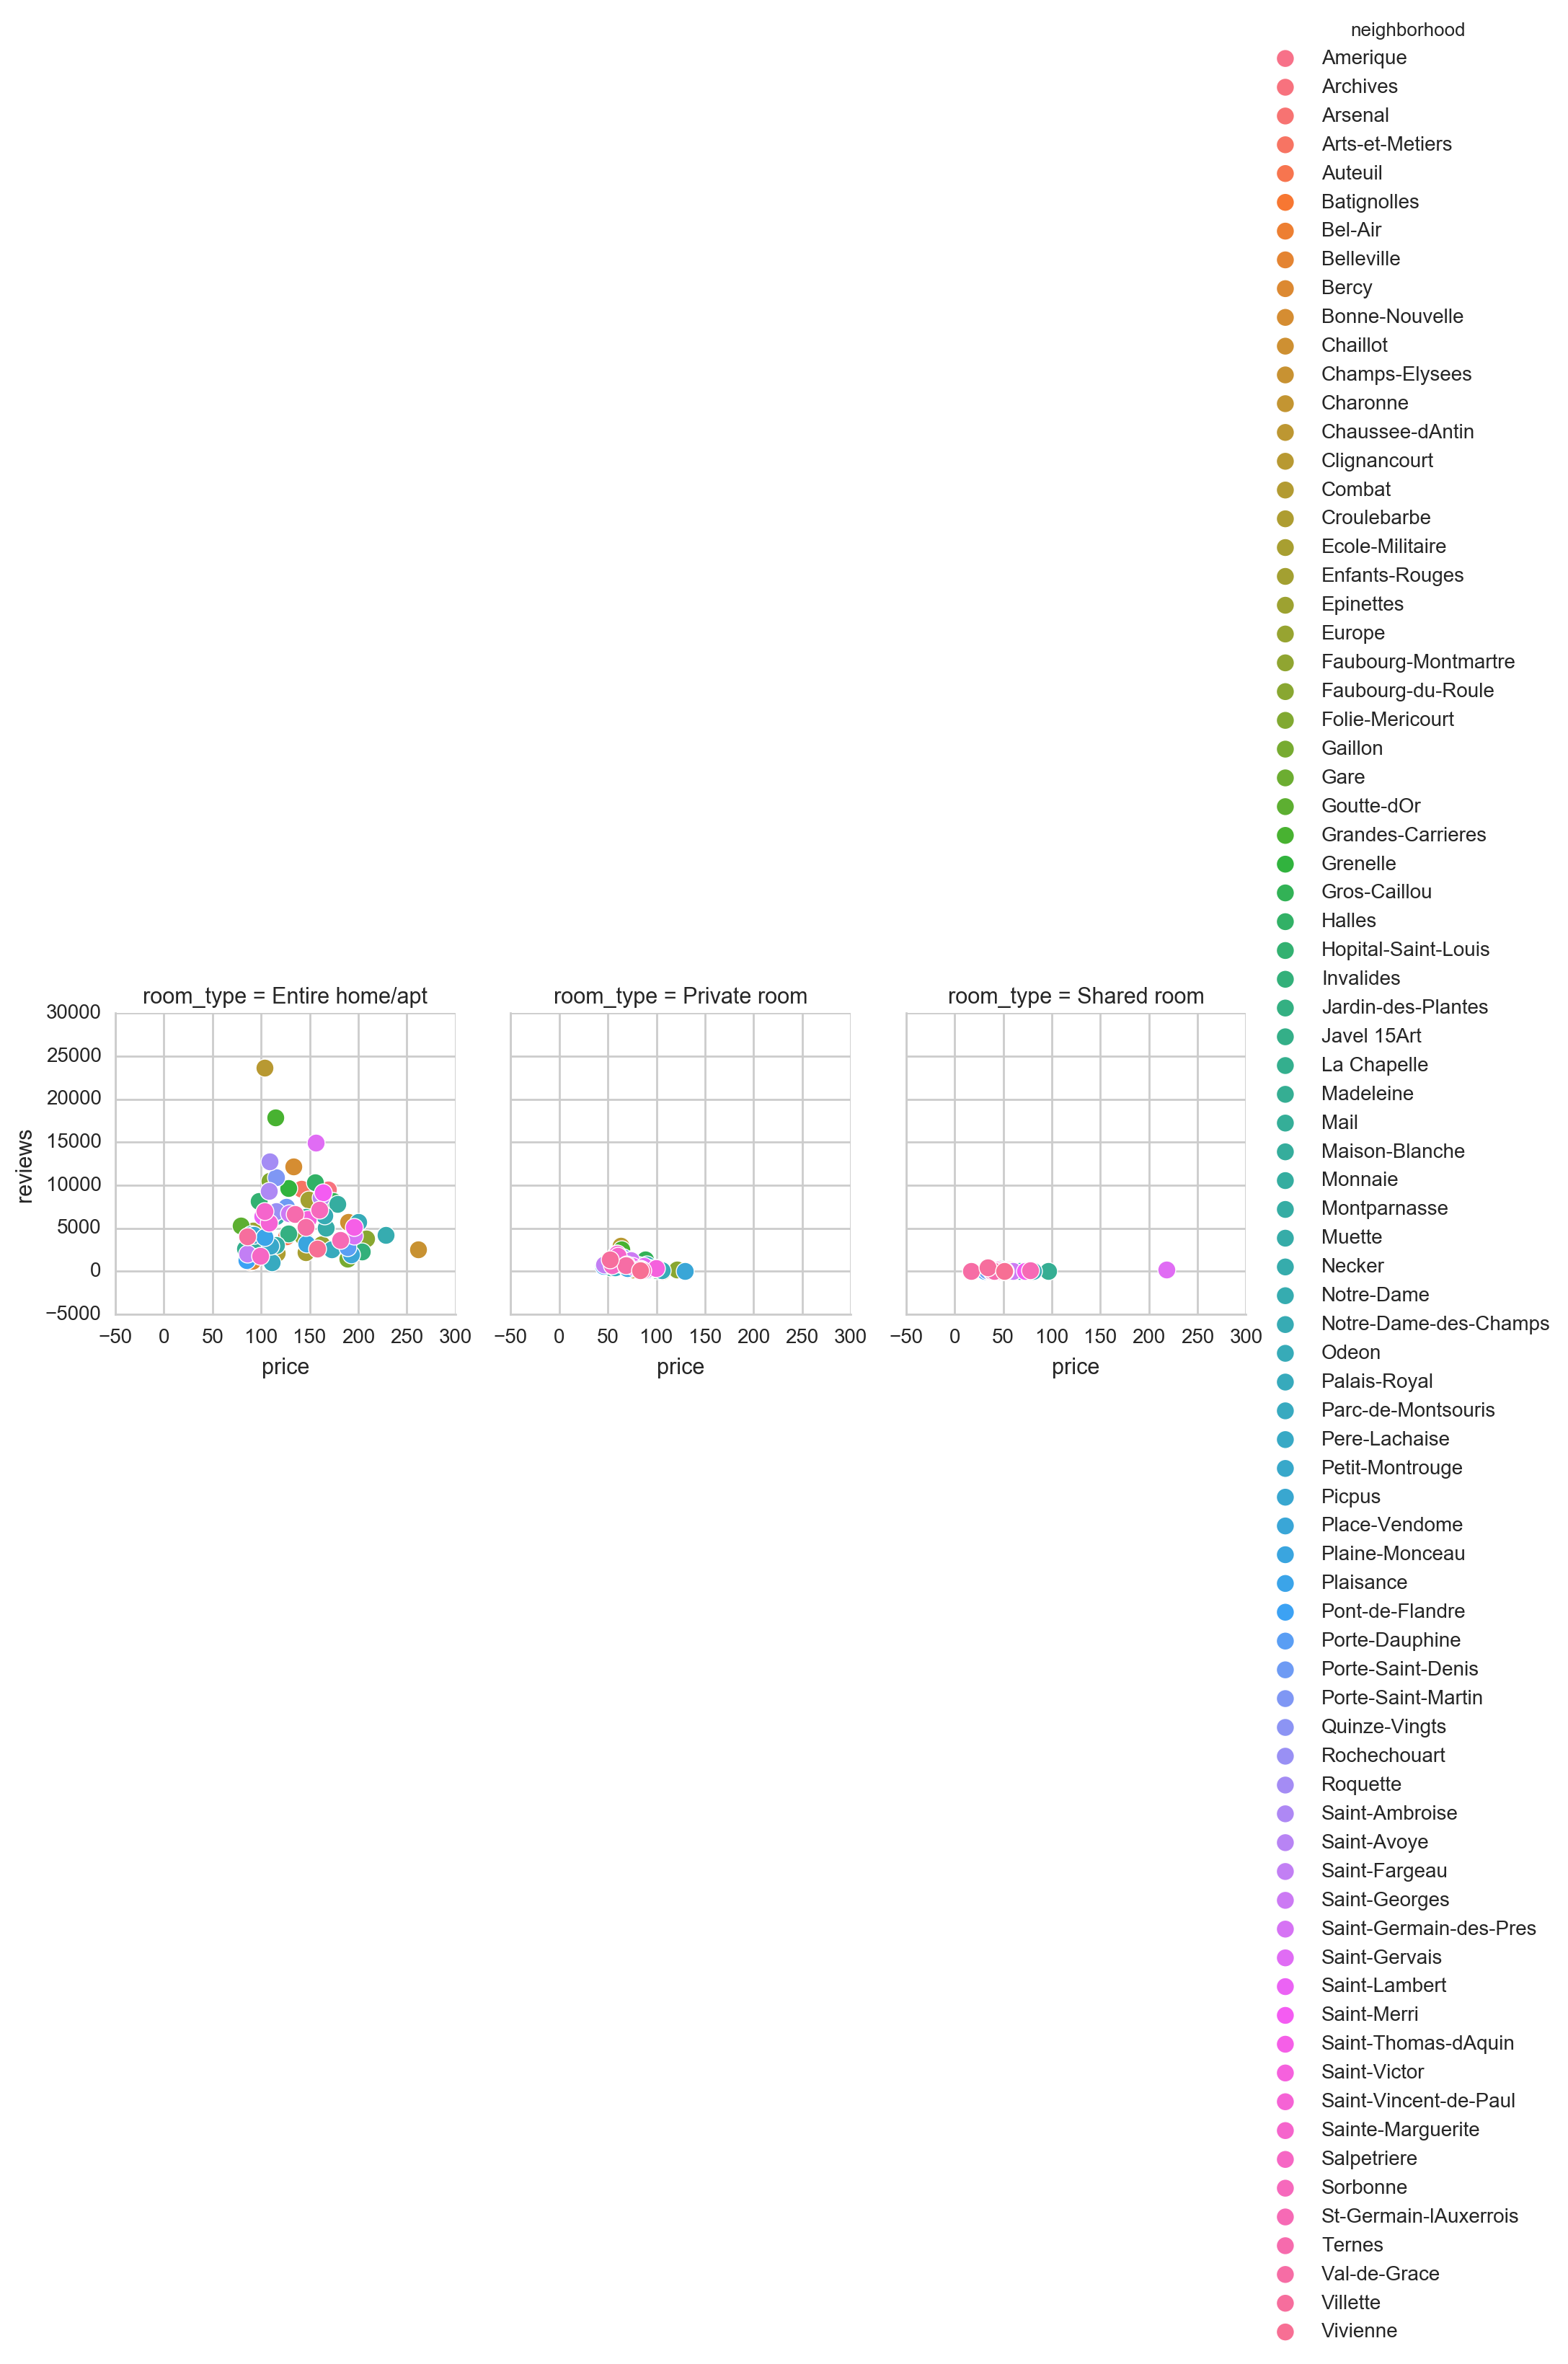

In [158]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df2, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","reviews", edgecolor="w", **kws).add_legend())

In [159]:
custom = lambda x: np.average(x)
df3 = pd.DataFrame(paris.groupby(['neighborhood','room_type','bedrooms']).agg({'bedrooms':'count','price':custom}))

In [160]:
df3.rename(columns={'bedrooms':'bedroom_count'}, inplace=True)

In [161]:
df3.reset_index(inplace=True)

In [162]:
df3.head(2)

neighborhood        room_type  bedrooms     price  bedroom_count
0     Amerique  Entire home/apt       0.0  55.50000             42
1     Amerique  Entire home/apt       1.0  73.35567            194

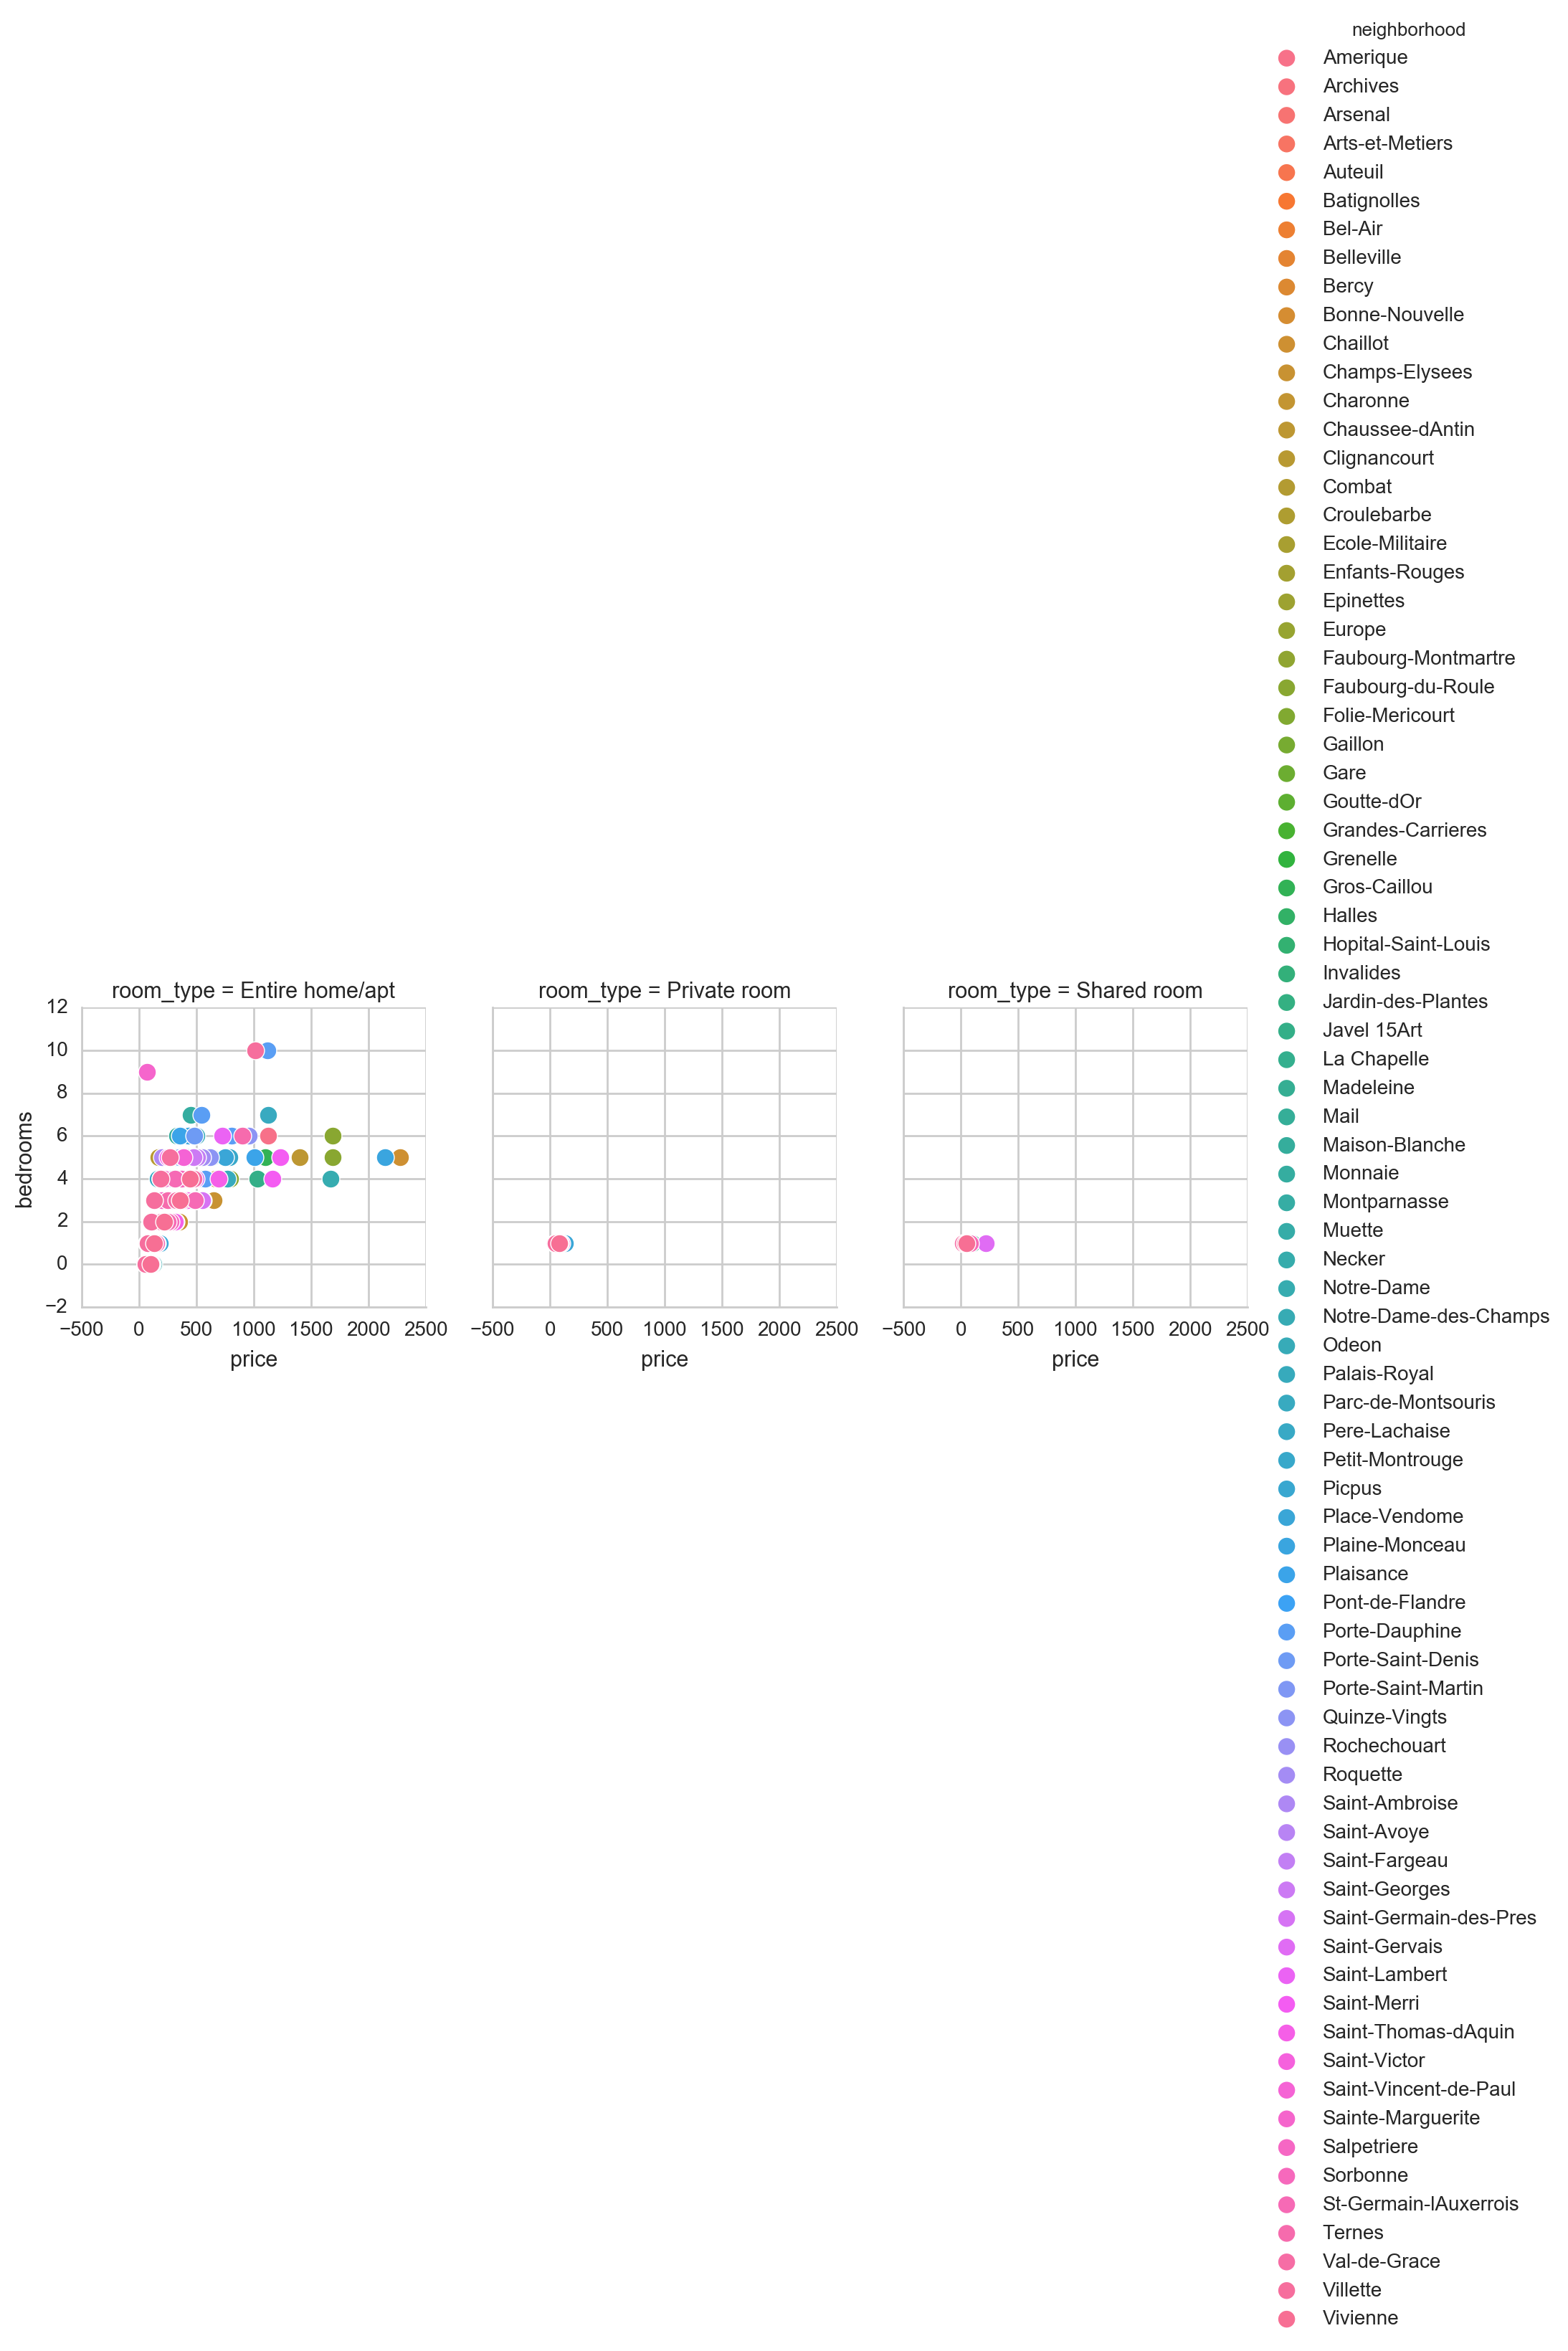

In [163]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df3, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","bedrooms", edgecolor="w", **kws).add_legend())

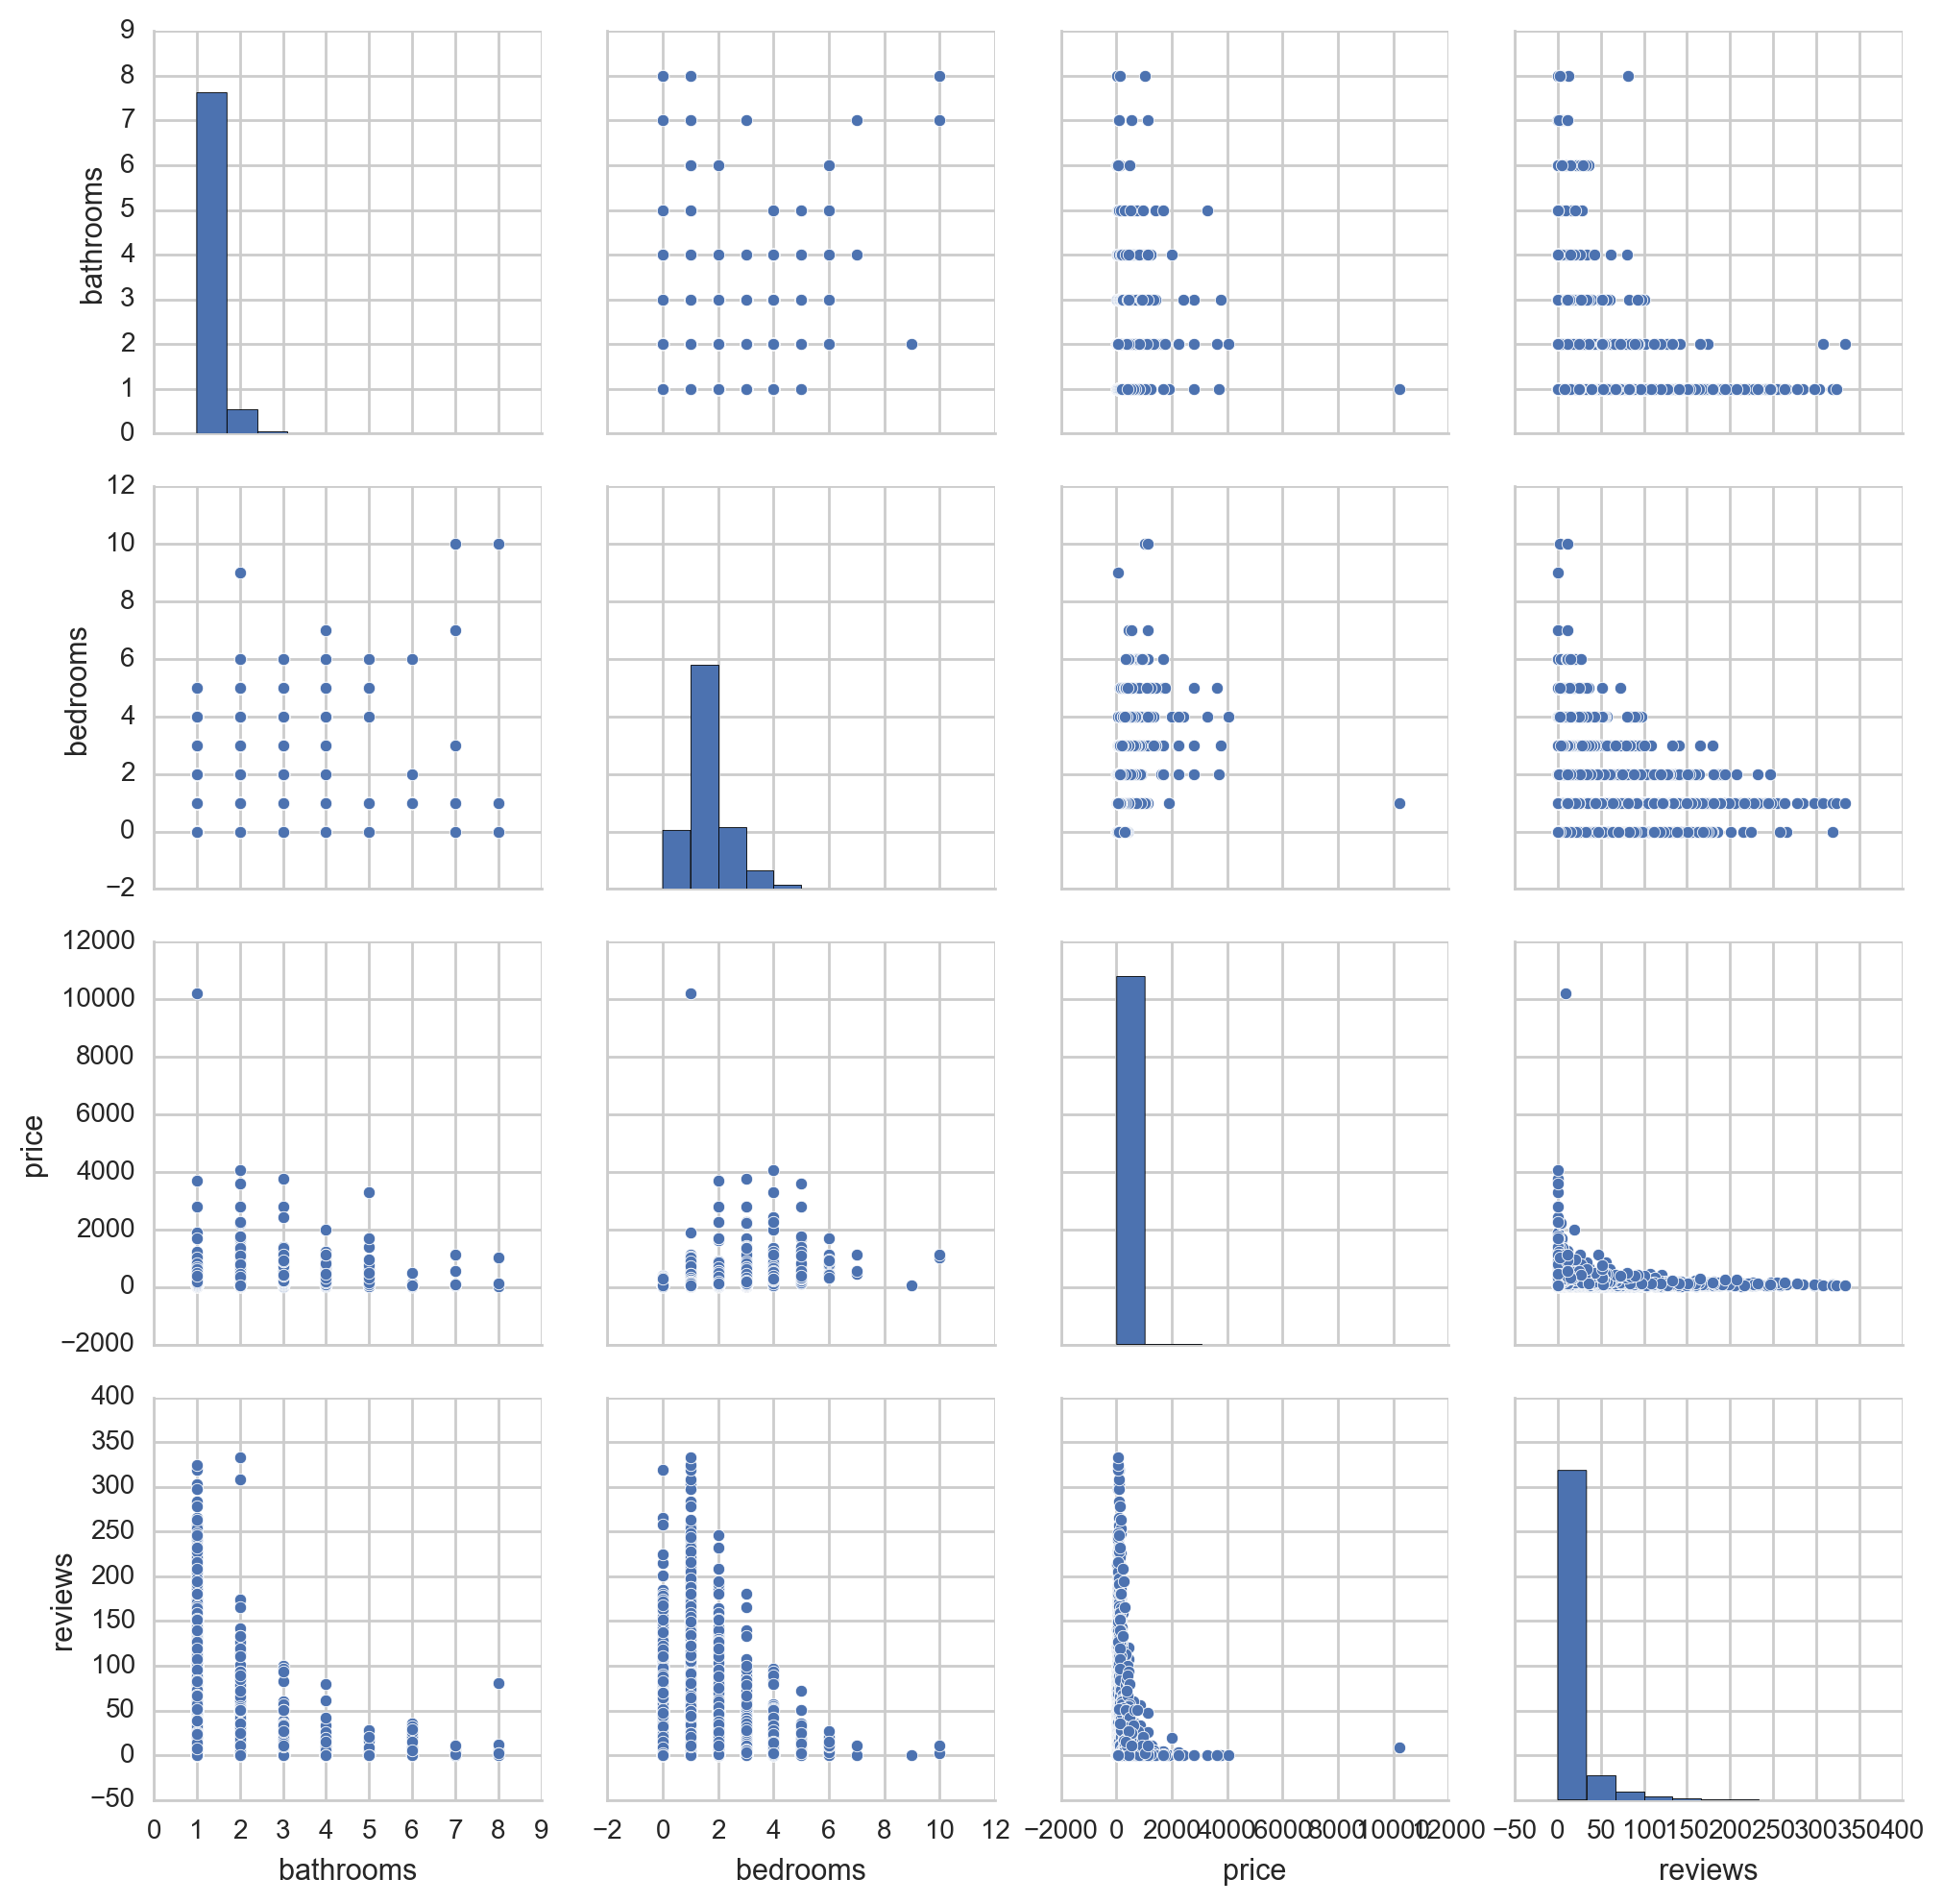

In [164]:
sns.pairplot(paris[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']], hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter',
                 diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None,
                 grid_kws=None)

In [165]:
df4_corr = paris[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']].corr()

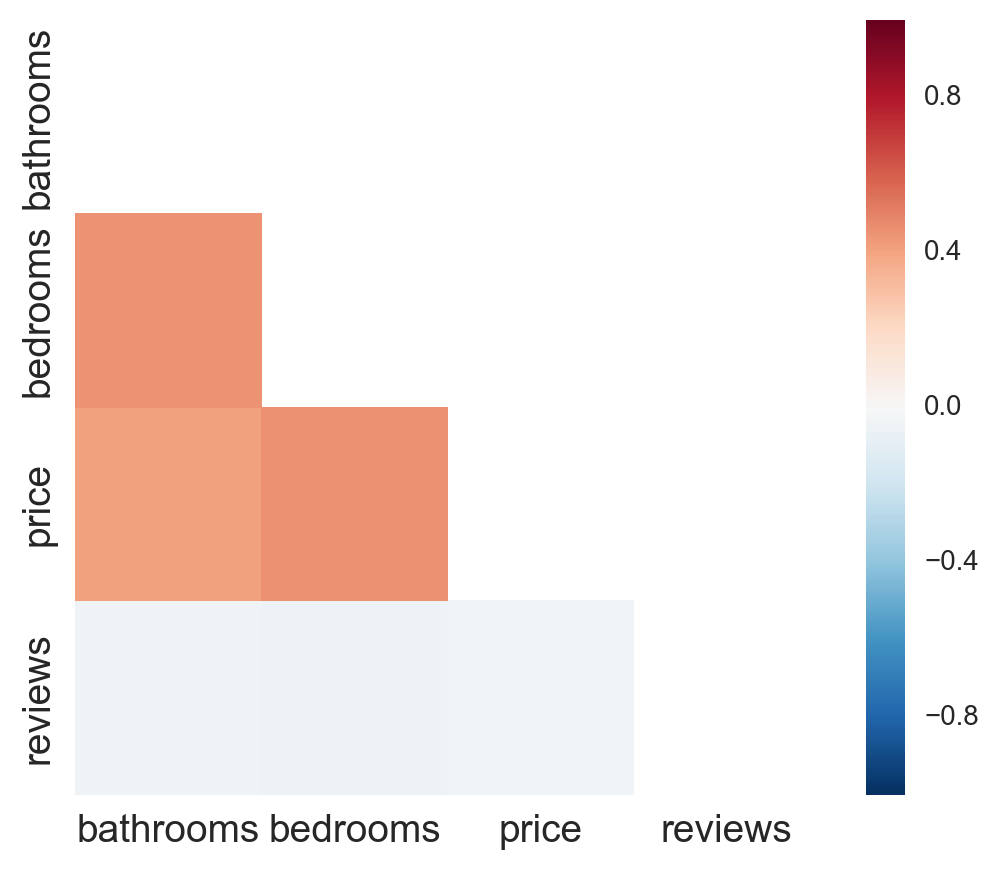

In [166]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(6,5)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df4_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

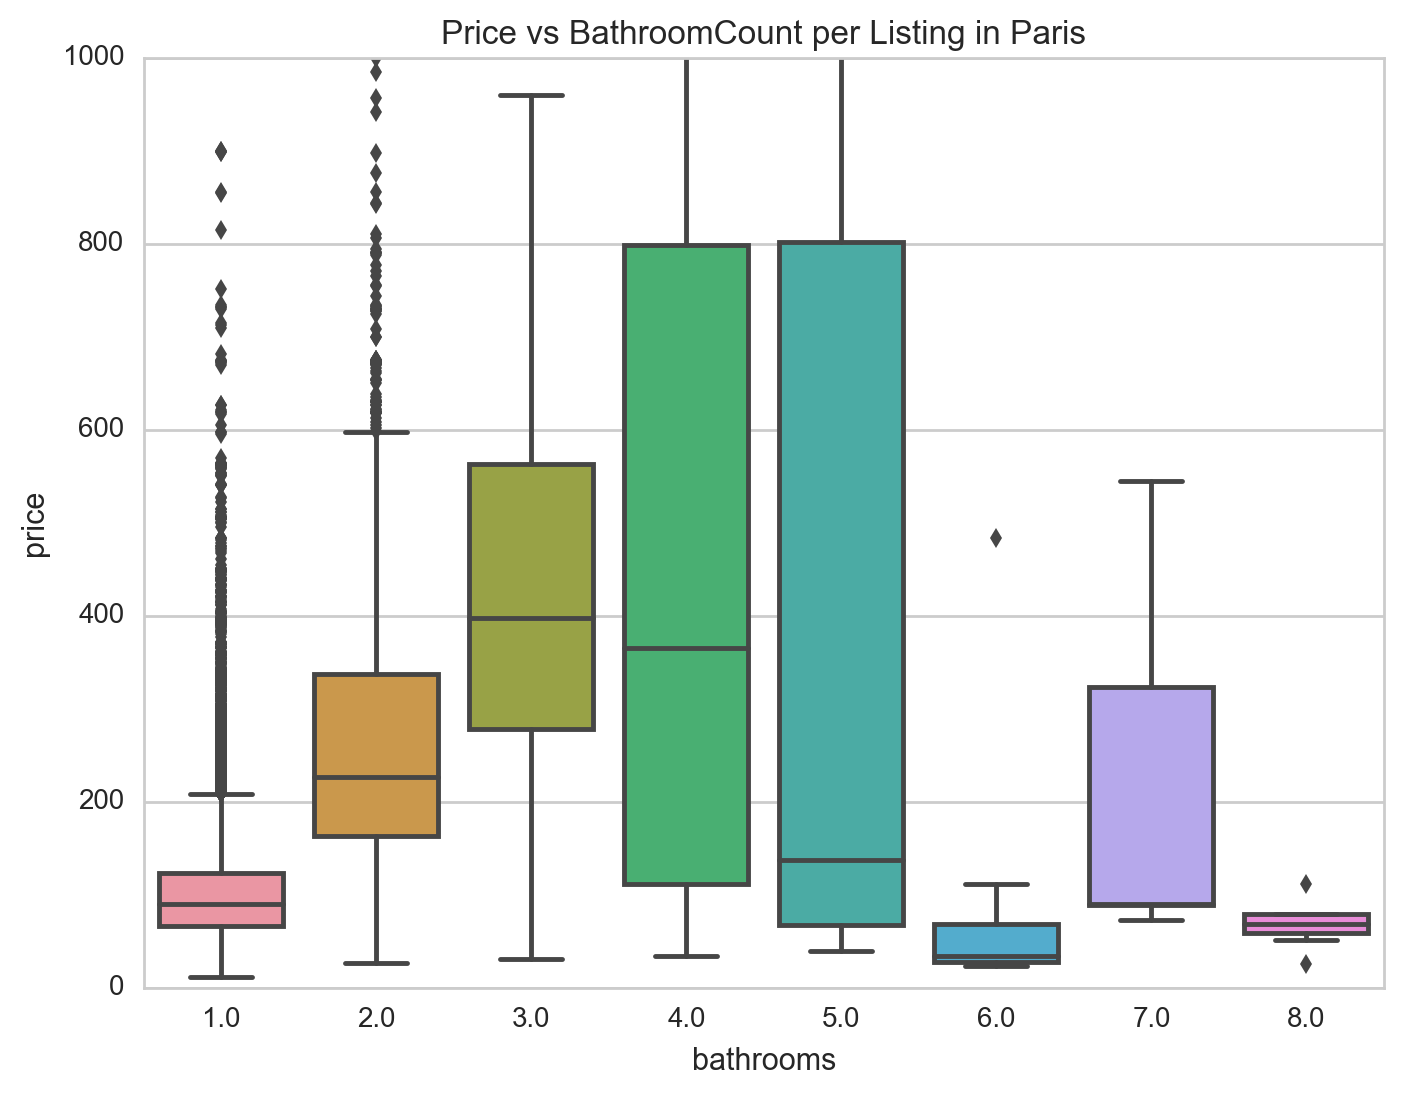

In [38]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.boxplot(x='bathrooms',y='price',data=paris)

ax.set_ylim([0,1000])
ax.set_title("Price vs BathroomCount per Listing in Paris")


In [168]:
paris.index[paris.price == paris.price.max()]

Int64Index([28499], dtype='int64')

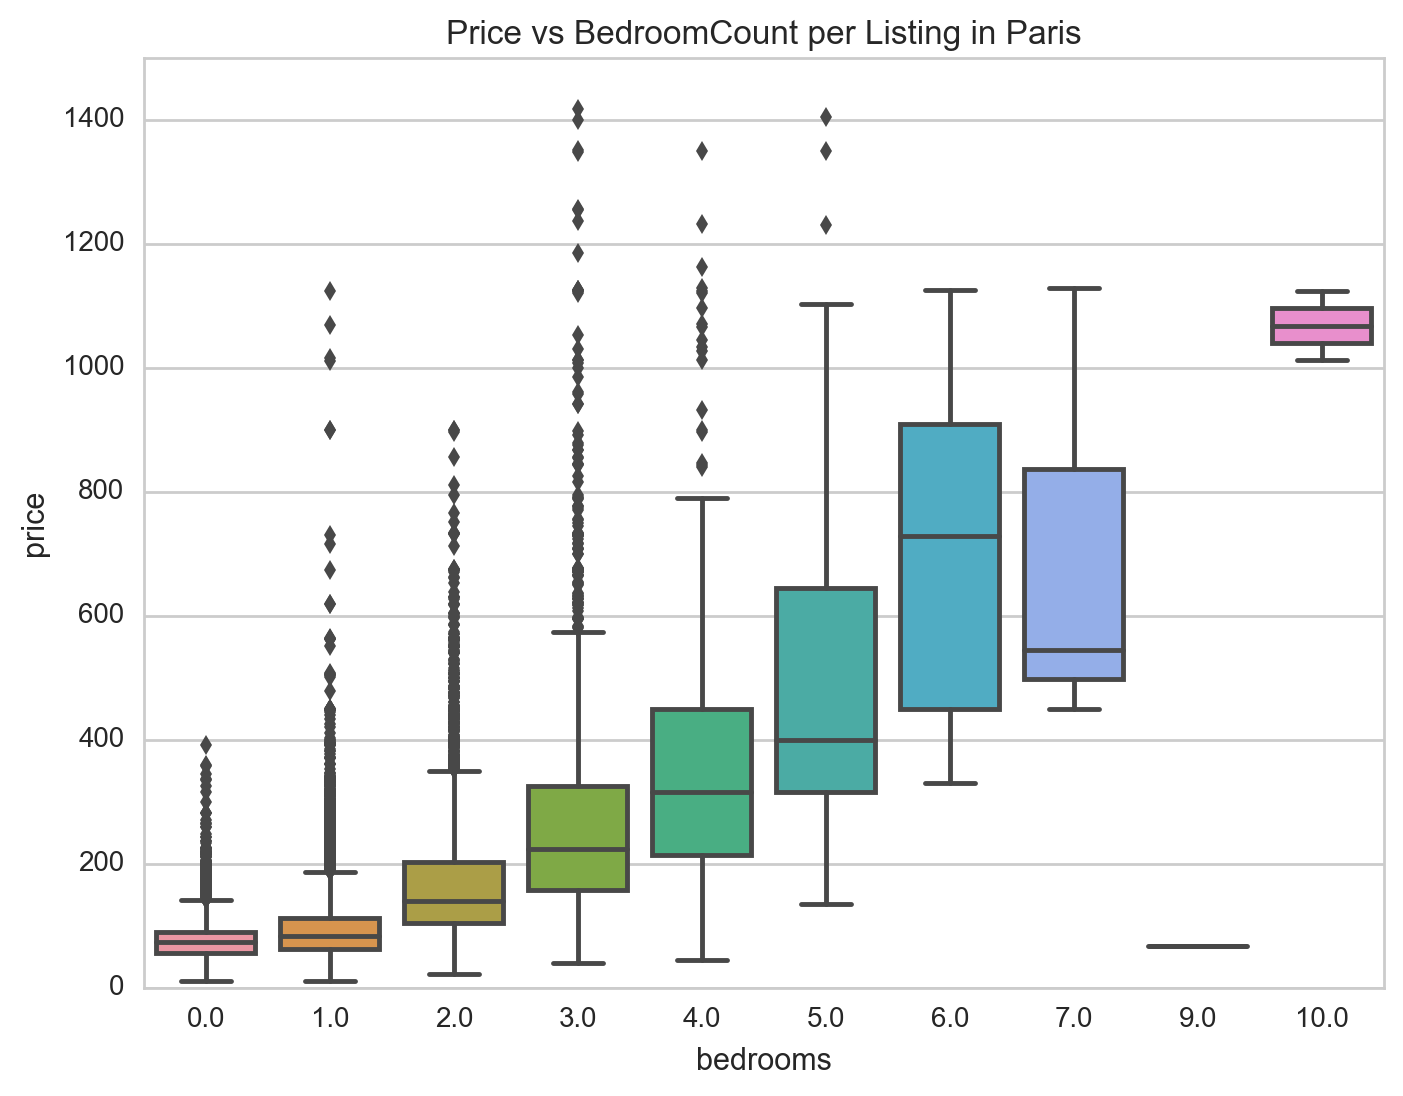

In [42]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.boxplot(x='bedrooms',y='price',data=paris, orient='v',)

ax.set_ylim([0,1500])
ax.set_title("Price vs BedroomCount per Listing in Paris")




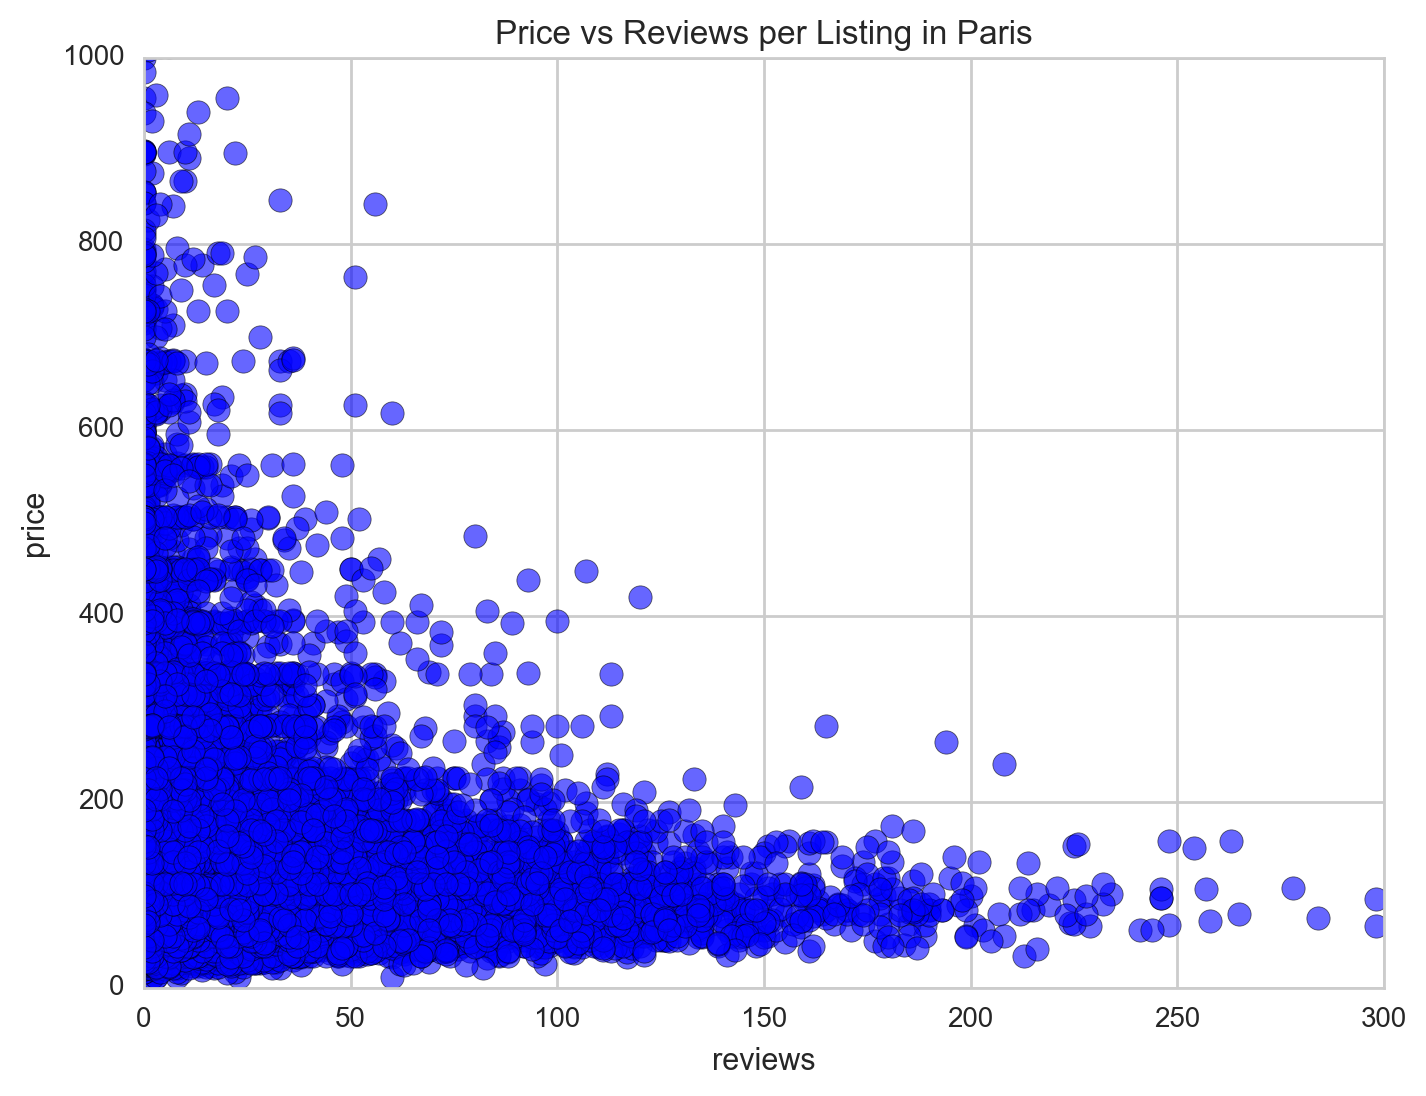

In [47]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(x= paris.reviews ,y=paris.price, s=70, alpha=0.6)
ax.set_ylim([0,1000])
ax.set_xlim([0,300])

ax.set_ylabel("price")
ax.set_xlabel("reviews")

ax.set_title("Price vs Reviews per Listing in Paris")